# HOUSE PRICE PREDICTION USING ADVANCED REGRESSION

### Objective of this project is to predict sale prices for homes in Ames, Iowa.

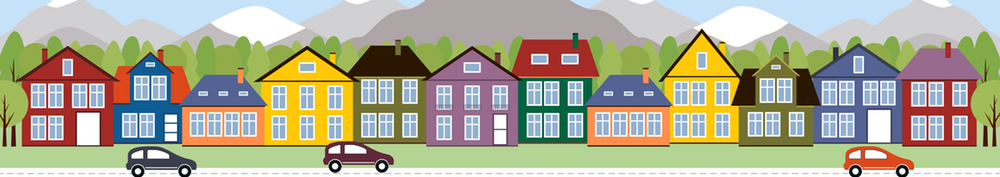

# Import all necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.linear_model import BayesianRidge, Ridge, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import plotly.express as px
from pycaret.regression import *
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

# Load data and create data frame

In [2]:
data = pd.read_csv('house prices.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
pd.pandas.set_option('display.max_columns',None)  # To display all the Columns in the Dataset
pd.pandas.set_option('display.max_rows',None)  # To display all the Rows in the Dataset

In [4]:
 # Display first 5 records
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Basic checks

In [5]:
# Check the size of the Dataset (1460 Rows and 81 Columns)
data.shape

(1460, 81)

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice'>

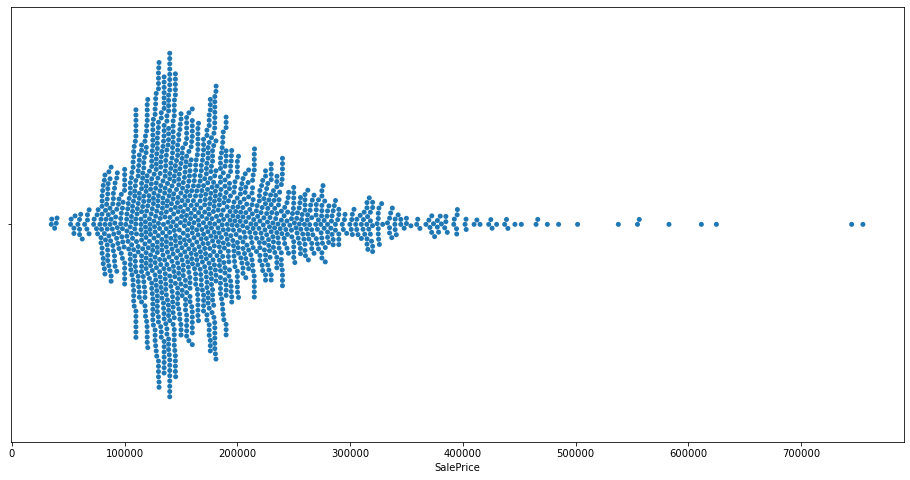

In [9]:
#Swarmplot to see the distribution of the dependent variable 'SalePrice'
fig = plt.figure(figsize=(16,8))
sns.swarmplot(data['SalePrice'])

# Data Preprocessing

### Remove unwanted feature and target feature

In [10]:
target = data['SalePrice']
data.drop(['SalePrice', 'Id'], axis=1, inplace=True)

### Check for missing values using heat-map

<AxesSubplot:>

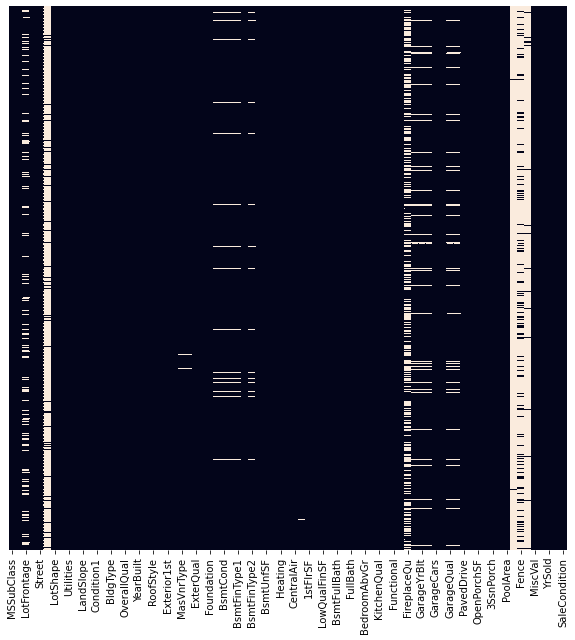

In [11]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [12]:
# Copy the dataset to data1
data1 = data.copy()

### Count total no of missing values

In [13]:
Total_null_value = data1.isnull().sum().sort_values(ascending=False)[:20]
Total_null_value

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
LotConfig          0
dtype: int64

In [14]:
fig = plt.figure(figsize=(16,8))
px.bar(Total_null_value)

<Figure size 1152x576 with 0 Axes>

### Firstly impute categorical missing features

In [15]:
data1.select_dtypes('object').loc[: , data1.isnull().sum() >0].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [16]:
# Filling using constant value for features which are not a actual missing value according to domain knowledge
for col in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 
    'GarageFinish', 
    'GarageQual', 
    'GarageCond',
    'PoolQC',
    'Fence', 
    'MiscFeature'    
]:
    data1[col]= data1[col].fillna('NON')
    
# Filling remaining missing features (actual missing value) with the mode

for col in [
    'MasVnrType',
    'Electrical',

]:
    data1[col]=data1[col].fillna(data1[col].mode()[0])

In [17]:
# Check if there are any missing values left in the categorical features
data1.select_dtypes('object').isnull().sum().sum() 

0

## Check the categorical features data distribution by graph

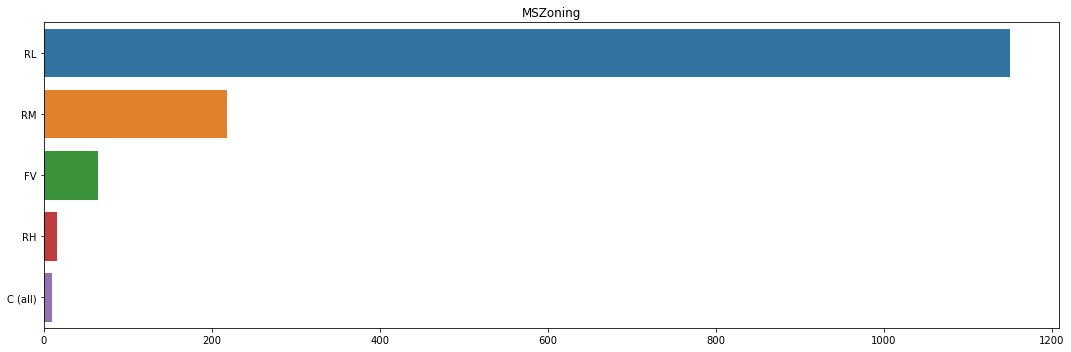

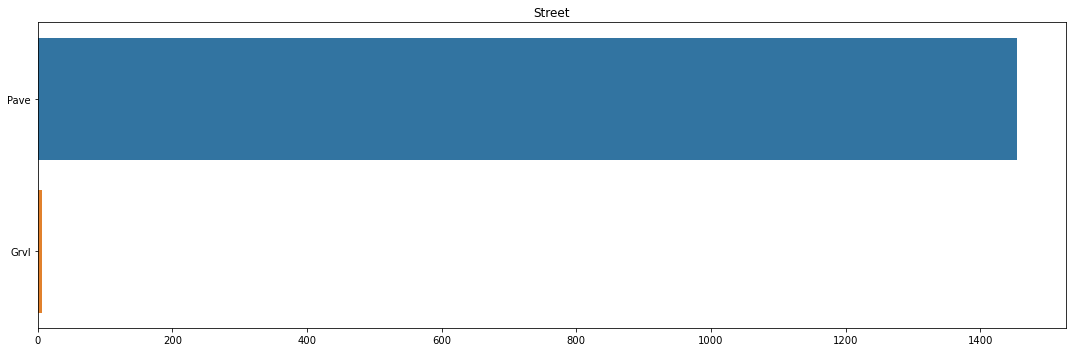

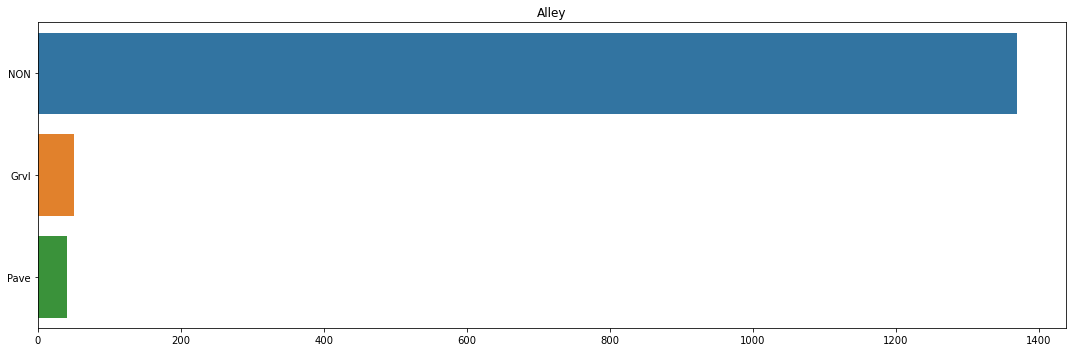

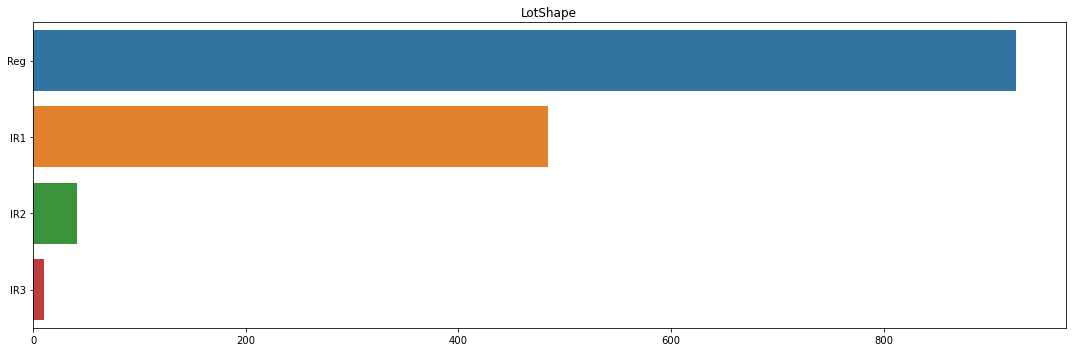

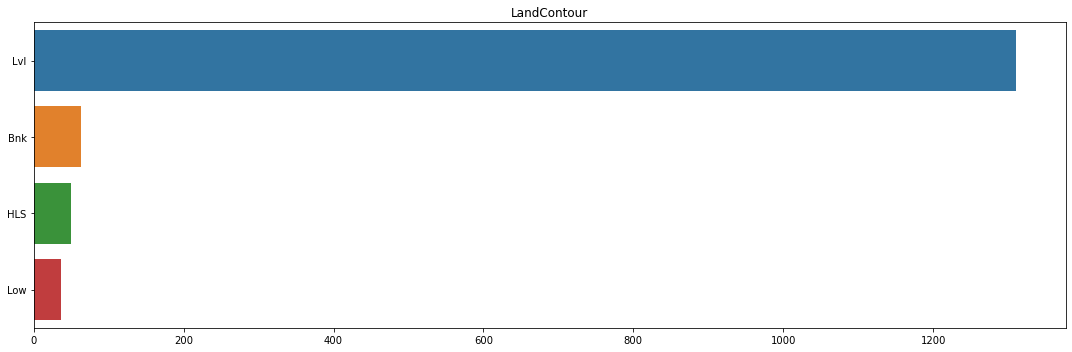

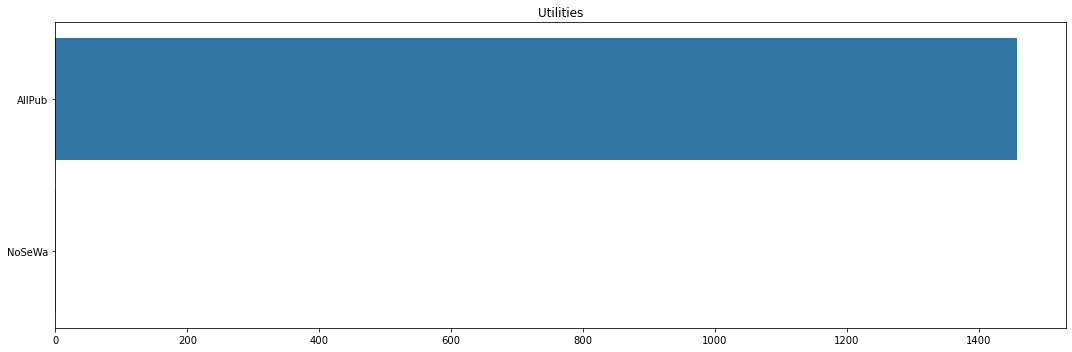

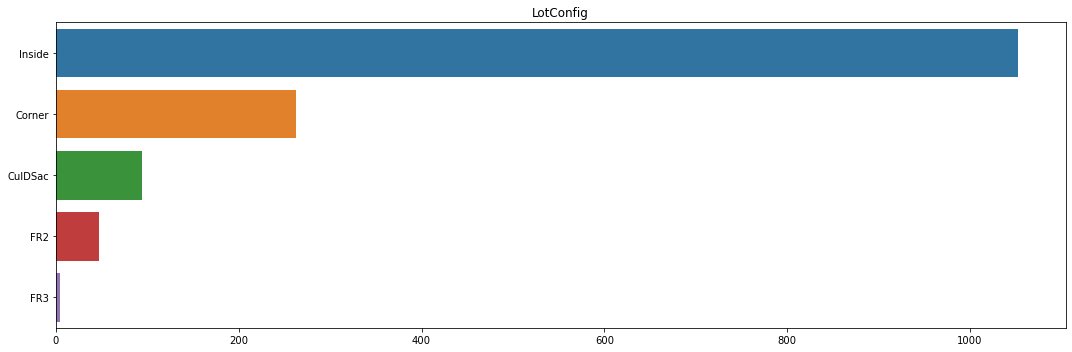

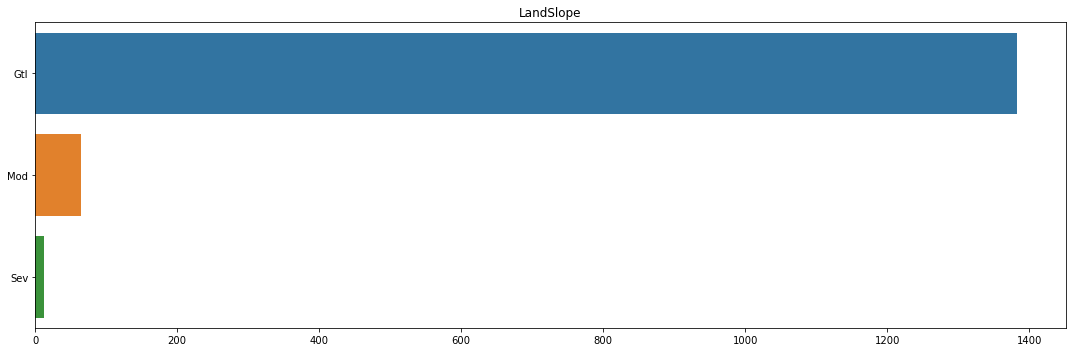

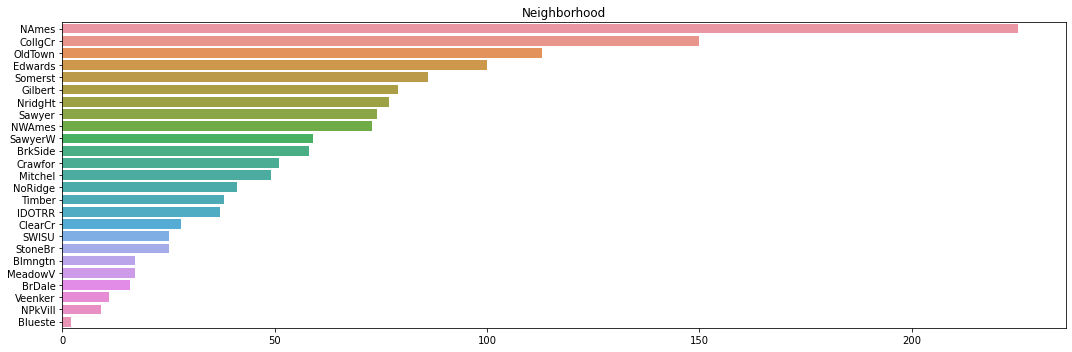

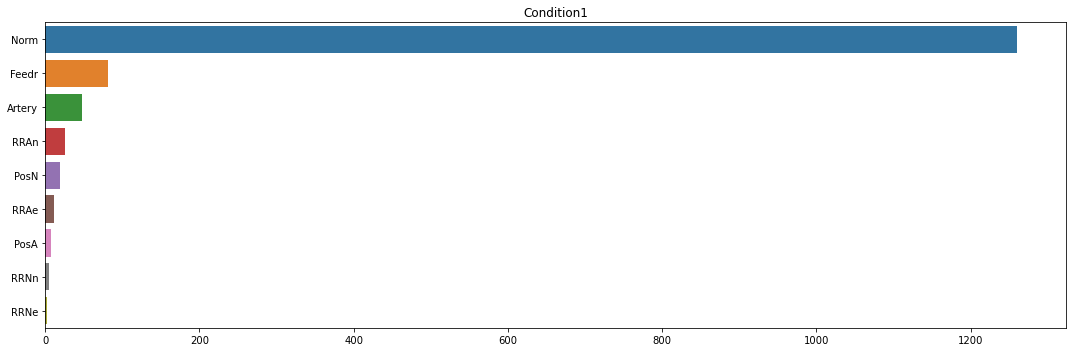

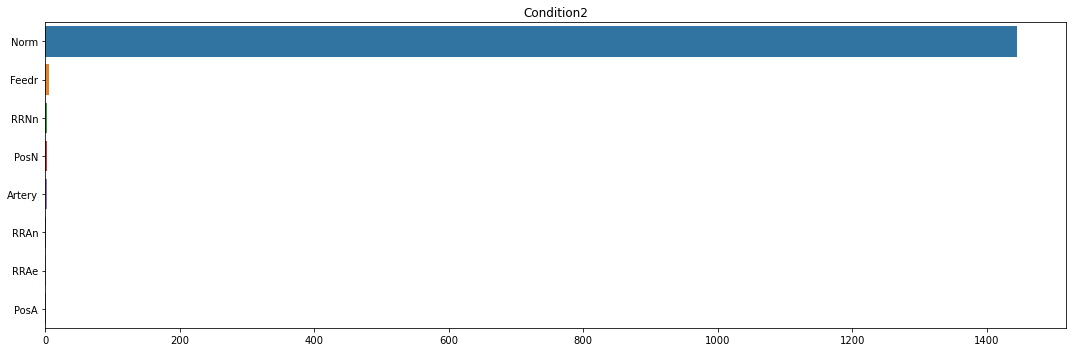

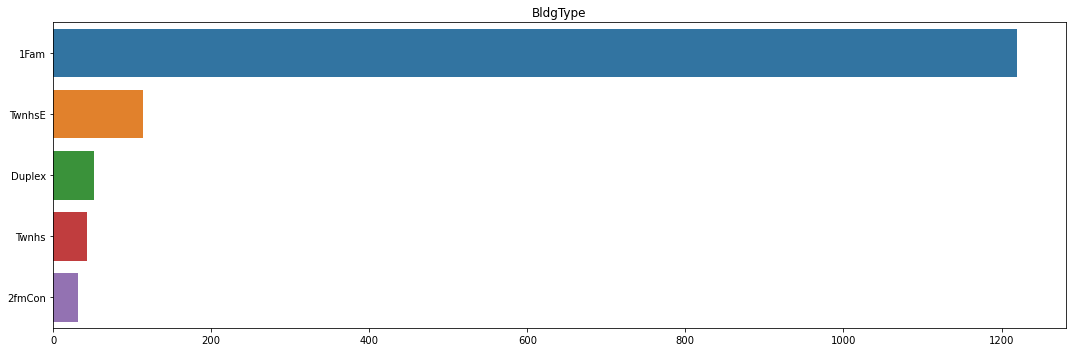

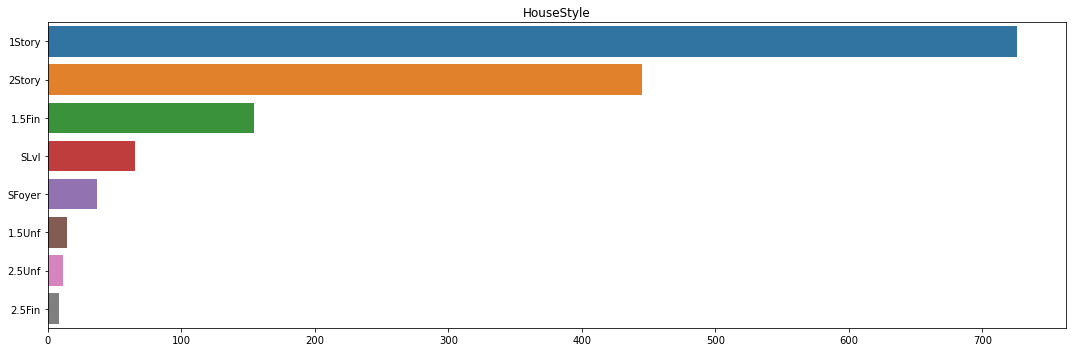

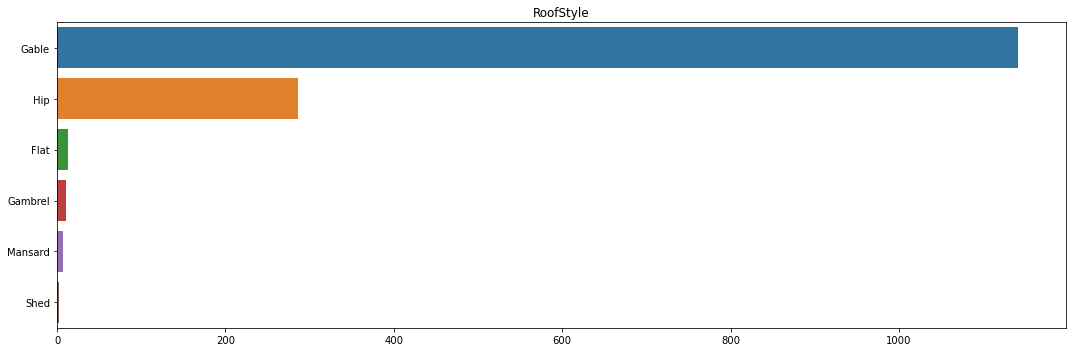

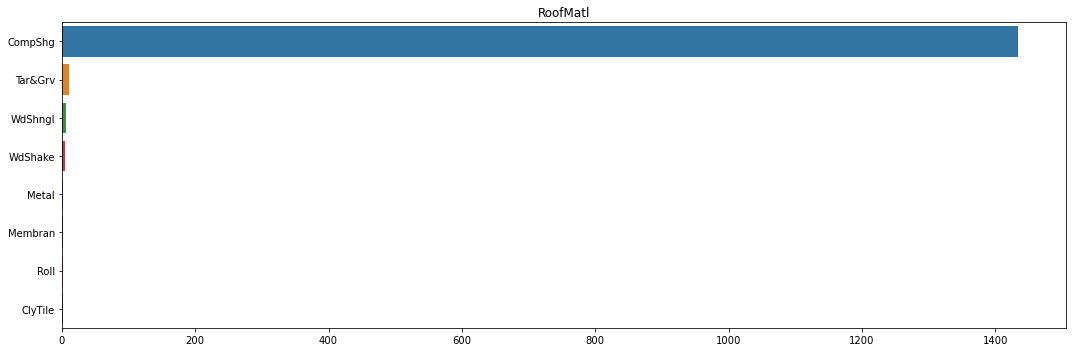

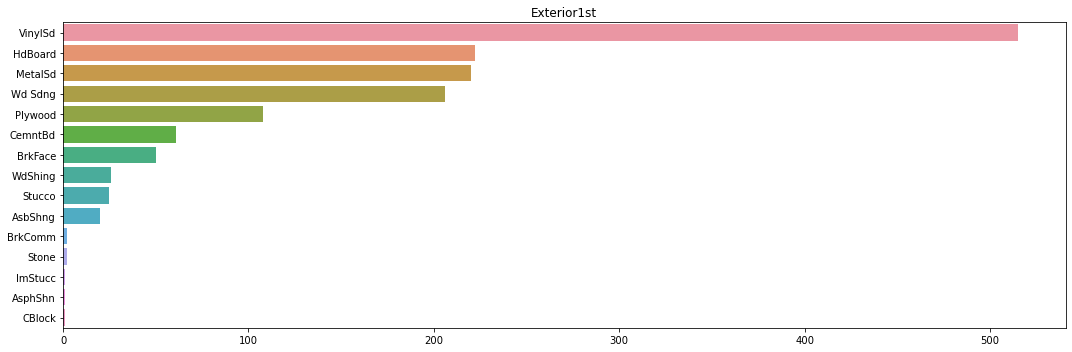

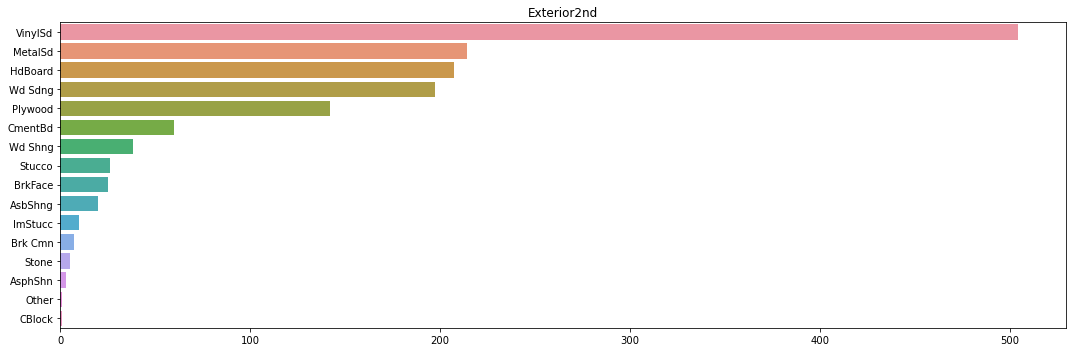

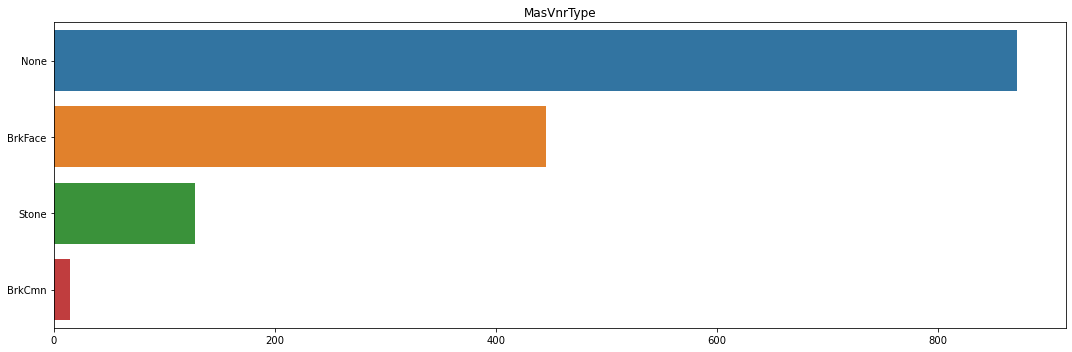

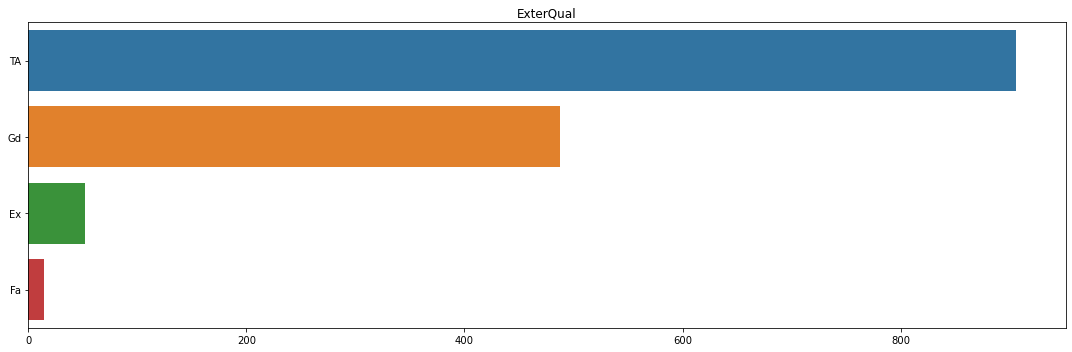

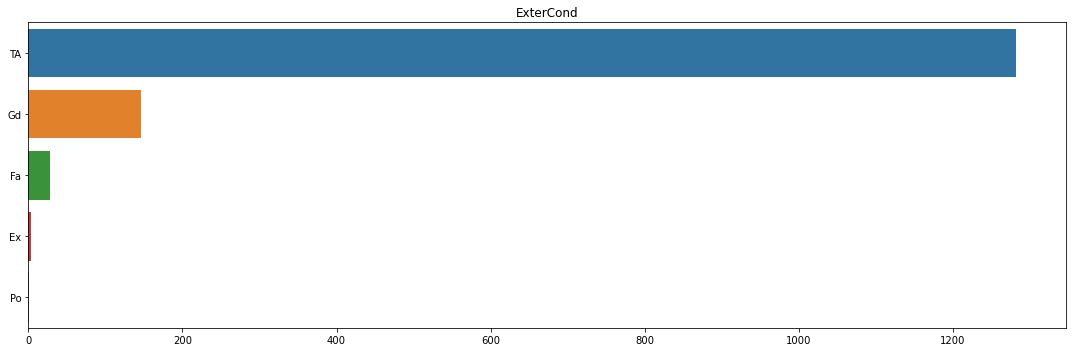

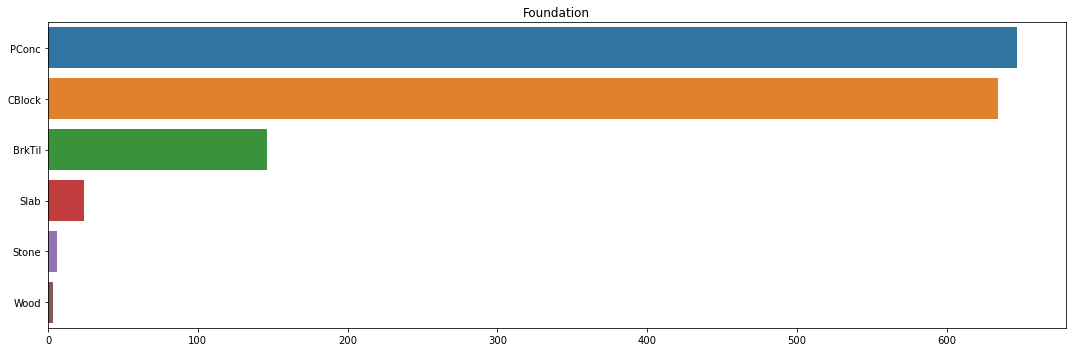

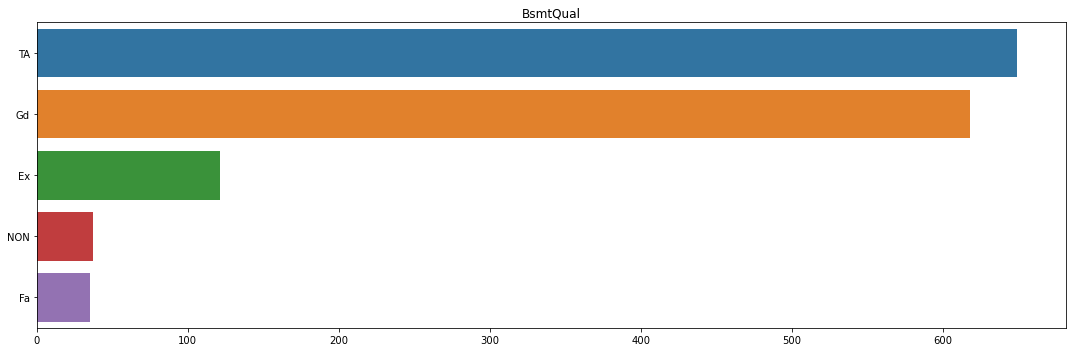

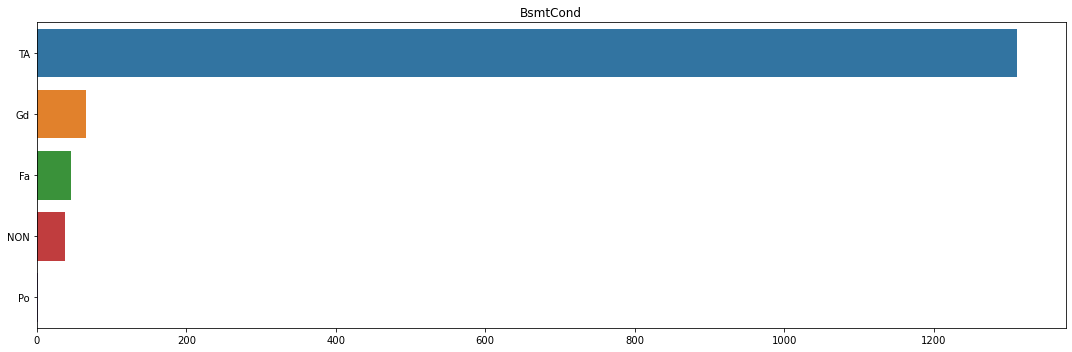

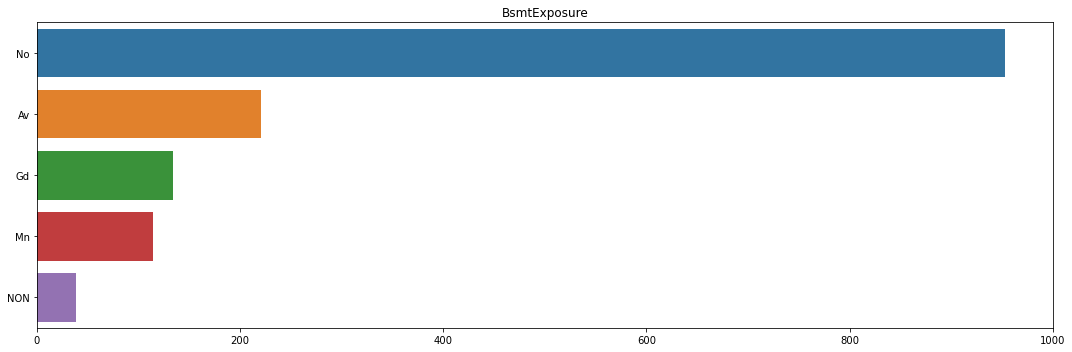

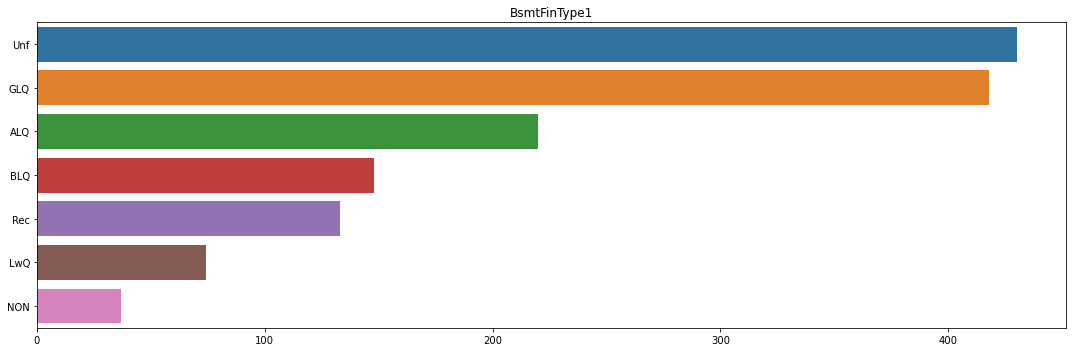

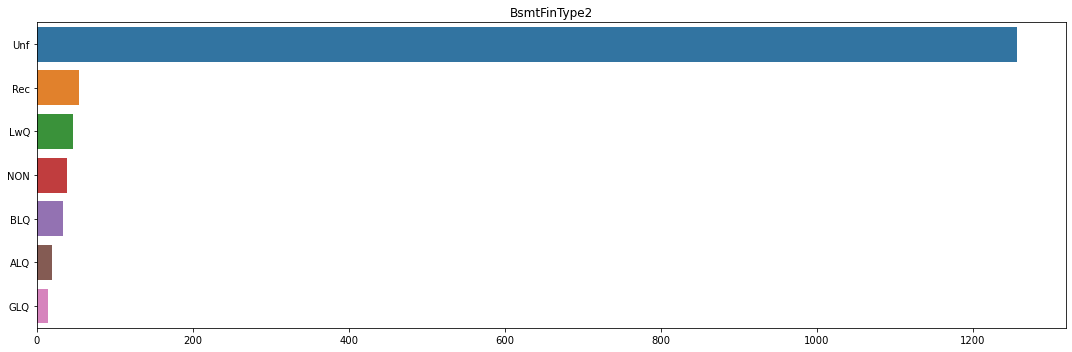

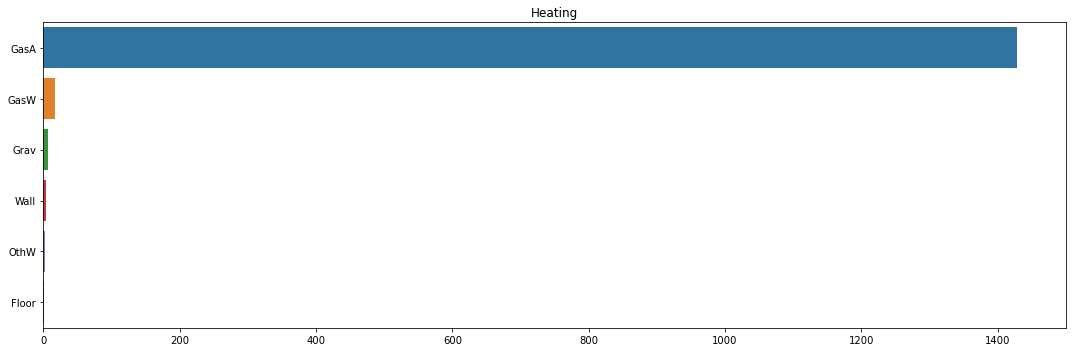

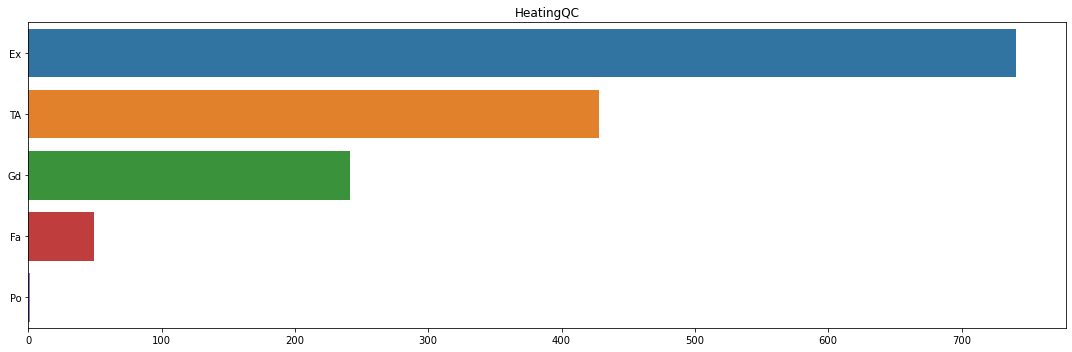

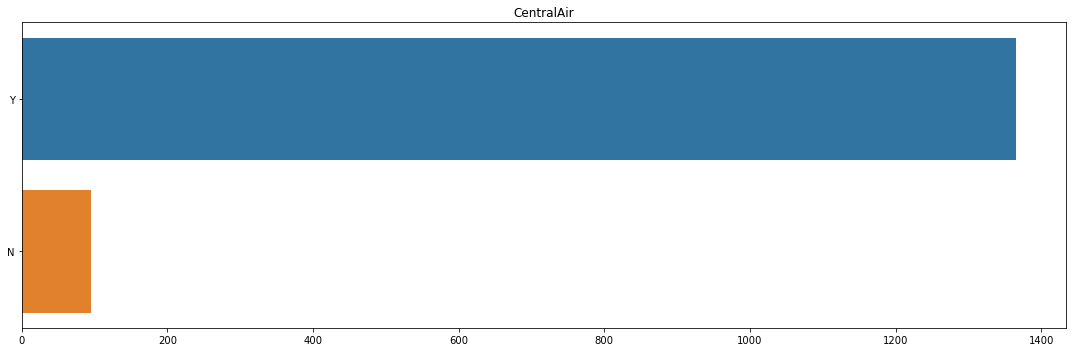

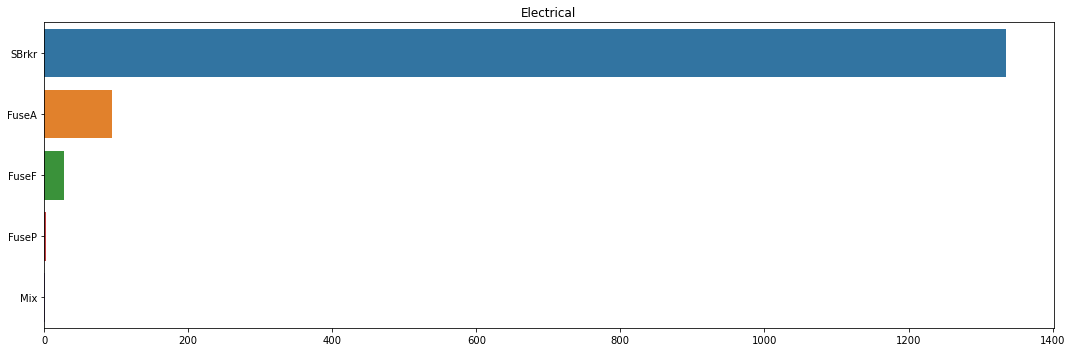

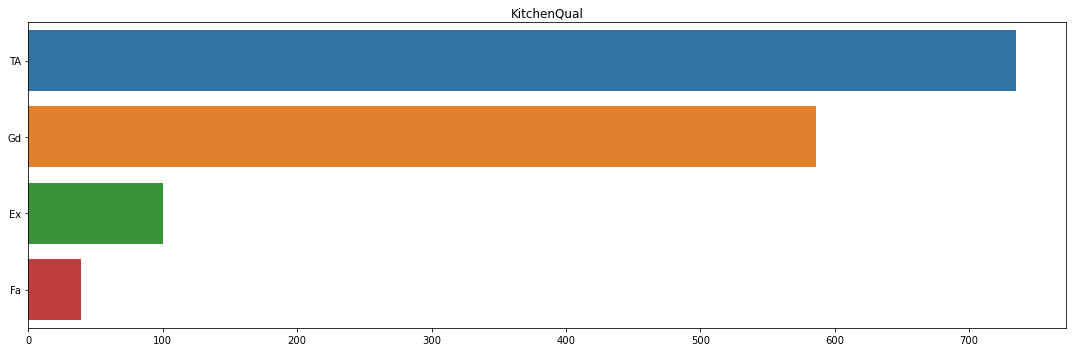

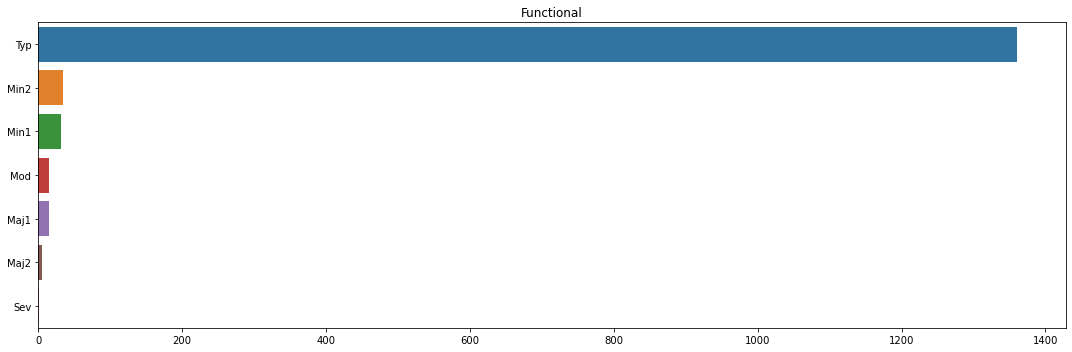

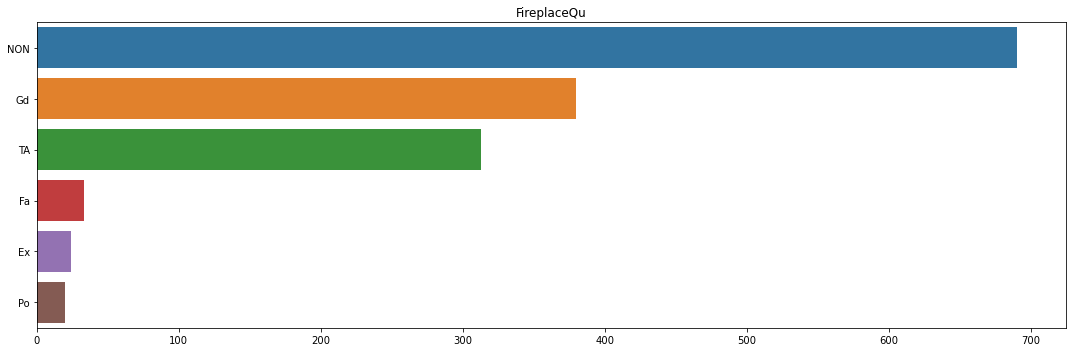

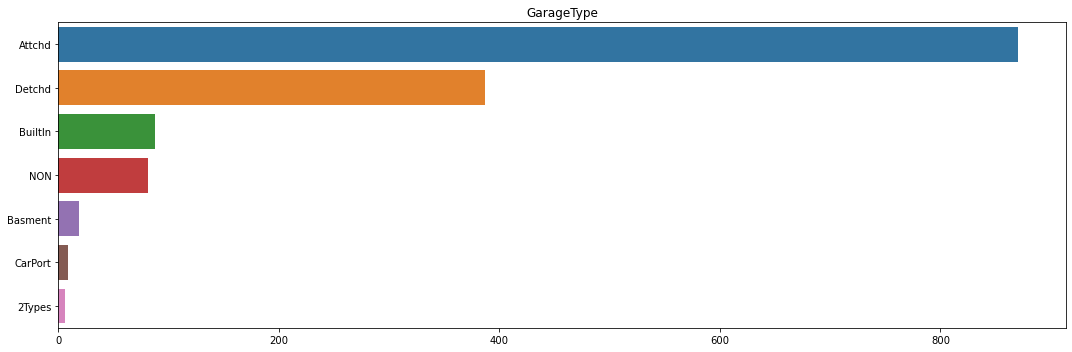

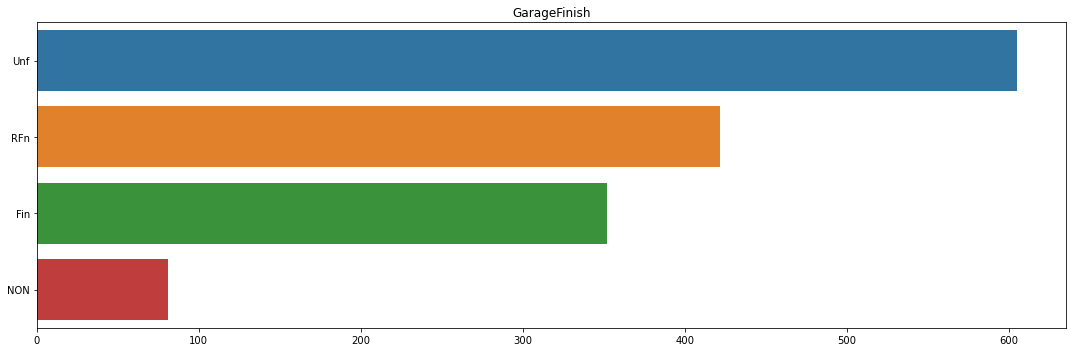

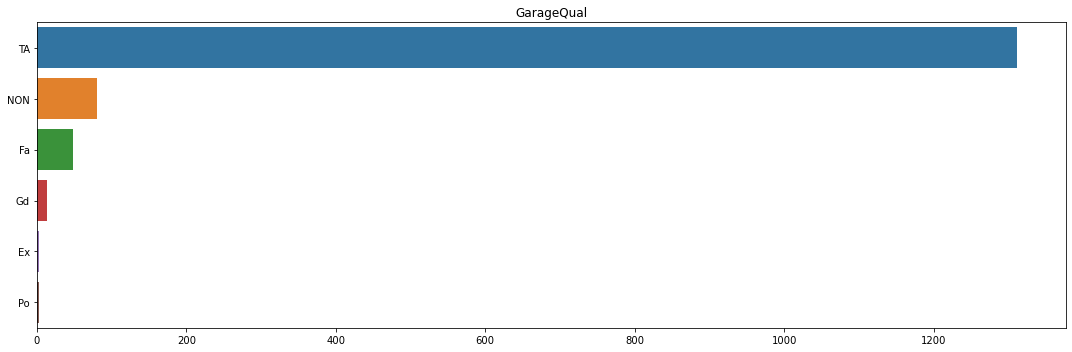

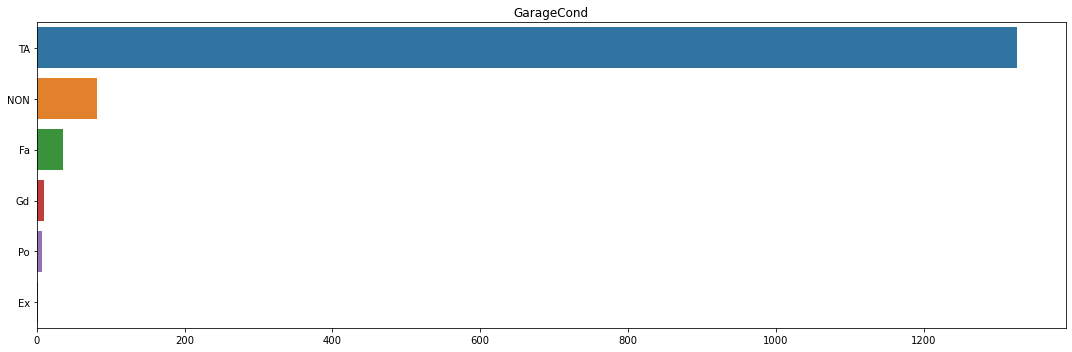

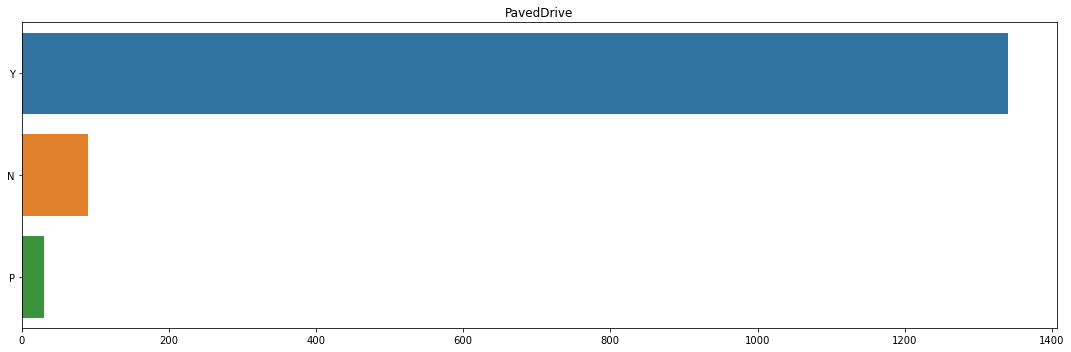

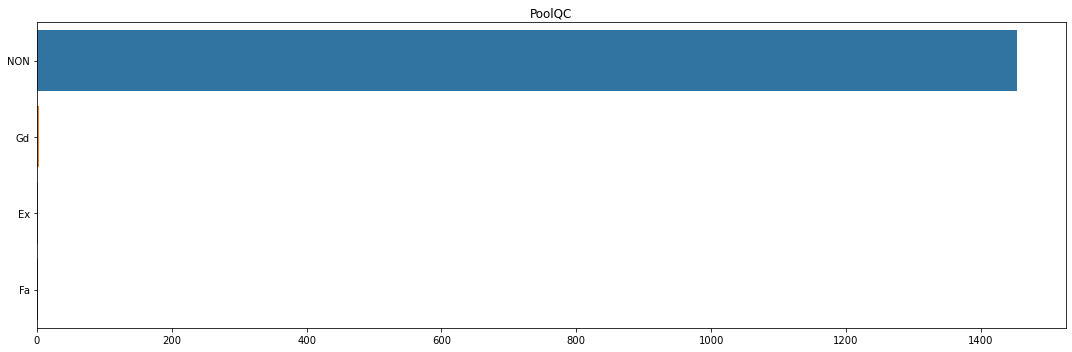

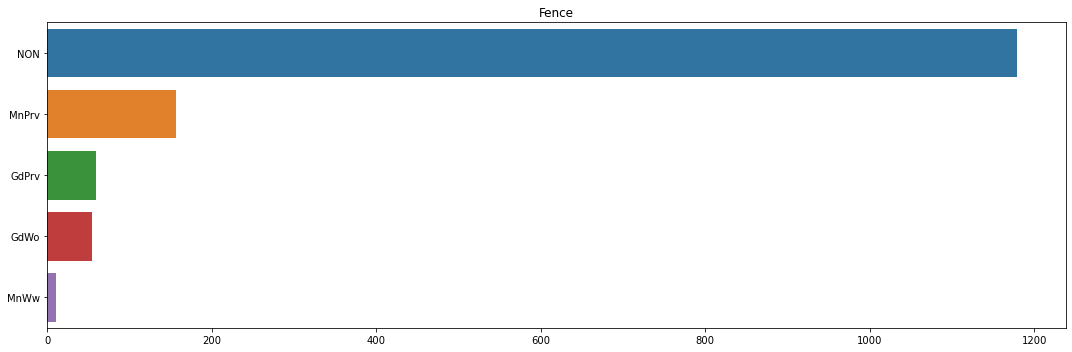

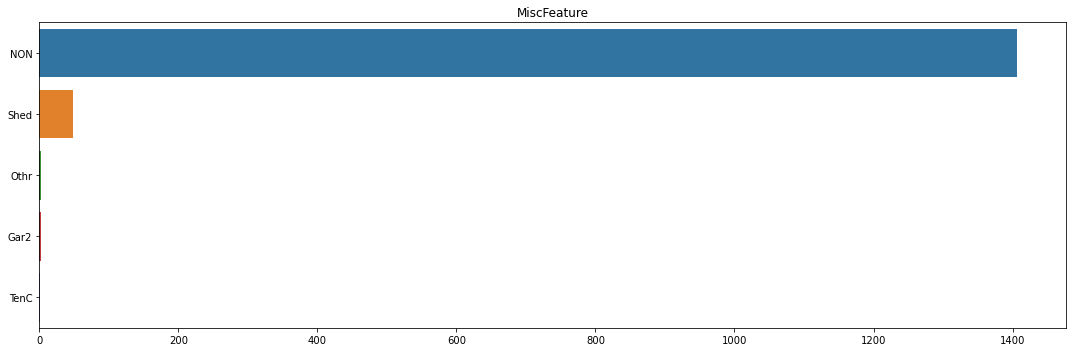

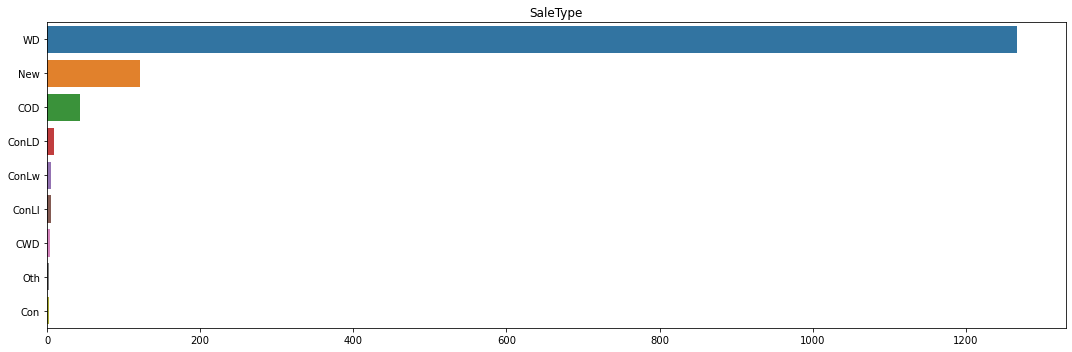

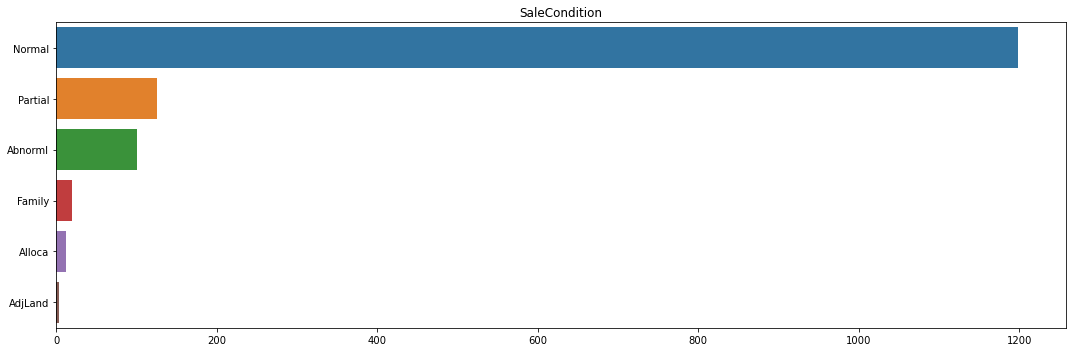

In [18]:
 for col in data1.select_dtypes('object'):
    plt.figure(figsize=(15,5))
    sns.barplot(data1[col].value_counts().values, data1[col].value_counts().index, data=data1)
    plt.title(col)    
    plt.tight_layout()

## Check all unique values present in categorical features

In [19]:
for col in data1.select_dtypes('object').columns:
    print('No of unique {} \n {} \t column : {}\n {}'
          .format(len(data1[col].unique()),col,data1[col].unique(),
                  data1[col].value_counts()))
    print("*"*30)

No of unique 5 
 MSZoning 	 column : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
******************************
No of unique 2 
 Street 	 column : ['Pave' 'Grvl']
 Pave    1454
Grvl       6
Name: Street, dtype: int64
******************************
No of unique 3 
 Alley 	 column : ['NON' 'Grvl' 'Pave']
 NON     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
******************************
No of unique 4 
 LotShape 	 column : ['Reg' 'IR1' 'IR2' 'IR3']
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
******************************
No of unique 4 
 LandContour 	 column : ['Lvl' 'Bnk' 'Low' 'HLS']
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
******************************
No of unique 2 
 Utilities 	 column : ['AllPub' 'NoSeWa']
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
******************************
No of

### Transform data type of those feature where the actual type is 'string' but the feature value is 'Int'

In [20]:
data1['MSSubClass'] = data1['MSSubClass'].astype(str)
data1['MSSubClass'].dtype

dtype('O')

In [21]:
# Make a copy of the transformed dataset
data2 = data1.copy()

# Check for Numerical features

In [22]:
data2.select_dtypes(np.number).isnull().sum().sort_values(ascending=False)[:10]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
BsmtUnfSF         0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtFinSF2        0
dtype: int64

### Imputing the missing value by Applying Regressor Algorithm to predict

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
def knn_missing_value_imputer(data, null_target):
    data = data.copy()
    
    Numeric_data = data.select_dtypes(np.number)
    Non_Null_columns = Numeric_data.loc[:, Numeric_data.isna().sum() == 0].columns
    
    y_train = Numeric_data.loc[Numeric_data[null_target].isna()==False, null_target]
    x_train = Numeric_data.loc[Numeric_data[null_target].isna()==False, Non_Null_columns]
    x_test = Numeric_data.loc[Numeric_data[null_target].isna()==True, Non_Null_columns]    
    
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    
    y_prediction = knn.predict(x_test)
    data.loc[data[null_target].isna()==True, null_target]= y_prediction
    
    return data


### Print numeric features having missing value

In [25]:
data2.loc[:, data2.isnull().sum() > 0].columns  

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Filling Numneric missing values

In [26]:
for col in[
    'LotFrontage',
    'MasVnrArea',
    'GarageYrBlt'
]:
    data2 = knn_missing_value_imputer(data2, col)

## Check if there are any missing values left in Numerical features

In [27]:
data2.isnull().sum().sum()

0

# Go through Heat-Map to check the correlation of numerical features

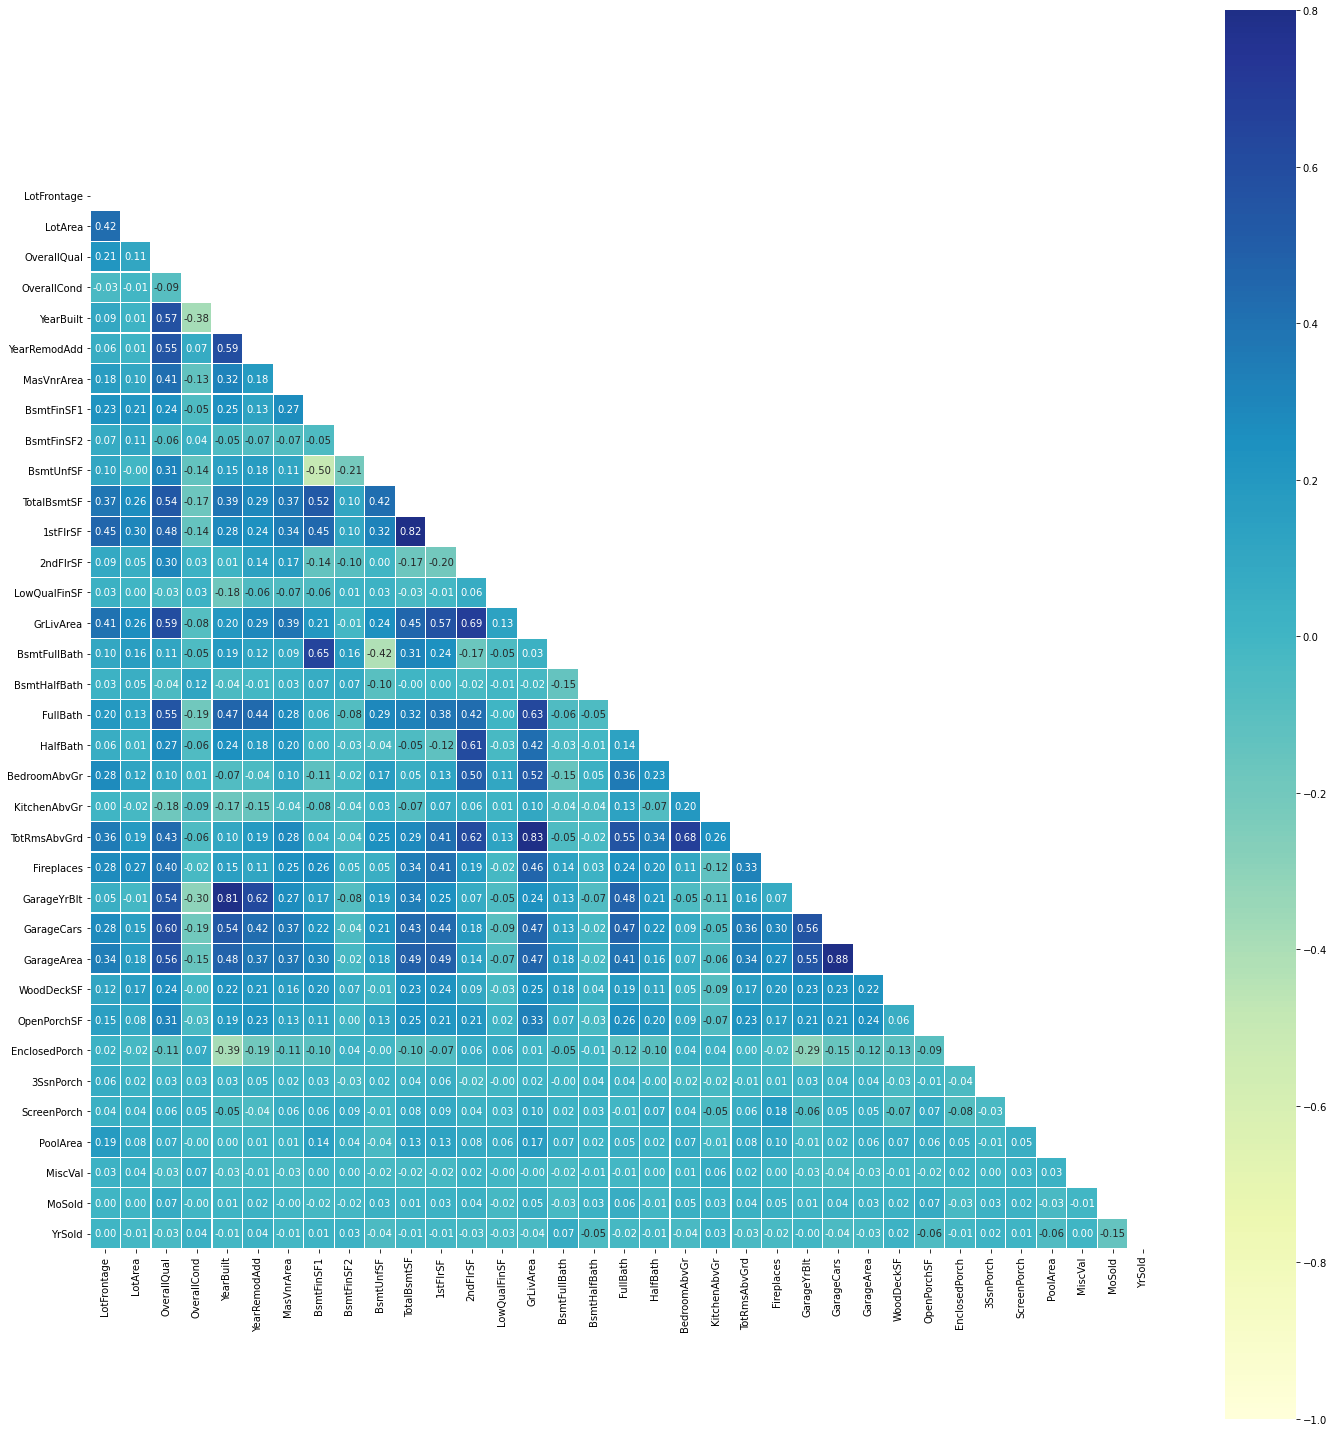

In [28]:
corr = data2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

fig = plt.figure(figsize=(20,20))
sns.heatmap(data2._get_numeric_data().astype(float).corr(), annot=True, square=True,
            linewidths=0.2, fmt=".2f",center=0, vmin=-1, vmax=0.8, 
            mask=mask, cmap='YlGnBu').figure.tight_layout()

# Add some more features

In [29]:
# Make a copy of the latest dataset
data3 = data2.copy()

In [30]:
data3['SqFtPerRoom'] = data3['GrLivArea'] / (data3['TotRmsAbvGrd'] +
                                             data3['FullBath'] +data2['HalfBath']+
                                             data3['KitchenAbvGr']
                                            )  

# GrLivArea = Above grade (ground) living area square feet, 
# TotRmsAbvGrd = Total rooms above grade (does not include bathrooms)
# FullBath = Full bathrooms above grade
# HalfBath = Half baths above grade
# KitchenAbvGr = Kitchens above grade


data3['Total_Home_Quality'] = data3['OverallQual'] + data3['OverallCond']

# OverallQual = Rates the overall material and finish of the house
# OverallCond = Rates the overall condition of the house
# Total_Home_Quality = rating (2= Very Poor ... and 20 = Very Excellent)



data3['Toatal_Bathroom'] = (data3['FullBath']+ (0.5*data3['HalfBath'])+ 
                            data3['BsmtFullBath']+ (.5 * data3['BsmtHalfBath'])
                           )

# FullBath = Full bathrooms above grade
# HalfBath = Half baths above grade
# BsmtFullBath= Basement full bathrooms
# BsmtHalfBath= Basement half bathrooms

data3['HighQualSF'] = data3['1stFlrSF'] + data3['2ndFlrSF']


# 1stFlrSF = First Floor square feet
# 2ndFlrSF = Second floor square feet



In [31]:
data3.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NON      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NON      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NON      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NON      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NON      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NON     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

In [32]:
# Make a copy of the latest dataset
data4 = data3.copy()

# Feature transformation

## Visualization of all numeric features to see skewness and distribution

In [33]:
data4.select_dtypes(np.number).head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SqFtPerRoom  Total_Home_Quality  Toatal_Bathroom  HighQualSF  
0   142.500000                  12              3.5        1710  
1   140.222222                  14              2.5        1262  
2   178.600000                  12              3.5        1786  
3   190.777778                  12              2.0        1717  
4   169.076923                  13              3.5        2198

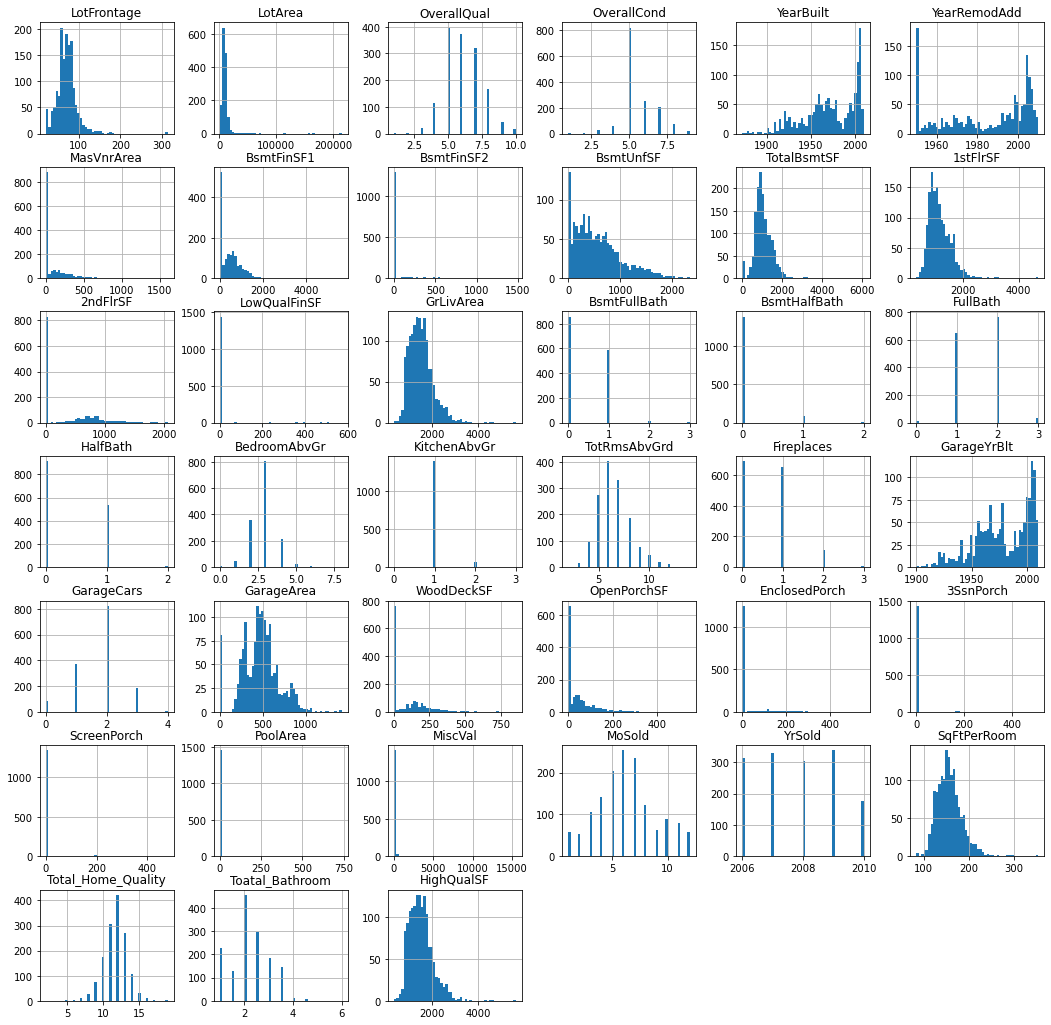

In [34]:
_= data4.hist(bins=50, figsize=(18,18))

## Using log function to handle skewness

In [35]:
skew_data = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Features'])
skew_data['skew']= skew_data['Features'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_data['Abslute Skew'] = skew_data['skew'].apply(abs)
skew_data['skewed'] = skew_data['Abslute Skew'].apply(lambda x: True if x>0.5 else False)
skew_data

Features       skew  Abslute Skew  skewed
0          LotFrontage   1.914130      1.914130    True
1              LotArea  12.195142     12.195142    True
2          OverallQual   0.216721      0.216721   False
3          OverallCond   0.692355      0.692355    True
4            YearBuilt  -0.612831      0.612831    True
5         YearRemodAdd  -0.503044      0.503044    True
6           MasVnrArea   2.649104      2.649104    True
7           BsmtFinSF1   1.683771      1.683771    True
8           BsmtFinSF2   4.250888      4.250888    True
9            BsmtUnfSF   0.919323      0.919323    True
10         TotalBsmtSF   1.522688      1.522688    True
11            1stFlrSF   1.375342      1.375342    True
12            2ndFlrSF   0.812194      0.812194    True
13        LowQualFinSF   9.002080      9.002080    True
14           GrLivArea   1.365156      1.365156    True
15        BsmtFullBath   0.595454      0.595454    True
16        BsmtHalfBath   4.099186      4.099186    True
17            FullBath   0.036524      0.036524   False
18            HalfBath   0.675203      0.675203    True
19        BedroomAbvGr   0.211572      0.211572   False
20        KitchenAbvGr   4.483784      4.483784    True
21        TotRmsAbvGrd   0.675646      0.675646    True
22          Fireplaces   0.648898      0.648898    True
23         GarageYrBlt  -0.568389      0.568389    True
24          GarageCars  -0.342197      0.342197   False
25          GarageArea   0.179796      0.179796   False
26          WoodDeckSF   1.539792      1.539792    True
27         OpenPorchSF   2.361912      2.361912    True
28       EnclosedPorch   3.086696      3.086696    True
29           3SsnPorch  10.293752     10.293752    True
30         ScreenPorch   4.117977      4.117977    True
31            PoolArea  14.813135     14.813135    True
32             MiscVal  24.451640     24.451640    True
33              MoSold   0.211835      0.211835   False
34              YrSold   0.096170      0.096170   False
35         SqFtPerRoom   0.980817      0.980817    True
36  Total_Home_Quality  -0.424413      0.424413   False
37     Toatal_Bathroom   0.264404      0.264404   False
38          HighQualSF   1.329103      1.329103    True

In [36]:
data4[skew_data.query('skewed==True')['Features'].values].describe()

LotFrontage        LotArea  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000    1460.000000  1460.000000  1460.000000   1460.000000   
mean     70.968493   10516.828082     5.575342  1971.267808   1984.865753   
std      23.745787    9981.264932     1.112799    30.202904     20.645407   
min      21.000000    1300.000000     1.000000  1872.000000   1950.000000   
25%      60.000000    7553.500000     5.000000  1954.000000   1967.000000   
50%      70.000000    9478.500000     5.000000  1973.000000   1994.000000   
75%      81.600000   11601.500000     6.000000  2000.000000   2004.000000   
max     313.000000  215245.000000     9.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    104.274795   443.639726    46.549315   567.240411  1057.429452   
std     181.315123   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     HalfBath  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       0.057534     0.382877      1.046575      6.517808     0.613014   
std        0.238753     0.502885      0.220338      1.625393     0.644666   
min        0.000000     0.000000      0.000000      2.000000     0.000000   
25%        0.000000     0.000000      1.000000      5.000000     0.000000   
50%        0.000000     0.000000      1.000000      6.000000     1.000000   
75%        0.000000     1.000000      1.000000      7.000000     1.000000   
max        2.000000     2.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean   1977.584521    94.244521    46.660274      21.954110     3.409589   
std      24.574097   125.338794    66.256028      61.119149    29.317331   
min    1900.000000     0.000000     0.000000       0.000000     0.000000   
25%    1960.000000     0.000000     0.000000       0.000000     0.000000   
50%    1978.000000     0.000000    25.000000       0.000000     0.000000   
75%    2001.000000   168.000000    68.000000       0.000000     0.000000   
max    2010.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal  SqFtPerRoom   HighQualSF  
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  
mean     15.060959     2.758904     43.489041   157.307896  1509.619178  
std      55.757415    40.177307    496.123024    28.149217   521.163523  
min       0.000000     0.000000      0.000000    83.500000   334.000000  
25%       0.000000     0.000000      0.000000   137.741071  1123.750000  
50%       0.000000     0.000000      0.000000   154.666667  1458.000000  
75%       0.000000     0.000000      0.000000   172.584821  1775

# Note:

There are many features where the Min value = 0. As log(0) is undefined, we have used log(1+x) instead of log.

In [37]:
for col in skew_data.query('skewed == True')['Features'].values:
    data4[col]= np.log1p(data4[col])

In [38]:
skew_data = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Features'])
skew_data['skew']= skew_data['Features'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_data['Abslute Skew'] = skew_data['skew'].apply(abs)
skew_data['skewed'] = skew_data['Abslute Skew'].apply(lambda x: True if x>0.5 else False)
skew_data

Features       skew  Abslute Skew  skewed
0          LotFrontage  -0.788304      0.788304    True
1              LotArea  -0.137263      0.137263   False
2          OverallQual   0.216721      0.216721   False
3          OverallCond  -0.253754      0.253754   False
4            YearBuilt  -0.640470      0.640470    True
5         YearRemodAdd  -0.510480      0.510480    True
6           MasVnrArea   0.483632      0.483632   False
7           BsmtFinSF1  -0.617774      0.617774    True
8           BsmtFinSF2   2.521100      2.521100    True
9            BsmtUnfSF  -2.184257      2.184257    True
10         TotalBsmtSF  -5.149373      5.149373    True
11            1stFlrSF   0.080032      0.080032   False
12            2ndFlrSF   0.289346      0.289346   False
13        LowQualFinSF   7.452650      7.452650    True
14           GrLivArea  -0.006134      0.006134   False
15        BsmtFullBath   0.418782      0.418782   False
16        BsmtHalfBath   3.929022      3.929022    True
17            FullBath   0.036524      0.036524   False
18            HalfBath   0.565586      0.565586    True
19        BedroomAbvGr   0.211572      0.211572   False
20        KitchenAbvGr   3.865437      3.865437    True
21        TotRmsAbvGrd  -0.058198      0.058198   False
22          Fireplaces   0.181896      0.181896   False
23         GarageYrBlt  -0.590208      0.590208    True
24          GarageCars  -0.342197      0.342197   False
25          GarageArea   0.179796      0.179796   False
26          WoodDeckSF   0.153379      0.153379   False
27         OpenPorchSF  -0.023373      0.023373   False
28       EnclosedPorch   2.110104      2.110104    True
29           3SsnPorch   7.727026      7.727026    True
30         ScreenPorch   3.147171      3.147171    True
31            PoolArea  14.348342     14.348342    True
32             MiscVal   5.165390      5.165390    True
33              MoSold   0.211835      0.211835   False
34              YrSold   0.096170      0.096170   False
35         SqFtPerRoom   0.224827      0.224827   False
36  Total_Home_Quality  -0.424413      0.424413   False
37     Toatal_Bathroom   0.264404      0.264404   False
38          HighQualSF  -0.033657      0.033657   False

## Cosine transform for Cyclical Features 

'MoSold' is Cyclical feature, starting from January(1) and ending with December(12) and the cycle repeats. So we use perodic fuction for Month of sold feature

In [39]:
data4['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [40]:
data4['MoSold'] = (-np.cos(0.536 * data4['MoSold']))
data4['MoSold']

0      -0.478369
1       0.895344
2      -0.111379
3      -0.478369
4      -0.988948
5      -0.603283
6       0.411764
7      -0.925976
8       0.542326
9      -0.859758
10     -0.478369
11      0.819415
12     -0.111379
13      0.411764
14      0.895344
15      0.819415
16      0.037195
17     -0.603283
18      0.997233
19      0.895344
20     -0.925976
21      0.997233
22     -0.111379
23      0.997233
24      0.895344
25      0.819415
26      0.895344
27      0.895344
28     -0.988948
29      0.895344
30      0.819415
31      0.997233
32     -0.859758
33      0.542326
34      0.411764
35     -0.111379
36      0.997233
37     -0.603283
38     -0.859758
39      0.997233
40     -0.988948
41      0.819415
42     -0.988948
43      0.819415
44      0.895344
45     -0.478369
46      0.411764
47      0.819415
48      0.997233
49     -0.859758
50      0.819415
51     -0.111379
52      0.895344
53     -0.925976
54     -0.478369
55      0.819415
56      0.411764
57      0.411764
58     -0.6032

## Target feature Transformation and handling skewness

In [41]:
sns.set_style('whitegrid')

In [42]:
np.min(target), np.max(target)

(34900, 755000)

## Plotting graph of Without/With Log Transform along with Probablity plot to check skewness

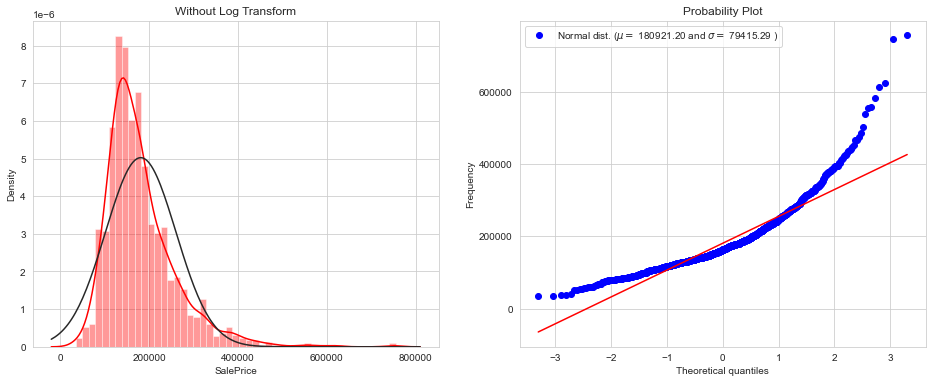

In [43]:
fig = plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm, color='r')
plt.title("Without Log Transform")


plt.subplot(1,2,2)

(mu, sigma) = scipy.stats.norm.fit(target)
scipy.stats.probplot(target, plot=plt)     # Probablity plot
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.show()

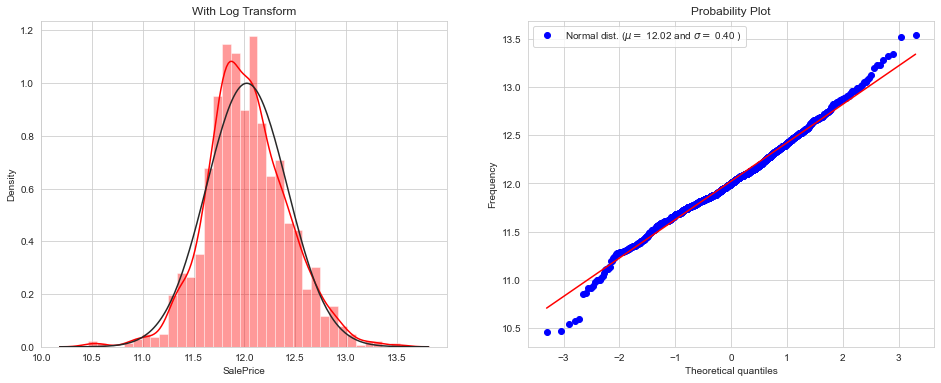

In [44]:
fig = plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.distplot(np.log1p(target), kde=True, fit=scipy.stats.norm, color='r')
plt.title("With Log Transform")


plt.subplot(1,2,2)

(mu, sigma) = scipy.stats.norm.fit(np.log1p(target))
scipy.stats.probplot(np.log1p(target), plot=plt)  # Probablity plot
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

plt.show()

In [45]:
#Transform the target
log_target = np.log1p(target)

In [46]:
log_target
# np.exp(log_target)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
30      10.596660
31      11.914055
32      12.100162
33      12.016733
34      12.533580
35      12.641100
36      11.884496
37      11.938200
38      11.599112
39      11.314487
40      11.982935
41      12.043560
42      11.877576
43      11.777219
44      11.856522
45      12.675767
46      12.387089
47      12.428019
48      11.635152
49      11.751950
50      12.083911
51      11.648339
52      11.608245
53      12.861001
54      11.775297
55      12

In [47]:
# Make a copy of the latest dataset
data5 = data4.copy()

#  Encoding the categorical features

### One hot encoding

In [48]:
data5 = pd.get_dummies(data5).reset_index(drop=True)

In [49]:
data5.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     4.189655  9.042040            7     1.791759   7.602900      7.602900   
1     4.394449  9.169623            6     2.197225   7.589336      7.589336   
2     4.234107  9.328212            7     1.791759   7.601902      7.602401   
3     4.110874  9.164401            7     1.791759   7.557995      7.586296   
4     4.442651  9.565284            8     1.791759   7.601402      7.601402   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0    5.283204    6.561031         0.0   5.017280     6.753438  6.753438   
1    0.000000    6.886532         0.0   5.652489     7.141245  7.141245   
2    5.093750    6.188264         0.0   6.075346     6.825460  6.825460   
3    0.000000    5.379897         0.0   6.293419     6.629363  6.869014   
4    5.860786    6.486161         0.0   6.196444     7.044033  7.044033   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  6.751101           0.0   7.444833      0.693147      0.000000         2   
1  0.000000           0.0   7.141245      0.000000      0.693147         2   
2  6.765039           0.0   7.488294      0.693147      0.000000         2   
3  6.629363           0.0   7.448916      0.693147      0.000000         1   
4  6.960348           0.0   7.695758      0.693147      0.000000         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.693147             3      0.693147      2.197225    0.000000   
1  0.000000             3      0.693147      1.945910    0.693147   
2  0.693147             3      0.693147      1.945910    0.693147   
3  0.000000             3      0.693147      2.079442    0.693147   
4  0.693147             4      0.693147      2.302585    0.693147   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     7.602900           2         548    0.000000     4.127134   
1     7.589336           2         460    5.700444     0.000000   
2     7.601902           2         608    0.000000     3.761200   
3     7.600402           3         642    0.000000     3.583519   
4     7.601402           3         836    5.262690     4.442651   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0       0.000000        0.0          0.0       0.0      0.0 -0.478369    2008   
1       0.000000        0.0          0.0       0.0      0.0  0.895344    2007   
2       0.000000        0.0          0.0       0.0      0.0 -0.111379    2008   
3       5.609472        0.0          0.0       0.0      0.0 -0.478369    2006   
4       0.000000        0.0          0.0       0.0      0.0 -0.988948    2008   

   SqFtPerRoom  Total_Home_Quality  Toatal_Bathroom  HighQualSF  \
0     4.966335                  12              3.5    7.444833   
1     4.950335                  14              2.5    7.141245   
2     5.190732                  12              3.5    7.488294   
3     5.256337                  12              2.0    7.448916   
4     5.136251                  13              3.5    7.695758   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   M

In [50]:
# Make a copy of the latest dataset
data6 = data5.copy()

#  Feature Scaling

In [51]:
scalar = StandardScaler()
scalar.fit(data6)

StandardScaler()

In [52]:
data6 = pd.DataFrame(scalar.transform(data6), index=data6.index, columns=data6.columns)

In [53]:
data6.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    -0.096400 -0.133270     0.651479    -0.460408   1.045180      0.877541   
1     0.506565  0.113413    -0.071836     1.948163   0.163445     -0.424186   
2     0.034477  0.420049     0.651479    -0.460408   0.980275      0.829642   
3    -0.328350  0.103317     0.651479    -0.460408  -1.873790     -0.715872   
4     0.648484  0.878431     1.374795    -0.460408   0.947798      0.733773   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0    1.192009    0.779431   -0.355342  -0.340511     0.002513 -0.803645   
1   -0.814750    0.888257   -0.355342   0.002218     0.341114  0.418479   
2    1.120048    0.654803   -0.355342   0.230372     0.065397 -0.576677   
3   -0.814750    0.384539   -0.355342   0.348034    -0.105819 -0.439421   
4    1.411397    0.754400   -0.355342   0.295711     0.256237  0.112127   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1.180528     -0.133602   0.529194      1.148788     -0.242923  0.789741   
1 -0.870117     -0.133602  -0.381965     -0.833225      4.021453  0.789741   
2  1.184762     -0.133602   0.659631      1.148788     -0.242923  0.789741   
3  1.143550     -0.133602   0.541448      1.148788     -0.242923 -1.026041   
4  1.244087     -0.133602   1.282295      1.148788     -0.242923  0.789741   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  1.258580      0.163779     -0.207607      0.946985   -1.013562   
1 -0.769639      0.163779     -0.207607     -0.226437    0.743356   
2  1.258580      0.163779     -0.207607     -0.226437    0.743356   
3 -0.769639      0.163779     -0.207607      0.397039    0.743356   
4  1.258580      1.390023     -0.207607      1.438928    0.743356   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     1.030450    0.311725    0.351000   -0.946701     0.845209   
1    -0.058075    0.311725   -0.060731    1.249540    -1.072916   
2     0.950323    0.311725    0.631726   -0.946701     0.675137   
3     0.829982    1.650307    0.790804   -0.946701     0.592558   
4     0.910230    1.650307    1.698485    1.080884     0.991848   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0      -0.404244  -0.128521    -0.292769 -0.069393 -0.190481 -1.190288   
1      -0.404244  -0.128521    -0.292769 -0.069393 -0.190481  0.817831   
2      -0.404244  -0.128521    -0.292769 -0.069393 -0.190481 -0.653816   
3       2.844374  -0.128521    -0.292769 -0.069393 -0.190481 -1.190288   
4      -0.404244  -0.128521    -0.292769 -0.069393 -0.190481 -1.936662   

     YrSold  SqFtPerRoom  Total_Home_Quality  Toatal_Bathroom  HighQualSF  \
0  0.138777    -0.483658            0.192175         1.642256    0.540045   
1 -0.614439    -0.576675            1.373547         0.368581   -0.370270   
2  0.138777     0.820857            0.192175         1.642256    0.670361   
3 -1.367655     1.202248            0.192175        -0.268257    0.552287   
4  0.138777     0.504134            0.782861         1.642256    1.292447   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0       -0.251724        -0.21236       -0.083045       -0.144841   
1       -0.251724        -0.21236       -0.083045       -0.144841   
2       -0.251724        -0.21236       -0.083045       -0.144841   
3       -0.251724        -0.21236       -0.083045       -0.144841   
4       -0.251724        -0.21236       -0.083045       -0.144841   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0      -0.761634      -0.222721      -0.052414      -0.091035      -0.330791   
1       1.312966      -0.222721      -0.052414      -0.091035      -0.330791   
2      -0.761634      -0.222721      -0.052414      -0.091035      -0.330791   
3      -0.761634      -0.222721      -0.052414      -0.091035      -0.330791   
4      -0.761634      -0.222721      -0.052414      -0.091035      

# Spliting data into Train test split

In [54]:
x = data6
y = log_target

In [55]:
x.shape, y.shape

((1460, 320), (1460,))

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [57]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 320), (1168,), (292, 320), (292,))

# Modelling - Algorithms selection

### For selecting which regression algorithm is best for model, used pycaret.
### For using pycaret we transform split data into Data-frame

In [58]:
x_train_Algo_sel = pd.DataFrame(x_train)
y_train_Algo_sel = pd.DataFrame(y_train)
y_test_Algo_sel = pd.DataFrame(y_test)
x_test_Algo_sel = pd.DataFrame(x_test)

In [59]:
setup(pd.concat([x_train_Algo_sel, y_train_Algo_sel], axis=1), target='SalePrice'[:1168])

('SalePrice',
       LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
 254      0.118604 -0.144744    -0.795151     0.455288  -0.464285   
 1066    -0.377017 -0.278866    -0.071836     1.248500   0.720004   
 638     -0.008505 -0.059866    -0.795151     1.248500  -2.043643   
 799     -0.328350 -0.442759    -0.795151     1.248500  -1.131667   
 380     -0.855513 -1.147685    -0.795151     0.455288  -1.569170   
 ...           ...       ...          ...          ...        ...   
 1095     0.432955  0.055563    -0.071836    -0.460408   1.142417   
 1130    -0.096400 -0.287024    -1.518467    -2.868979  -1.434240   
 1294    -0.328350 -0.197944    -0.795151     1.248500  -0.530715   
 860     -0.580149 -0.327578     0.651479     1.948163  -1.772091   
 1126    -0.687224 -1.738118     0.651479    -0.460408   1.174796   
 
       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
 254      -1.350917   -0.814750    0.868564   -0.355342   0.175588  ...   
 1066 

In [60]:
compare_models(exclude = ['lar'])

## Train the model using these top 9 algorithms

In [61]:
models = {
    "catboost": CatBoostRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "light gbm": LGBMRegressor(),
    "ridge " : Ridge(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "Xgboost" : XGBRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "KNeighbor": KNeighborsRegressor()
}


### Fitting/ Training All selected Algorithm

In [62]:
# Training all model
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name+ " trained.")

Learning rate set to 0.040124
0:	learn: 0.3813839	total: 18.6ms	remaining: 18.5s
1:	learn: 0.3721750	total: 31.7ms	remaining: 15.8s
2:	learn: 0.3634320	total: 46.4ms	remaining: 15.4s
3:	learn: 0.3551323	total: 59.8ms	remaining: 14.9s
4:	learn: 0.3464764	total: 72.5ms	remaining: 14.4s
5:	learn: 0.3382682	total: 87.4ms	remaining: 14.5s
6:	learn: 0.3300243	total: 101ms	remaining: 14.3s
7:	learn: 0.3221962	total: 115ms	remaining: 14.2s
8:	learn: 0.3146452	total: 128ms	remaining: 14.1s
9:	learn: 0.3074209	total: 141ms	remaining: 14s
10:	learn: 0.3001883	total: 153ms	remaining: 13.8s
11:	learn: 0.2932040	total: 166ms	remaining: 13.6s
12:	learn: 0.2871147	total: 181ms	remaining: 13.7s
13:	learn: 0.2816020	total: 195ms	remaining: 13.7s
14:	learn: 0.2754338	total: 209ms	remaining: 13.7s
15:	learn: 0.2696781	total: 222ms	remaining: 13.7s
16:	learn: 0.2636680	total: 235ms	remaining: 13.6s
17:	learn: 0.2583240	total: 248ms	remaining: 13.5s
18:	learn: 0.2530515	total: 261ms	remaining: 13.5s
19:	lea

168:	learn: 0.0983127	total: 2.34s	remaining: 11.5s
169:	learn: 0.0981204	total: 2.35s	remaining: 11.5s
170:	learn: 0.0980508	total: 2.37s	remaining: 11.5s
171:	learn: 0.0980087	total: 2.38s	remaining: 11.4s
172:	learn: 0.0978121	total: 2.39s	remaining: 11.4s
173:	learn: 0.0976121	total: 2.4s	remaining: 11.4s
174:	learn: 0.0974074	total: 2.41s	remaining: 11.4s
175:	learn: 0.0972859	total: 2.43s	remaining: 11.4s
176:	learn: 0.0971102	total: 2.44s	remaining: 11.3s
177:	learn: 0.0968887	total: 2.45s	remaining: 11.3s
178:	learn: 0.0966955	total: 2.48s	remaining: 11.4s
179:	learn: 0.0965371	total: 2.49s	remaining: 11.4s
180:	learn: 0.0964918	total: 2.5s	remaining: 11.3s
181:	learn: 0.0963793	total: 2.52s	remaining: 11.3s
182:	learn: 0.0961532	total: 2.53s	remaining: 11.3s
183:	learn: 0.0960848	total: 2.54s	remaining: 11.3s
184:	learn: 0.0959148	total: 2.56s	remaining: 11.3s
185:	learn: 0.0956958	total: 2.57s	remaining: 11.2s
186:	learn: 0.0953915	total: 2.58s	remaining: 11.2s
187:	learn: 0.

332:	learn: 0.0751855	total: 4.49s	remaining: 9s
333:	learn: 0.0750943	total: 4.5s	remaining: 8.98s
334:	learn: 0.0749892	total: 4.52s	remaining: 8.97s
335:	learn: 0.0748625	total: 4.53s	remaining: 8.96s
336:	learn: 0.0747653	total: 4.55s	remaining: 8.95s
337:	learn: 0.0747425	total: 4.56s	remaining: 8.93s
338:	learn: 0.0745832	total: 4.57s	remaining: 8.92s
339:	learn: 0.0745077	total: 4.59s	remaining: 8.9s
340:	learn: 0.0744559	total: 4.6s	remaining: 8.89s
341:	learn: 0.0744338	total: 4.62s	remaining: 8.88s
342:	learn: 0.0744096	total: 4.63s	remaining: 8.87s
343:	learn: 0.0743015	total: 4.64s	remaining: 8.86s
344:	learn: 0.0741427	total: 4.66s	remaining: 8.85s
345:	learn: 0.0740389	total: 4.67s	remaining: 8.84s
346:	learn: 0.0739223	total: 4.69s	remaining: 8.82s
347:	learn: 0.0737947	total: 4.7s	remaining: 8.81s
348:	learn: 0.0737090	total: 4.72s	remaining: 8.8s
349:	learn: 0.0736233	total: 4.73s	remaining: 8.78s
350:	learn: 0.0735127	total: 4.74s	remaining: 8.77s
351:	learn: 0.073330

492:	learn: 0.0605167	total: 6.66s	remaining: 6.85s
493:	learn: 0.0604251	total: 6.67s	remaining: 6.83s
494:	learn: 0.0603334	total: 6.68s	remaining: 6.82s
495:	learn: 0.0602783	total: 6.7s	remaining: 6.81s
496:	learn: 0.0601811	total: 6.71s	remaining: 6.79s
497:	learn: 0.0601338	total: 6.72s	remaining: 6.78s
498:	learn: 0.0600504	total: 6.74s	remaining: 6.76s
499:	learn: 0.0599600	total: 6.75s	remaining: 6.75s
500:	learn: 0.0598537	total: 6.76s	remaining: 6.74s
501:	learn: 0.0597575	total: 6.78s	remaining: 6.72s
502:	learn: 0.0596885	total: 6.79s	remaining: 6.71s
503:	learn: 0.0596793	total: 6.81s	remaining: 6.7s
504:	learn: 0.0596331	total: 6.82s	remaining: 6.68s
505:	learn: 0.0595293	total: 6.83s	remaining: 6.67s
506:	learn: 0.0594207	total: 6.85s	remaining: 6.66s
507:	learn: 0.0593664	total: 6.86s	remaining: 6.65s
508:	learn: 0.0593548	total: 6.88s	remaining: 6.63s
509:	learn: 0.0592745	total: 6.89s	remaining: 6.62s
510:	learn: 0.0592126	total: 6.9s	remaining: 6.61s
511:	learn: 0.0

658:	learn: 0.0500326	total: 8.96s	remaining: 4.64s
659:	learn: 0.0500277	total: 8.97s	remaining: 4.62s
660:	learn: 0.0499823	total: 8.99s	remaining: 4.61s
661:	learn: 0.0499227	total: 9s	remaining: 4.59s
662:	learn: 0.0499176	total: 9.01s	remaining: 4.58s
663:	learn: 0.0498574	total: 9.02s	remaining: 4.57s
664:	learn: 0.0498521	total: 9.03s	remaining: 4.55s
665:	learn: 0.0498473	total: 9.05s	remaining: 4.54s
666:	learn: 0.0497884	total: 9.06s	remaining: 4.52s
667:	learn: 0.0497793	total: 9.07s	remaining: 4.51s
668:	learn: 0.0496920	total: 9.08s	remaining: 4.49s
669:	learn: 0.0496273	total: 9.1s	remaining: 4.48s
670:	learn: 0.0495764	total: 9.11s	remaining: 4.46s
671:	learn: 0.0495715	total: 9.12s	remaining: 4.45s
672:	learn: 0.0495016	total: 9.13s	remaining: 4.44s
673:	learn: 0.0494795	total: 9.14s	remaining: 4.42s
674:	learn: 0.0494231	total: 9.16s	remaining: 4.41s
675:	learn: 0.0494186	total: 9.17s	remaining: 4.39s
676:	learn: 0.0494139	total: 9.18s	remaining: 4.38s
677:	learn: 0.04

821:	learn: 0.0422798	total: 11.1s	remaining: 2.41s
822:	learn: 0.0422732	total: 11.1s	remaining: 2.4s
823:	learn: 0.0422503	total: 11.2s	remaining: 2.38s
824:	learn: 0.0422029	total: 11.2s	remaining: 2.37s
825:	learn: 0.0421534	total: 11.2s	remaining: 2.36s
826:	learn: 0.0420850	total: 11.2s	remaining: 2.34s
827:	learn: 0.0420246	total: 11.2s	remaining: 2.33s
828:	learn: 0.0419526	total: 11.2s	remaining: 2.32s
829:	learn: 0.0419075	total: 11.3s	remaining: 2.31s
830:	learn: 0.0418382	total: 11.3s	remaining: 2.29s
831:	learn: 0.0417840	total: 11.3s	remaining: 2.28s
832:	learn: 0.0417815	total: 11.3s	remaining: 2.26s
833:	learn: 0.0417424	total: 11.3s	remaining: 2.25s
834:	learn: 0.0416532	total: 11.3s	remaining: 2.24s
835:	learn: 0.0415778	total: 11.3s	remaining: 2.22s
836:	learn: 0.0415535	total: 11.3s	remaining: 2.21s
837:	learn: 0.0414883	total: 11.4s	remaining: 2.2s
838:	learn: 0.0414531	total: 11.4s	remaining: 2.18s
839:	learn: 0.0413983	total: 11.4s	remaining: 2.17s
840:	learn: 0.

991:	learn: 0.0348656	total: 13.4s	remaining: 108ms
992:	learn: 0.0348232	total: 13.4s	remaining: 94.8ms
993:	learn: 0.0347825	total: 13.5s	remaining: 81.2ms
994:	learn: 0.0347171	total: 13.5s	remaining: 67.7ms
995:	learn: 0.0346967	total: 13.5s	remaining: 54.1ms
996:	learn: 0.0346579	total: 13.5s	remaining: 40.6ms
997:	learn: 0.0346123	total: 13.5s	remaining: 27.1ms
998:	learn: 0.0345550	total: 13.5s	remaining: 13.5ms
999:	learn: 0.0345000	total: 13.5s	remaining: 0us
catboost trained.
Bayesian Ridge trained.
light gbm trained.
ridge  trained.
Gradient Boosting trained.
Xgboost trained.
Random Forest trained.
Decision Tree trained.
KNeighbor trained.


# Hyperparameter Tuning to improve the performance of Catboost Model

In [63]:
Grid = {'max_depth': [3,4,5],
                  'n_estimators':[100, 200, 300]}

kfold = KFold(n_splits=10)
catboost_1  = CatBoostRegressor()
catboost_1_grid = GridSearchCV(catboost_1, Grid, scoring='r2', cv=kfold)
catboost_1_grid.fit(x_train, y_train)

Learning rate set to 0.226593
0:	learn: 0.3514619	total: 10.2ms	remaining: 1.01s
1:	learn: 0.3140216	total: 16.8ms	remaining: 824ms
2:	learn: 0.2808035	total: 23.5ms	remaining: 758ms
3:	learn: 0.2551233	total: 30ms	remaining: 720ms
4:	learn: 0.2324676	total: 36.3ms	remaining: 689ms
5:	learn: 0.2130365	total: 43.5ms	remaining: 682ms
6:	learn: 0.1971541	total: 47.8ms	remaining: 635ms
7:	learn: 0.1865467	total: 52.5ms	remaining: 604ms
8:	learn: 0.1781073	total: 56.7ms	remaining: 573ms
9:	learn: 0.1711358	total: 61.3ms	remaining: 552ms
10:	learn: 0.1649551	total: 65.4ms	remaining: 529ms
11:	learn: 0.1598039	total: 69.7ms	remaining: 511ms
12:	learn: 0.1551728	total: 74ms	remaining: 495ms
13:	learn: 0.1517469	total: 78.3ms	remaining: 481ms
14:	learn: 0.1480780	total: 82.3ms	remaining: 466ms
15:	learn: 0.1457421	total: 86.7ms	remaining: 455ms
16:	learn: 0.1437608	total: 90.8ms	remaining: 443ms
17:	learn: 0.1419767	total: 95.3ms	remaining: 434ms
18:	learn: 0.1395832	total: 99.4ms	remaining: 42

80:	learn: 0.0894886	total: 336ms	remaining: 78.7ms
81:	learn: 0.0890658	total: 340ms	remaining: 74.6ms
82:	learn: 0.0889826	total: 343ms	remaining: 70.3ms
83:	learn: 0.0885776	total: 347ms	remaining: 66.1ms
84:	learn: 0.0883235	total: 351ms	remaining: 61.9ms
85:	learn: 0.0879328	total: 355ms	remaining: 57.7ms
86:	learn: 0.0876931	total: 359ms	remaining: 53.6ms
87:	learn: 0.0873807	total: 363ms	remaining: 49.5ms
88:	learn: 0.0872990	total: 368ms	remaining: 45.4ms
89:	learn: 0.0872435	total: 371ms	remaining: 41.3ms
90:	learn: 0.0868744	total: 376ms	remaining: 37.1ms
91:	learn: 0.0866584	total: 379ms	remaining: 33ms
92:	learn: 0.0863348	total: 383ms	remaining: 28.8ms
93:	learn: 0.0859563	total: 387ms	remaining: 24.7ms
94:	learn: 0.0857480	total: 391ms	remaining: 20.6ms
95:	learn: 0.0855641	total: 394ms	remaining: 16.4ms
96:	learn: 0.0852436	total: 398ms	remaining: 12.3ms
97:	learn: 0.0850680	total: 402ms	remaining: 8.21ms
98:	learn: 0.0845605	total: 406ms	remaining: 4.1ms
99:	learn: 0.08

39:	learn: 0.1144305	total: 172ms	remaining: 259ms
40:	learn: 0.1135883	total: 176ms	remaining: 254ms
41:	learn: 0.1132552	total: 181ms	remaining: 249ms
42:	learn: 0.1121975	total: 185ms	remaining: 245ms
43:	learn: 0.1105510	total: 188ms	remaining: 240ms
44:	learn: 0.1097783	total: 192ms	remaining: 235ms
45:	learn: 0.1094263	total: 196ms	remaining: 230ms
46:	learn: 0.1085995	total: 200ms	remaining: 225ms
47:	learn: 0.1078050	total: 203ms	remaining: 220ms
48:	learn: 0.1066502	total: 208ms	remaining: 216ms
49:	learn: 0.1055600	total: 212ms	remaining: 212ms
50:	learn: 0.1047619	total: 216ms	remaining: 207ms
51:	learn: 0.1046107	total: 219ms	remaining: 203ms
52:	learn: 0.1037546	total: 223ms	remaining: 198ms
53:	learn: 0.1031323	total: 227ms	remaining: 193ms
54:	learn: 0.1024055	total: 231ms	remaining: 189ms
55:	learn: 0.1016147	total: 235ms	remaining: 185ms
56:	learn: 0.1008685	total: 239ms	remaining: 180ms
57:	learn: 0.1001312	total: 243ms	remaining: 176ms
58:	learn: 0.0996565	total: 247

Learning rate set to 0.226593
0:	learn: 0.3345114	total: 8.71ms	remaining: 862ms
1:	learn: 0.2975419	total: 13.2ms	remaining: 649ms
2:	learn: 0.2693225	total: 17.3ms	remaining: 560ms
3:	learn: 0.2440999	total: 22.2ms	remaining: 533ms
4:	learn: 0.2231403	total: 26.3ms	remaining: 499ms
5:	learn: 0.2077362	total: 30.7ms	remaining: 481ms
6:	learn: 0.1944455	total: 34.6ms	remaining: 460ms
7:	learn: 0.1851303	total: 38.5ms	remaining: 443ms
8:	learn: 0.1755666	total: 42.3ms	remaining: 427ms
9:	learn: 0.1685023	total: 46.1ms	remaining: 415ms
10:	learn: 0.1617565	total: 50.8ms	remaining: 411ms
11:	learn: 0.1561289	total: 54.6ms	remaining: 400ms
12:	learn: 0.1510990	total: 58.7ms	remaining: 393ms
13:	learn: 0.1470893	total: 62.4ms	remaining: 383ms
14:	learn: 0.1443150	total: 67ms	remaining: 380ms
15:	learn: 0.1410267	total: 70.5ms	remaining: 370ms
16:	learn: 0.1389862	total: 74.5ms	remaining: 364ms
17:	learn: 0.1365291	total: 78.3ms	remaining: 357ms
18:	learn: 0.1350944	total: 81.8ms	remaining: 

79:	learn: 0.0927009	total: 329ms	remaining: 82.2ms
80:	learn: 0.0924762	total: 332ms	remaining: 78ms
81:	learn: 0.0920548	total: 337ms	remaining: 73.9ms
82:	learn: 0.0919730	total: 340ms	remaining: 69.7ms
83:	learn: 0.0916512	total: 344ms	remaining: 65.6ms
84:	learn: 0.0910694	total: 348ms	remaining: 61.4ms
85:	learn: 0.0906414	total: 353ms	remaining: 57.4ms
86:	learn: 0.0903146	total: 356ms	remaining: 53.3ms
87:	learn: 0.0899321	total: 361ms	remaining: 49.2ms
88:	learn: 0.0896106	total: 364ms	remaining: 45ms
89:	learn: 0.0891585	total: 368ms	remaining: 40.9ms
90:	learn: 0.0888103	total: 372ms	remaining: 36.8ms
91:	learn: 0.0884444	total: 375ms	remaining: 32.6ms
92:	learn: 0.0878985	total: 380ms	remaining: 28.6ms
93:	learn: 0.0874990	total: 383ms	remaining: 24.5ms
94:	learn: 0.0871568	total: 388ms	remaining: 20.4ms
95:	learn: 0.0869498	total: 391ms	remaining: 16.3ms
96:	learn: 0.0865787	total: 396ms	remaining: 12.2ms
97:	learn: 0.0863610	total: 400ms	remaining: 8.16ms
98:	learn: 0.085

39:	learn: 0.1107268	total: 161ms	remaining: 242ms
40:	learn: 0.1098879	total: 165ms	remaining: 238ms
41:	learn: 0.1088503	total: 169ms	remaining: 234ms
42:	learn: 0.1079983	total: 173ms	remaining: 229ms
43:	learn: 0.1071483	total: 177ms	remaining: 225ms
44:	learn: 0.1065958	total: 181ms	remaining: 221ms
45:	learn: 0.1056844	total: 184ms	remaining: 217ms
46:	learn: 0.1054373	total: 189ms	remaining: 213ms
47:	learn: 0.1048002	total: 192ms	remaining: 208ms
48:	learn: 0.1045632	total: 197ms	remaining: 205ms
49:	learn: 0.1037735	total: 201ms	remaining: 201ms
50:	learn: 0.1031541	total: 205ms	remaining: 197ms
51:	learn: 0.1025432	total: 208ms	remaining: 192ms
52:	learn: 0.1020482	total: 213ms	remaining: 189ms
53:	learn: 0.1013033	total: 217ms	remaining: 184ms
54:	learn: 0.1008256	total: 220ms	remaining: 180ms
55:	learn: 0.1005190	total: 224ms	remaining: 176ms
56:	learn: 0.0999584	total: 228ms	remaining: 172ms
57:	learn: 0.0995583	total: 232ms	remaining: 168ms
58:	learn: 0.0994220	total: 235

Learning rate set to 0.133802
0:	learn: 0.3687148	total: 4.09ms	remaining: 815ms
1:	learn: 0.3441304	total: 8.88ms	remaining: 879ms
2:	learn: 0.3184393	total: 12.6ms	remaining: 828ms
3:	learn: 0.2963048	total: 17ms	remaining: 832ms
4:	learn: 0.2793066	total: 20.6ms	remaining: 804ms
5:	learn: 0.2624652	total: 25ms	remaining: 808ms
6:	learn: 0.2489561	total: 28.6ms	remaining: 788ms
7:	learn: 0.2370443	total: 33.2ms	remaining: 796ms
8:	learn: 0.2272978	total: 36.7ms	remaining: 780ms
9:	learn: 0.2176825	total: 40.4ms	remaining: 768ms
10:	learn: 0.2085339	total: 44.5ms	remaining: 764ms
11:	learn: 0.2000825	total: 48ms	remaining: 752ms
12:	learn: 0.1922680	total: 52.3ms	remaining: 753ms
13:	learn: 0.1862715	total: 55.9ms	remaining: 742ms
14:	learn: 0.1803389	total: 60.1ms	remaining: 742ms
15:	learn: 0.1755095	total: 63.8ms	remaining: 733ms
16:	learn: 0.1707868	total: 67.9ms	remaining: 731ms
17:	learn: 0.1669243	total: 71.9ms	remaining: 727ms
18:	learn: 0.1633469	total: 75.6ms	remaining: 720m

162:	learn: 0.0863743	total: 645ms	remaining: 147ms
163:	learn: 0.0861524	total: 650ms	remaining: 143ms
164:	learn: 0.0858688	total: 654ms	remaining: 139ms
165:	learn: 0.0857853	total: 657ms	remaining: 135ms
166:	learn: 0.0855684	total: 661ms	remaining: 131ms
167:	learn: 0.0854662	total: 665ms	remaining: 127ms
168:	learn: 0.0852827	total: 668ms	remaining: 123ms
169:	learn: 0.0852203	total: 673ms	remaining: 119ms
170:	learn: 0.0851745	total: 676ms	remaining: 115ms
171:	learn: 0.0850325	total: 680ms	remaining: 111ms
172:	learn: 0.0848952	total: 684ms	remaining: 107ms
173:	learn: 0.0848001	total: 688ms	remaining: 103ms
174:	learn: 0.0846091	total: 691ms	remaining: 98.8ms
175:	learn: 0.0845088	total: 695ms	remaining: 94.8ms
176:	learn: 0.0843449	total: 699ms	remaining: 90.8ms
177:	learn: 0.0841805	total: 703ms	remaining: 86.8ms
178:	learn: 0.0841377	total: 707ms	remaining: 82.9ms
179:	learn: 0.0839711	total: 710ms	remaining: 78.9ms
180:	learn: 0.0838873	total: 714ms	remaining: 75ms
181:	le

159:	learn: 0.0836945	total: 654ms	remaining: 163ms
160:	learn: 0.0835495	total: 658ms	remaining: 159ms
161:	learn: 0.0834749	total: 661ms	remaining: 155ms
162:	learn: 0.0833360	total: 665ms	remaining: 151ms
163:	learn: 0.0831402	total: 669ms	remaining: 147ms
164:	learn: 0.0829576	total: 673ms	remaining: 143ms
165:	learn: 0.0827402	total: 678ms	remaining: 139ms
166:	learn: 0.0825896	total: 682ms	remaining: 135ms
167:	learn: 0.0823848	total: 686ms	remaining: 131ms
168:	learn: 0.0823512	total: 690ms	remaining: 127ms
169:	learn: 0.0823179	total: 694ms	remaining: 122ms
170:	learn: 0.0821573	total: 698ms	remaining: 118ms
171:	learn: 0.0819723	total: 701ms	remaining: 114ms
172:	learn: 0.0816284	total: 705ms	remaining: 110ms
173:	learn: 0.0813436	total: 709ms	remaining: 106ms
174:	learn: 0.0811385	total: 713ms	remaining: 102ms
175:	learn: 0.0810595	total: 717ms	remaining: 97.7ms
176:	learn: 0.0809315	total: 721ms	remaining: 93.7ms
177:	learn: 0.0807091	total: 725ms	remaining: 89.6ms
178:	lear

148:	learn: 0.0885036	total: 666ms	remaining: 228ms
149:	learn: 0.0883378	total: 671ms	remaining: 224ms
150:	learn: 0.0880020	total: 677ms	remaining: 220ms
151:	learn: 0.0878605	total: 682ms	remaining: 215ms
152:	learn: 0.0876801	total: 687ms	remaining: 211ms
153:	learn: 0.0874699	total: 692ms	remaining: 207ms
154:	learn: 0.0871981	total: 697ms	remaining: 202ms
155:	learn: 0.0870161	total: 702ms	remaining: 198ms
156:	learn: 0.0867874	total: 706ms	remaining: 193ms
157:	learn: 0.0865454	total: 712ms	remaining: 189ms
158:	learn: 0.0864674	total: 717ms	remaining: 185ms
159:	learn: 0.0862120	total: 723ms	remaining: 181ms
160:	learn: 0.0860144	total: 728ms	remaining: 176ms
161:	learn: 0.0857421	total: 733ms	remaining: 172ms
162:	learn: 0.0855351	total: 738ms	remaining: 168ms
163:	learn: 0.0853030	total: 742ms	remaining: 163ms
164:	learn: 0.0851499	total: 747ms	remaining: 159ms
165:	learn: 0.0849734	total: 752ms	remaining: 154ms
166:	learn: 0.0846612	total: 757ms	remaining: 150ms
167:	learn: 

123:	learn: 0.0919975	total: 497ms	remaining: 305ms
124:	learn: 0.0917280	total: 501ms	remaining: 301ms
125:	learn: 0.0914602	total: 505ms	remaining: 297ms
126:	learn: 0.0912108	total: 509ms	remaining: 293ms
127:	learn: 0.0909856	total: 514ms	remaining: 289ms
128:	learn: 0.0907203	total: 517ms	remaining: 285ms
129:	learn: 0.0905482	total: 521ms	remaining: 281ms
130:	learn: 0.0902521	total: 525ms	remaining: 277ms
131:	learn: 0.0900274	total: 529ms	remaining: 273ms
132:	learn: 0.0897571	total: 533ms	remaining: 269ms
133:	learn: 0.0895388	total: 537ms	remaining: 264ms
134:	learn: 0.0894708	total: 542ms	remaining: 261ms
135:	learn: 0.0891871	total: 546ms	remaining: 257ms
136:	learn: 0.0889794	total: 551ms	remaining: 253ms
137:	learn: 0.0886862	total: 554ms	remaining: 249ms
138:	learn: 0.0884099	total: 559ms	remaining: 245ms
139:	learn: 0.0880829	total: 563ms	remaining: 241ms
140:	learn: 0.0878835	total: 567ms	remaining: 237ms
141:	learn: 0.0876538	total: 571ms	remaining: 233ms
142:	learn: 

119:	learn: 0.0938062	total: 484ms	remaining: 323ms
120:	learn: 0.0937215	total: 488ms	remaining: 318ms
121:	learn: 0.0932451	total: 491ms	remaining: 314ms
122:	learn: 0.0930061	total: 495ms	remaining: 310ms
123:	learn: 0.0927925	total: 500ms	remaining: 306ms
124:	learn: 0.0924261	total: 503ms	remaining: 302ms
125:	learn: 0.0922661	total: 508ms	remaining: 298ms
126:	learn: 0.0920546	total: 511ms	remaining: 294ms
127:	learn: 0.0918295	total: 515ms	remaining: 290ms
128:	learn: 0.0917320	total: 519ms	remaining: 286ms
129:	learn: 0.0915349	total: 522ms	remaining: 281ms
130:	learn: 0.0913949	total: 526ms	remaining: 277ms
131:	learn: 0.0910149	total: 530ms	remaining: 273ms
132:	learn: 0.0909447	total: 534ms	remaining: 269ms
133:	learn: 0.0905898	total: 538ms	remaining: 265ms
134:	learn: 0.0903478	total: 542ms	remaining: 261ms
135:	learn: 0.0900550	total: 546ms	remaining: 257ms
136:	learn: 0.0900032	total: 549ms	remaining: 253ms
137:	learn: 0.0897494	total: 553ms	remaining: 248ms
138:	learn: 

77:	learn: 0.1056546	total: 322ms	remaining: 503ms
78:	learn: 0.1053829	total: 326ms	remaining: 499ms
79:	learn: 0.1049142	total: 329ms	remaining: 494ms
80:	learn: 0.1047830	total: 333ms	remaining: 490ms
81:	learn: 0.1042833	total: 337ms	remaining: 485ms
82:	learn: 0.1038531	total: 341ms	remaining: 481ms
83:	learn: 0.1034571	total: 345ms	remaining: 476ms
84:	learn: 0.1029095	total: 349ms	remaining: 472ms
85:	learn: 0.1027323	total: 353ms	remaining: 468ms
86:	learn: 0.1022943	total: 356ms	remaining: 463ms
87:	learn: 0.1019054	total: 360ms	remaining: 458ms
88:	learn: 0.1015344	total: 364ms	remaining: 454ms
89:	learn: 0.1014232	total: 368ms	remaining: 450ms
90:	learn: 0.1011212	total: 372ms	remaining: 445ms
91:	learn: 0.1007878	total: 376ms	remaining: 441ms
92:	learn: 0.1004236	total: 380ms	remaining: 437ms
93:	learn: 0.1003018	total: 384ms	remaining: 433ms
94:	learn: 0.0999265	total: 387ms	remaining: 428ms
95:	learn: 0.0994330	total: 391ms	remaining: 424ms
96:	learn: 0.0991334	total: 395

74:	learn: 0.1079046	total: 323ms	remaining: 539ms
75:	learn: 0.1074045	total: 328ms	remaining: 535ms
76:	learn: 0.1072417	total: 332ms	remaining: 530ms
77:	learn: 0.1069045	total: 336ms	remaining: 525ms
78:	learn: 0.1064404	total: 339ms	remaining: 520ms
79:	learn: 0.1057367	total: 344ms	remaining: 515ms
80:	learn: 0.1053962	total: 347ms	remaining: 510ms
81:	learn: 0.1051627	total: 351ms	remaining: 505ms
82:	learn: 0.1048163	total: 355ms	remaining: 500ms
83:	learn: 0.1044330	total: 358ms	remaining: 495ms
84:	learn: 0.1040320	total: 363ms	remaining: 490ms
85:	learn: 0.1038042	total: 366ms	remaining: 485ms
86:	learn: 0.1031338	total: 371ms	remaining: 481ms
87:	learn: 0.1030138	total: 374ms	remaining: 476ms
88:	learn: 0.1028547	total: 378ms	remaining: 472ms
89:	learn: 0.1025836	total: 382ms	remaining: 467ms
90:	learn: 0.1020631	total: 386ms	remaining: 462ms
91:	learn: 0.1017077	total: 389ms	remaining: 457ms
92:	learn: 0.1012597	total: 393ms	remaining: 452ms
93:	learn: 0.1009122	total: 397

39:	learn: 0.1274281	total: 169ms	remaining: 677ms
40:	learn: 0.1266831	total: 174ms	remaining: 674ms
41:	learn: 0.1259304	total: 178ms	remaining: 668ms
42:	learn: 0.1250645	total: 182ms	remaining: 664ms
43:	learn: 0.1242381	total: 185ms	remaining: 657ms
44:	learn: 0.1238857	total: 189ms	remaining: 652ms
45:	learn: 0.1231156	total: 193ms	remaining: 647ms
46:	learn: 0.1225418	total: 197ms	remaining: 641ms
47:	learn: 0.1215654	total: 201ms	remaining: 636ms
48:	learn: 0.1209728	total: 204ms	remaining: 630ms
49:	learn: 0.1202472	total: 209ms	remaining: 627ms
50:	learn: 0.1196080	total: 213ms	remaining: 621ms
51:	learn: 0.1190396	total: 217ms	remaining: 617ms
52:	learn: 0.1187529	total: 221ms	remaining: 612ms
53:	learn: 0.1185565	total: 224ms	remaining: 607ms
54:	learn: 0.1177321	total: 228ms	remaining: 602ms
55:	learn: 0.1172738	total: 232ms	remaining: 596ms
56:	learn: 0.1165125	total: 236ms	remaining: 592ms
57:	learn: 0.1157061	total: 239ms	remaining: 586ms
58:	learn: 0.1153543	total: 244

Learning rate set to 0.133825
0:	learn: 0.3664048	total: 5.28ms	remaining: 1.05s
1:	learn: 0.3412869	total: 9.3ms	remaining: 921ms
2:	learn: 0.3190722	total: 13.9ms	remaining: 912ms
3:	learn: 0.2973966	total: 18.1ms	remaining: 889ms
4:	learn: 0.2791318	total: 22.6ms	remaining: 882ms
5:	learn: 0.2632692	total: 26.7ms	remaining: 864ms
6:	learn: 0.2500263	total: 31.1ms	remaining: 857ms
7:	learn: 0.2385813	total: 35ms	remaining: 840ms
8:	learn: 0.2261592	total: 39ms	remaining: 827ms
9:	learn: 0.2166732	total: 43.3ms	remaining: 823ms
10:	learn: 0.2081685	total: 47.2ms	remaining: 811ms
11:	learn: 0.1995097	total: 51.5ms	remaining: 807ms
12:	learn: 0.1925886	total: 55.4ms	remaining: 796ms
13:	learn: 0.1860349	total: 59.9ms	remaining: 796ms
14:	learn: 0.1805624	total: 63.7ms	remaining: 786ms
15:	learn: 0.1765422	total: 67.8ms	remaining: 780ms
16:	learn: 0.1716496	total: 71.5ms	remaining: 770ms
17:	learn: 0.1685342	total: 75.1ms	remaining: 760ms
18:	learn: 0.1647790	total: 79ms	remaining: 753ms

163:	learn: 0.0828195	total: 662ms	remaining: 145ms
164:	learn: 0.0826971	total: 666ms	remaining: 141ms
165:	learn: 0.0823524	total: 670ms	remaining: 137ms
166:	learn: 0.0821728	total: 676ms	remaining: 134ms
167:	learn: 0.0819626	total: 680ms	remaining: 130ms
168:	learn: 0.0818366	total: 684ms	remaining: 125ms
169:	learn: 0.0817862	total: 688ms	remaining: 121ms
170:	learn: 0.0816082	total: 692ms	remaining: 117ms
171:	learn: 0.0814084	total: 696ms	remaining: 113ms
172:	learn: 0.0812920	total: 700ms	remaining: 109ms
173:	learn: 0.0811775	total: 704ms	remaining: 105ms
174:	learn: 0.0809830	total: 708ms	remaining: 101ms
175:	learn: 0.0807906	total: 712ms	remaining: 97.1ms
176:	learn: 0.0806842	total: 717ms	remaining: 93.1ms
177:	learn: 0.0804299	total: 720ms	remaining: 89ms
178:	learn: 0.0801959	total: 724ms	remaining: 84.9ms
179:	learn: 0.0800221	total: 728ms	remaining: 80.9ms
180:	learn: 0.0799199	total: 731ms	remaining: 76.8ms
181:	learn: 0.0798773	total: 736ms	remaining: 72.8ms
182:	le

154:	learn: 0.0869308	total: 655ms	remaining: 190ms
155:	learn: 0.0867107	total: 660ms	remaining: 186ms
156:	learn: 0.0864938	total: 663ms	remaining: 182ms
157:	learn: 0.0862765	total: 668ms	remaining: 178ms
158:	learn: 0.0858861	total: 672ms	remaining: 173ms
159:	learn: 0.0856942	total: 676ms	remaining: 169ms
160:	learn: 0.0855794	total: 680ms	remaining: 165ms
161:	learn: 0.0852517	total: 683ms	remaining: 160ms
162:	learn: 0.0851818	total: 687ms	remaining: 156ms
163:	learn: 0.0851325	total: 691ms	remaining: 152ms
164:	learn: 0.0848873	total: 695ms	remaining: 147ms
165:	learn: 0.0847259	total: 699ms	remaining: 143ms
166:	learn: 0.0846470	total: 703ms	remaining: 139ms
167:	learn: 0.0845713	total: 707ms	remaining: 135ms
168:	learn: 0.0845131	total: 711ms	remaining: 130ms
169:	learn: 0.0843750	total: 715ms	remaining: 126ms
170:	learn: 0.0841747	total: 719ms	remaining: 122ms
171:	learn: 0.0840207	total: 723ms	remaining: 118ms
172:	learn: 0.0838415	total: 727ms	remaining: 113ms
173:	learn: 

119:	learn: 0.1031908	total: 490ms	remaining: 735ms
120:	learn: 0.1031065	total: 495ms	remaining: 732ms
121:	learn: 0.1028817	total: 499ms	remaining: 727ms
122:	learn: 0.1025801	total: 503ms	remaining: 724ms
123:	learn: 0.1023558	total: 507ms	remaining: 720ms
124:	learn: 0.1020657	total: 512ms	remaining: 716ms
125:	learn: 0.1018133	total: 515ms	remaining: 712ms
126:	learn: 0.1017353	total: 520ms	remaining: 708ms
127:	learn: 0.1016620	total: 523ms	remaining: 703ms
128:	learn: 0.1014153	total: 527ms	remaining: 698ms
129:	learn: 0.1011353	total: 531ms	remaining: 694ms
130:	learn: 0.1009327	total: 534ms	remaining: 689ms
131:	learn: 0.1006567	total: 538ms	remaining: 685ms
132:	learn: 0.1003989	total: 542ms	remaining: 681ms
133:	learn: 0.1001914	total: 546ms	remaining: 677ms
134:	learn: 0.1000038	total: 550ms	remaining: 672ms
135:	learn: 0.0997924	total: 554ms	remaining: 668ms
136:	learn: 0.0996648	total: 557ms	remaining: 663ms
137:	learn: 0.0994780	total: 561ms	remaining: 659ms
138:	learn: 

282:	learn: 0.0783675	total: 1.13s	remaining: 67.6ms
283:	learn: 0.0782955	total: 1.13s	remaining: 63.6ms
284:	learn: 0.0781761	total: 1.13s	remaining: 59.6ms
285:	learn: 0.0780701	total: 1.14s	remaining: 55.7ms
286:	learn: 0.0780273	total: 1.14s	remaining: 51.7ms
287:	learn: 0.0779444	total: 1.15s	remaining: 47.7ms
288:	learn: 0.0778660	total: 1.15s	remaining: 43.7ms
289:	learn: 0.0777738	total: 1.15s	remaining: 39.8ms
290:	learn: 0.0776925	total: 1.16s	remaining: 35.8ms
291:	learn: 0.0776421	total: 1.16s	remaining: 31.8ms
292:	learn: 0.0775656	total: 1.16s	remaining: 27.8ms
293:	learn: 0.0774495	total: 1.17s	remaining: 23.8ms
294:	learn: 0.0773616	total: 1.17s	remaining: 19.9ms
295:	learn: 0.0772371	total: 1.18s	remaining: 15.9ms
296:	learn: 0.0770946	total: 1.18s	remaining: 11.9ms
297:	learn: 0.0768729	total: 1.18s	remaining: 7.95ms
298:	learn: 0.0767396	total: 1.19s	remaining: 3.97ms
299:	learn: 0.0766798	total: 1.19s	remaining: 0us
Learning rate set to 0.098318
0:	learn: 0.3650478

161:	learn: 0.0917738	total: 654ms	remaining: 557ms
162:	learn: 0.0915824	total: 658ms	remaining: 553ms
163:	learn: 0.0913094	total: 662ms	remaining: 549ms
164:	learn: 0.0910432	total: 665ms	remaining: 544ms
165:	learn: 0.0908281	total: 670ms	remaining: 541ms
166:	learn: 0.0906507	total: 673ms	remaining: 536ms
167:	learn: 0.0904045	total: 678ms	remaining: 532ms
168:	learn: 0.0903601	total: 681ms	remaining: 528ms
169:	learn: 0.0901807	total: 685ms	remaining: 524ms
170:	learn: 0.0899981	total: 689ms	remaining: 520ms
171:	learn: 0.0898715	total: 693ms	remaining: 515ms
172:	learn: 0.0896878	total: 696ms	remaining: 511ms
173:	learn: 0.0895139	total: 700ms	remaining: 507ms
174:	learn: 0.0893761	total: 704ms	remaining: 503ms
175:	learn: 0.0891422	total: 708ms	remaining: 499ms
176:	learn: 0.0889313	total: 712ms	remaining: 495ms
177:	learn: 0.0887157	total: 716ms	remaining: 491ms
178:	learn: 0.0885526	total: 720ms	remaining: 487ms
179:	learn: 0.0883252	total: 724ms	remaining: 482ms
180:	learn: 

37:	learn: 0.1442132	total: 159ms	remaining: 1.1s
38:	learn: 0.1430171	total: 164ms	remaining: 1.1s
39:	learn: 0.1419245	total: 168ms	remaining: 1.09s
40:	learn: 0.1404735	total: 172ms	remaining: 1.08s
41:	learn: 0.1392615	total: 177ms	remaining: 1.08s
42:	learn: 0.1381051	total: 184ms	remaining: 1.1s
43:	learn: 0.1369599	total: 190ms	remaining: 1.1s
44:	learn: 0.1359845	total: 193ms	remaining: 1.09s
45:	learn: 0.1347947	total: 198ms	remaining: 1.09s
46:	learn: 0.1336929	total: 202ms	remaining: 1.08s
47:	learn: 0.1329184	total: 206ms	remaining: 1.08s
48:	learn: 0.1321119	total: 210ms	remaining: 1.07s
49:	learn: 0.1315053	total: 214ms	remaining: 1.07s
50:	learn: 0.1304345	total: 218ms	remaining: 1.06s
51:	learn: 0.1296756	total: 222ms	remaining: 1.06s
52:	learn: 0.1287691	total: 226ms	remaining: 1.05s
53:	learn: 0.1280785	total: 230ms	remaining: 1.05s
54:	learn: 0.1278673	total: 234ms	remaining: 1.04s
55:	learn: 0.1272550	total: 238ms	remaining: 1.04s
56:	learn: 0.1264393	total: 242ms	r

196:	learn: 0.0886299	total: 810ms	remaining: 423ms
197:	learn: 0.0884244	total: 813ms	remaining: 419ms
198:	learn: 0.0882309	total: 817ms	remaining: 415ms
199:	learn: 0.0880844	total: 822ms	remaining: 411ms
200:	learn: 0.0878902	total: 826ms	remaining: 407ms
201:	learn: 0.0877667	total: 830ms	remaining: 403ms
202:	learn: 0.0875868	total: 834ms	remaining: 399ms
203:	learn: 0.0875142	total: 839ms	remaining: 395ms
204:	learn: 0.0873033	total: 842ms	remaining: 390ms
205:	learn: 0.0871575	total: 847ms	remaining: 386ms
206:	learn: 0.0870314	total: 851ms	remaining: 382ms
207:	learn: 0.0870015	total: 855ms	remaining: 378ms
208:	learn: 0.0868926	total: 858ms	remaining: 374ms
209:	learn: 0.0867728	total: 862ms	remaining: 369ms
210:	learn: 0.0866408	total: 866ms	remaining: 365ms
211:	learn: 0.0864234	total: 870ms	remaining: 361ms
212:	learn: 0.0863512	total: 875ms	remaining: 357ms
213:	learn: 0.0862268	total: 878ms	remaining: 353ms
214:	learn: 0.0860963	total: 883ms	remaining: 349ms
215:	learn: 

79:	learn: 0.1109775	total: 322ms	remaining: 886ms
80:	learn: 0.1105883	total: 326ms	remaining: 882ms
81:	learn: 0.1104990	total: 330ms	remaining: 877ms
82:	learn: 0.1100071	total: 334ms	remaining: 873ms
83:	learn: 0.1097541	total: 338ms	remaining: 868ms
84:	learn: 0.1094419	total: 342ms	remaining: 864ms
85:	learn: 0.1089554	total: 345ms	remaining: 859ms
86:	learn: 0.1085383	total: 350ms	remaining: 857ms
87:	learn: 0.1083339	total: 353ms	remaining: 851ms
88:	learn: 0.1077557	total: 358ms	remaining: 848ms
89:	learn: 0.1073916	total: 361ms	remaining: 843ms
90:	learn: 0.1072057	total: 365ms	remaining: 839ms
91:	learn: 0.1067882	total: 369ms	remaining: 834ms
92:	learn: 0.1063844	total: 373ms	remaining: 829ms
93:	learn: 0.1059837	total: 377ms	remaining: 826ms
94:	learn: 0.1057048	total: 380ms	remaining: 821ms
95:	learn: 0.1052022	total: 385ms	remaining: 818ms
96:	learn: 0.1050768	total: 388ms	remaining: 813ms
97:	learn: 0.1045727	total: 393ms	remaining: 809ms
98:	learn: 0.1042961	total: 396

241:	learn: 0.0790601	total: 981ms	remaining: 235ms
242:	learn: 0.0789423	total: 985ms	remaining: 231ms
243:	learn: 0.0789018	total: 989ms	remaining: 227ms
244:	learn: 0.0788446	total: 993ms	remaining: 223ms
245:	learn: 0.0787303	total: 998ms	remaining: 219ms
246:	learn: 0.0786185	total: 1s	remaining: 215ms
247:	learn: 0.0785537	total: 1s	remaining: 211ms
248:	learn: 0.0784406	total: 1.01s	remaining: 207ms
249:	learn: 0.0782997	total: 1.01s	remaining: 203ms
250:	learn: 0.0781661	total: 1.02s	remaining: 198ms
251:	learn: 0.0780178	total: 1.02s	remaining: 194ms
252:	learn: 0.0777412	total: 1.02s	remaining: 190ms
253:	learn: 0.0776072	total: 1.03s	remaining: 186ms
254:	learn: 0.0774819	total: 1.03s	remaining: 182ms
255:	learn: 0.0773752	total: 1.04s	remaining: 178ms
256:	learn: 0.0772119	total: 1.04s	remaining: 174ms
257:	learn: 0.0770997	total: 1.04s	remaining: 170ms
258:	learn: 0.0769543	total: 1.05s	remaining: 166ms
259:	learn: 0.0769203	total: 1.05s	remaining: 162ms
260:	learn: 0.0768

124:	learn: 0.1012131	total: 499ms	remaining: 698ms
125:	learn: 0.1008237	total: 503ms	remaining: 695ms
126:	learn: 0.1005718	total: 509ms	remaining: 694ms
127:	learn: 0.1002611	total: 513ms	remaining: 689ms
128:	learn: 0.1000145	total: 517ms	remaining: 686ms
129:	learn: 0.0997782	total: 521ms	remaining: 681ms
130:	learn: 0.0997216	total: 525ms	remaining: 677ms
131:	learn: 0.0994420	total: 529ms	remaining: 673ms
132:	learn: 0.0993879	total: 533ms	remaining: 669ms
133:	learn: 0.0991355	total: 536ms	remaining: 665ms
134:	learn: 0.0990830	total: 540ms	remaining: 660ms
135:	learn: 0.0988115	total: 544ms	remaining: 657ms
136:	learn: 0.0985727	total: 548ms	remaining: 652ms
137:	learn: 0.0984233	total: 552ms	remaining: 648ms
138:	learn: 0.0982109	total: 556ms	remaining: 644ms
139:	learn: 0.0979860	total: 564ms	remaining: 645ms
140:	learn: 0.0978766	total: 569ms	remaining: 642ms
141:	learn: 0.0976771	total: 573ms	remaining: 638ms
142:	learn: 0.0974401	total: 578ms	remaining: 634ms
143:	learn: 

287:	learn: 0.0777389	total: 1.15s	remaining: 48ms
288:	learn: 0.0775843	total: 1.16s	remaining: 44ms
289:	learn: 0.0774620	total: 1.16s	remaining: 40ms
290:	learn: 0.0774187	total: 1.16s	remaining: 36ms
291:	learn: 0.0772889	total: 1.17s	remaining: 32ms
292:	learn: 0.0771283	total: 1.17s	remaining: 28ms
293:	learn: 0.0770389	total: 1.18s	remaining: 24ms
294:	learn: 0.0770186	total: 1.18s	remaining: 20ms
295:	learn: 0.0768366	total: 1.18s	remaining: 16ms
296:	learn: 0.0767119	total: 1.19s	remaining: 12ms
297:	learn: 0.0766272	total: 1.19s	remaining: 8.01ms
298:	learn: 0.0766077	total: 1.2s	remaining: 4ms
299:	learn: 0.0765097	total: 1.2s	remaining: 0us
Learning rate set to 0.098318
0:	learn: 0.3588841	total: 15.4ms	remaining: 4.59s
1:	learn: 0.3400433	total: 19.3ms	remaining: 2.88s
2:	learn: 0.3236350	total: 23.3ms	remaining: 2.31s
3:	learn: 0.3083062	total: 27.7ms	remaining: 2.05s
4:	learn: 0.2922176	total: 31.6ms	remaining: 1.87s
5:	learn: 0.2778617	total: 36.2ms	remaining: 1.77s
6:	

160:	learn: 0.0924478	total: 660ms	remaining: 570ms
161:	learn: 0.0922383	total: 664ms	remaining: 565ms
162:	learn: 0.0921005	total: 668ms	remaining: 561ms
163:	learn: 0.0919146	total: 671ms	remaining: 557ms
164:	learn: 0.0916818	total: 676ms	remaining: 553ms
165:	learn: 0.0914889	total: 680ms	remaining: 549ms
166:	learn: 0.0913169	total: 683ms	remaining: 544ms
167:	learn: 0.0911205	total: 687ms	remaining: 540ms
168:	learn: 0.0910870	total: 691ms	remaining: 535ms
169:	learn: 0.0908777	total: 694ms	remaining: 531ms
170:	learn: 0.0908427	total: 698ms	remaining: 526ms
171:	learn: 0.0906166	total: 702ms	remaining: 523ms
172:	learn: 0.0905842	total: 706ms	remaining: 518ms
173:	learn: 0.0903860	total: 710ms	remaining: 514ms
174:	learn: 0.0903592	total: 714ms	remaining: 510ms
175:	learn: 0.0901828	total: 718ms	remaining: 506ms
176:	learn: 0.0900083	total: 722ms	remaining: 502ms
177:	learn: 0.0898558	total: 725ms	remaining: 497ms
178:	learn: 0.0898318	total: 729ms	remaining: 493ms
179:	learn: 

40:	learn: 0.1388828	total: 165ms	remaining: 1.04s
41:	learn: 0.1376151	total: 169ms	remaining: 1.04s
42:	learn: 0.1370859	total: 173ms	remaining: 1.04s
43:	learn: 0.1361759	total: 177ms	remaining: 1.03s
44:	learn: 0.1352695	total: 182ms	remaining: 1.03s
45:	learn: 0.1342777	total: 185ms	remaining: 1.02s
46:	learn: 0.1335382	total: 189ms	remaining: 1.02s
47:	learn: 0.1326501	total: 193ms	remaining: 1.01s
48:	learn: 0.1318679	total: 197ms	remaining: 1.01s
49:	learn: 0.1310723	total: 201ms	remaining: 1s
50:	learn: 0.1303701	total: 204ms	remaining: 998ms
51:	learn: 0.1295174	total: 209ms	remaining: 995ms
52:	learn: 0.1289275	total: 212ms	remaining: 989ms
53:	learn: 0.1280020	total: 216ms	remaining: 986ms
54:	learn: 0.1274610	total: 220ms	remaining: 980ms
55:	learn: 0.1270963	total: 224ms	remaining: 975ms
56:	learn: 0.1264711	total: 228ms	remaining: 971ms
57:	learn: 0.1257125	total: 231ms	remaining: 965ms
58:	learn: 0.1250889	total: 236ms	remaining: 962ms
59:	learn: 0.1244555	total: 239ms	

204:	learn: 0.0861319	total: 823ms	remaining: 381ms
205:	learn: 0.0859515	total: 827ms	remaining: 377ms
206:	learn: 0.0858048	total: 831ms	remaining: 373ms
207:	learn: 0.0856861	total: 835ms	remaining: 369ms
208:	learn: 0.0854931	total: 839ms	remaining: 365ms
209:	learn: 0.0854508	total: 843ms	remaining: 361ms
210:	learn: 0.0852049	total: 847ms	remaining: 357ms
211:	learn: 0.0850670	total: 851ms	remaining: 353ms
212:	learn: 0.0850157	total: 855ms	remaining: 349ms
213:	learn: 0.0848247	total: 859ms	remaining: 345ms
214:	learn: 0.0847191	total: 862ms	remaining: 341ms
215:	learn: 0.0845813	total: 867ms	remaining: 337ms
216:	learn: 0.0845403	total: 870ms	remaining: 333ms
217:	learn: 0.0844072	total: 874ms	remaining: 329ms
218:	learn: 0.0842322	total: 878ms	remaining: 325ms
219:	learn: 0.0840414	total: 882ms	remaining: 321ms
220:	learn: 0.0839110	total: 886ms	remaining: 317ms
221:	learn: 0.0837275	total: 890ms	remaining: 313ms
222:	learn: 0.0836918	total: 894ms	remaining: 309ms
223:	learn: 

77:	learn: 0.1160578	total: 328ms	remaining: 935ms
78:	learn: 0.1156629	total: 333ms	remaining: 931ms
79:	learn: 0.1152224	total: 336ms	remaining: 925ms
80:	learn: 0.1150562	total: 340ms	remaining: 920ms
81:	learn: 0.1145991	total: 344ms	remaining: 915ms
82:	learn: 0.1143613	total: 348ms	remaining: 909ms
83:	learn: 0.1140224	total: 352ms	remaining: 905ms
84:	learn: 0.1138880	total: 355ms	remaining: 899ms
85:	learn: 0.1132820	total: 360ms	remaining: 895ms
86:	learn: 0.1131422	total: 363ms	remaining: 889ms
87:	learn: 0.1130263	total: 368ms	remaining: 885ms
88:	learn: 0.1124892	total: 371ms	remaining: 880ms
89:	learn: 0.1123627	total: 375ms	remaining: 876ms
90:	learn: 0.1118318	total: 379ms	remaining: 870ms
91:	learn: 0.1114179	total: 383ms	remaining: 865ms
92:	learn: 0.1113033	total: 387ms	remaining: 861ms
93:	learn: 0.1111995	total: 391ms	remaining: 856ms
94:	learn: 0.1110964	total: 395ms	remaining: 852ms
95:	learn: 0.1107453	total: 398ms	remaining: 847ms
96:	learn: 0.1106546	total: 403

245:	learn: 0.0836792	total: 988ms	remaining: 217ms
246:	learn: 0.0835317	total: 992ms	remaining: 213ms
247:	learn: 0.0834045	total: 997ms	remaining: 209ms
248:	learn: 0.0833701	total: 1s	remaining: 205ms
249:	learn: 0.0831215	total: 1s	remaining: 201ms
250:	learn: 0.0829796	total: 1.01s	remaining: 197ms
251:	learn: 0.0828715	total: 1.01s	remaining: 193ms
252:	learn: 0.0827224	total: 1.02s	remaining: 189ms
253:	learn: 0.0826993	total: 1.02s	remaining: 185ms
254:	learn: 0.0826209	total: 1.02s	remaining: 181ms
255:	learn: 0.0825913	total: 1.03s	remaining: 177ms
256:	learn: 0.0824763	total: 1.03s	remaining: 173ms
257:	learn: 0.0823712	total: 1.04s	remaining: 169ms
258:	learn: 0.0821906	total: 1.04s	remaining: 165ms
259:	learn: 0.0821247	total: 1.04s	remaining: 161ms
260:	learn: 0.0820496	total: 1.05s	remaining: 157ms
261:	learn: 0.0818983	total: 1.05s	remaining: 153ms
262:	learn: 0.0818011	total: 1.05s	remaining: 149ms
263:	learn: 0.0817437	total: 1.06s	remaining: 145ms
264:	learn: 0.0817

118:	learn: 0.1007666	total: 491ms	remaining: 747ms
119:	learn: 0.1005687	total: 495ms	remaining: 743ms
120:	learn: 0.1003488	total: 499ms	remaining: 738ms
121:	learn: 0.1000905	total: 503ms	remaining: 734ms
122:	learn: 0.1000128	total: 507ms	remaining: 729ms
123:	learn: 0.0997959	total: 511ms	remaining: 725ms
124:	learn: 0.0994805	total: 514ms	remaining: 720ms
125:	learn: 0.0992152	total: 519ms	remaining: 716ms
126:	learn: 0.0989406	total: 523ms	remaining: 712ms
127:	learn: 0.0988492	total: 526ms	remaining: 707ms
128:	learn: 0.0986598	total: 530ms	remaining: 703ms
129:	learn: 0.0984328	total: 534ms	remaining: 698ms
130:	learn: 0.0983652	total: 538ms	remaining: 694ms
131:	learn: 0.0980665	total: 541ms	remaining: 689ms
132:	learn: 0.0977790	total: 546ms	remaining: 685ms
133:	learn: 0.0977124	total: 565ms	remaining: 700ms
134:	learn: 0.0974560	total: 569ms	remaining: 695ms
135:	learn: 0.0970854	total: 572ms	remaining: 690ms
136:	learn: 0.0970258	total: 576ms	remaining: 685ms
137:	learn: 

278:	learn: 0.0764628	total: 1.13s	remaining: 85.3ms
279:	learn: 0.0763885	total: 1.14s	remaining: 81.2ms
280:	learn: 0.0763220	total: 1.14s	remaining: 77.2ms
281:	learn: 0.0762251	total: 1.15s	remaining: 73.1ms
282:	learn: 0.0760876	total: 1.15s	remaining: 69ms
283:	learn: 0.0759396	total: 1.15s	remaining: 64.9ms
284:	learn: 0.0758248	total: 1.16s	remaining: 60.9ms
285:	learn: 0.0757080	total: 1.16s	remaining: 56.8ms
286:	learn: 0.0755617	total: 1.16s	remaining: 52.7ms
287:	learn: 0.0754848	total: 1.17s	remaining: 48.7ms
288:	learn: 0.0754645	total: 1.17s	remaining: 44.6ms
289:	learn: 0.0753099	total: 1.18s	remaining: 40.5ms
290:	learn: 0.0752289	total: 1.18s	remaining: 36.5ms
291:	learn: 0.0750692	total: 1.18s	remaining: 32.4ms
292:	learn: 0.0750394	total: 1.19s	remaining: 28.4ms
293:	learn: 0.0749512	total: 1.19s	remaining: 24.3ms
294:	learn: 0.0748591	total: 1.19s	remaining: 20.3ms
295:	learn: 0.0747945	total: 1.2s	remaining: 16.2ms
296:	learn: 0.0746969	total: 1.2s	remaining: 12.2

152:	learn: 0.0961375	total: 646ms	remaining: 621ms
153:	learn: 0.0959314	total: 650ms	remaining: 616ms
154:	learn: 0.0957373	total: 654ms	remaining: 612ms
155:	learn: 0.0956271	total: 658ms	remaining: 607ms
156:	learn: 0.0955717	total: 662ms	remaining: 603ms
157:	learn: 0.0952933	total: 666ms	remaining: 598ms
158:	learn: 0.0951296	total: 670ms	remaining: 594ms
159:	learn: 0.0949851	total: 674ms	remaining: 589ms
160:	learn: 0.0947694	total: 678ms	remaining: 585ms
161:	learn: 0.0944845	total: 682ms	remaining: 581ms
162:	learn: 0.0941956	total: 685ms	remaining: 576ms
163:	learn: 0.0940631	total: 690ms	remaining: 572ms
164:	learn: 0.0938964	total: 693ms	remaining: 567ms
165:	learn: 0.0937263	total: 697ms	remaining: 563ms
166:	learn: 0.0936034	total: 701ms	remaining: 558ms
167:	learn: 0.0935366	total: 705ms	remaining: 554ms
168:	learn: 0.0932316	total: 709ms	remaining: 549ms
169:	learn: 0.0930976	total: 712ms	remaining: 545ms
170:	learn: 0.0928664	total: 716ms	remaining: 540ms
171:	learn: 

25:	learn: 0.1231602	total: 177ms	remaining: 503ms
26:	learn: 0.1226056	total: 182ms	remaining: 492ms
27:	learn: 0.1210625	total: 187ms	remaining: 481ms
28:	learn: 0.1195170	total: 193ms	remaining: 471ms
29:	learn: 0.1177670	total: 198ms	remaining: 462ms
30:	learn: 0.1170096	total: 204ms	remaining: 454ms
31:	learn: 0.1164065	total: 209ms	remaining: 444ms
32:	learn: 0.1148781	total: 214ms	remaining: 435ms
33:	learn: 0.1145984	total: 219ms	remaining: 426ms
34:	learn: 0.1135069	total: 225ms	remaining: 417ms
35:	learn: 0.1120673	total: 230ms	remaining: 410ms
36:	learn: 0.1116936	total: 235ms	remaining: 401ms
37:	learn: 0.1104322	total: 241ms	remaining: 393ms
38:	learn: 0.1091488	total: 246ms	remaining: 385ms
39:	learn: 0.1087570	total: 251ms	remaining: 377ms
40:	learn: 0.1073788	total: 257ms	remaining: 369ms
41:	learn: 0.1064389	total: 262ms	remaining: 361ms
42:	learn: 0.1061851	total: 267ms	remaining: 354ms
43:	learn: 0.1049945	total: 272ms	remaining: 347ms
44:	learn: 0.1047614	total: 278

89:	learn: 0.0736386	total: 511ms	remaining: 56.8ms
90:	learn: 0.0731679	total: 516ms	remaining: 51.1ms
91:	learn: 0.0728232	total: 522ms	remaining: 45.4ms
92:	learn: 0.0725247	total: 527ms	remaining: 39.7ms
93:	learn: 0.0721656	total: 532ms	remaining: 34ms
94:	learn: 0.0717624	total: 538ms	remaining: 28.3ms
95:	learn: 0.0712920	total: 544ms	remaining: 22.6ms
96:	learn: 0.0709297	total: 549ms	remaining: 17ms
97:	learn: 0.0704444	total: 555ms	remaining: 11.3ms
98:	learn: 0.0700200	total: 561ms	remaining: 5.66ms
99:	learn: 0.0697852	total: 566ms	remaining: 0us
Learning rate set to 0.226593
0:	learn: 0.3446675	total: 17.8ms	remaining: 1.76s
1:	learn: 0.3024068	total: 33ms	remaining: 1.62s
2:	learn: 0.2712431	total: 40ms	remaining: 1.29s
3:	learn: 0.2451528	total: 46.1ms	remaining: 1.11s
4:	learn: 0.2245326	total: 52.2ms	remaining: 992ms
5:	learn: 0.2059723	total: 58.9ms	remaining: 922ms
6:	learn: 0.1932544	total: 64.6ms	remaining: 858ms
7:	learn: 0.1819284	total: 70.1ms	remaining: 806ms
8

54:	learn: 0.0935362	total: 322ms	remaining: 264ms
55:	learn: 0.0931344	total: 328ms	remaining: 258ms
56:	learn: 0.0924503	total: 333ms	remaining: 252ms
57:	learn: 0.0915889	total: 339ms	remaining: 245ms
58:	learn: 0.0910580	total: 345ms	remaining: 239ms
59:	learn: 0.0909516	total: 350ms	remaining: 233ms
60:	learn: 0.0901611	total: 355ms	remaining: 227ms
61:	learn: 0.0887882	total: 361ms	remaining: 221ms
62:	learn: 0.0883008	total: 366ms	remaining: 215ms
63:	learn: 0.0874864	total: 372ms	remaining: 209ms
64:	learn: 0.0869312	total: 377ms	remaining: 203ms
65:	learn: 0.0865058	total: 383ms	remaining: 197ms
66:	learn: 0.0864213	total: 388ms	remaining: 191ms
67:	learn: 0.0858730	total: 393ms	remaining: 185ms
68:	learn: 0.0857963	total: 399ms	remaining: 179ms
69:	learn: 0.0851457	total: 404ms	remaining: 173ms
70:	learn: 0.0844418	total: 410ms	remaining: 167ms
71:	learn: 0.0836164	total: 416ms	remaining: 162ms
72:	learn: 0.0828439	total: 423ms	remaining: 157ms
73:	learn: 0.0823944	total: 429

28:	learn: 0.1113718	total: 168ms	remaining: 412ms
29:	learn: 0.1099904	total: 174ms	remaining: 405ms
30:	learn: 0.1095669	total: 180ms	remaining: 400ms
31:	learn: 0.1082635	total: 186ms	remaining: 395ms
32:	learn: 0.1073467	total: 192ms	remaining: 389ms
33:	learn: 0.1062617	total: 201ms	remaining: 390ms
34:	learn: 0.1058363	total: 207ms	remaining: 385ms
35:	learn: 0.1049573	total: 213ms	remaining: 379ms
36:	learn: 0.1039223	total: 218ms	remaining: 372ms
37:	learn: 0.1030965	total: 224ms	remaining: 366ms
38:	learn: 0.1021590	total: 230ms	remaining: 360ms
39:	learn: 0.1018745	total: 235ms	remaining: 353ms
40:	learn: 0.1007989	total: 241ms	remaining: 347ms
41:	learn: 0.0995213	total: 246ms	remaining: 340ms
42:	learn: 0.0986647	total: 252ms	remaining: 334ms
43:	learn: 0.0980523	total: 257ms	remaining: 328ms
44:	learn: 0.0971140	total: 263ms	remaining: 321ms
45:	learn: 0.0968727	total: 268ms	remaining: 315ms
46:	learn: 0.0962239	total: 273ms	remaining: 308ms
47:	learn: 0.0955799	total: 279

90:	learn: 0.0785269	total: 691ms	remaining: 68.3ms
91:	learn: 0.0783265	total: 701ms	remaining: 61ms
92:	learn: 0.0777370	total: 714ms	remaining: 53.8ms
93:	learn: 0.0771222	total: 724ms	remaining: 46.2ms
94:	learn: 0.0766816	total: 735ms	remaining: 38.7ms
95:	learn: 0.0762437	total: 749ms	remaining: 31.2ms
96:	learn: 0.0758683	total: 763ms	remaining: 23.6ms
97:	learn: 0.0754727	total: 777ms	remaining: 15.8ms
98:	learn: 0.0754336	total: 786ms	remaining: 7.94ms
99:	learn: 0.0750747	total: 796ms	remaining: 0us
Learning rate set to 0.226593
0:	learn: 0.3404279	total: 9.7ms	remaining: 960ms
1:	learn: 0.2980369	total: 18.4ms	remaining: 904ms
2:	learn: 0.2643552	total: 27ms	remaining: 873ms
3:	learn: 0.2367357	total: 34.7ms	remaining: 833ms
4:	learn: 0.2159709	total: 42.3ms	remaining: 803ms
5:	learn: 0.1991723	total: 50ms	remaining: 783ms
6:	learn: 0.1873480	total: 57.3ms	remaining: 761ms
7:	learn: 0.1760585	total: 66.2ms	remaining: 761ms
8:	learn: 0.1655820	total: 74ms	remaining: 748ms
9:	

53:	learn: 0.0918833	total: 334ms	remaining: 285ms
54:	learn: 0.0916874	total: 340ms	remaining: 278ms
55:	learn: 0.0909249	total: 346ms	remaining: 272ms
56:	learn: 0.0904243	total: 351ms	remaining: 265ms
57:	learn: 0.0896512	total: 357ms	remaining: 259ms
58:	learn: 0.0890166	total: 362ms	remaining: 252ms
59:	learn: 0.0884404	total: 368ms	remaining: 245ms
60:	learn: 0.0879601	total: 373ms	remaining: 239ms
61:	learn: 0.0874876	total: 378ms	remaining: 232ms
62:	learn: 0.0865424	total: 385ms	remaining: 226ms
63:	learn: 0.0862596	total: 390ms	remaining: 219ms
64:	learn: 0.0858673	total: 396ms	remaining: 213ms
65:	learn: 0.0856994	total: 401ms	remaining: 207ms
66:	learn: 0.0853225	total: 406ms	remaining: 200ms
67:	learn: 0.0851812	total: 412ms	remaining: 194ms
68:	learn: 0.0847226	total: 417ms	remaining: 187ms
69:	learn: 0.0839357	total: 423ms	remaining: 181ms
70:	learn: 0.0832083	total: 429ms	remaining: 175ms
71:	learn: 0.0829436	total: 434ms	remaining: 169ms
72:	learn: 0.0824580	total: 440

28:	learn: 0.1357226	total: 170ms	remaining: 1s
29:	learn: 0.1338454	total: 175ms	remaining: 994ms
30:	learn: 0.1323643	total: 181ms	remaining: 985ms
31:	learn: 0.1305923	total: 186ms	remaining: 976ms
32:	learn: 0.1292210	total: 191ms	remaining: 968ms
33:	learn: 0.1278733	total: 196ms	remaining: 958ms
34:	learn: 0.1269302	total: 202ms	remaining: 953ms
35:	learn: 0.1256939	total: 207ms	remaining: 944ms
36:	learn: 0.1247041	total: 213ms	remaining: 939ms
37:	learn: 0.1243234	total: 219ms	remaining: 932ms
38:	learn: 0.1237362	total: 224ms	remaining: 923ms
39:	learn: 0.1224439	total: 229ms	remaining: 917ms
40:	learn: 0.1216852	total: 234ms	remaining: 909ms
41:	learn: 0.1207488	total: 240ms	remaining: 903ms
42:	learn: 0.1199776	total: 245ms	remaining: 896ms
43:	learn: 0.1196903	total: 250ms	remaining: 888ms
44:	learn: 0.1185280	total: 256ms	remaining: 882ms
45:	learn: 0.1176150	total: 261ms	remaining: 875ms
46:	learn: 0.1168456	total: 267ms	remaining: 869ms
47:	learn: 0.1161493	total: 272ms	

Learning rate set to 0.133802
0:	learn: 0.3560204	total: 6ms	remaining: 1.19s
1:	learn: 0.3278713	total: 12.1ms	remaining: 1.2s
2:	learn: 0.3034756	total: 17.2ms	remaining: 1.13s
3:	learn: 0.2823446	total: 23.4ms	remaining: 1.15s
4:	learn: 0.2637205	total: 30.9ms	remaining: 1.21s
5:	learn: 0.2484374	total: 37.1ms	remaining: 1.2s
6:	learn: 0.2334664	total: 42.4ms	remaining: 1.17s
7:	learn: 0.2214396	total: 48.2ms	remaining: 1.16s
8:	learn: 0.2104512	total: 53.4ms	remaining: 1.13s
9:	learn: 0.1995788	total: 59.7ms	remaining: 1.13s
10:	learn: 0.1917475	total: 65.5ms	remaining: 1.13s
11:	learn: 0.1854321	total: 70.6ms	remaining: 1.11s
12:	learn: 0.1783574	total: 76.7ms	remaining: 1.1s
13:	learn: 0.1715059	total: 82ms	remaining: 1.09s
14:	learn: 0.1658672	total: 87.2ms	remaining: 1.07s
15:	learn: 0.1613234	total: 92.9ms	remaining: 1.07s
16:	learn: 0.1564632	total: 98ms	remaining: 1.05s
17:	learn: 0.1525956	total: 104ms	remaining: 1.05s
18:	learn: 0.1488386	total: 109ms	remaining: 1.04s
19:	

181:	learn: 0.0683272	total: 1.02s	remaining: 101ms
182:	learn: 0.0681560	total: 1.02s	remaining: 95.2ms
183:	learn: 0.0679875	total: 1.03s	remaining: 89.6ms
184:	learn: 0.0677470	total: 1.04s	remaining: 84ms
185:	learn: 0.0676700	total: 1.04s	remaining: 78.4ms
186:	learn: 0.0674103	total: 1.05s	remaining: 72.8ms
187:	learn: 0.0673122	total: 1.05s	remaining: 67.2ms
188:	learn: 0.0671291	total: 1.06s	remaining: 61.6ms
189:	learn: 0.0670995	total: 1.06s	remaining: 56ms
190:	learn: 0.0670692	total: 1.07s	remaining: 50.4ms
191:	learn: 0.0668422	total: 1.07s	remaining: 44.8ms
192:	learn: 0.0667270	total: 1.08s	remaining: 39.2ms
193:	learn: 0.0667095	total: 1.09s	remaining: 33.6ms
194:	learn: 0.0663515	total: 1.09s	remaining: 28ms
195:	learn: 0.0663323	total: 1.1s	remaining: 22.4ms
196:	learn: 0.0661371	total: 1.1s	remaining: 16.8ms
197:	learn: 0.0659448	total: 1.11s	remaining: 11.2ms
198:	learn: 0.0656688	total: 1.11s	remaining: 5.6ms
199:	learn: 0.0655277	total: 1.12s	remaining: 0us
Learni

147:	learn: 0.0767075	total: 848ms	remaining: 298ms
148:	learn: 0.0765096	total: 854ms	remaining: 292ms
149:	learn: 0.0761570	total: 860ms	remaining: 287ms
150:	learn: 0.0759173	total: 865ms	remaining: 281ms
151:	learn: 0.0758724	total: 871ms	remaining: 275ms
152:	learn: 0.0756912	total: 876ms	remaining: 269ms
153:	learn: 0.0756495	total: 881ms	remaining: 263ms
154:	learn: 0.0753852	total: 887ms	remaining: 258ms
155:	learn: 0.0751181	total: 892ms	remaining: 252ms
156:	learn: 0.0748987	total: 899ms	remaining: 246ms
157:	learn: 0.0748352	total: 905ms	remaining: 240ms
158:	learn: 0.0746347	total: 910ms	remaining: 235ms
159:	learn: 0.0745708	total: 916ms	remaining: 229ms
160:	learn: 0.0744758	total: 921ms	remaining: 223ms
161:	learn: 0.0742031	total: 926ms	remaining: 217ms
162:	learn: 0.0739931	total: 932ms	remaining: 212ms
163:	learn: 0.0738123	total: 938ms	remaining: 206ms
164:	learn: 0.0736420	total: 943ms	remaining: 200ms
165:	learn: 0.0734326	total: 949ms	remaining: 194ms
166:	learn: 

118:	learn: 0.0827857	total: 687ms	remaining: 468ms
119:	learn: 0.0824535	total: 692ms	remaining: 462ms
120:	learn: 0.0823727	total: 698ms	remaining: 456ms
121:	learn: 0.0820133	total: 703ms	remaining: 450ms
122:	learn: 0.0817063	total: 709ms	remaining: 444ms
123:	learn: 0.0814829	total: 715ms	remaining: 438ms
124:	learn: 0.0811704	total: 720ms	remaining: 432ms
125:	learn: 0.0807785	total: 726ms	remaining: 427ms
126:	learn: 0.0805113	total: 732ms	remaining: 420ms
127:	learn: 0.0801935	total: 737ms	remaining: 415ms
128:	learn: 0.0798630	total: 743ms	remaining: 409ms
129:	learn: 0.0795719	total: 749ms	remaining: 403ms
130:	learn: 0.0792455	total: 754ms	remaining: 397ms
131:	learn: 0.0789410	total: 760ms	remaining: 391ms
132:	learn: 0.0787223	total: 765ms	remaining: 385ms
133:	learn: 0.0783710	total: 771ms	remaining: 380ms
134:	learn: 0.0782294	total: 776ms	remaining: 374ms
135:	learn: 0.0779459	total: 783ms	remaining: 368ms
136:	learn: 0.0776871	total: 788ms	remaining: 363ms
137:	learn: 

89:	learn: 0.0951875	total: 511ms	remaining: 625ms
90:	learn: 0.0951189	total: 517ms	remaining: 619ms
91:	learn: 0.0947884	total: 522ms	remaining: 613ms
92:	learn: 0.0943105	total: 528ms	remaining: 608ms
93:	learn: 0.0942345	total: 534ms	remaining: 602ms
94:	learn: 0.0939045	total: 539ms	remaining: 596ms
95:	learn: 0.0938081	total: 545ms	remaining: 590ms
96:	learn: 0.0932040	total: 550ms	remaining: 584ms
97:	learn: 0.0928787	total: 556ms	remaining: 578ms
98:	learn: 0.0925541	total: 561ms	remaining: 572ms
99:	learn: 0.0922311	total: 566ms	remaining: 566ms
100:	learn: 0.0917602	total: 572ms	remaining: 561ms
101:	learn: 0.0914291	total: 577ms	remaining: 554ms
102:	learn: 0.0913544	total: 583ms	remaining: 549ms
103:	learn: 0.0910727	total: 589ms	remaining: 543ms
104:	learn: 0.0907076	total: 594ms	remaining: 537ms
105:	learn: 0.0903674	total: 600ms	remaining: 532ms
106:	learn: 0.0902600	total: 605ms	remaining: 526ms
107:	learn: 0.0899512	total: 611ms	remaining: 520ms
108:	learn: 0.0896345	t

57:	learn: 0.1051708	total: 346ms	remaining: 848ms
58:	learn: 0.1045078	total: 352ms	remaining: 842ms
59:	learn: 0.1039590	total: 358ms	remaining: 835ms
60:	learn: 0.1032468	total: 364ms	remaining: 830ms
61:	learn: 0.1025324	total: 370ms	remaining: 823ms
62:	learn: 0.1017812	total: 375ms	remaining: 815ms
63:	learn: 0.1013033	total: 381ms	remaining: 809ms
64:	learn: 0.1008159	total: 386ms	remaining: 802ms
65:	learn: 0.1004440	total: 392ms	remaining: 795ms
66:	learn: 0.0998189	total: 397ms	remaining: 789ms
67:	learn: 0.0992384	total: 403ms	remaining: 781ms
68:	learn: 0.0986718	total: 408ms	remaining: 775ms
69:	learn: 0.0980830	total: 413ms	remaining: 768ms
70:	learn: 0.0975932	total: 419ms	remaining: 762ms
71:	learn: 0.0970543	total: 425ms	remaining: 755ms
72:	learn: 0.0969678	total: 430ms	remaining: 748ms
73:	learn: 0.0968503	total: 436ms	remaining: 742ms
74:	learn: 0.0963031	total: 442ms	remaining: 736ms
75:	learn: 0.0958889	total: 447ms	remaining: 729ms
76:	learn: 0.0957274	total: 452

27:	learn: 0.1338113	total: 175ms	remaining: 1.07s
28:	learn: 0.1321957	total: 180ms	remaining: 1.06s
29:	learn: 0.1307638	total: 186ms	remaining: 1.05s
30:	learn: 0.1295665	total: 192ms	remaining: 1.04s
31:	learn: 0.1282914	total: 197ms	remaining: 1.03s
32:	learn: 0.1271221	total: 203ms	remaining: 1.03s
33:	learn: 0.1260622	total: 208ms	remaining: 1.01s
34:	learn: 0.1253568	total: 213ms	remaining: 1s
35:	learn: 0.1241333	total: 219ms	remaining: 997ms
36:	learn: 0.1232336	total: 224ms	remaining: 987ms
37:	learn: 0.1223678	total: 230ms	remaining: 980ms
38:	learn: 0.1208079	total: 235ms	remaining: 970ms
39:	learn: 0.1200505	total: 241ms	remaining: 963ms
40:	learn: 0.1192453	total: 246ms	remaining: 956ms
41:	learn: 0.1182927	total: 252ms	remaining: 947ms
42:	learn: 0.1179222	total: 258ms	remaining: 941ms
43:	learn: 0.1172222	total: 263ms	remaining: 932ms
44:	learn: 0.1161862	total: 268ms	remaining: 923ms
45:	learn: 0.1151571	total: 274ms	remaining: 918ms
46:	learn: 0.1148242	total: 279ms	

Learning rate set to 0.133802
0:	learn: 0.3604464	total: 6.05ms	remaining: 1.2s
1:	learn: 0.3318904	total: 11.5ms	remaining: 1.14s
2:	learn: 0.3065313	total: 18.2ms	remaining: 1.2s
3:	learn: 0.2839334	total: 24ms	remaining: 1.18s
4:	learn: 0.2651580	total: 29.4ms	remaining: 1.15s
5:	learn: 0.2492183	total: 35.7ms	remaining: 1.16s
6:	learn: 0.2368102	total: 41.4ms	remaining: 1.14s
7:	learn: 0.2242424	total: 49.1ms	remaining: 1.18s
8:	learn: 0.2127183	total: 55.4ms	remaining: 1.18s
9:	learn: 0.2029881	total: 61.2ms	remaining: 1.16s
10:	learn: 0.1959193	total: 66.5ms	remaining: 1.14s
11:	learn: 0.1883336	total: 72.9ms	remaining: 1.14s
12:	learn: 0.1821288	total: 78.2ms	remaining: 1.13s
13:	learn: 0.1765278	total: 83.6ms	remaining: 1.11s
14:	learn: 0.1708153	total: 89.6ms	remaining: 1.1s
15:	learn: 0.1660599	total: 94.7ms	remaining: 1.09s
16:	learn: 0.1618488	total: 100ms	remaining: 1.08s
17:	learn: 0.1582656	total: 106ms	remaining: 1.07s
18:	learn: 0.1548473	total: 111ms	remaining: 1.06s


177:	learn: 0.0724769	total: 993ms	remaining: 123ms
178:	learn: 0.0723763	total: 999ms	remaining: 117ms
179:	learn: 0.0721263	total: 1s	remaining: 112ms
180:	learn: 0.0719842	total: 1.01s	remaining: 106ms
181:	learn: 0.0718646	total: 1.01s	remaining: 100ms
182:	learn: 0.0716498	total: 1.02s	remaining: 94.8ms
183:	learn: 0.0715124	total: 1.03s	remaining: 89.2ms
184:	learn: 0.0713529	total: 1.03s	remaining: 83.6ms
185:	learn: 0.0711654	total: 1.04s	remaining: 78.1ms
186:	learn: 0.0709126	total: 1.04s	remaining: 72.5ms
187:	learn: 0.0707255	total: 1.05s	remaining: 66.9ms
188:	learn: 0.0706213	total: 1.05s	remaining: 61.3ms
189:	learn: 0.0705933	total: 1.06s	remaining: 55.7ms
190:	learn: 0.0703120	total: 1.06s	remaining: 50.2ms
191:	learn: 0.0702258	total: 1.07s	remaining: 44.6ms
192:	learn: 0.0700082	total: 1.07s	remaining: 39ms
193:	learn: 0.0697001	total: 1.08s	remaining: 33.4ms
194:	learn: 0.0696714	total: 1.08s	remaining: 27.8ms
195:	learn: 0.0695258	total: 1.09s	remaining: 22.3ms
196

145:	learn: 0.0760680	total: 830ms	remaining: 307ms
146:	learn: 0.0760232	total: 836ms	remaining: 301ms
147:	learn: 0.0756822	total: 841ms	remaining: 295ms
148:	learn: 0.0754712	total: 847ms	remaining: 290ms
149:	learn: 0.0752661	total: 852ms	remaining: 284ms
150:	learn: 0.0750718	total: 857ms	remaining: 278ms
151:	learn: 0.0745620	total: 862ms	remaining: 272ms
152:	learn: 0.0743943	total: 868ms	remaining: 267ms
153:	learn: 0.0740296	total: 874ms	remaining: 261ms
154:	learn: 0.0737969	total: 879ms	remaining: 255ms
155:	learn: 0.0736772	total: 885ms	remaining: 250ms
156:	learn: 0.0734690	total: 890ms	remaining: 244ms
157:	learn: 0.0732150	total: 895ms	remaining: 238ms
158:	learn: 0.0729841	total: 902ms	remaining: 233ms
159:	learn: 0.0727764	total: 907ms	remaining: 227ms
160:	learn: 0.0724529	total: 913ms	remaining: 221ms
161:	learn: 0.0722884	total: 919ms	remaining: 216ms
162:	learn: 0.0720572	total: 924ms	remaining: 210ms
163:	learn: 0.0718417	total: 930ms	remaining: 204ms
164:	learn: 

116:	learn: 0.0854257	total: 676ms	remaining: 479ms
117:	learn: 0.0853514	total: 681ms	remaining: 473ms
118:	learn: 0.0851382	total: 686ms	remaining: 467ms
119:	learn: 0.0848656	total: 691ms	remaining: 461ms
120:	learn: 0.0846478	total: 697ms	remaining: 455ms
121:	learn: 0.0843540	total: 702ms	remaining: 449ms
122:	learn: 0.0840134	total: 708ms	remaining: 443ms
123:	learn: 0.0836306	total: 714ms	remaining: 437ms
124:	learn: 0.0833119	total: 719ms	remaining: 431ms
125:	learn: 0.0831601	total: 725ms	remaining: 426ms
126:	learn: 0.0829925	total: 730ms	remaining: 419ms
127:	learn: 0.0827557	total: 735ms	remaining: 413ms
128:	learn: 0.0824872	total: 741ms	remaining: 408ms
129:	learn: 0.0822139	total: 746ms	remaining: 402ms
130:	learn: 0.0820313	total: 752ms	remaining: 396ms
131:	learn: 0.0817788	total: 757ms	remaining: 390ms
132:	learn: 0.0816090	total: 763ms	remaining: 384ms
133:	learn: 0.0811309	total: 769ms	remaining: 379ms
134:	learn: 0.0809966	total: 774ms	remaining: 373ms
135:	learn: 

90:	learn: 0.1044087	total: 514ms	remaining: 1.18s
91:	learn: 0.1040812	total: 520ms	remaining: 1.18s
92:	learn: 0.1039478	total: 526ms	remaining: 1.17s
93:	learn: 0.1038223	total: 531ms	remaining: 1.16s
94:	learn: 0.1033159	total: 537ms	remaining: 1.16s
95:	learn: 0.1031976	total: 543ms	remaining: 1.15s
96:	learn: 0.1030831	total: 548ms	remaining: 1.15s
97:	learn: 0.1029759	total: 554ms	remaining: 1.14s
98:	learn: 0.1028053	total: 558ms	remaining: 1.13s
99:	learn: 0.1027028	total: 565ms	remaining: 1.13s
100:	learn: 0.1020671	total: 570ms	remaining: 1.12s
101:	learn: 0.1017206	total: 575ms	remaining: 1.12s
102:	learn: 0.1013254	total: 581ms	remaining: 1.11s
103:	learn: 0.1010771	total: 586ms	remaining: 1.1s
104:	learn: 0.1007377	total: 592ms	remaining: 1.1s
105:	learn: 0.1005346	total: 597ms	remaining: 1.09s
106:	learn: 0.1002682	total: 603ms	remaining: 1.09s
107:	learn: 0.0998378	total: 609ms	remaining: 1.08s
108:	learn: 0.0994666	total: 614ms	remaining: 1.07s
109:	learn: 0.0991719	to

269:	learn: 0.0692998	total: 1.53s	remaining: 170ms
270:	learn: 0.0691067	total: 1.54s	remaining: 164ms
271:	learn: 0.0690890	total: 1.54s	remaining: 159ms
272:	learn: 0.0690163	total: 1.55s	remaining: 153ms
273:	learn: 0.0689147	total: 1.55s	remaining: 147ms
274:	learn: 0.0687712	total: 1.56s	remaining: 142ms
275:	learn: 0.0686341	total: 1.57s	remaining: 136ms
276:	learn: 0.0684810	total: 1.57s	remaining: 130ms
277:	learn: 0.0683329	total: 1.58s	remaining: 125ms
278:	learn: 0.0682822	total: 1.58s	remaining: 119ms
279:	learn: 0.0681338	total: 1.59s	remaining: 113ms
280:	learn: 0.0678875	total: 1.59s	remaining: 108ms
281:	learn: 0.0676614	total: 1.6s	remaining: 102ms
282:	learn: 0.0675091	total: 1.6s	remaining: 96.4ms
283:	learn: 0.0674144	total: 1.61s	remaining: 90.7ms
284:	learn: 0.0673910	total: 1.61s	remaining: 85ms
285:	learn: 0.0672813	total: 1.62s	remaining: 79.4ms
286:	learn: 0.0670935	total: 1.63s	remaining: 73.7ms
287:	learn: 0.0669215	total: 1.63s	remaining: 68ms
288:	learn: 

144:	learn: 0.0843169	total: 845ms	remaining: 903ms
145:	learn: 0.0841181	total: 851ms	remaining: 898ms
146:	learn: 0.0840645	total: 856ms	remaining: 891ms
147:	learn: 0.0838385	total: 862ms	remaining: 886ms
148:	learn: 0.0836356	total: 868ms	remaining: 880ms
149:	learn: 0.0834049	total: 873ms	remaining: 873ms
150:	learn: 0.0832246	total: 879ms	remaining: 868ms
151:	learn: 0.0830521	total: 884ms	remaining: 861ms
152:	learn: 0.0830096	total: 890ms	remaining: 855ms
153:	learn: 0.0827305	total: 896ms	remaining: 849ms
154:	learn: 0.0825054	total: 901ms	remaining: 843ms
155:	learn: 0.0822767	total: 906ms	remaining: 837ms
156:	learn: 0.0820783	total: 911ms	remaining: 830ms
157:	learn: 0.0818957	total: 918ms	remaining: 825ms
158:	learn: 0.0816273	total: 924ms	remaining: 819ms
159:	learn: 0.0815900	total: 929ms	remaining: 813ms
160:	learn: 0.0813244	total: 935ms	remaining: 807ms
161:	learn: 0.0811374	total: 941ms	remaining: 801ms
162:	learn: 0.0809636	total: 946ms	remaining: 795ms
163:	learn: 

28:	learn: 0.1477853	total: 171ms	remaining: 1.59s
29:	learn: 0.1461870	total: 177ms	remaining: 1.59s
30:	learn: 0.1442679	total: 182ms	remaining: 1.58s
31:	learn: 0.1429586	total: 188ms	remaining: 1.57s
32:	learn: 0.1409563	total: 194ms	remaining: 1.57s
33:	learn: 0.1391163	total: 200ms	remaining: 1.57s
34:	learn: 0.1377219	total: 206ms	remaining: 1.56s
35:	learn: 0.1363917	total: 212ms	remaining: 1.55s
36:	learn: 0.1350806	total: 219ms	remaining: 1.55s
37:	learn: 0.1333940	total: 224ms	remaining: 1.55s
38:	learn: 0.1323921	total: 231ms	remaining: 1.55s
39:	learn: 0.1313917	total: 237ms	remaining: 1.54s
40:	learn: 0.1303560	total: 242ms	remaining: 1.53s
41:	learn: 0.1292400	total: 249ms	remaining: 1.53s
42:	learn: 0.1282947	total: 254ms	remaining: 1.52s
43:	learn: 0.1269669	total: 260ms	remaining: 1.51s
44:	learn: 0.1262283	total: 266ms	remaining: 1.5s
45:	learn: 0.1254993	total: 271ms	remaining: 1.5s
46:	learn: 0.1244764	total: 277ms	remaining: 1.49s
47:	learn: 0.1238208	total: 282ms

202:	learn: 0.0772129	total: 1.18s	remaining: 563ms
203:	learn: 0.0769948	total: 1.18s	remaining: 557ms
204:	learn: 0.0768455	total: 1.19s	remaining: 551ms
205:	learn: 0.0765983	total: 1.2s	remaining: 546ms
206:	learn: 0.0764083	total: 1.2s	remaining: 540ms
207:	learn: 0.0762584	total: 1.21s	remaining: 534ms
208:	learn: 0.0761151	total: 1.21s	remaining: 528ms
209:	learn: 0.0759292	total: 1.22s	remaining: 522ms
210:	learn: 0.0758090	total: 1.22s	remaining: 516ms
211:	learn: 0.0754832	total: 1.23s	remaining: 510ms
212:	learn: 0.0753395	total: 1.23s	remaining: 504ms
213:	learn: 0.0752235	total: 1.24s	remaining: 499ms
214:	learn: 0.0751057	total: 1.25s	remaining: 493ms
215:	learn: 0.0750474	total: 1.25s	remaining: 486ms
216:	learn: 0.0749451	total: 1.26s	remaining: 481ms
217:	learn: 0.0747948	total: 1.26s	remaining: 475ms
218:	learn: 0.0747524	total: 1.27s	remaining: 469ms
219:	learn: 0.0746417	total: 1.27s	remaining: 463ms
220:	learn: 0.0744765	total: 1.28s	remaining: 457ms
221:	learn: 0.

89:	learn: 0.1021308	total: 505ms	remaining: 1.18s
90:	learn: 0.1017276	total: 511ms	remaining: 1.17s
91:	learn: 0.1014686	total: 516ms	remaining: 1.17s
92:	learn: 0.1013538	total: 522ms	remaining: 1.16s
93:	learn: 0.1011449	total: 527ms	remaining: 1.16s
94:	learn: 0.1008235	total: 533ms	remaining: 1.15s
95:	learn: 0.1004313	total: 538ms	remaining: 1.14s
96:	learn: 0.1001186	total: 544ms	remaining: 1.14s
97:	learn: 0.0998655	total: 550ms	remaining: 1.13s
98:	learn: 0.0995251	total: 555ms	remaining: 1.13s
99:	learn: 0.0991564	total: 561ms	remaining: 1.12s
100:	learn: 0.0985415	total: 566ms	remaining: 1.11s
101:	learn: 0.0984470	total: 571ms	remaining: 1.11s
102:	learn: 0.0983383	total: 577ms	remaining: 1.1s
103:	learn: 0.0982509	total: 582ms	remaining: 1.1s
104:	learn: 0.0977728	total: 588ms	remaining: 1.09s
105:	learn: 0.0972308	total: 594ms	remaining: 1.09s
106:	learn: 0.0968893	total: 599ms	remaining: 1.08s
107:	learn: 0.0965084	total: 605ms	remaining: 1.07s
108:	learn: 0.0962547	tot

271:	learn: 0.0655573	total: 1.52s	remaining: 157ms
272:	learn: 0.0654073	total: 1.53s	remaining: 151ms
273:	learn: 0.0652656	total: 1.53s	remaining: 145ms
274:	learn: 0.0651087	total: 1.54s	remaining: 140ms
275:	learn: 0.0648958	total: 1.54s	remaining: 134ms
276:	learn: 0.0648816	total: 1.55s	remaining: 129ms
277:	learn: 0.0647623	total: 1.55s	remaining: 123ms
278:	learn: 0.0646274	total: 1.56s	remaining: 117ms
279:	learn: 0.0645396	total: 1.57s	remaining: 112ms
280:	learn: 0.0644821	total: 1.57s	remaining: 106ms
281:	learn: 0.0644556	total: 1.58s	remaining: 101ms
282:	learn: 0.0643777	total: 1.58s	remaining: 95.1ms
283:	learn: 0.0642126	total: 1.59s	remaining: 89.5ms
284:	learn: 0.0641050	total: 1.59s	remaining: 83.9ms
285:	learn: 0.0639911	total: 1.6s	remaining: 78.3ms
286:	learn: 0.0638796	total: 1.6s	remaining: 72.7ms
287:	learn: 0.0637574	total: 1.61s	remaining: 67.1ms
288:	learn: 0.0635632	total: 1.61s	remaining: 61.5ms
289:	learn: 0.0634947	total: 1.62s	remaining: 55.9ms
290:	l

152:	learn: 0.0869852	total: 850ms	remaining: 817ms
153:	learn: 0.0867697	total: 855ms	remaining: 811ms
154:	learn: 0.0865695	total: 861ms	remaining: 805ms
155:	learn: 0.0863437	total: 866ms	remaining: 800ms
156:	learn: 0.0859975	total: 871ms	remaining: 794ms
157:	learn: 0.0856454	total: 878ms	remaining: 789ms
158:	learn: 0.0853942	total: 883ms	remaining: 783ms
159:	learn: 0.0852531	total: 888ms	remaining: 777ms
160:	learn: 0.0849965	total: 895ms	remaining: 772ms
161:	learn: 0.0847477	total: 900ms	remaining: 767ms
162:	learn: 0.0845527	total: 905ms	remaining: 761ms
163:	learn: 0.0842773	total: 912ms	remaining: 756ms
164:	learn: 0.0839168	total: 917ms	remaining: 750ms
165:	learn: 0.0837386	total: 922ms	remaining: 745ms
166:	learn: 0.0835768	total: 927ms	remaining: 739ms
167:	learn: 0.0833921	total: 933ms	remaining: 733ms
168:	learn: 0.0832977	total: 939ms	remaining: 728ms
169:	learn: 0.0831302	total: 944ms	remaining: 722ms
170:	learn: 0.0830328	total: 949ms	remaining: 716ms
171:	learn: 

28:	learn: 0.1437564	total: 171ms	remaining: 1.59s
29:	learn: 0.1420432	total: 176ms	remaining: 1.58s
30:	learn: 0.1401018	total: 182ms	remaining: 1.58s
31:	learn: 0.1386971	total: 187ms	remaining: 1.57s
32:	learn: 0.1371772	total: 192ms	remaining: 1.55s
33:	learn: 0.1358467	total: 199ms	remaining: 1.55s
34:	learn: 0.1339840	total: 204ms	remaining: 1.54s
35:	learn: 0.1324310	total: 209ms	remaining: 1.53s
36:	learn: 0.1311777	total: 215ms	remaining: 1.53s
37:	learn: 0.1301468	total: 220ms	remaining: 1.52s
38:	learn: 0.1292931	total: 226ms	remaining: 1.51s
39:	learn: 0.1282988	total: 231ms	remaining: 1.5s
40:	learn: 0.1275617	total: 236ms	remaining: 1.49s
41:	learn: 0.1266725	total: 243ms	remaining: 1.49s
42:	learn: 0.1253493	total: 249ms	remaining: 1.49s
43:	learn: 0.1241533	total: 254ms	remaining: 1.48s
44:	learn: 0.1231831	total: 260ms	remaining: 1.47s
45:	learn: 0.1222738	total: 265ms	remaining: 1.46s
46:	learn: 0.1215161	total: 271ms	remaining: 1.46s
47:	learn: 0.1205622	total: 277m

202:	learn: 0.0752531	total: 1.17s	remaining: 560ms
203:	learn: 0.0750748	total: 1.18s	remaining: 554ms
204:	learn: 0.0749307	total: 1.18s	remaining: 548ms
205:	learn: 0.0749096	total: 1.19s	remaining: 542ms
206:	learn: 0.0746518	total: 1.19s	remaining: 536ms
207:	learn: 0.0743304	total: 1.2s	remaining: 530ms
208:	learn: 0.0741766	total: 1.2s	remaining: 524ms
209:	learn: 0.0740457	total: 1.21s	remaining: 518ms
210:	learn: 0.0739140	total: 1.22s	remaining: 513ms
211:	learn: 0.0738910	total: 1.22s	remaining: 507ms
212:	learn: 0.0737883	total: 1.23s	remaining: 501ms
213:	learn: 0.0736512	total: 1.23s	remaining: 495ms
214:	learn: 0.0735770	total: 1.24s	remaining: 489ms
215:	learn: 0.0734274	total: 1.24s	remaining: 483ms
216:	learn: 0.0732925	total: 1.25s	remaining: 477ms
217:	learn: 0.0732757	total: 1.25s	remaining: 471ms
218:	learn: 0.0731050	total: 1.26s	remaining: 465ms
219:	learn: 0.0728749	total: 1.26s	remaining: 459ms
220:	learn: 0.0726988	total: 1.27s	remaining: 454ms
221:	learn: 0.

87:	learn: 0.1043819	total: 504ms	remaining: 1.21s
88:	learn: 0.1040320	total: 509ms	remaining: 1.21s
89:	learn: 0.1038925	total: 514ms	remaining: 1.2s
90:	learn: 0.1034026	total: 520ms	remaining: 1.19s
91:	learn: 0.1029921	total: 525ms	remaining: 1.19s
92:	learn: 0.1026529	total: 531ms	remaining: 1.18s
93:	learn: 0.1022624	total: 536ms	remaining: 1.17s
94:	learn: 0.1018540	total: 541ms	remaining: 1.17s
95:	learn: 0.1015004	total: 547ms	remaining: 1.16s
96:	learn: 0.1011788	total: 552ms	remaining: 1.16s
97:	learn: 0.1008942	total: 558ms	remaining: 1.15s
98:	learn: 0.1004252	total: 563ms	remaining: 1.14s
99:	learn: 0.0999966	total: 569ms	remaining: 1.14s
100:	learn: 0.0997267	total: 575ms	remaining: 1.13s
101:	learn: 0.0995170	total: 580ms	remaining: 1.12s
102:	learn: 0.0990305	total: 585ms	remaining: 1.12s
103:	learn: 0.0983988	total: 591ms	remaining: 1.11s
104:	learn: 0.0979776	total: 596ms	remaining: 1.11s
105:	learn: 0.0976366	total: 602ms	remaining: 1.1s
106:	learn: 0.0973464	total

267:	learn: 0.0658056	total: 1.51s	remaining: 180ms
268:	learn: 0.0656969	total: 1.51s	remaining: 175ms
269:	learn: 0.0654705	total: 1.52s	remaining: 169ms
270:	learn: 0.0653861	total: 1.52s	remaining: 163ms
271:	learn: 0.0651043	total: 1.53s	remaining: 158ms
272:	learn: 0.0649654	total: 1.53s	remaining: 152ms
273:	learn: 0.0648578	total: 1.54s	remaining: 146ms
274:	learn: 0.0647569	total: 1.55s	remaining: 141ms
275:	learn: 0.0647401	total: 1.55s	remaining: 135ms
276:	learn: 0.0645271	total: 1.56s	remaining: 129ms
277:	learn: 0.0643964	total: 1.56s	remaining: 124ms
278:	learn: 0.0643169	total: 1.57s	remaining: 118ms
279:	learn: 0.0642478	total: 1.57s	remaining: 112ms
280:	learn: 0.0641008	total: 1.58s	remaining: 107ms
281:	learn: 0.0639996	total: 1.58s	remaining: 101ms
282:	learn: 0.0638346	total: 1.59s	remaining: 95.5ms
283:	learn: 0.0636985	total: 1.59s	remaining: 89.9ms
284:	learn: 0.0635261	total: 1.6s	remaining: 84.3ms
285:	learn: 0.0634394	total: 1.61s	remaining: 78.6ms
286:	lear

148:	learn: 0.0889825	total: 853ms	remaining: 864ms
149:	learn: 0.0886884	total: 859ms	remaining: 859ms
150:	learn: 0.0883043	total: 864ms	remaining: 853ms
151:	learn: 0.0880619	total: 870ms	remaining: 847ms
152:	learn: 0.0878345	total: 876ms	remaining: 842ms
153:	learn: 0.0877317	total: 881ms	remaining: 835ms
154:	learn: 0.0876014	total: 887ms	remaining: 830ms
155:	learn: 0.0873072	total: 892ms	remaining: 823ms
156:	learn: 0.0870093	total: 897ms	remaining: 817ms
157:	learn: 0.0867298	total: 903ms	remaining: 812ms
158:	learn: 0.0865519	total: 908ms	remaining: 805ms
159:	learn: 0.0863706	total: 915ms	remaining: 800ms
160:	learn: 0.0861522	total: 920ms	remaining: 794ms
161:	learn: 0.0858524	total: 926ms	remaining: 789ms
162:	learn: 0.0857189	total: 933ms	remaining: 784ms
163:	learn: 0.0855855	total: 949ms	remaining: 787ms
164:	learn: 0.0854711	total: 1.03s	remaining: 844ms
165:	learn: 0.0850842	total: 1.06s	remaining: 857ms
166:	learn: 0.0848560	total: 1.11s	remaining: 886ms
167:	learn: 

23:	learn: 0.1557681	total: 171ms	remaining: 1.96s
24:	learn: 0.1530860	total: 177ms	remaining: 1.95s
25:	learn: 0.1510076	total: 184ms	remaining: 1.94s
26:	learn: 0.1488672	total: 191ms	remaining: 1.93s
27:	learn: 0.1463106	total: 197ms	remaining: 1.91s
28:	learn: 0.1436325	total: 204ms	remaining: 1.91s
29:	learn: 0.1418750	total: 211ms	remaining: 1.9s
30:	learn: 0.1400354	total: 228ms	remaining: 1.98s
31:	learn: 0.1377701	total: 238ms	remaining: 1.99s
32:	learn: 0.1363377	total: 246ms	remaining: 1.99s
33:	learn: 0.1348820	total: 253ms	remaining: 1.98s
34:	learn: 0.1333412	total: 261ms	remaining: 1.98s
35:	learn: 0.1321418	total: 268ms	remaining: 1.96s
36:	learn: 0.1306239	total: 275ms	remaining: 1.95s
37:	learn: 0.1290452	total: 281ms	remaining: 1.94s
38:	learn: 0.1279305	total: 288ms	remaining: 1.93s
39:	learn: 0.1270214	total: 295ms	remaining: 1.92s
40:	learn: 0.1260327	total: 302ms	remaining: 1.91s
41:	learn: 0.1251861	total: 309ms	remaining: 1.9s
42:	learn: 0.1243914	total: 316ms

206:	learn: 0.0737094	total: 1.37s	remaining: 614ms
207:	learn: 0.0736092	total: 1.38s	remaining: 610ms
208:	learn: 0.0734155	total: 1.39s	remaining: 604ms
209:	learn: 0.0733684	total: 1.4s	remaining: 598ms
210:	learn: 0.0731733	total: 1.4s	remaining: 591ms
211:	learn: 0.0729549	total: 1.41s	remaining: 585ms
212:	learn: 0.0727949	total: 1.42s	remaining: 579ms
213:	learn: 0.0726177	total: 1.42s	remaining: 572ms
214:	learn: 0.0724666	total: 1.43s	remaining: 565ms
215:	learn: 0.0723617	total: 1.43s	remaining: 557ms
216:	learn: 0.0722120	total: 1.44s	remaining: 551ms
217:	learn: 0.0720196	total: 1.45s	remaining: 544ms
218:	learn: 0.0719910	total: 1.45s	remaining: 537ms
219:	learn: 0.0717565	total: 1.46s	remaining: 530ms
220:	learn: 0.0717271	total: 1.46s	remaining: 523ms
221:	learn: 0.0716825	total: 1.47s	remaining: 516ms
222:	learn: 0.0714588	total: 1.47s	remaining: 509ms
223:	learn: 0.0713691	total: 1.48s	remaining: 502ms
224:	learn: 0.0711685	total: 1.49s	remaining: 495ms
225:	learn: 0.

81:	learn: 0.1074835	total: 509ms	remaining: 1.35s
82:	learn: 0.1072678	total: 516ms	remaining: 1.35s
83:	learn: 0.1069762	total: 524ms	remaining: 1.35s
84:	learn: 0.1064894	total: 531ms	remaining: 1.34s
85:	learn: 0.1061628	total: 537ms	remaining: 1.34s
86:	learn: 0.1058817	total: 544ms	remaining: 1.33s
87:	learn: 0.1054789	total: 550ms	remaining: 1.32s
88:	learn: 0.1052028	total: 556ms	remaining: 1.32s
89:	learn: 0.1049673	total: 563ms	remaining: 1.31s
90:	learn: 0.1047810	total: 569ms	remaining: 1.3s
91:	learn: 0.1045558	total: 574ms	remaining: 1.3s
92:	learn: 0.1042995	total: 579ms	remaining: 1.29s
93:	learn: 0.1038421	total: 584ms	remaining: 1.28s
94:	learn: 0.1034589	total: 590ms	remaining: 1.27s
95:	learn: 0.1033244	total: 595ms	remaining: 1.26s
96:	learn: 0.1028327	total: 601ms	remaining: 1.26s
97:	learn: 0.1024409	total: 606ms	remaining: 1.25s
98:	learn: 0.1019742	total: 612ms	remaining: 1.24s
99:	learn: 0.1015835	total: 617ms	remaining: 1.23s
100:	learn: 0.1013097	total: 623m

249:	learn: 0.0708840	total: 1.51s	remaining: 303ms
250:	learn: 0.0707419	total: 1.52s	remaining: 297ms
251:	learn: 0.0707154	total: 1.53s	remaining: 291ms
252:	learn: 0.0704852	total: 1.53s	remaining: 285ms
253:	learn: 0.0703464	total: 1.54s	remaining: 279ms
254:	learn: 0.0702214	total: 1.55s	remaining: 274ms
255:	learn: 0.0702016	total: 1.56s	remaining: 268ms
256:	learn: 0.0700768	total: 1.56s	remaining: 262ms
257:	learn: 0.0699907	total: 1.57s	remaining: 255ms
258:	learn: 0.0698458	total: 1.57s	remaining: 249ms
259:	learn: 0.0697410	total: 1.58s	remaining: 243ms
260:	learn: 0.0695932	total: 1.59s	remaining: 237ms
261:	learn: 0.0695739	total: 1.59s	remaining: 231ms
262:	learn: 0.0694937	total: 1.6s	remaining: 225ms
263:	learn: 0.0693620	total: 1.6s	remaining: 218ms
264:	learn: 0.0692254	total: 1.61s	remaining: 212ms
265:	learn: 0.0691035	total: 1.61s	remaining: 206ms
266:	learn: 0.0689317	total: 1.62s	remaining: 200ms
267:	learn: 0.0689131	total: 1.62s	remaining: 194ms
268:	learn: 0.

21:	learn: 0.1134313	total: 179ms	remaining: 636ms
22:	learn: 0.1122092	total: 190ms	remaining: 634ms
23:	learn: 0.1106783	total: 200ms	remaining: 633ms
24:	learn: 0.1095298	total: 210ms	remaining: 629ms
25:	learn: 0.1083333	total: 220ms	remaining: 626ms
26:	learn: 0.1068951	total: 229ms	remaining: 619ms
27:	learn: 0.1053478	total: 236ms	remaining: 608ms
28:	learn: 0.1041142	total: 245ms	remaining: 599ms
29:	learn: 0.1027451	total: 253ms	remaining: 590ms
30:	learn: 0.1024243	total: 261ms	remaining: 581ms
31:	learn: 0.1020218	total: 269ms	remaining: 571ms
32:	learn: 0.1002620	total: 276ms	remaining: 561ms
33:	learn: 0.0992529	total: 284ms	remaining: 551ms
34:	learn: 0.0981383	total: 292ms	remaining: 542ms
35:	learn: 0.0972248	total: 300ms	remaining: 533ms
36:	learn: 0.0970199	total: 308ms	remaining: 524ms
37:	learn: 0.0953821	total: 316ms	remaining: 516ms
38:	learn: 0.0945061	total: 324ms	remaining: 507ms
39:	learn: 0.0935186	total: 332ms	remaining: 497ms
40:	learn: 0.0931704	total: 339

90:	learn: 0.0697001	total: 876ms	remaining: 86.6ms
91:	learn: 0.0693647	total: 886ms	remaining: 77.1ms
92:	learn: 0.0689306	total: 897ms	remaining: 67.6ms
93:	learn: 0.0684307	total: 909ms	remaining: 58ms
94:	learn: 0.0679558	total: 920ms	remaining: 48.4ms
95:	learn: 0.0675229	total: 930ms	remaining: 38.8ms
96:	learn: 0.0670898	total: 939ms	remaining: 29ms
97:	learn: 0.0666300	total: 948ms	remaining: 19.3ms
98:	learn: 0.0661023	total: 955ms	remaining: 9.65ms
99:	learn: 0.0657759	total: 964ms	remaining: 0us
Learning rate set to 0.226593
0:	learn: 0.3408527	total: 16ms	remaining: 1.58s
1:	learn: 0.2970961	total: 24.1ms	remaining: 1.18s
2:	learn: 0.2634113	total: 32.7ms	remaining: 1.06s
3:	learn: 0.2359310	total: 41.1ms	remaining: 986ms
4:	learn: 0.2146787	total: 49.1ms	remaining: 933ms
5:	learn: 0.1944485	total: 57.2ms	remaining: 896ms
6:	learn: 0.1789506	total: 64.7ms	remaining: 859ms
7:	learn: 0.1661599	total: 73ms	remaining: 839ms
8:	learn: 0.1563704	total: 80.3ms	remaining: 812ms
9:

59:	learn: 0.0868309	total: 524ms	remaining: 349ms
60:	learn: 0.0859565	total: 534ms	remaining: 342ms
61:	learn: 0.0850022	total: 545ms	remaining: 334ms
62:	learn: 0.0844396	total: 554ms	remaining: 326ms
63:	learn: 0.0837589	total: 566ms	remaining: 318ms
64:	learn: 0.0831406	total: 575ms	remaining: 309ms
65:	learn: 0.0823291	total: 582ms	remaining: 300ms
66:	learn: 0.0820459	total: 590ms	remaining: 291ms
67:	learn: 0.0812674	total: 598ms	remaining: 282ms
68:	learn: 0.0807832	total: 606ms	remaining: 272ms
69:	learn: 0.0804158	total: 614ms	remaining: 263ms
70:	learn: 0.0795465	total: 622ms	remaining: 254ms
71:	learn: 0.0790579	total: 631ms	remaining: 245ms
72:	learn: 0.0785739	total: 638ms	remaining: 236ms
73:	learn: 0.0781168	total: 646ms	remaining: 227ms
74:	learn: 0.0777088	total: 653ms	remaining: 218ms
75:	learn: 0.0774160	total: 661ms	remaining: 209ms
76:	learn: 0.0768374	total: 669ms	remaining: 200ms
77:	learn: 0.0762348	total: 678ms	remaining: 191ms
78:	learn: 0.0758174	total: 685

20:	learn: 0.1196625	total: 181ms	remaining: 680ms
21:	learn: 0.1194337	total: 188ms	remaining: 667ms
22:	learn: 0.1173185	total: 197ms	remaining: 658ms
23:	learn: 0.1157248	total: 205ms	remaining: 649ms
24:	learn: 0.1145727	total: 213ms	remaining: 640ms
25:	learn: 0.1135447	total: 222ms	remaining: 631ms
26:	learn: 0.1131249	total: 230ms	remaining: 622ms
27:	learn: 0.1122186	total: 239ms	remaining: 614ms
28:	learn: 0.1117195	total: 246ms	remaining: 603ms
29:	learn: 0.1107212	total: 254ms	remaining: 593ms
30:	learn: 0.1095938	total: 262ms	remaining: 583ms
31:	learn: 0.1092825	total: 270ms	remaining: 575ms
32:	learn: 0.1079235	total: 278ms	remaining: 565ms
33:	learn: 0.1067461	total: 287ms	remaining: 557ms
34:	learn: 0.1059883	total: 295ms	remaining: 549ms
35:	learn: 0.1047302	total: 305ms	remaining: 542ms
36:	learn: 0.1034293	total: 315ms	remaining: 537ms
37:	learn: 0.1024935	total: 324ms	remaining: 528ms
38:	learn: 0.1014433	total: 334ms	remaining: 523ms
39:	learn: 0.1005162	total: 343

83:	learn: 0.0713221	total: 702ms	remaining: 134ms
84:	learn: 0.0707326	total: 710ms	remaining: 125ms
85:	learn: 0.0703040	total: 718ms	remaining: 117ms
86:	learn: 0.0697890	total: 727ms	remaining: 109ms
87:	learn: 0.0692042	total: 735ms	remaining: 100ms
88:	learn: 0.0687634	total: 743ms	remaining: 91.8ms
89:	learn: 0.0682166	total: 751ms	remaining: 83.4ms
90:	learn: 0.0679215	total: 758ms	remaining: 75ms
91:	learn: 0.0678397	total: 767ms	remaining: 66.7ms
92:	learn: 0.0673795	total: 775ms	remaining: 58.3ms
93:	learn: 0.0670698	total: 783ms	remaining: 50ms
94:	learn: 0.0665059	total: 791ms	remaining: 41.7ms
95:	learn: 0.0659250	total: 799ms	remaining: 33.3ms
96:	learn: 0.0658759	total: 807ms	remaining: 24.9ms
97:	learn: 0.0652854	total: 821ms	remaining: 16.8ms
98:	learn: 0.0652314	total: 834ms	remaining: 8.43ms
99:	learn: 0.0646076	total: 844ms	remaining: 0us
Learning rate set to 0.226631
0:	learn: 0.3405245	total: 9.93ms	remaining: 983ms
1:	learn: 0.2966542	total: 18.2ms	remaining: 89

58:	learn: 0.0857268	total: 525ms	remaining: 365ms
59:	learn: 0.0849858	total: 533ms	remaining: 355ms
60:	learn: 0.0842268	total: 542ms	remaining: 347ms
61:	learn: 0.0834661	total: 552ms	remaining: 338ms
62:	learn: 0.0828160	total: 560ms	remaining: 329ms
63:	learn: 0.0818069	total: 568ms	remaining: 319ms
64:	learn: 0.0810665	total: 576ms	remaining: 310ms
65:	learn: 0.0802825	total: 584ms	remaining: 301ms
66:	learn: 0.0797129	total: 592ms	remaining: 292ms
67:	learn: 0.0789013	total: 600ms	remaining: 282ms
68:	learn: 0.0787295	total: 608ms	remaining: 273ms
69:	learn: 0.0784729	total: 616ms	remaining: 264ms
70:	learn: 0.0783285	total: 624ms	remaining: 255ms
71:	learn: 0.0778954	total: 634ms	remaining: 247ms
72:	learn: 0.0774311	total: 642ms	remaining: 238ms
73:	learn: 0.0767630	total: 652ms	remaining: 229ms
74:	learn: 0.0762532	total: 661ms	remaining: 220ms
75:	learn: 0.0757209	total: 669ms	remaining: 211ms
76:	learn: 0.0751593	total: 677ms	remaining: 202ms
77:	learn: 0.0744163	total: 685

118:	learn: 0.0787686	total: 1.02s	remaining: 698ms
119:	learn: 0.0783902	total: 1.03s	remaining: 689ms
120:	learn: 0.0781073	total: 1.04s	remaining: 680ms
121:	learn: 0.0777258	total: 1.05s	remaining: 671ms
122:	learn: 0.0772784	total: 1.06s	remaining: 662ms
123:	learn: 0.0770164	total: 1.06s	remaining: 653ms
124:	learn: 0.0765998	total: 1.07s	remaining: 644ms
125:	learn: 0.0762339	total: 1.08s	remaining: 634ms
126:	learn: 0.0760928	total: 1.09s	remaining: 625ms
127:	learn: 0.0758508	total: 1.09s	remaining: 616ms
128:	learn: 0.0755365	total: 1.11s	remaining: 610ms
129:	learn: 0.0753330	total: 1.12s	remaining: 603ms
130:	learn: 0.0750195	total: 1.13s	remaining: 594ms
131:	learn: 0.0746585	total: 1.13s	remaining: 585ms
132:	learn: 0.0742902	total: 1.14s	remaining: 576ms
133:	learn: 0.0740112	total: 1.15s	remaining: 567ms
134:	learn: 0.0736213	total: 1.16s	remaining: 558ms
135:	learn: 0.0732392	total: 1.17s	remaining: 549ms
136:	learn: 0.0729016	total: 1.17s	remaining: 540ms
137:	learn: 

81:	learn: 0.0858010	total: 705ms	remaining: 1.01s
82:	learn: 0.0852196	total: 712ms	remaining: 1s
83:	learn: 0.0847434	total: 720ms	remaining: 995ms
84:	learn: 0.0843750	total: 729ms	remaining: 986ms
85:	learn: 0.0839808	total: 736ms	remaining: 976ms
86:	learn: 0.0837640	total: 746ms	remaining: 969ms
87:	learn: 0.0833624	total: 755ms	remaining: 961ms
88:	learn: 0.0833009	total: 763ms	remaining: 951ms
89:	learn: 0.0832237	total: 770ms	remaining: 941ms
90:	learn: 0.0829273	total: 778ms	remaining: 932ms
91:	learn: 0.0823134	total: 786ms	remaining: 923ms
92:	learn: 0.0822596	total: 794ms	remaining: 914ms
93:	learn: 0.0817320	total: 803ms	remaining: 905ms
94:	learn: 0.0813124	total: 812ms	remaining: 898ms
95:	learn: 0.0808775	total: 820ms	remaining: 889ms
96:	learn: 0.0805405	total: 828ms	remaining: 879ms
97:	learn: 0.0802230	total: 836ms	remaining: 870ms
98:	learn: 0.0798953	total: 844ms	remaining: 861ms
99:	learn: 0.0793568	total: 852ms	remaining: 852ms
100:	learn: 0.0788558	total: 860ms

41:	learn: 0.1098861	total: 363ms	remaining: 1.37s
42:	learn: 0.1093986	total: 372ms	remaining: 1.36s
43:	learn: 0.1082700	total: 381ms	remaining: 1.35s
44:	learn: 0.1075477	total: 389ms	remaining: 1.34s
45:	learn: 0.1072274	total: 397ms	remaining: 1.33s
46:	learn: 0.1064142	total: 405ms	remaining: 1.32s
47:	learn: 0.1053500	total: 413ms	remaining: 1.31s
48:	learn: 0.1047686	total: 421ms	remaining: 1.3s
49:	learn: 0.1044507	total: 429ms	remaining: 1.29s
50:	learn: 0.1036225	total: 437ms	remaining: 1.28s
51:	learn: 0.1028871	total: 459ms	remaining: 1.31s
52:	learn: 0.1025815	total: 467ms	remaining: 1.29s
53:	learn: 0.1018718	total: 475ms	remaining: 1.28s
54:	learn: 0.1011960	total: 484ms	remaining: 1.27s
55:	learn: 0.1002046	total: 495ms	remaining: 1.27s
56:	learn: 0.0998013	total: 504ms	remaining: 1.26s
57:	learn: 0.0991698	total: 513ms	remaining: 1.25s
58:	learn: 0.0988694	total: 521ms	remaining: 1.25s
59:	learn: 0.0982543	total: 531ms	remaining: 1.24s
60:	learn: 0.0976975	total: 539m

Learning rate set to 0.133802
0:	learn: 0.3606570	total: 8.99ms	remaining: 1.79s
1:	learn: 0.3325475	total: 17.2ms	remaining: 1.71s
2:	learn: 0.3092429	total: 24.9ms	remaining: 1.63s
3:	learn: 0.2866053	total: 33.1ms	remaining: 1.62s
4:	learn: 0.2671935	total: 41.2ms	remaining: 1.61s
5:	learn: 0.2496951	total: 49.4ms	remaining: 1.6s
6:	learn: 0.2339712	total: 63.8ms	remaining: 1.76s
7:	learn: 0.2185783	total: 72.2ms	remaining: 1.73s
8:	learn: 0.2048029	total: 80.1ms	remaining: 1.7s
9:	learn: 0.1932366	total: 88.8ms	remaining: 1.69s
10:	learn: 0.1847166	total: 97.6ms	remaining: 1.68s
11:	learn: 0.1766120	total: 106ms	remaining: 1.66s
12:	learn: 0.1689875	total: 115ms	remaining: 1.66s
13:	learn: 0.1637343	total: 127ms	remaining: 1.69s
14:	learn: 0.1584612	total: 135ms	remaining: 1.67s
15:	learn: 0.1538347	total: 144ms	remaining: 1.65s
16:	learn: 0.1496337	total: 152ms	remaining: 1.64s
17:	learn: 0.1455134	total: 162ms	remaining: 1.64s
18:	learn: 0.1419776	total: 172ms	remaining: 1.64s
19

161:	learn: 0.0625120	total: 1.37s	remaining: 321ms
162:	learn: 0.0622094	total: 1.38s	remaining: 313ms
163:	learn: 0.0619380	total: 1.39s	remaining: 304ms
164:	learn: 0.0618481	total: 1.39s	remaining: 296ms
165:	learn: 0.0616598	total: 1.4s	remaining: 287ms
166:	learn: 0.0613646	total: 1.41s	remaining: 278ms
167:	learn: 0.0611486	total: 1.42s	remaining: 270ms
168:	learn: 0.0609121	total: 1.43s	remaining: 262ms
169:	learn: 0.0606957	total: 1.44s	remaining: 253ms
170:	learn: 0.0604475	total: 1.45s	remaining: 245ms
171:	learn: 0.0602653	total: 1.45s	remaining: 237ms
172:	learn: 0.0600430	total: 1.46s	remaining: 228ms
173:	learn: 0.0596916	total: 1.47s	remaining: 220ms
174:	learn: 0.0593599	total: 1.48s	remaining: 212ms
175:	learn: 0.0592344	total: 1.49s	remaining: 203ms
176:	learn: 0.0589437	total: 1.5s	remaining: 195ms
177:	learn: 0.0588285	total: 1.51s	remaining: 186ms
178:	learn: 0.0586224	total: 1.51s	remaining: 178ms
179:	learn: 0.0584439	total: 1.52s	remaining: 170ms
180:	learn: 0.

124:	learn: 0.0754989	total: 1.05s	remaining: 630ms
125:	learn: 0.0751494	total: 1.06s	remaining: 622ms
126:	learn: 0.0750635	total: 1.07s	remaining: 613ms
127:	learn: 0.0747282	total: 1.07s	remaining: 604ms
128:	learn: 0.0744067	total: 1.08s	remaining: 596ms
129:	learn: 0.0740950	total: 1.09s	remaining: 587ms
130:	learn: 0.0737063	total: 1.1s	remaining: 579ms
131:	learn: 0.0734477	total: 1.1s	remaining: 570ms
132:	learn: 0.0734090	total: 1.11s	remaining: 561ms
133:	learn: 0.0731793	total: 1.12s	remaining: 552ms
134:	learn: 0.0729839	total: 1.13s	remaining: 544ms
135:	learn: 0.0726293	total: 1.14s	remaining: 535ms
136:	learn: 0.0723437	total: 1.15s	remaining: 527ms
137:	learn: 0.0720156	total: 1.15s	remaining: 518ms
138:	learn: 0.0719567	total: 1.16s	remaining: 509ms
139:	learn: 0.0717967	total: 1.17s	remaining: 501ms
140:	learn: 0.0713985	total: 1.18s	remaining: 493ms
141:	learn: 0.0710696	total: 1.19s	remaining: 485ms
142:	learn: 0.0708890	total: 1.2s	remaining: 476ms
143:	learn: 0.0

102:	learn: 0.0778763	total: 875ms	remaining: 824ms
103:	learn: 0.0775913	total: 882ms	remaining: 815ms
104:	learn: 0.0773579	total: 891ms	remaining: 806ms
105:	learn: 0.0769179	total: 899ms	remaining: 797ms
106:	learn: 0.0766142	total: 907ms	remaining: 789ms
107:	learn: 0.0762357	total: 916ms	remaining: 780ms
108:	learn: 0.0759418	total: 924ms	remaining: 771ms
109:	learn: 0.0755880	total: 932ms	remaining: 763ms
110:	learn: 0.0752221	total: 940ms	remaining: 754ms
111:	learn: 0.0749633	total: 947ms	remaining: 744ms
112:	learn: 0.0746643	total: 955ms	remaining: 736ms
113:	learn: 0.0745907	total: 963ms	remaining: 727ms
114:	learn: 0.0741335	total: 972ms	remaining: 718ms
115:	learn: 0.0737512	total: 980ms	remaining: 709ms
116:	learn: 0.0734701	total: 990ms	remaining: 703ms
117:	learn: 0.0734021	total: 998ms	remaining: 694ms
118:	learn: 0.0730250	total: 1.01s	remaining: 685ms
119:	learn: 0.0728211	total: 1.01s	remaining: 676ms
120:	learn: 0.0725731	total: 1.02s	remaining: 667ms
121:	learn: 

62:	learn: 0.0999433	total: 539ms	remaining: 1.17s
63:	learn: 0.0997664	total: 547ms	remaining: 1.16s
64:	learn: 0.0996101	total: 555ms	remaining: 1.15s
65:	learn: 0.0987487	total: 564ms	remaining: 1.15s
66:	learn: 0.0978028	total: 573ms	remaining: 1.14s
67:	learn: 0.0973718	total: 582ms	remaining: 1.13s
68:	learn: 0.0965362	total: 590ms	remaining: 1.12s
69:	learn: 0.0957287	total: 598ms	remaining: 1.11s
70:	learn: 0.0952264	total: 606ms	remaining: 1.1s
71:	learn: 0.0945388	total: 614ms	remaining: 1.09s
72:	learn: 0.0939975	total: 622ms	remaining: 1.08s
73:	learn: 0.0934431	total: 630ms	remaining: 1.07s
74:	learn: 0.0931664	total: 638ms	remaining: 1.06s
75:	learn: 0.0925695	total: 649ms	remaining: 1.06s
76:	learn: 0.0921345	total: 658ms	remaining: 1.05s
77:	learn: 0.0916638	total: 666ms	remaining: 1.04s
78:	learn: 0.0910436	total: 674ms	remaining: 1.03s
79:	learn: 0.0905902	total: 682ms	remaining: 1.02s
80:	learn: 0.0900892	total: 690ms	remaining: 1.01s
81:	learn: 0.0896263	total: 698m

40:	learn: 0.1111844	total: 345ms	remaining: 1.34s
41:	learn: 0.1102758	total: 355ms	remaining: 1.34s
42:	learn: 0.1095947	total: 364ms	remaining: 1.33s
43:	learn: 0.1091778	total: 372ms	remaining: 1.32s
44:	learn: 0.1083309	total: 380ms	remaining: 1.31s
45:	learn: 0.1078366	total: 387ms	remaining: 1.29s
46:	learn: 0.1075838	total: 395ms	remaining: 1.28s
47:	learn: 0.1069019	total: 403ms	remaining: 1.28s
48:	learn: 0.1066713	total: 411ms	remaining: 1.26s
49:	learn: 0.1061520	total: 419ms	remaining: 1.25s
50:	learn: 0.1053862	total: 428ms	remaining: 1.25s
51:	learn: 0.1051683	total: 440ms	remaining: 1.25s
52:	learn: 0.1050378	total: 448ms	remaining: 1.24s
53:	learn: 0.1043121	total: 456ms	remaining: 1.23s
54:	learn: 0.1041045	total: 464ms	remaining: 1.22s
55:	learn: 0.1033246	total: 474ms	remaining: 1.22s
56:	learn: 0.1031561	total: 482ms	remaining: 1.21s
57:	learn: 0.1024638	total: 489ms	remaining: 1.2s
58:	learn: 0.1023371	total: 498ms	remaining: 1.19s
59:	learn: 0.1021455	total: 506m

Learning rate set to 0.133825
0:	learn: 0.3620880	total: 9.12ms	remaining: 1.81s
1:	learn: 0.3329057	total: 17.7ms	remaining: 1.75s
2:	learn: 0.3105389	total: 25.6ms	remaining: 1.68s
3:	learn: 0.2894017	total: 36.2ms	remaining: 1.77s
4:	learn: 0.2699363	total: 44.3ms	remaining: 1.73s
5:	learn: 0.2536396	total: 51.9ms	remaining: 1.68s
6:	learn: 0.2365025	total: 60.4ms	remaining: 1.66s
7:	learn: 0.2223415	total: 69ms	remaining: 1.66s
8:	learn: 0.2112737	total: 79.9ms	remaining: 1.7s
9:	learn: 0.2002137	total: 88.3ms	remaining: 1.68s
10:	learn: 0.1911155	total: 96.4ms	remaining: 1.66s
11:	learn: 0.1830985	total: 105ms	remaining: 1.64s
12:	learn: 0.1756811	total: 113ms	remaining: 1.63s
13:	learn: 0.1688793	total: 121ms	remaining: 1.61s
14:	learn: 0.1638233	total: 130ms	remaining: 1.6s
15:	learn: 0.1582118	total: 138ms	remaining: 1.58s
16:	learn: 0.1534987	total: 146ms	remaining: 1.57s
17:	learn: 0.1494363	total: 153ms	remaining: 1.55s
18:	learn: 0.1454039	total: 162ms	remaining: 1.54s
19:	

164:	learn: 0.0618509	total: 1.4s	remaining: 297ms
165:	learn: 0.0614689	total: 1.41s	remaining: 288ms
166:	learn: 0.0613259	total: 1.42s	remaining: 280ms
167:	learn: 0.0610299	total: 1.42s	remaining: 271ms
168:	learn: 0.0607879	total: 1.43s	remaining: 263ms
169:	learn: 0.0606139	total: 1.44s	remaining: 254ms
170:	learn: 0.0603398	total: 1.45s	remaining: 245ms
171:	learn: 0.0601645	total: 1.46s	remaining: 237ms
172:	learn: 0.0599184	total: 1.46s	remaining: 228ms
173:	learn: 0.0596727	total: 1.47s	remaining: 220ms
174:	learn: 0.0594666	total: 1.48s	remaining: 211ms
175:	learn: 0.0593023	total: 1.49s	remaining: 203ms
176:	learn: 0.0592316	total: 1.5s	remaining: 194ms
177:	learn: 0.0588688	total: 1.5s	remaining: 186ms
178:	learn: 0.0586104	total: 1.51s	remaining: 177ms
179:	learn: 0.0584266	total: 1.52s	remaining: 169ms
180:	learn: 0.0581263	total: 1.53s	remaining: 160ms
181:	learn: 0.0577192	total: 1.54s	remaining: 152ms
182:	learn: 0.0575954	total: 1.54s	remaining: 143ms
183:	learn: 0.0

124:	learn: 0.0753165	total: 1.05s	remaining: 630ms
125:	learn: 0.0748636	total: 1.06s	remaining: 621ms
126:	learn: 0.0745375	total: 1.07s	remaining: 614ms
127:	learn: 0.0744856	total: 1.08s	remaining: 606ms
128:	learn: 0.0743561	total: 1.08s	remaining: 598ms
129:	learn: 0.0743006	total: 1.09s	remaining: 589ms
130:	learn: 0.0740582	total: 1.1s	remaining: 580ms
131:	learn: 0.0737866	total: 1.11s	remaining: 572ms
132:	learn: 0.0736265	total: 1.12s	remaining: 564ms
133:	learn: 0.0734954	total: 1.13s	remaining: 555ms
134:	learn: 0.0730645	total: 1.13s	remaining: 546ms
135:	learn: 0.0730197	total: 1.14s	remaining: 537ms
136:	learn: 0.0727533	total: 1.15s	remaining: 530ms
137:	learn: 0.0727117	total: 1.16s	remaining: 521ms
138:	learn: 0.0721427	total: 1.17s	remaining: 513ms
139:	learn: 0.0719173	total: 1.18s	remaining: 504ms
140:	learn: 0.0715311	total: 1.18s	remaining: 496ms
141:	learn: 0.0713390	total: 1.19s	remaining: 487ms
142:	learn: 0.0711951	total: 1.2s	remaining: 479ms
143:	learn: 0.

98:	learn: 0.0958173	total: 847ms	remaining: 1.72s
99:	learn: 0.0956083	total: 855ms	remaining: 1.71s
100:	learn: 0.0954820	total: 864ms	remaining: 1.7s
101:	learn: 0.0953858	total: 870ms	remaining: 1.69s
102:	learn: 0.0950299	total: 879ms	remaining: 1.68s
103:	learn: 0.0945728	total: 888ms	remaining: 1.67s
104:	learn: 0.0941042	total: 895ms	remaining: 1.66s
105:	learn: 0.0937342	total: 903ms	remaining: 1.65s
106:	learn: 0.0935188	total: 911ms	remaining: 1.64s
107:	learn: 0.0931742	total: 920ms	remaining: 1.64s
108:	learn: 0.0929797	total: 928ms	remaining: 1.63s
109:	learn: 0.0925273	total: 936ms	remaining: 1.62s
110:	learn: 0.0920046	total: 944ms	remaining: 1.61s
111:	learn: 0.0919016	total: 952ms	remaining: 1.6s
112:	learn: 0.0915344	total: 960ms	remaining: 1.59s
113:	learn: 0.0911825	total: 967ms	remaining: 1.58s
114:	learn: 0.0907897	total: 975ms	remaining: 1.57s
115:	learn: 0.0906861	total: 983ms	remaining: 1.56s
116:	learn: 0.0901551	total: 991ms	remaining: 1.55s
117:	learn: 0.08

258:	learn: 0.0610332	total: 2.22s	remaining: 352ms
259:	learn: 0.0608315	total: 2.23s	remaining: 343ms
260:	learn: 0.0606901	total: 2.24s	remaining: 335ms
261:	learn: 0.0604973	total: 2.25s	remaining: 326ms
262:	learn: 0.0602912	total: 2.25s	remaining: 317ms
263:	learn: 0.0602045	total: 2.26s	remaining: 309ms
264:	learn: 0.0600928	total: 2.27s	remaining: 300ms
265:	learn: 0.0600679	total: 2.28s	remaining: 291ms
266:	learn: 0.0599877	total: 2.29s	remaining: 283ms
267:	learn: 0.0597804	total: 2.3s	remaining: 274ms
268:	learn: 0.0597334	total: 2.31s	remaining: 266ms
269:	learn: 0.0596578	total: 2.31s	remaining: 257ms
270:	learn: 0.0595041	total: 2.32s	remaining: 248ms
271:	learn: 0.0593087	total: 2.33s	remaining: 240ms
272:	learn: 0.0590985	total: 2.34s	remaining: 231ms
273:	learn: 0.0589110	total: 2.35s	remaining: 223ms
274:	learn: 0.0587476	total: 2.35s	remaining: 214ms
275:	learn: 0.0585448	total: 2.36s	remaining: 205ms
276:	learn: 0.0585193	total: 2.37s	remaining: 197ms
277:	learn: 0

125:	learn: 0.0808948	total: 1.03s	remaining: 1.43s
126:	learn: 0.0805667	total: 1.04s	remaining: 1.42s
127:	learn: 0.0802136	total: 1.05s	remaining: 1.41s
128:	learn: 0.0799054	total: 1.06s	remaining: 1.4s
129:	learn: 0.0798567	total: 1.07s	remaining: 1.39s
130:	learn: 0.0794412	total: 1.07s	remaining: 1.39s
131:	learn: 0.0792398	total: 1.08s	remaining: 1.38s
132:	learn: 0.0792029	total: 1.09s	remaining: 1.37s
133:	learn: 0.0787687	total: 1.1s	remaining: 1.36s
134:	learn: 0.0785900	total: 1.1s	remaining: 1.35s
135:	learn: 0.0785089	total: 1.11s	remaining: 1.34s
136:	learn: 0.0783961	total: 1.12s	remaining: 1.33s
137:	learn: 0.0780405	total: 1.13s	remaining: 1.32s
138:	learn: 0.0780061	total: 1.14s	remaining: 1.31s
139:	learn: 0.0777421	total: 1.14s	remaining: 1.31s
140:	learn: 0.0775077	total: 1.15s	remaining: 1.3s
141:	learn: 0.0771913	total: 1.16s	remaining: 1.29s
142:	learn: 0.0769729	total: 1.17s	remaining: 1.28s
143:	learn: 0.0766508	total: 1.17s	remaining: 1.27s
144:	learn: 0.07

294:	learn: 0.0526996	total: 2.43s	remaining: 41.2ms
295:	learn: 0.0526878	total: 2.44s	remaining: 33ms
296:	learn: 0.0525569	total: 2.45s	remaining: 24.7ms
297:	learn: 0.0525081	total: 2.46s	remaining: 16.5ms
298:	learn: 0.0523861	total: 2.46s	remaining: 8.24ms
299:	learn: 0.0523121	total: 2.47s	remaining: 0us
Learning rate set to 0.098318
0:	learn: 0.3705454	total: 19.2ms	remaining: 5.73s
1:	learn: 0.3489094	total: 31.2ms	remaining: 4.65s
2:	learn: 0.3285651	total: 43.2ms	remaining: 4.28s
3:	learn: 0.3093504	total: 53.2ms	remaining: 3.94s
4:	learn: 0.2940602	total: 61.5ms	remaining: 3.63s
5:	learn: 0.2806180	total: 69.8ms	remaining: 3.42s
6:	learn: 0.2669387	total: 78.6ms	remaining: 3.29s
7:	learn: 0.2536779	total: 89.8ms	remaining: 3.28s
8:	learn: 0.2414485	total: 98ms	remaining: 3.17s
9:	learn: 0.2314340	total: 106ms	remaining: 3.08s
10:	learn: 0.2216674	total: 115ms	remaining: 3.01s
11:	learn: 0.2139618	total: 123ms	remaining: 2.94s
12:	learn: 0.2056547	total: 133ms	remaining: 2.9

162:	learn: 0.0750200	total: 1.4s	remaining: 1.18s
163:	learn: 0.0747967	total: 1.41s	remaining: 1.17s
164:	learn: 0.0747659	total: 1.41s	remaining: 1.16s
165:	learn: 0.0747368	total: 1.42s	remaining: 1.15s
166:	learn: 0.0747104	total: 1.43s	remaining: 1.14s
167:	learn: 0.0746100	total: 1.44s	remaining: 1.13s
168:	learn: 0.0745851	total: 1.45s	remaining: 1.12s
169:	learn: 0.0743558	total: 1.46s	remaining: 1.11s
170:	learn: 0.0741644	total: 1.46s	remaining: 1.1s
171:	learn: 0.0739335	total: 1.47s	remaining: 1.09s
172:	learn: 0.0736057	total: 1.48s	remaining: 1.09s
173:	learn: 0.0735766	total: 1.49s	remaining: 1.08s
174:	learn: 0.0733960	total: 1.5s	remaining: 1.07s
175:	learn: 0.0731627	total: 1.5s	remaining: 1.06s
176:	learn: 0.0729149	total: 1.51s	remaining: 1.05s
177:	learn: 0.0727164	total: 1.52s	remaining: 1.04s
178:	learn: 0.0725380	total: 1.53s	remaining: 1.03s
179:	learn: 0.0725145	total: 1.54s	remaining: 1.02s
180:	learn: 0.0722052	total: 1.54s	remaining: 1.01s
181:	learn: 0.07

40:	learn: 0.1204442	total: 345ms	remaining: 2.18s
41:	learn: 0.1193398	total: 353ms	remaining: 2.17s
42:	learn: 0.1186665	total: 361ms	remaining: 2.16s
43:	learn: 0.1178564	total: 369ms	remaining: 2.15s
44:	learn: 0.1167023	total: 377ms	remaining: 2.13s
45:	learn: 0.1159020	total: 385ms	remaining: 2.12s
46:	learn: 0.1151470	total: 392ms	remaining: 2.11s
47:	learn: 0.1142163	total: 400ms	remaining: 2.1s
48:	learn: 0.1135282	total: 408ms	remaining: 2.09s
49:	learn: 0.1128617	total: 417ms	remaining: 2.08s
50:	learn: 0.1120477	total: 424ms	remaining: 2.07s
51:	learn: 0.1114404	total: 432ms	remaining: 2.06s
52:	learn: 0.1108616	total: 440ms	remaining: 2.05s
53:	learn: 0.1101939	total: 447ms	remaining: 2.04s
54:	learn: 0.1094945	total: 455ms	remaining: 2.03s
55:	learn: 0.1090325	total: 463ms	remaining: 2.02s
56:	learn: 0.1083924	total: 472ms	remaining: 2.01s
57:	learn: 0.1079904	total: 479ms	remaining: 2s
58:	learn: 0.1073701	total: 487ms	remaining: 1.99s
59:	learn: 0.1067859	total: 494ms	r

209:	learn: 0.0632574	total: 1.73s	remaining: 741ms
210:	learn: 0.0629875	total: 1.74s	remaining: 732ms
211:	learn: 0.0628072	total: 1.74s	remaining: 724ms
212:	learn: 0.0627304	total: 1.75s	remaining: 716ms
213:	learn: 0.0625497	total: 1.76s	remaining: 707ms
214:	learn: 0.0623755	total: 1.77s	remaining: 699ms
215:	learn: 0.0621373	total: 1.77s	remaining: 690ms
216:	learn: 0.0620094	total: 1.78s	remaining: 682ms
217:	learn: 0.0618168	total: 1.79s	remaining: 674ms
218:	learn: 0.0617000	total: 1.8s	remaining: 665ms
219:	learn: 0.0614758	total: 1.81s	remaining: 657ms
220:	learn: 0.0612878	total: 1.81s	remaining: 648ms
221:	learn: 0.0611885	total: 1.82s	remaining: 640ms
222:	learn: 0.0610183	total: 1.83s	remaining: 632ms
223:	learn: 0.0608470	total: 1.84s	remaining: 624ms
224:	learn: 0.0608046	total: 1.85s	remaining: 616ms
225:	learn: 0.0605947	total: 1.85s	remaining: 607ms
226:	learn: 0.0603578	total: 1.86s	remaining: 599ms
227:	learn: 0.0603149	total: 1.87s	remaining: 590ms
228:	learn: 0

84:	learn: 0.0982813	total: 687ms	remaining: 1.74s
85:	learn: 0.0977085	total: 696ms	remaining: 1.73s
86:	learn: 0.0972372	total: 705ms	remaining: 1.73s
87:	learn: 0.0967054	total: 713ms	remaining: 1.72s
88:	learn: 0.0961624	total: 725ms	remaining: 1.72s
89:	learn: 0.0956771	total: 734ms	remaining: 1.71s
90:	learn: 0.0955510	total: 742ms	remaining: 1.7s
91:	learn: 0.0953076	total: 750ms	remaining: 1.69s
92:	learn: 0.0952129	total: 757ms	remaining: 1.69s
93:	learn: 0.0947348	total: 765ms	remaining: 1.68s
94:	learn: 0.0946455	total: 772ms	remaining: 1.67s
95:	learn: 0.0942637	total: 780ms	remaining: 1.66s
96:	learn: 0.0938919	total: 788ms	remaining: 1.65s
97:	learn: 0.0937123	total: 796ms	remaining: 1.64s
98:	learn: 0.0932990	total: 804ms	remaining: 1.63s
99:	learn: 0.0929159	total: 811ms	remaining: 1.62s
100:	learn: 0.0924586	total: 819ms	remaining: 1.61s
101:	learn: 0.0920827	total: 827ms	remaining: 1.6s
102:	learn: 0.0915915	total: 836ms	remaining: 1.6s
103:	learn: 0.0911129	total: 84

245:	learn: 0.0601916	total: 2.04s	remaining: 448ms
246:	learn: 0.0600584	total: 2.05s	remaining: 440ms
247:	learn: 0.0599485	total: 2.06s	remaining: 431ms
248:	learn: 0.0597245	total: 2.06s	remaining: 423ms
249:	learn: 0.0596751	total: 2.07s	remaining: 414ms
250:	learn: 0.0596173	total: 2.08s	remaining: 406ms
251:	learn: 0.0594469	total: 2.09s	remaining: 398ms
252:	learn: 0.0593408	total: 2.09s	remaining: 389ms
253:	learn: 0.0592391	total: 2.1s	remaining: 381ms
254:	learn: 0.0590818	total: 2.11s	remaining: 373ms
255:	learn: 0.0589014	total: 2.12s	remaining: 364ms
256:	learn: 0.0587373	total: 2.13s	remaining: 356ms
257:	learn: 0.0586024	total: 2.13s	remaining: 347ms
258:	learn: 0.0584265	total: 2.16s	remaining: 342ms
259:	learn: 0.0583238	total: 2.16s	remaining: 333ms
260:	learn: 0.0582245	total: 2.17s	remaining: 325ms
261:	learn: 0.0582092	total: 2.18s	remaining: 316ms
262:	learn: 0.0581906	total: 2.19s	remaining: 308ms
263:	learn: 0.0581145	total: 2.2s	remaining: 300ms
264:	learn: 0.

125:	learn: 0.0838903	total: 1.03s	remaining: 1.43s
126:	learn: 0.0838210	total: 1.04s	remaining: 1.42s
127:	learn: 0.0836765	total: 1.05s	remaining: 1.41s
128:	learn: 0.0833451	total: 1.05s	remaining: 1.4s
129:	learn: 0.0830061	total: 1.06s	remaining: 1.39s
130:	learn: 0.0829442	total: 1.07s	remaining: 1.38s
131:	learn: 0.0827095	total: 1.08s	remaining: 1.37s
132:	learn: 0.0824370	total: 1.09s	remaining: 1.36s
133:	learn: 0.0820840	total: 1.09s	remaining: 1.36s
134:	learn: 0.0819930	total: 1.1s	remaining: 1.35s
135:	learn: 0.0817760	total: 1.11s	remaining: 1.34s
136:	learn: 0.0814795	total: 1.12s	remaining: 1.33s
137:	learn: 0.0811108	total: 1.13s	remaining: 1.32s
138:	learn: 0.0807840	total: 1.13s	remaining: 1.31s
139:	learn: 0.0807186	total: 1.14s	remaining: 1.3s
140:	learn: 0.0804675	total: 1.15s	remaining: 1.3s
141:	learn: 0.0801705	total: 1.16s	remaining: 1.29s
142:	learn: 0.0798329	total: 1.17s	remaining: 1.28s
143:	learn: 0.0795431	total: 1.18s	remaining: 1.27s
144:	learn: 0.07

296:	learn: 0.0532750	total: 2.43s	remaining: 24.6ms
297:	learn: 0.0530720	total: 2.44s	remaining: 16.4ms
298:	learn: 0.0529774	total: 2.45s	remaining: 8.19ms
299:	learn: 0.0528687	total: 2.46s	remaining: 0us
Learning rate set to 0.098318
0:	learn: 0.3681317	total: 22.9ms	remaining: 6.84s
1:	learn: 0.3455111	total: 31.7ms	remaining: 4.73s
2:	learn: 0.3259024	total: 40ms	remaining: 3.96s
3:	learn: 0.3083149	total: 49.9ms	remaining: 3.69s
4:	learn: 0.2935860	total: 58.4ms	remaining: 3.44s
5:	learn: 0.2800208	total: 66.5ms	remaining: 3.26s
6:	learn: 0.2660962	total: 74.6ms	remaining: 3.12s
7:	learn: 0.2531428	total: 82.3ms	remaining: 3s
8:	learn: 0.2414137	total: 91.9ms	remaining: 2.97s
9:	learn: 0.2305415	total: 100ms	remaining: 2.9s
10:	learn: 0.2208644	total: 108ms	remaining: 2.83s
11:	learn: 0.2116306	total: 116ms	remaining: 2.78s
12:	learn: 0.2028571	total: 124ms	remaining: 2.74s
13:	learn: 0.1958193	total: 132ms	remaining: 2.71s
14:	learn: 0.1895433	total: 141ms	remaining: 2.67s
15:

166:	learn: 0.0741754	total: 1.39s	remaining: 1.11s
167:	learn: 0.0740747	total: 1.4s	remaining: 1.1s
168:	learn: 0.0737589	total: 1.4s	remaining: 1.09s
169:	learn: 0.0735723	total: 1.41s	remaining: 1.08s
170:	learn: 0.0733164	total: 1.42s	remaining: 1.07s
171:	learn: 0.0730779	total: 1.43s	remaining: 1.06s
172:	learn: 0.0728781	total: 1.44s	remaining: 1.05s
173:	learn: 0.0728214	total: 1.44s	remaining: 1.04s
174:	learn: 0.0726868	total: 1.45s	remaining: 1.04s
175:	learn: 0.0724200	total: 1.46s	remaining: 1.03s
176:	learn: 0.0722223	total: 1.47s	remaining: 1.02s
177:	learn: 0.0721751	total: 1.48s	remaining: 1.01s
178:	learn: 0.0719226	total: 1.48s	remaining: 1s
179:	learn: 0.0718402	total: 1.49s	remaining: 994ms
180:	learn: 0.0716401	total: 1.5s	remaining: 985ms
181:	learn: 0.0713699	total: 1.51s	remaining: 977ms
182:	learn: 0.0710758	total: 1.51s	remaining: 969ms
183:	learn: 0.0708674	total: 1.52s	remaining: 960ms
184:	learn: 0.0705302	total: 1.53s	remaining: 951ms
185:	learn: 0.07012

42:	learn: 0.1178799	total: 357ms	remaining: 2.13s
43:	learn: 0.1170482	total: 365ms	remaining: 2.12s
44:	learn: 0.1163208	total: 373ms	remaining: 2.11s
45:	learn: 0.1154871	total: 381ms	remaining: 2.1s
46:	learn: 0.1148114	total: 389ms	remaining: 2.1s
47:	learn: 0.1141159	total: 397ms	remaining: 2.08s
48:	learn: 0.1134726	total: 405ms	remaining: 2.08s
49:	learn: 0.1127877	total: 414ms	remaining: 2.07s
50:	learn: 0.1119128	total: 422ms	remaining: 2.06s
51:	learn: 0.1117493	total: 430ms	remaining: 2.05s
52:	learn: 0.1110997	total: 438ms	remaining: 2.04s
53:	learn: 0.1104857	total: 446ms	remaining: 2.03s
54:	learn: 0.1098448	total: 453ms	remaining: 2.02s
55:	learn: 0.1091136	total: 461ms	remaining: 2.01s
56:	learn: 0.1084319	total: 472ms	remaining: 2.01s
57:	learn: 0.1079361	total: 480ms	remaining: 2s
58:	learn: 0.1077203	total: 488ms	remaining: 1.99s
59:	learn: 0.1072916	total: 496ms	remaining: 1.98s
60:	learn: 0.1067298	total: 504ms	remaining: 1.98s
61:	learn: 0.1061172	total: 513ms	re

205:	learn: 0.0678527	total: 1.72s	remaining: 783ms
206:	learn: 0.0676750	total: 1.72s	remaining: 775ms
207:	learn: 0.0674349	total: 1.73s	remaining: 766ms
208:	learn: 0.0670763	total: 1.74s	remaining: 758ms
209:	learn: 0.0668706	total: 1.75s	remaining: 749ms
210:	learn: 0.0667379	total: 1.75s	remaining: 741ms
211:	learn: 0.0665717	total: 1.76s	remaining: 732ms
212:	learn: 0.0664952	total: 1.77s	remaining: 724ms
213:	learn: 0.0662218	total: 1.78s	remaining: 715ms
214:	learn: 0.0659382	total: 1.79s	remaining: 707ms
215:	learn: 0.0657895	total: 1.79s	remaining: 698ms
216:	learn: 0.0655175	total: 1.8s	remaining: 690ms
217:	learn: 0.0652549	total: 1.82s	remaining: 684ms
218:	learn: 0.0652086	total: 1.83s	remaining: 677ms
219:	learn: 0.0650060	total: 1.84s	remaining: 668ms
220:	learn: 0.0648015	total: 1.84s	remaining: 660ms
221:	learn: 0.0646070	total: 1.85s	remaining: 651ms
222:	learn: 0.0644494	total: 1.86s	remaining: 643ms
223:	learn: 0.0643747	total: 1.87s	remaining: 634ms
224:	learn: 0

80:	learn: 0.0965231	total: 704ms	remaining: 1.9s
81:	learn: 0.0960120	total: 712ms	remaining: 1.89s
82:	learn: 0.0954291	total: 723ms	remaining: 1.89s
83:	learn: 0.0949967	total: 731ms	remaining: 1.88s
84:	learn: 0.0945739	total: 739ms	remaining: 1.87s
85:	learn: 0.0941526	total: 748ms	remaining: 1.86s
86:	learn: 0.0940799	total: 756ms	remaining: 1.85s
87:	learn: 0.0936336	total: 765ms	remaining: 1.84s
88:	learn: 0.0933602	total: 773ms	remaining: 1.83s
89:	learn: 0.0926447	total: 781ms	remaining: 1.82s
90:	learn: 0.0924950	total: 788ms	remaining: 1.81s
91:	learn: 0.0921019	total: 796ms	remaining: 1.8s
92:	learn: 0.0919977	total: 806ms	remaining: 1.79s
93:	learn: 0.0914093	total: 815ms	remaining: 1.79s
94:	learn: 0.0909364	total: 823ms	remaining: 1.77s
95:	learn: 0.0904107	total: 832ms	remaining: 1.77s
96:	learn: 0.0899714	total: 840ms	remaining: 1.76s
97:	learn: 0.0896947	total: 849ms	remaining: 1.75s
98:	learn: 0.0893225	total: 857ms	remaining: 1.74s
99:	learn: 0.0887739	total: 865ms

245:	learn: 0.0572947	total: 2.09s	remaining: 459ms
246:	learn: 0.0572269	total: 2.1s	remaining: 450ms
247:	learn: 0.0570523	total: 2.11s	remaining: 442ms
248:	learn: 0.0568398	total: 2.12s	remaining: 433ms
249:	learn: 0.0566213	total: 2.12s	remaining: 425ms
250:	learn: 0.0563829	total: 2.13s	remaining: 416ms
251:	learn: 0.0562767	total: 2.14s	remaining: 407ms
252:	learn: 0.0560900	total: 2.15s	remaining: 399ms
253:	learn: 0.0559746	total: 2.15s	remaining: 390ms
254:	learn: 0.0558104	total: 2.16s	remaining: 382ms
255:	learn: 0.0556445	total: 2.17s	remaining: 373ms
256:	learn: 0.0555507	total: 2.18s	remaining: 365ms
257:	learn: 0.0554542	total: 2.19s	remaining: 356ms
258:	learn: 0.0552646	total: 2.2s	remaining: 348ms
259:	learn: 0.0550251	total: 2.2s	remaining: 339ms
260:	learn: 0.0548128	total: 2.21s	remaining: 331ms
261:	learn: 0.0547189	total: 2.22s	remaining: 322ms
262:	learn: 0.0546605	total: 2.23s	remaining: 314ms
263:	learn: 0.0546329	total: 2.24s	remaining: 305ms
264:	learn: 0.0

119:	learn: 0.0871319	total: 1.03s	remaining: 1.54s
120:	learn: 0.0868169	total: 1.03s	remaining: 1.53s
121:	learn: 0.0864049	total: 1.04s	remaining: 1.52s
122:	learn: 0.0860349	total: 1.05s	remaining: 1.51s
123:	learn: 0.0858012	total: 1.06s	remaining: 1.5s
124:	learn: 0.0854612	total: 1.07s	remaining: 1.49s
125:	learn: 0.0851657	total: 1.07s	remaining: 1.48s
126:	learn: 0.0850741	total: 1.08s	remaining: 1.48s
127:	learn: 0.0847795	total: 1.09s	remaining: 1.47s
128:	learn: 0.0843634	total: 1.1s	remaining: 1.46s
129:	learn: 0.0841867	total: 1.11s	remaining: 1.45s
130:	learn: 0.0841019	total: 1.11s	remaining: 1.44s
131:	learn: 0.0839010	total: 1.12s	remaining: 1.43s
132:	learn: 0.0837936	total: 1.13s	remaining: 1.42s
133:	learn: 0.0836953	total: 1.14s	remaining: 1.41s
134:	learn: 0.0833437	total: 1.15s	remaining: 1.4s
135:	learn: 0.0832685	total: 1.15s	remaining: 1.39s
136:	learn: 0.0828696	total: 1.17s	remaining: 1.39s
137:	learn: 0.0825502	total: 1.17s	remaining: 1.38s
138:	learn: 0.0

286:	learn: 0.0578652	total: 2.42s	remaining: 110ms
287:	learn: 0.0577391	total: 2.43s	remaining: 101ms
288:	learn: 0.0576066	total: 2.44s	remaining: 92.8ms
289:	learn: 0.0574987	total: 2.45s	remaining: 84.4ms
290:	learn: 0.0572463	total: 2.46s	remaining: 75.9ms
291:	learn: 0.0570338	total: 2.46s	remaining: 67.5ms
292:	learn: 0.0570078	total: 2.47s	remaining: 59ms
293:	learn: 0.0569919	total: 2.48s	remaining: 50.6ms
294:	learn: 0.0568686	total: 2.49s	remaining: 42.2ms
295:	learn: 0.0568352	total: 2.5s	remaining: 33.7ms
296:	learn: 0.0566992	total: 2.5s	remaining: 25.3ms
297:	learn: 0.0566819	total: 2.51s	remaining: 16.9ms
298:	learn: 0.0565576	total: 2.52s	remaining: 8.42ms
299:	learn: 0.0564582	total: 2.53s	remaining: 0us
Learning rate set to 0.100183
0:	learn: 0.3679867	total: 15ms	remaining: 4.48s
1:	learn: 0.3458881	total: 23.6ms	remaining: 3.52s
2:	learn: 0.3244078	total: 31.7ms	remaining: 3.14s
3:	learn: 0.3086768	total: 40.4ms	remaining: 2.99s
4:	learn: 0.2920320	total: 49.1ms	r

160:	learn: 0.0759958	total: 1.38s	remaining: 1.19s
161:	learn: 0.0757883	total: 1.39s	remaining: 1.18s
162:	learn: 0.0755335	total: 1.4s	remaining: 1.18s
163:	learn: 0.0752899	total: 1.41s	remaining: 1.17s
164:	learn: 0.0750654	total: 1.42s	remaining: 1.16s
165:	learn: 0.0748018	total: 1.42s	remaining: 1.15s
166:	learn: 0.0745678	total: 1.43s	remaining: 1.14s
167:	learn: 0.0743445	total: 1.44s	remaining: 1.14s
168:	learn: 0.0742326	total: 1.46s	remaining: 1.13s
169:	learn: 0.0740295	total: 1.47s	remaining: 1.12s
170:	learn: 0.0738152	total: 1.48s	remaining: 1.11s
171:	learn: 0.0737067	total: 1.49s	remaining: 1.11s
172:	learn: 0.0733896	total: 1.5s	remaining: 1.1s
173:	learn: 0.0731270	total: 1.5s	remaining: 1.09s
174:	learn: 0.0729299	total: 1.51s	remaining: 1.08s
175:	learn: 0.0726990	total: 1.52s	remaining: 1.07s
176:	learn: 0.0725618	total: 1.53s	remaining: 1.06s
177:	learn: 0.0723755	total: 1.54s	remaining: 1.05s
178:	learn: 0.0722218	total: 1.55s	remaining: 1.04s
179:	learn: 0.07

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020875F3DA30>,
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

# Comparing Model R-2 score of model before and After tuning. 

In [64]:
CatBoost_model = models['catboost']
r2_1 = round(cross_val_score(CatBoost_model ,x_train, y_train, scoring='r2',cv=kfold).mean()*100, 3)
r2_2 = round(catboost_1_grid.score(x_train, y_train)*100, 3)
print('CatBoost Model : ')
print(f'Before tuning the hyperparmeters ---> {r2_1} \nAfter tuning the hyperparmeters ---> {r2_2}')

Learning rate set to 0.039377
0:	learn: 0.3853647	total: 32.4ms	remaining: 32.4s
1:	learn: 0.3760732	total: 49.8ms	remaining: 24.8s
2:	learn: 0.3663918	total: 62.6ms	remaining: 20.8s
3:	learn: 0.3577485	total: 74.7ms	remaining: 18.6s
4:	learn: 0.3496975	total: 86.8ms	remaining: 17.3s
5:	learn: 0.3416368	total: 99.9ms	remaining: 16.5s
6:	learn: 0.3342242	total: 112ms	remaining: 15.8s
7:	learn: 0.3260668	total: 124ms	remaining: 15.3s
8:	learn: 0.3183402	total: 135ms	remaining: 14.9s
9:	learn: 0.3113205	total: 148ms	remaining: 14.7s
10:	learn: 0.3036843	total: 160ms	remaining: 14.4s
11:	learn: 0.2967332	total: 172ms	remaining: 14.1s
12:	learn: 0.2898562	total: 186ms	remaining: 14.1s
13:	learn: 0.2838684	total: 200ms	remaining: 14.1s
14:	learn: 0.2785909	total: 214ms	remaining: 14.1s
15:	learn: 0.2727552	total: 227ms	remaining: 14s
16:	learn: 0.2676105	total: 240ms	remaining: 13.9s
17:	learn: 0.2623429	total: 252ms	remaining: 13.8s
18:	learn: 0.2571187	total: 265ms	remaining: 13.7s
19:	lea

160:	learn: 0.1021814	total: 2.15s	remaining: 11.2s
161:	learn: 0.1018771	total: 2.17s	remaining: 11.2s
162:	learn: 0.1017020	total: 2.18s	remaining: 11.2s
163:	learn: 0.1014517	total: 2.19s	remaining: 11.2s
164:	learn: 0.1012211	total: 2.2s	remaining: 11.1s
165:	learn: 0.1009850	total: 2.21s	remaining: 11.1s
166:	learn: 0.1007104	total: 2.23s	remaining: 11.1s
167:	learn: 0.1004990	total: 2.24s	remaining: 11.1s
168:	learn: 0.1001828	total: 2.26s	remaining: 11.1s
169:	learn: 0.0998910	total: 2.27s	remaining: 11.1s
170:	learn: 0.0996339	total: 2.28s	remaining: 11.1s
171:	learn: 0.0993420	total: 2.29s	remaining: 11s
172:	learn: 0.0991807	total: 2.3s	remaining: 11s
173:	learn: 0.0989274	total: 2.32s	remaining: 11s
174:	learn: 0.0988181	total: 2.33s	remaining: 11s
175:	learn: 0.0986166	total: 2.34s	remaining: 11s
176:	learn: 0.0983171	total: 2.35s	remaining: 10.9s
177:	learn: 0.0981533	total: 2.37s	remaining: 10.9s
178:	learn: 0.0977939	total: 2.38s	remaining: 10.9s
179:	learn: 0.0977319	to

332:	learn: 0.0761309	total: 4.29s	remaining: 8.58s
333:	learn: 0.0760074	total: 4.3s	remaining: 8.57s
334:	learn: 0.0759220	total: 4.31s	remaining: 8.56s
335:	learn: 0.0758834	total: 4.32s	remaining: 8.54s
336:	learn: 0.0757926	total: 4.33s	remaining: 8.53s
337:	learn: 0.0756989	total: 4.35s	remaining: 8.51s
338:	learn: 0.0755726	total: 4.36s	remaining: 8.5s
339:	learn: 0.0754979	total: 4.37s	remaining: 8.48s
340:	learn: 0.0753617	total: 4.38s	remaining: 8.47s
341:	learn: 0.0753092	total: 4.39s	remaining: 8.45s
342:	learn: 0.0751969	total: 4.41s	remaining: 8.44s
343:	learn: 0.0750458	total: 4.42s	remaining: 8.43s
344:	learn: 0.0748314	total: 4.43s	remaining: 8.41s
345:	learn: 0.0747802	total: 4.44s	remaining: 8.39s
346:	learn: 0.0746116	total: 4.45s	remaining: 8.38s
347:	learn: 0.0745606	total: 4.47s	remaining: 8.37s
348:	learn: 0.0744230	total: 4.48s	remaining: 8.35s
349:	learn: 0.0743660	total: 4.49s	remaining: 8.34s
350:	learn: 0.0741870	total: 4.5s	remaining: 8.32s
351:	learn: 0.0

505:	learn: 0.0595868	total: 6.38s	remaining: 6.22s
506:	learn: 0.0594727	total: 6.39s	remaining: 6.21s
507:	learn: 0.0593996	total: 6.4s	remaining: 6.2s
508:	learn: 0.0593816	total: 6.41s	remaining: 6.18s
509:	learn: 0.0592947	total: 6.42s	remaining: 6.17s
510:	learn: 0.0592373	total: 6.43s	remaining: 6.16s
511:	learn: 0.0591839	total: 6.45s	remaining: 6.14s
512:	learn: 0.0591760	total: 6.46s	remaining: 6.13s
513:	learn: 0.0590984	total: 6.47s	remaining: 6.12s
514:	learn: 0.0590672	total: 6.48s	remaining: 6.1s
515:	learn: 0.0589161	total: 6.49s	remaining: 6.09s
516:	learn: 0.0588348	total: 6.5s	remaining: 6.08s
517:	learn: 0.0587347	total: 6.51s	remaining: 6.06s
518:	learn: 0.0586617	total: 6.53s	remaining: 6.05s
519:	learn: 0.0585530	total: 6.54s	remaining: 6.04s
520:	learn: 0.0584942	total: 6.55s	remaining: 6.02s
521:	learn: 0.0584025	total: 6.57s	remaining: 6.02s
522:	learn: 0.0583375	total: 6.58s	remaining: 6s
523:	learn: 0.0582744	total: 6.59s	remaining: 5.99s
524:	learn: 0.05818

668:	learn: 0.0486407	total: 8.54s	remaining: 4.22s
669:	learn: 0.0485488	total: 8.56s	remaining: 4.22s
670:	learn: 0.0484219	total: 8.58s	remaining: 4.21s
671:	learn: 0.0483247	total: 8.6s	remaining: 4.2s
672:	learn: 0.0482747	total: 8.62s	remaining: 4.19s
673:	learn: 0.0481981	total: 8.63s	remaining: 4.18s
674:	learn: 0.0481055	total: 8.65s	remaining: 4.16s
675:	learn: 0.0480558	total: 8.66s	remaining: 4.15s
676:	learn: 0.0480202	total: 8.68s	remaining: 4.14s
677:	learn: 0.0479461	total: 8.7s	remaining: 4.13s
678:	learn: 0.0478792	total: 8.72s	remaining: 4.12s
679:	learn: 0.0478599	total: 8.73s	remaining: 4.11s
680:	learn: 0.0478035	total: 8.75s	remaining: 4.1s
681:	learn: 0.0477301	total: 8.77s	remaining: 4.09s
682:	learn: 0.0477248	total: 8.79s	remaining: 4.08s
683:	learn: 0.0476869	total: 8.8s	remaining: 4.07s
684:	learn: 0.0476097	total: 8.82s	remaining: 4.06s
685:	learn: 0.0475555	total: 8.84s	remaining: 4.04s
686:	learn: 0.0474905	total: 8.85s	remaining: 4.03s
687:	learn: 0.047

835:	learn: 0.0400641	total: 11.1s	remaining: 2.17s
836:	learn: 0.0399557	total: 11.1s	remaining: 2.16s
837:	learn: 0.0399500	total: 11.1s	remaining: 2.14s
838:	learn: 0.0399452	total: 11.1s	remaining: 2.13s
839:	learn: 0.0399349	total: 11.1s	remaining: 2.12s
840:	learn: 0.0399107	total: 11.1s	remaining: 2.1s
841:	learn: 0.0399065	total: 11.1s	remaining: 2.09s
842:	learn: 0.0398582	total: 11.1s	remaining: 2.08s
843:	learn: 0.0398180	total: 11.2s	remaining: 2.06s
844:	learn: 0.0397232	total: 11.2s	remaining: 2.05s
845:	learn: 0.0396807	total: 11.2s	remaining: 2.04s
846:	learn: 0.0396144	total: 11.2s	remaining: 2.02s
847:	learn: 0.0395645	total: 11.2s	remaining: 2.01s
848:	learn: 0.0395122	total: 11.2s	remaining: 2s
849:	learn: 0.0394338	total: 11.2s	remaining: 1.98s
850:	learn: 0.0393264	total: 11.3s	remaining: 1.97s
851:	learn: 0.0392722	total: 11.3s	remaining: 1.96s
852:	learn: 0.0392533	total: 11.3s	remaining: 1.95s
853:	learn: 0.0392341	total: 11.3s	remaining: 1.93s
854:	learn: 0.03

Learning rate set to 0.039377
0:	learn: 0.3766308	total: 39.5ms	remaining: 39.4s
1:	learn: 0.3671283	total: 52.7ms	remaining: 26.3s
2:	learn: 0.3585593	total: 65.3ms	remaining: 21.7s
3:	learn: 0.3499338	total: 77.5ms	remaining: 19.3s
4:	learn: 0.3412165	total: 89ms	remaining: 17.7s
5:	learn: 0.3333139	total: 101ms	remaining: 16.7s
6:	learn: 0.3253170	total: 113ms	remaining: 16.1s
7:	learn: 0.3177277	total: 125ms	remaining: 15.6s
8:	learn: 0.3103827	total: 137ms	remaining: 15.1s
9:	learn: 0.3035075	total: 149ms	remaining: 14.7s
10:	learn: 0.2967503	total: 161ms	remaining: 14.5s
11:	learn: 0.2902491	total: 176ms	remaining: 14.5s
12:	learn: 0.2838551	total: 189ms	remaining: 14.3s
13:	learn: 0.2781486	total: 201ms	remaining: 14.2s
14:	learn: 0.2723000	total: 213ms	remaining: 14s
15:	learn: 0.2664770	total: 225ms	remaining: 13.9s
16:	learn: 0.2613047	total: 238ms	remaining: 13.8s
17:	learn: 0.2558669	total: 251ms	remaining: 13.7s
18:	learn: 0.2511158	total: 263ms	remaining: 13.6s
19:	learn:

168:	learn: 0.0948080	total: 2.12s	remaining: 10.4s
169:	learn: 0.0945379	total: 2.13s	remaining: 10.4s
170:	learn: 0.0943250	total: 2.14s	remaining: 10.4s
171:	learn: 0.0941265	total: 2.15s	remaining: 10.4s
172:	learn: 0.0939454	total: 2.17s	remaining: 10.4s
173:	learn: 0.0937925	total: 2.19s	remaining: 10.4s
174:	learn: 0.0935628	total: 2.21s	remaining: 10.4s
175:	learn: 0.0932667	total: 2.22s	remaining: 10.4s
176:	learn: 0.0930682	total: 2.23s	remaining: 10.4s
177:	learn: 0.0929184	total: 2.24s	remaining: 10.4s
178:	learn: 0.0927038	total: 2.26s	remaining: 10.4s
179:	learn: 0.0924622	total: 2.27s	remaining: 10.3s
180:	learn: 0.0922762	total: 2.28s	remaining: 10.3s
181:	learn: 0.0920795	total: 2.29s	remaining: 10.3s
182:	learn: 0.0917527	total: 2.31s	remaining: 10.3s
183:	learn: 0.0916146	total: 2.32s	remaining: 10.3s
184:	learn: 0.0914264	total: 2.33s	remaining: 10.3s
185:	learn: 0.0912559	total: 2.34s	remaining: 10.3s
186:	learn: 0.0910738	total: 2.36s	remaining: 10.2s
187:	learn: 

328:	learn: 0.0705833	total: 4.07s	remaining: 8.31s
329:	learn: 0.0704677	total: 4.08s	remaining: 8.29s
330:	learn: 0.0703790	total: 4.1s	remaining: 8.28s
331:	learn: 0.0703040	total: 4.11s	remaining: 8.27s
332:	learn: 0.0702326	total: 4.12s	remaining: 8.25s
333:	learn: 0.0700741	total: 4.13s	remaining: 8.24s
334:	learn: 0.0700152	total: 4.15s	remaining: 8.23s
335:	learn: 0.0699886	total: 4.16s	remaining: 8.22s
336:	learn: 0.0698871	total: 4.17s	remaining: 8.2s
337:	learn: 0.0697968	total: 4.18s	remaining: 8.19s
338:	learn: 0.0697168	total: 4.19s	remaining: 8.18s
339:	learn: 0.0696774	total: 4.21s	remaining: 8.16s
340:	learn: 0.0695377	total: 4.22s	remaining: 8.15s
341:	learn: 0.0694640	total: 4.23s	remaining: 8.14s
342:	learn: 0.0693496	total: 4.24s	remaining: 8.13s
343:	learn: 0.0692507	total: 4.25s	remaining: 8.11s
344:	learn: 0.0691303	total: 4.26s	remaining: 8.1s
345:	learn: 0.0689910	total: 4.28s	remaining: 8.09s
346:	learn: 0.0688636	total: 4.29s	remaining: 8.07s
347:	learn: 0.0

498:	learn: 0.0569366	total: 6.18s	remaining: 6.21s
499:	learn: 0.0568587	total: 6.2s	remaining: 6.2s
500:	learn: 0.0568404	total: 6.21s	remaining: 6.18s
501:	learn: 0.0567909	total: 6.22s	remaining: 6.17s
502:	learn: 0.0566973	total: 6.23s	remaining: 6.16s
503:	learn: 0.0566152	total: 6.24s	remaining: 6.14s
504:	learn: 0.0565066	total: 6.25s	remaining: 6.13s
505:	learn: 0.0564983	total: 6.26s	remaining: 6.12s
506:	learn: 0.0564902	total: 6.28s	remaining: 6.1s
507:	learn: 0.0564424	total: 6.29s	remaining: 6.09s
508:	learn: 0.0563899	total: 6.3s	remaining: 6.08s
509:	learn: 0.0563057	total: 6.31s	remaining: 6.06s
510:	learn: 0.0562138	total: 6.32s	remaining: 6.05s
511:	learn: 0.0562078	total: 6.33s	remaining: 6.04s
512:	learn: 0.0561365	total: 6.35s	remaining: 6.02s
513:	learn: 0.0561300	total: 6.36s	remaining: 6.01s
514:	learn: 0.0560758	total: 6.37s	remaining: 6s
515:	learn: 0.0560023	total: 6.38s	remaining: 5.99s
516:	learn: 0.0558743	total: 6.39s	remaining: 5.97s
517:	learn: 0.05575

657:	learn: 0.0477358	total: 8.13s	remaining: 4.23s
658:	learn: 0.0477110	total: 8.15s	remaining: 4.21s
659:	learn: 0.0476530	total: 8.16s	remaining: 4.2s
660:	learn: 0.0475667	total: 8.17s	remaining: 4.19s
661:	learn: 0.0474778	total: 8.18s	remaining: 4.18s
662:	learn: 0.0474098	total: 8.2s	remaining: 4.17s
663:	learn: 0.0473842	total: 8.21s	remaining: 4.15s
664:	learn: 0.0473298	total: 8.22s	remaining: 4.14s
665:	learn: 0.0472071	total: 8.23s	remaining: 4.13s
666:	learn: 0.0471481	total: 8.24s	remaining: 4.11s
667:	learn: 0.0470875	total: 8.25s	remaining: 4.1s
668:	learn: 0.0470260	total: 8.27s	remaining: 4.09s
669:	learn: 0.0470225	total: 8.28s	remaining: 4.08s
670:	learn: 0.0470161	total: 8.29s	remaining: 4.06s
671:	learn: 0.0469545	total: 8.3s	remaining: 4.05s
672:	learn: 0.0469299	total: 8.31s	remaining: 4.04s
673:	learn: 0.0468300	total: 8.32s	remaining: 4.03s
674:	learn: 0.0468015	total: 8.34s	remaining: 4.01s
675:	learn: 0.0467348	total: 8.35s	remaining: 4s
676:	learn: 0.04668

820:	learn: 0.0393419	total: 10.1s	remaining: 2.2s
821:	learn: 0.0392683	total: 10.1s	remaining: 2.19s
822:	learn: 0.0392126	total: 10.1s	remaining: 2.18s
823:	learn: 0.0391522	total: 10.1s	remaining: 2.16s
824:	learn: 0.0391212	total: 10.1s	remaining: 2.15s
825:	learn: 0.0390715	total: 10.2s	remaining: 2.14s
826:	learn: 0.0390200	total: 10.2s	remaining: 2.13s
827:	learn: 0.0389701	total: 10.2s	remaining: 2.11s
828:	learn: 0.0389020	total: 10.2s	remaining: 2.1s
829:	learn: 0.0388510	total: 10.2s	remaining: 2.09s
830:	learn: 0.0387830	total: 10.2s	remaining: 2.08s
831:	learn: 0.0387618	total: 10.2s	remaining: 2.06s
832:	learn: 0.0387160	total: 10.2s	remaining: 2.05s
833:	learn: 0.0386553	total: 10.3s	remaining: 2.04s
834:	learn: 0.0386017	total: 10.3s	remaining: 2.03s
835:	learn: 0.0385572	total: 10.3s	remaining: 2.02s
836:	learn: 0.0385061	total: 10.3s	remaining: 2s
837:	learn: 0.0384726	total: 10.3s	remaining: 1.99s
838:	learn: 0.0384118	total: 10.3s	remaining: 1.98s
839:	learn: 0.038

993:	learn: 0.0324678	total: 12.2s	remaining: 73.8ms
994:	learn: 0.0324220	total: 12.2s	remaining: 61.5ms
995:	learn: 0.0323473	total: 12.2s	remaining: 49.2ms
996:	learn: 0.0323106	total: 12.3s	remaining: 36.9ms
997:	learn: 0.0322956	total: 12.3s	remaining: 24.6ms
998:	learn: 0.0322794	total: 12.3s	remaining: 12.3ms
999:	learn: 0.0322669	total: 12.3s	remaining: 0us
Learning rate set to 0.039377
0:	learn: 0.3828881	total: 25.5ms	remaining: 25.4s
1:	learn: 0.3734484	total: 38.4ms	remaining: 19.2s
2:	learn: 0.3642502	total: 51.5ms	remaining: 17.1s
3:	learn: 0.3549552	total: 63.8ms	remaining: 15.9s
4:	learn: 0.3458838	total: 76ms	remaining: 15.1s
5:	learn: 0.3379799	total: 87.9ms	remaining: 14.6s
6:	learn: 0.3299819	total: 100ms	remaining: 14.2s
7:	learn: 0.3222792	total: 112ms	remaining: 13.9s
8:	learn: 0.3150826	total: 125ms	remaining: 13.7s
9:	learn: 0.3080501	total: 140ms	remaining: 13.8s
10:	learn: 0.3012357	total: 152ms	remaining: 13.7s
11:	learn: 0.2949101	total: 164ms	remaining: 13

162:	learn: 0.0993787	total: 2.1s	remaining: 10.8s
163:	learn: 0.0991306	total: 2.12s	remaining: 10.8s
164:	learn: 0.0988495	total: 2.13s	remaining: 10.8s
165:	learn: 0.0988207	total: 2.14s	remaining: 10.8s
166:	learn: 0.0985494	total: 2.15s	remaining: 10.7s
167:	learn: 0.0983996	total: 2.17s	remaining: 10.7s
168:	learn: 0.0981481	total: 2.18s	remaining: 10.7s
169:	learn: 0.0978704	total: 2.19s	remaining: 10.7s
170:	learn: 0.0976772	total: 2.21s	remaining: 10.7s
171:	learn: 0.0974116	total: 2.22s	remaining: 10.7s
172:	learn: 0.0972112	total: 2.23s	remaining: 10.7s
173:	learn: 0.0970579	total: 2.24s	remaining: 10.7s
174:	learn: 0.0968136	total: 2.26s	remaining: 10.6s
175:	learn: 0.0966285	total: 2.27s	remaining: 10.6s
176:	learn: 0.0963743	total: 2.29s	remaining: 10.6s
177:	learn: 0.0962944	total: 2.3s	remaining: 10.6s
178:	learn: 0.0961227	total: 2.31s	remaining: 10.6s
179:	learn: 0.0959555	total: 2.32s	remaining: 10.6s
180:	learn: 0.0958156	total: 2.33s	remaining: 10.6s
181:	learn: 0.

333:	learn: 0.0744590	total: 4.25s	remaining: 8.46s
334:	learn: 0.0743204	total: 4.26s	remaining: 8.45s
335:	learn: 0.0742214	total: 4.27s	remaining: 8.44s
336:	learn: 0.0740746	total: 4.28s	remaining: 8.43s
337:	learn: 0.0740617	total: 4.3s	remaining: 8.41s
338:	learn: 0.0739119	total: 4.31s	remaining: 8.4s
339:	learn: 0.0738503	total: 4.32s	remaining: 8.39s
340:	learn: 0.0737027	total: 4.33s	remaining: 8.37s
341:	learn: 0.0736414	total: 4.34s	remaining: 8.36s
342:	learn: 0.0734886	total: 4.36s	remaining: 8.35s
343:	learn: 0.0733760	total: 4.37s	remaining: 8.33s
344:	learn: 0.0732529	total: 4.38s	remaining: 8.32s
345:	learn: 0.0731946	total: 4.39s	remaining: 8.3s
346:	learn: 0.0730212	total: 4.41s	remaining: 8.29s
347:	learn: 0.0729271	total: 4.42s	remaining: 8.28s
348:	learn: 0.0728118	total: 4.43s	remaining: 8.27s
349:	learn: 0.0727987	total: 4.44s	remaining: 8.25s
350:	learn: 0.0727260	total: 4.46s	remaining: 8.24s
351:	learn: 0.0726339	total: 4.47s	remaining: 8.23s
352:	learn: 0.0

503:	learn: 0.0589754	total: 6.38s	remaining: 6.28s
504:	learn: 0.0588882	total: 6.39s	remaining: 6.26s
505:	learn: 0.0588070	total: 6.4s	remaining: 6.25s
506:	learn: 0.0587600	total: 6.42s	remaining: 6.24s
507:	learn: 0.0586959	total: 6.43s	remaining: 6.22s
508:	learn: 0.0586340	total: 6.44s	remaining: 6.21s
509:	learn: 0.0586030	total: 6.45s	remaining: 6.2s
510:	learn: 0.0585931	total: 6.46s	remaining: 6.19s
511:	learn: 0.0584891	total: 6.48s	remaining: 6.17s
512:	learn: 0.0584764	total: 6.49s	remaining: 6.16s
513:	learn: 0.0583833	total: 6.5s	remaining: 6.15s
514:	learn: 0.0582613	total: 6.51s	remaining: 6.13s
515:	learn: 0.0582501	total: 6.53s	remaining: 6.12s
516:	learn: 0.0581669	total: 6.54s	remaining: 6.11s
517:	learn: 0.0580708	total: 6.55s	remaining: 6.1s
518:	learn: 0.0579606	total: 6.57s	remaining: 6.08s
519:	learn: 0.0578940	total: 6.58s	remaining: 6.07s
520:	learn: 0.0578469	total: 6.59s	remaining: 6.06s
521:	learn: 0.0577894	total: 6.6s	remaining: 6.05s
522:	learn: 0.057

670:	learn: 0.0476234	total: 8.48s	remaining: 4.16s
671:	learn: 0.0475563	total: 8.49s	remaining: 4.15s
672:	learn: 0.0474964	total: 8.51s	remaining: 4.13s
673:	learn: 0.0474304	total: 8.52s	remaining: 4.12s
674:	learn: 0.0473550	total: 8.53s	remaining: 4.11s
675:	learn: 0.0473424	total: 8.54s	remaining: 4.09s
676:	learn: 0.0472708	total: 8.56s	remaining: 4.08s
677:	learn: 0.0472009	total: 8.57s	remaining: 4.07s
678:	learn: 0.0471882	total: 8.58s	remaining: 4.06s
679:	learn: 0.0471341	total: 8.59s	remaining: 4.04s
680:	learn: 0.0470266	total: 8.61s	remaining: 4.03s
681:	learn: 0.0469567	total: 8.62s	remaining: 4.02s
682:	learn: 0.0469041	total: 8.63s	remaining: 4s
683:	learn: 0.0468187	total: 8.64s	remaining: 3.99s
684:	learn: 0.0468142	total: 8.65s	remaining: 3.98s
685:	learn: 0.0467893	total: 8.67s	remaining: 3.97s
686:	learn: 0.0467076	total: 8.68s	remaining: 3.96s
687:	learn: 0.0466781	total: 8.7s	remaining: 3.94s
688:	learn: 0.0466168	total: 8.71s	remaining: 3.93s
689:	learn: 0.04

840:	learn: 0.0391621	total: 10.6s	remaining: 2.01s
841:	learn: 0.0391092	total: 10.6s	remaining: 2s
842:	learn: 0.0390758	total: 10.6s	remaining: 1.98s
843:	learn: 0.0390184	total: 10.7s	remaining: 1.97s
844:	learn: 0.0389584	total: 10.7s	remaining: 1.96s
845:	learn: 0.0389121	total: 10.7s	remaining: 1.94s
846:	learn: 0.0388035	total: 10.7s	remaining: 1.93s
847:	learn: 0.0387689	total: 10.7s	remaining: 1.92s
848:	learn: 0.0387485	total: 10.7s	remaining: 1.91s
849:	learn: 0.0387062	total: 10.7s	remaining: 1.9s
850:	learn: 0.0386940	total: 10.8s	remaining: 1.88s
851:	learn: 0.0386490	total: 10.8s	remaining: 1.87s
852:	learn: 0.0385819	total: 10.8s	remaining: 1.86s
853:	learn: 0.0385360	total: 10.8s	remaining: 1.84s
854:	learn: 0.0384806	total: 10.8s	remaining: 1.83s
855:	learn: 0.0384206	total: 10.8s	remaining: 1.82s
856:	learn: 0.0383713	total: 10.8s	remaining: 1.81s
857:	learn: 0.0383304	total: 10.8s	remaining: 1.79s
858:	learn: 0.0382959	total: 10.9s	remaining: 1.78s
859:	learn: 0.03

Learning rate set to 0.039377
0:	learn: 0.3814733	total: 12.8ms	remaining: 12.8s
1:	learn: 0.3721078	total: 25.7ms	remaining: 12.8s
2:	learn: 0.3637629	total: 60.4ms	remaining: 20.1s
3:	learn: 0.3546822	total: 72.2ms	remaining: 18s
4:	learn: 0.3463631	total: 84.5ms	remaining: 16.8s
5:	learn: 0.3383570	total: 96.6ms	remaining: 16s
6:	learn: 0.3306401	total: 109ms	remaining: 15.4s
7:	learn: 0.3231975	total: 121ms	remaining: 15s
8:	learn: 0.3156834	total: 133ms	remaining: 14.7s
9:	learn: 0.3083445	total: 146ms	remaining: 14.5s
10:	learn: 0.3014644	total: 158ms	remaining: 14.2s
11:	learn: 0.2939692	total: 170ms	remaining: 14s
12:	learn: 0.2875988	total: 183ms	remaining: 13.9s
13:	learn: 0.2808932	total: 196ms	remaining: 13.8s
14:	learn: 0.2754142	total: 208ms	remaining: 13.6s
15:	learn: 0.2694286	total: 220ms	remaining: 13.5s
16:	learn: 0.2634790	total: 233ms	remaining: 13.4s
17:	learn: 0.2583350	total: 245ms	remaining: 13.3s
18:	learn: 0.2535352	total: 257ms	remaining: 13.3s
19:	learn: 0.

171:	learn: 0.0931900	total: 2.15s	remaining: 10.3s
172:	learn: 0.0931366	total: 2.16s	remaining: 10.3s
173:	learn: 0.0929129	total: 2.17s	remaining: 10.3s
174:	learn: 0.0926680	total: 2.18s	remaining: 10.3s
175:	learn: 0.0924608	total: 2.19s	remaining: 10.3s
176:	learn: 0.0923384	total: 2.2s	remaining: 10.3s
177:	learn: 0.0922727	total: 2.21s	remaining: 10.2s
178:	learn: 0.0921507	total: 2.23s	remaining: 10.2s
179:	learn: 0.0918762	total: 2.24s	remaining: 10.2s
180:	learn: 0.0918085	total: 2.25s	remaining: 10.2s
181:	learn: 0.0916589	total: 2.26s	remaining: 10.2s
182:	learn: 0.0914080	total: 2.27s	remaining: 10.2s
183:	learn: 0.0911504	total: 2.29s	remaining: 10.1s
184:	learn: 0.0911006	total: 2.3s	remaining: 10.1s
185:	learn: 0.0909067	total: 2.31s	remaining: 10.1s
186:	learn: 0.0906866	total: 2.32s	remaining: 10.1s
187:	learn: 0.0905249	total: 2.33s	remaining: 10.1s
188:	learn: 0.0902885	total: 2.35s	remaining: 10.1s
189:	learn: 0.0901205	total: 2.36s	remaining: 10.1s
190:	learn: 0.

332:	learn: 0.0711388	total: 4.09s	remaining: 8.2s
333:	learn: 0.0710730	total: 4.1s	remaining: 8.18s
334:	learn: 0.0709295	total: 4.12s	remaining: 8.17s
335:	learn: 0.0708565	total: 4.13s	remaining: 8.16s
336:	learn: 0.0707569	total: 4.14s	remaining: 8.14s
337:	learn: 0.0706618	total: 4.15s	remaining: 8.13s
338:	learn: 0.0705067	total: 4.16s	remaining: 8.12s
339:	learn: 0.0703313	total: 4.18s	remaining: 8.11s
340:	learn: 0.0701980	total: 4.19s	remaining: 8.1s
341:	learn: 0.0699999	total: 4.2s	remaining: 8.08s
342:	learn: 0.0698411	total: 4.21s	remaining: 8.07s
343:	learn: 0.0697299	total: 4.22s	remaining: 8.05s
344:	learn: 0.0695790	total: 4.24s	remaining: 8.04s
345:	learn: 0.0694463	total: 4.25s	remaining: 8.03s
346:	learn: 0.0693914	total: 4.26s	remaining: 8.02s
347:	learn: 0.0692172	total: 4.28s	remaining: 8.01s
348:	learn: 0.0690413	total: 4.29s	remaining: 8s
349:	learn: 0.0689201	total: 4.3s	remaining: 7.98s
350:	learn: 0.0688241	total: 4.31s	remaining: 7.97s
351:	learn: 0.068773

496:	learn: 0.0559810	total: 6.39s	remaining: 6.46s
497:	learn: 0.0558816	total: 6.41s	remaining: 6.46s
498:	learn: 0.0557971	total: 6.43s	remaining: 6.46s
499:	learn: 0.0556601	total: 6.46s	remaining: 6.46s
500:	learn: 0.0556164	total: 6.49s	remaining: 6.46s
501:	learn: 0.0554868	total: 6.51s	remaining: 6.46s
502:	learn: 0.0554106	total: 6.53s	remaining: 6.45s
503:	learn: 0.0553281	total: 6.55s	remaining: 6.45s
504:	learn: 0.0552368	total: 6.58s	remaining: 6.44s
505:	learn: 0.0551834	total: 6.59s	remaining: 6.43s
506:	learn: 0.0551666	total: 6.61s	remaining: 6.42s
507:	learn: 0.0550887	total: 6.62s	remaining: 6.41s
508:	learn: 0.0549810	total: 6.64s	remaining: 6.4s
509:	learn: 0.0549146	total: 6.66s	remaining: 6.39s
510:	learn: 0.0548653	total: 6.68s	remaining: 6.39s
511:	learn: 0.0548128	total: 6.72s	remaining: 6.41s
512:	learn: 0.0547600	total: 6.75s	remaining: 6.41s
513:	learn: 0.0546809	total: 6.77s	remaining: 6.41s
514:	learn: 0.0546658	total: 6.79s	remaining: 6.4s
515:	learn: 0.

666:	learn: 0.0453740	total: 9.2s	remaining: 4.59s
667:	learn: 0.0453272	total: 9.22s	remaining: 4.58s
668:	learn: 0.0452491	total: 9.24s	remaining: 4.57s
669:	learn: 0.0451520	total: 9.25s	remaining: 4.55s
670:	learn: 0.0451451	total: 9.26s	remaining: 4.54s
671:	learn: 0.0451029	total: 9.27s	remaining: 4.53s
672:	learn: 0.0450357	total: 9.29s	remaining: 4.51s
673:	learn: 0.0449717	total: 9.3s	remaining: 4.5s
674:	learn: 0.0449239	total: 9.31s	remaining: 4.48s
675:	learn: 0.0448768	total: 9.32s	remaining: 4.47s
676:	learn: 0.0448088	total: 9.34s	remaining: 4.45s
677:	learn: 0.0448049	total: 9.35s	remaining: 4.44s
678:	learn: 0.0447538	total: 9.36s	remaining: 4.42s
679:	learn: 0.0447027	total: 9.37s	remaining: 4.41s
680:	learn: 0.0446277	total: 9.39s	remaining: 4.4s
681:	learn: 0.0445650	total: 9.4s	remaining: 4.38s
682:	learn: 0.0445248	total: 9.42s	remaining: 4.37s
683:	learn: 0.0445189	total: 9.43s	remaining: 4.36s
684:	learn: 0.0444896	total: 9.44s	remaining: 4.34s
685:	learn: 0.044

831:	learn: 0.0377393	total: 11.3s	remaining: 2.29s
832:	learn: 0.0376680	total: 11.3s	remaining: 2.27s
833:	learn: 0.0376015	total: 11.4s	remaining: 2.26s
834:	learn: 0.0375626	total: 11.4s	remaining: 2.25s
835:	learn: 0.0374854	total: 11.4s	remaining: 2.23s
836:	learn: 0.0374331	total: 11.4s	remaining: 2.22s
837:	learn: 0.0373835	total: 11.4s	remaining: 2.21s
838:	learn: 0.0373459	total: 11.4s	remaining: 2.19s
839:	learn: 0.0372971	total: 11.4s	remaining: 2.18s
840:	learn: 0.0372545	total: 11.4s	remaining: 2.16s
841:	learn: 0.0372015	total: 11.5s	remaining: 2.15s
842:	learn: 0.0371417	total: 11.5s	remaining: 2.13s
843:	learn: 0.0371390	total: 11.5s	remaining: 2.12s
844:	learn: 0.0370885	total: 11.5s	remaining: 2.11s
845:	learn: 0.0370627	total: 11.5s	remaining: 2.1s
846:	learn: 0.0369973	total: 11.5s	remaining: 2.08s
847:	learn: 0.0369933	total: 11.5s	remaining: 2.07s
848:	learn: 0.0369543	total: 11.6s	remaining: 2.05s
849:	learn: 0.0369027	total: 11.6s	remaining: 2.04s
850:	learn: 0

993:	learn: 0.0314076	total: 13.5s	remaining: 81.3ms
994:	learn: 0.0313622	total: 13.5s	remaining: 67.8ms
995:	learn: 0.0313465	total: 13.5s	remaining: 54.3ms
996:	learn: 0.0313208	total: 13.5s	remaining: 40.7ms
997:	learn: 0.0312967	total: 13.5s	remaining: 27.1ms
998:	learn: 0.0312631	total: 13.5s	remaining: 13.6ms
999:	learn: 0.0312357	total: 13.6s	remaining: 0us
Learning rate set to 0.039377
0:	learn: 0.3816884	total: 13.9ms	remaining: 13.9s
1:	learn: 0.3719617	total: 27ms	remaining: 13.5s
2:	learn: 0.3626484	total: 39.6ms	remaining: 13.2s
3:	learn: 0.3541609	total: 52.5ms	remaining: 13.1s
4:	learn: 0.3456063	total: 66.2ms	remaining: 13.2s
5:	learn: 0.3378214	total: 78.4ms	remaining: 13s
6:	learn: 0.3304910	total: 91.6ms	remaining: 13s
7:	learn: 0.3230303	total: 104ms	remaining: 12.9s
8:	learn: 0.3152901	total: 116ms	remaining: 12.8s
9:	learn: 0.3081609	total: 129ms	remaining: 12.8s
10:	learn: 0.3011322	total: 141ms	remaining: 12.7s
11:	learn: 0.2946263	total: 155ms	remaining: 12.7s

160:	learn: 0.0978257	total: 2.15s	remaining: 11.2s
161:	learn: 0.0976315	total: 2.17s	remaining: 11.2s
162:	learn: 0.0975997	total: 2.17s	remaining: 11.2s
163:	learn: 0.0972788	total: 2.19s	remaining: 11.2s
164:	learn: 0.0970313	total: 2.2s	remaining: 11.1s
165:	learn: 0.0968557	total: 2.21s	remaining: 11.1s
166:	learn: 0.0965936	total: 2.23s	remaining: 11.1s
167:	learn: 0.0963897	total: 2.24s	remaining: 11.1s
168:	learn: 0.0961783	total: 2.25s	remaining: 11.1s
169:	learn: 0.0960053	total: 2.26s	remaining: 11s
170:	learn: 0.0957499	total: 2.27s	remaining: 11s
171:	learn: 0.0956946	total: 2.29s	remaining: 11s
172:	learn: 0.0956395	total: 2.3s	remaining: 11s
173:	learn: 0.0955569	total: 2.31s	remaining: 11s
174:	learn: 0.0953911	total: 2.33s	remaining: 11s
175:	learn: 0.0951973	total: 2.34s	remaining: 11s
176:	learn: 0.0951274	total: 2.36s	remaining: 11s
177:	learn: 0.0949592	total: 2.37s	remaining: 10.9s
178:	learn: 0.0947300	total: 2.38s	remaining: 10.9s
179:	learn: 0.0946864	total: 2

321:	learn: 0.0765541	total: 4.29s	remaining: 9.03s
322:	learn: 0.0764117	total: 4.31s	remaining: 9.03s
323:	learn: 0.0762751	total: 4.33s	remaining: 9.02s
324:	learn: 0.0761341	total: 4.34s	remaining: 9.01s
325:	learn: 0.0760609	total: 4.35s	remaining: 9s
326:	learn: 0.0758281	total: 4.37s	remaining: 8.99s
327:	learn: 0.0756938	total: 4.38s	remaining: 8.97s
328:	learn: 0.0755520	total: 4.39s	remaining: 8.96s
329:	learn: 0.0754026	total: 4.4s	remaining: 8.94s
330:	learn: 0.0753382	total: 4.42s	remaining: 8.93s
331:	learn: 0.0752142	total: 4.43s	remaining: 8.91s
332:	learn: 0.0750920	total: 4.44s	remaining: 8.89s
333:	learn: 0.0750633	total: 4.45s	remaining: 8.88s
334:	learn: 0.0749589	total: 4.47s	remaining: 8.87s
335:	learn: 0.0747617	total: 4.49s	remaining: 8.87s
336:	learn: 0.0746228	total: 4.5s	remaining: 8.86s
337:	learn: 0.0744887	total: 4.51s	remaining: 8.84s
338:	learn: 0.0743668	total: 4.53s	remaining: 8.82s
339:	learn: 0.0742535	total: 4.54s	remaining: 8.81s
340:	learn: 0.074

481:	learn: 0.0611372	total: 6.43s	remaining: 6.91s
482:	learn: 0.0610480	total: 6.45s	remaining: 6.9s
483:	learn: 0.0609416	total: 6.46s	remaining: 6.89s
484:	learn: 0.0608779	total: 6.47s	remaining: 6.87s
485:	learn: 0.0607907	total: 6.49s	remaining: 6.86s
486:	learn: 0.0607271	total: 6.5s	remaining: 6.84s
487:	learn: 0.0606431	total: 6.51s	remaining: 6.83s
488:	learn: 0.0605862	total: 6.52s	remaining: 6.82s
489:	learn: 0.0605642	total: 6.53s	remaining: 6.8s
490:	learn: 0.0604603	total: 6.55s	remaining: 6.79s
491:	learn: 0.0603787	total: 6.56s	remaining: 6.77s
492:	learn: 0.0603696	total: 6.57s	remaining: 6.76s
493:	learn: 0.0602521	total: 6.58s	remaining: 6.74s
494:	learn: 0.0601379	total: 6.6s	remaining: 6.73s
495:	learn: 0.0600641	total: 6.62s	remaining: 6.72s
496:	learn: 0.0599642	total: 6.63s	remaining: 6.71s
497:	learn: 0.0598889	total: 6.64s	remaining: 6.7s
498:	learn: 0.0597992	total: 6.66s	remaining: 6.68s
499:	learn: 0.0596920	total: 6.67s	remaining: 6.67s
500:	learn: 0.059

641:	learn: 0.0504972	total: 8.56s	remaining: 4.77s
642:	learn: 0.0504440	total: 8.57s	remaining: 4.76s
643:	learn: 0.0503186	total: 8.59s	remaining: 4.75s
644:	learn: 0.0502039	total: 8.6s	remaining: 4.73s
645:	learn: 0.0501358	total: 8.61s	remaining: 4.72s
646:	learn: 0.0500652	total: 8.63s	remaining: 4.71s
647:	learn: 0.0499304	total: 8.64s	remaining: 4.69s
648:	learn: 0.0498737	total: 8.65s	remaining: 4.68s
649:	learn: 0.0497931	total: 8.66s	remaining: 4.66s
650:	learn: 0.0496926	total: 8.67s	remaining: 4.65s
651:	learn: 0.0496287	total: 8.69s	remaining: 4.64s
652:	learn: 0.0495483	total: 8.7s	remaining: 4.62s
653:	learn: 0.0495437	total: 8.71s	remaining: 4.61s
654:	learn: 0.0495152	total: 8.73s	remaining: 4.6s
655:	learn: 0.0494621	total: 8.75s	remaining: 4.59s
656:	learn: 0.0493761	total: 8.76s	remaining: 4.57s
657:	learn: 0.0493311	total: 8.77s	remaining: 4.56s
658:	learn: 0.0492836	total: 8.78s	remaining: 4.54s
659:	learn: 0.0492202	total: 8.8s	remaining: 4.53s
660:	learn: 0.04

807:	learn: 0.0404777	total: 10.7s	remaining: 2.54s
808:	learn: 0.0404545	total: 10.7s	remaining: 2.53s
809:	learn: 0.0403905	total: 10.7s	remaining: 2.52s
810:	learn: 0.0403391	total: 10.7s	remaining: 2.5s
811:	learn: 0.0402924	total: 10.8s	remaining: 2.49s
812:	learn: 0.0402191	total: 10.8s	remaining: 2.48s
813:	learn: 0.0401512	total: 10.8s	remaining: 2.46s
814:	learn: 0.0401125	total: 10.8s	remaining: 2.45s
815:	learn: 0.0400622	total: 10.8s	remaining: 2.44s
816:	learn: 0.0400230	total: 10.8s	remaining: 2.42s
817:	learn: 0.0399587	total: 10.8s	remaining: 2.41s
818:	learn: 0.0398840	total: 10.8s	remaining: 2.4s
819:	learn: 0.0398364	total: 10.9s	remaining: 2.38s
820:	learn: 0.0398081	total: 10.9s	remaining: 2.37s
821:	learn: 0.0397247	total: 10.9s	remaining: 2.36s
822:	learn: 0.0396271	total: 10.9s	remaining: 2.34s
823:	learn: 0.0395630	total: 10.9s	remaining: 2.33s
824:	learn: 0.0395231	total: 10.9s	remaining: 2.32s
825:	learn: 0.0394771	total: 10.9s	remaining: 2.3s
826:	learn: 0.0

972:	learn: 0.0331297	total: 12.8s	remaining: 356ms
973:	learn: 0.0330985	total: 12.9s	remaining: 343ms
974:	learn: 0.0330510	total: 12.9s	remaining: 330ms
975:	learn: 0.0330206	total: 12.9s	remaining: 317ms
976:	learn: 0.0329765	total: 12.9s	remaining: 304ms
977:	learn: 0.0329358	total: 12.9s	remaining: 290ms
978:	learn: 0.0329110	total: 12.9s	remaining: 277ms
979:	learn: 0.0328792	total: 12.9s	remaining: 264ms
980:	learn: 0.0328268	total: 12.9s	remaining: 251ms
981:	learn: 0.0328135	total: 13s	remaining: 237ms
982:	learn: 0.0327757	total: 13s	remaining: 224ms
983:	learn: 0.0327342	total: 13s	remaining: 211ms
984:	learn: 0.0326860	total: 13s	remaining: 198ms
985:	learn: 0.0326344	total: 13s	remaining: 185ms
986:	learn: 0.0325909	total: 13s	remaining: 171ms
987:	learn: 0.0325527	total: 13s	remaining: 158ms
988:	learn: 0.0325254	total: 13s	remaining: 145ms
989:	learn: 0.0324811	total: 13.1s	remaining: 132ms
990:	learn: 0.0324112	total: 13.1s	remaining: 119ms
991:	learn: 0.0323877	total:

137:	learn: 0.1015713	total: 1.79s	remaining: 11.2s
138:	learn: 0.1013896	total: 1.8s	remaining: 11.2s
139:	learn: 0.1011275	total: 1.82s	remaining: 11.2s
140:	learn: 0.1008484	total: 1.83s	remaining: 11.2s
141:	learn: 0.1005610	total: 1.84s	remaining: 11.2s
142:	learn: 0.1003167	total: 1.86s	remaining: 11.1s
143:	learn: 0.1001125	total: 1.87s	remaining: 11.1s
144:	learn: 0.0998794	total: 1.88s	remaining: 11.1s
145:	learn: 0.0995667	total: 1.89s	remaining: 11.1s
146:	learn: 0.0993123	total: 1.91s	remaining: 11.1s
147:	learn: 0.0990745	total: 1.92s	remaining: 11s
148:	learn: 0.0987826	total: 1.93s	remaining: 11s
149:	learn: 0.0985664	total: 1.94s	remaining: 11s
150:	learn: 0.0983121	total: 1.95s	remaining: 11s
151:	learn: 0.0980985	total: 1.97s	remaining: 11s
152:	learn: 0.0978220	total: 1.99s	remaining: 11s
153:	learn: 0.0976208	total: 2s	remaining: 11s
154:	learn: 0.0973940	total: 2.02s	remaining: 11s
155:	learn: 0.0971618	total: 2.03s	remaining: 11s
156:	learn: 0.0968922	total: 2.04s

302:	learn: 0.0751570	total: 3.94s	remaining: 9.06s
303:	learn: 0.0750347	total: 3.96s	remaining: 9.05s
304:	learn: 0.0749516	total: 3.97s	remaining: 9.05s
305:	learn: 0.0748249	total: 3.98s	remaining: 9.04s
306:	learn: 0.0746790	total: 4s	remaining: 9.02s
307:	learn: 0.0745199	total: 4.01s	remaining: 9.01s
308:	learn: 0.0744130	total: 4.02s	remaining: 9s
309:	learn: 0.0743369	total: 4.04s	remaining: 8.98s
310:	learn: 0.0742132	total: 4.05s	remaining: 8.97s
311:	learn: 0.0740496	total: 4.06s	remaining: 8.95s
312:	learn: 0.0739380	total: 4.07s	remaining: 8.94s
313:	learn: 0.0738314	total: 4.08s	remaining: 8.92s
314:	learn: 0.0737997	total: 4.1s	remaining: 8.92s
315:	learn: 0.0737018	total: 4.12s	remaining: 8.92s
316:	learn: 0.0736207	total: 4.13s	remaining: 8.9s
317:	learn: 0.0734426	total: 4.15s	remaining: 8.89s
318:	learn: 0.0733818	total: 4.16s	remaining: 8.88s
319:	learn: 0.0732300	total: 4.17s	remaining: 8.86s
320:	learn: 0.0730755	total: 4.18s	remaining: 8.85s
321:	learn: 0.073014

464:	learn: 0.0604943	total: 6.09s	remaining: 7s
465:	learn: 0.0604074	total: 6.1s	remaining: 7s
466:	learn: 0.0603306	total: 6.12s	remaining: 6.99s
467:	learn: 0.0602499	total: 6.13s	remaining: 6.97s
468:	learn: 0.0601846	total: 6.15s	remaining: 6.96s
469:	learn: 0.0601449	total: 6.16s	remaining: 6.94s
470:	learn: 0.0601016	total: 6.17s	remaining: 6.93s
471:	learn: 0.0600137	total: 6.18s	remaining: 6.92s
472:	learn: 0.0598843	total: 6.2s	remaining: 6.9s
473:	learn: 0.0597910	total: 6.21s	remaining: 6.89s
474:	learn: 0.0597124	total: 6.22s	remaining: 6.88s
475:	learn: 0.0596999	total: 6.24s	remaining: 6.87s
476:	learn: 0.0596115	total: 6.25s	remaining: 6.86s
477:	learn: 0.0595684	total: 6.27s	remaining: 6.85s
478:	learn: 0.0595564	total: 6.28s	remaining: 6.83s
479:	learn: 0.0595043	total: 6.3s	remaining: 6.82s
480:	learn: 0.0593601	total: 6.31s	remaining: 6.81s
481:	learn: 0.0593305	total: 6.32s	remaining: 6.79s
482:	learn: 0.0591623	total: 6.33s	remaining: 6.78s
483:	learn: 0.0590865	

629:	learn: 0.0493802	total: 8.42s	remaining: 4.95s
630:	learn: 0.0493131	total: 8.44s	remaining: 4.93s
631:	learn: 0.0492396	total: 8.46s	remaining: 4.92s
632:	learn: 0.0492321	total: 8.47s	remaining: 4.91s
633:	learn: 0.0492247	total: 8.48s	remaining: 4.89s
634:	learn: 0.0491455	total: 8.49s	remaining: 4.88s
635:	learn: 0.0490789	total: 8.51s	remaining: 4.87s
636:	learn: 0.0489970	total: 8.52s	remaining: 4.86s
637:	learn: 0.0489031	total: 8.53s	remaining: 4.84s
638:	learn: 0.0488204	total: 8.55s	remaining: 4.83s
639:	learn: 0.0487697	total: 8.56s	remaining: 4.81s
640:	learn: 0.0487621	total: 8.57s	remaining: 4.8s
641:	learn: 0.0486904	total: 8.58s	remaining: 4.79s
642:	learn: 0.0486168	total: 8.6s	remaining: 4.78s
643:	learn: 0.0486102	total: 8.62s	remaining: 4.76s
644:	learn: 0.0485445	total: 8.63s	remaining: 4.75s
645:	learn: 0.0485135	total: 8.65s	remaining: 4.74s
646:	learn: 0.0484705	total: 8.66s	remaining: 4.72s
647:	learn: 0.0484044	total: 8.67s	remaining: 4.71s
648:	learn: 0.

802:	learn: 0.0401330	total: 10.9s	remaining: 2.68s
803:	learn: 0.0400863	total: 11s	remaining: 2.67s
804:	learn: 0.0400455	total: 11s	remaining: 2.66s
805:	learn: 0.0400399	total: 11s	remaining: 2.64s
806:	learn: 0.0399694	total: 11s	remaining: 2.63s
807:	learn: 0.0399616	total: 11s	remaining: 2.61s
808:	learn: 0.0399097	total: 11s	remaining: 2.6s
809:	learn: 0.0398778	total: 11s	remaining: 2.59s
810:	learn: 0.0398353	total: 11s	remaining: 2.57s
811:	learn: 0.0397660	total: 11.1s	remaining: 2.56s
812:	learn: 0.0397602	total: 11.1s	remaining: 2.54s
813:	learn: 0.0397364	total: 11.1s	remaining: 2.53s
814:	learn: 0.0396830	total: 11.1s	remaining: 2.52s
815:	learn: 0.0396503	total: 11.1s	remaining: 2.5s
816:	learn: 0.0396058	total: 11.1s	remaining: 2.49s
817:	learn: 0.0395532	total: 11.1s	remaining: 2.47s
818:	learn: 0.0395228	total: 11.1s	remaining: 2.46s
819:	learn: 0.0395105	total: 11.1s	remaining: 2.45s
820:	learn: 0.0394483	total: 11.2s	remaining: 2.43s
821:	learn: 0.0394060	total: 1

969:	learn: 0.0336445	total: 13.1s	remaining: 404ms
970:	learn: 0.0336055	total: 13.1s	remaining: 391ms
971:	learn: 0.0335557	total: 13.1s	remaining: 377ms
972:	learn: 0.0335313	total: 13.1s	remaining: 363ms
973:	learn: 0.0335178	total: 13.1s	remaining: 350ms
974:	learn: 0.0334821	total: 13.1s	remaining: 336ms
975:	learn: 0.0334699	total: 13.1s	remaining: 323ms
976:	learn: 0.0334387	total: 13.1s	remaining: 309ms
977:	learn: 0.0334096	total: 13.2s	remaining: 296ms
978:	learn: 0.0333699	total: 13.2s	remaining: 282ms
979:	learn: 0.0333441	total: 13.2s	remaining: 269ms
980:	learn: 0.0333119	total: 13.2s	remaining: 256ms
981:	learn: 0.0332953	total: 13.2s	remaining: 242ms
982:	learn: 0.0332789	total: 13.2s	remaining: 229ms
983:	learn: 0.0332419	total: 13.2s	remaining: 215ms
984:	learn: 0.0332087	total: 13.2s	remaining: 202ms
985:	learn: 0.0331552	total: 13.3s	remaining: 188ms
986:	learn: 0.0331025	total: 13.3s	remaining: 175ms
987:	learn: 0.0330600	total: 13.3s	remaining: 161ms
988:	learn: 

135:	learn: 0.1031185	total: 1.79s	remaining: 11.4s
136:	learn: 0.1028936	total: 1.81s	remaining: 11.4s
137:	learn: 0.1026574	total: 1.82s	remaining: 11.4s
138:	learn: 0.1025006	total: 1.83s	remaining: 11.4s
139:	learn: 0.1023230	total: 1.85s	remaining: 11.3s
140:	learn: 0.1021344	total: 1.86s	remaining: 11.3s
141:	learn: 0.1018360	total: 1.87s	remaining: 11.3s
142:	learn: 0.1015362	total: 1.88s	remaining: 11.3s
143:	learn: 0.1013345	total: 1.9s	remaining: 11.3s
144:	learn: 0.1010711	total: 1.92s	remaining: 11.3s
145:	learn: 0.1007990	total: 1.93s	remaining: 11.3s
146:	learn: 0.1007194	total: 1.94s	remaining: 11.3s
147:	learn: 0.1005411	total: 1.96s	remaining: 11.3s
148:	learn: 0.1002983	total: 1.97s	remaining: 11.2s
149:	learn: 0.1000752	total: 1.98s	remaining: 11.2s
150:	learn: 0.0998284	total: 1.99s	remaining: 11.2s
151:	learn: 0.0995512	total: 2s	remaining: 11.2s
152:	learn: 0.0992851	total: 2.02s	remaining: 11.2s
153:	learn: 0.0988808	total: 2.03s	remaining: 11.2s
154:	learn: 0.09

299:	learn: 0.0757130	total: 3.91s	remaining: 9.12s
300:	learn: 0.0755376	total: 3.92s	remaining: 9.11s
301:	learn: 0.0754233	total: 3.94s	remaining: 9.1s
302:	learn: 0.0752639	total: 3.95s	remaining: 9.09s
303:	learn: 0.0751117	total: 3.96s	remaining: 9.07s
304:	learn: 0.0750018	total: 3.97s	remaining: 9.05s
305:	learn: 0.0748587	total: 3.98s	remaining: 9.04s
306:	learn: 0.0747969	total: 4s	remaining: 9.02s
307:	learn: 0.0746883	total: 4.01s	remaining: 9.01s
308:	learn: 0.0745200	total: 4.02s	remaining: 8.99s
309:	learn: 0.0744154	total: 4.04s	remaining: 8.98s
310:	learn: 0.0742174	total: 4.05s	remaining: 8.98s
311:	learn: 0.0741168	total: 4.07s	remaining: 8.97s
312:	learn: 0.0740168	total: 4.08s	remaining: 8.97s
313:	learn: 0.0737992	total: 4.1s	remaining: 8.95s
314:	learn: 0.0736593	total: 4.11s	remaining: 8.94s
315:	learn: 0.0735624	total: 4.12s	remaining: 8.92s
316:	learn: 0.0733928	total: 4.13s	remaining: 8.91s
317:	learn: 0.0732690	total: 4.15s	remaining: 8.89s
318:	learn: 0.073

470:	learn: 0.0586173	total: 6.39s	remaining: 7.18s
471:	learn: 0.0585848	total: 6.41s	remaining: 7.17s
472:	learn: 0.0585045	total: 6.42s	remaining: 7.15s
473:	learn: 0.0584300	total: 6.43s	remaining: 7.14s
474:	learn: 0.0583796	total: 6.44s	remaining: 7.12s
475:	learn: 0.0583663	total: 6.46s	remaining: 7.11s
476:	learn: 0.0582757	total: 6.47s	remaining: 7.09s
477:	learn: 0.0582077	total: 6.48s	remaining: 7.08s
478:	learn: 0.0580983	total: 6.49s	remaining: 7.06s
479:	learn: 0.0580302	total: 6.5s	remaining: 7.04s
480:	learn: 0.0580150	total: 6.51s	remaining: 7.03s
481:	learn: 0.0579079	total: 6.53s	remaining: 7.01s
482:	learn: 0.0578011	total: 6.54s	remaining: 7s
483:	learn: 0.0577889	total: 6.55s	remaining: 6.98s
484:	learn: 0.0577093	total: 6.56s	remaining: 6.97s
485:	learn: 0.0575889	total: 6.58s	remaining: 6.95s
486:	learn: 0.0575207	total: 6.59s	remaining: 6.94s
487:	learn: 0.0574296	total: 6.6s	remaining: 6.92s
488:	learn: 0.0573037	total: 6.61s	remaining: 6.91s
489:	learn: 0.057

632:	learn: 0.0476942	total: 8.37s	remaining: 4.85s
633:	learn: 0.0476150	total: 8.38s	remaining: 4.84s
634:	learn: 0.0475373	total: 8.39s	remaining: 4.82s
635:	learn: 0.0474794	total: 8.4s	remaining: 4.81s
636:	learn: 0.0474531	total: 8.41s	remaining: 4.79s
637:	learn: 0.0473902	total: 8.42s	remaining: 4.78s
638:	learn: 0.0473324	total: 8.44s	remaining: 4.77s
639:	learn: 0.0472971	total: 8.45s	remaining: 4.75s
640:	learn: 0.0472904	total: 8.46s	remaining: 4.74s
641:	learn: 0.0471951	total: 8.47s	remaining: 4.72s
642:	learn: 0.0471255	total: 8.48s	remaining: 4.71s
643:	learn: 0.0470414	total: 8.49s	remaining: 4.7s
644:	learn: 0.0469640	total: 8.51s	remaining: 4.68s
645:	learn: 0.0468894	total: 8.52s	remaining: 4.67s
646:	learn: 0.0468609	total: 8.53s	remaining: 4.65s
647:	learn: 0.0467930	total: 8.54s	remaining: 4.64s
648:	learn: 0.0467291	total: 8.55s	remaining: 4.63s
649:	learn: 0.0466486	total: 8.57s	remaining: 4.61s
650:	learn: 0.0465596	total: 8.58s	remaining: 4.6s
651:	learn: 0.0

792:	learn: 0.0395426	total: 10.3s	remaining: 2.69s
793:	learn: 0.0395117	total: 10.3s	remaining: 2.68s
794:	learn: 0.0394645	total: 10.3s	remaining: 2.67s
795:	learn: 0.0394189	total: 10.4s	remaining: 2.65s
796:	learn: 0.0393699	total: 10.4s	remaining: 2.64s
797:	learn: 0.0393149	total: 10.4s	remaining: 2.63s
798:	learn: 0.0392531	total: 10.4s	remaining: 2.62s
799:	learn: 0.0391871	total: 10.4s	remaining: 2.6s
800:	learn: 0.0391449	total: 10.4s	remaining: 2.59s
801:	learn: 0.0390675	total: 10.4s	remaining: 2.58s
802:	learn: 0.0390044	total: 10.5s	remaining: 2.56s
803:	learn: 0.0389610	total: 10.5s	remaining: 2.55s
804:	learn: 0.0388829	total: 10.5s	remaining: 2.54s
805:	learn: 0.0388345	total: 10.5s	remaining: 2.52s
806:	learn: 0.0387910	total: 10.5s	remaining: 2.51s
807:	learn: 0.0387544	total: 10.5s	remaining: 2.5s
808:	learn: 0.0387452	total: 10.5s	remaining: 2.49s
809:	learn: 0.0386971	total: 10.6s	remaining: 2.47s
810:	learn: 0.0386427	total: 10.6s	remaining: 2.46s
811:	learn: 0.

957:	learn: 0.0326032	total: 12.4s	remaining: 544ms
958:	learn: 0.0325523	total: 12.4s	remaining: 531ms
959:	learn: 0.0325375	total: 12.4s	remaining: 518ms
960:	learn: 0.0325151	total: 12.4s	remaining: 505ms
961:	learn: 0.0324916	total: 12.5s	remaining: 492ms
962:	learn: 0.0324375	total: 12.5s	remaining: 479ms
963:	learn: 0.0324107	total: 12.5s	remaining: 466ms
964:	learn: 0.0323567	total: 12.5s	remaining: 453ms
965:	learn: 0.0323204	total: 12.5s	remaining: 440ms
966:	learn: 0.0322801	total: 12.5s	remaining: 427ms
967:	learn: 0.0322146	total: 12.5s	remaining: 414ms
968:	learn: 0.0321820	total: 12.5s	remaining: 401ms
969:	learn: 0.0321490	total: 12.6s	remaining: 389ms
970:	learn: 0.0321047	total: 12.6s	remaining: 376ms
971:	learn: 0.0320610	total: 12.6s	remaining: 363ms
972:	learn: 0.0320239	total: 12.6s	remaining: 350ms
973:	learn: 0.0319782	total: 12.6s	remaining: 337ms
974:	learn: 0.0319405	total: 12.6s	remaining: 324ms
975:	learn: 0.0319086	total: 12.6s	remaining: 311ms
976:	learn: 

122:	learn: 0.1088430	total: 1.58s	remaining: 11.3s
123:	learn: 0.1084834	total: 1.6s	remaining: 11.3s
124:	learn: 0.1082106	total: 1.61s	remaining: 11.3s
125:	learn: 0.1079582	total: 1.62s	remaining: 11.2s
126:	learn: 0.1075530	total: 1.63s	remaining: 11.2s
127:	learn: 0.1072049	total: 1.64s	remaining: 11.2s
128:	learn: 0.1068460	total: 1.66s	remaining: 11.2s
129:	learn: 0.1065588	total: 1.67s	remaining: 11.2s
130:	learn: 0.1062502	total: 1.68s	remaining: 11.1s
131:	learn: 0.1058417	total: 1.69s	remaining: 11.1s
132:	learn: 0.1056250	total: 1.7s	remaining: 11.1s
133:	learn: 0.1053905	total: 1.72s	remaining: 11.1s
134:	learn: 0.1050418	total: 1.73s	remaining: 11.1s
135:	learn: 0.1047084	total: 1.74s	remaining: 11.1s
136:	learn: 0.1044255	total: 1.75s	remaining: 11s
137:	learn: 0.1041710	total: 1.76s	remaining: 11s
138:	learn: 0.1039914	total: 1.78s	remaining: 11s
139:	learn: 0.1037522	total: 1.79s	remaining: 11s
140:	learn: 0.1035210	total: 1.8s	remaining: 11s
141:	learn: 0.1033369	tot

293:	learn: 0.0799704	total: 3.7s	remaining: 8.88s
294:	learn: 0.0798148	total: 3.71s	remaining: 8.86s
295:	learn: 0.0796600	total: 3.72s	remaining: 8.85s
296:	learn: 0.0794935	total: 3.73s	remaining: 8.83s
297:	learn: 0.0793150	total: 3.74s	remaining: 8.82s
298:	learn: 0.0792742	total: 3.76s	remaining: 8.81s
299:	learn: 0.0792481	total: 3.77s	remaining: 8.8s
300:	learn: 0.0791123	total: 3.78s	remaining: 8.78s
301:	learn: 0.0788870	total: 3.79s	remaining: 8.77s
302:	learn: 0.0788608	total: 3.81s	remaining: 8.75s
303:	learn: 0.0786647	total: 3.82s	remaining: 8.74s
304:	learn: 0.0786428	total: 3.83s	remaining: 8.73s
305:	learn: 0.0786112	total: 3.84s	remaining: 8.72s
306:	learn: 0.0785403	total: 3.86s	remaining: 8.71s
307:	learn: 0.0785165	total: 3.87s	remaining: 8.7s
308:	learn: 0.0783861	total: 3.88s	remaining: 8.68s
309:	learn: 0.0783617	total: 3.89s	remaining: 8.67s
310:	learn: 0.0781626	total: 3.91s	remaining: 8.65s
311:	learn: 0.0779754	total: 3.92s	remaining: 8.64s
312:	learn: 0.0

463:	learn: 0.0622944	total: 5.83s	remaining: 6.74s
464:	learn: 0.0622130	total: 5.85s	remaining: 6.73s
465:	learn: 0.0620918	total: 5.86s	remaining: 6.71s
466:	learn: 0.0619918	total: 5.87s	remaining: 6.7s
467:	learn: 0.0619190	total: 5.89s	remaining: 6.69s
468:	learn: 0.0618335	total: 5.9s	remaining: 6.68s
469:	learn: 0.0617947	total: 5.91s	remaining: 6.67s
470:	learn: 0.0616589	total: 5.92s	remaining: 6.65s
471:	learn: 0.0616013	total: 5.94s	remaining: 6.64s
472:	learn: 0.0615015	total: 5.95s	remaining: 6.63s
473:	learn: 0.0614323	total: 5.96s	remaining: 6.62s
474:	learn: 0.0614194	total: 5.97s	remaining: 6.6s
475:	learn: 0.0613365	total: 5.99s	remaining: 6.59s
476:	learn: 0.0612139	total: 6s	remaining: 6.58s
477:	learn: 0.0611755	total: 6.01s	remaining: 6.57s
478:	learn: 0.0610758	total: 6.02s	remaining: 6.55s
479:	learn: 0.0610278	total: 6.04s	remaining: 6.54s
480:	learn: 0.0610082	total: 6.05s	remaining: 6.53s
481:	learn: 0.0609124	total: 6.06s	remaining: 6.51s
482:	learn: 0.0608

633:	learn: 0.0515613	total: 7.97s	remaining: 4.6s
634:	learn: 0.0515112	total: 8.01s	remaining: 4.6s
635:	learn: 0.0515053	total: 8.02s	remaining: 4.59s
636:	learn: 0.0514744	total: 8.03s	remaining: 4.58s
637:	learn: 0.0513740	total: 8.04s	remaining: 4.56s
638:	learn: 0.0512874	total: 8.05s	remaining: 4.55s
639:	learn: 0.0512435	total: 8.06s	remaining: 4.54s
640:	learn: 0.0512212	total: 8.08s	remaining: 4.53s
641:	learn: 0.0512160	total: 8.09s	remaining: 4.51s
642:	learn: 0.0510983	total: 8.11s	remaining: 4.5s
643:	learn: 0.0510056	total: 8.12s	remaining: 4.49s
644:	learn: 0.0509736	total: 8.13s	remaining: 4.48s
645:	learn: 0.0508690	total: 8.15s	remaining: 4.46s
646:	learn: 0.0508266	total: 8.16s	remaining: 4.45s
647:	learn: 0.0507926	total: 8.17s	remaining: 4.44s
648:	learn: 0.0507670	total: 8.19s	remaining: 4.43s
649:	learn: 0.0506872	total: 8.2s	remaining: 4.41s
650:	learn: 0.0506822	total: 8.21s	remaining: 4.4s
651:	learn: 0.0506188	total: 8.22s	remaining: 4.39s
652:	learn: 0.050

801:	learn: 0.0422070	total: 10.1s	remaining: 2.5s
802:	learn: 0.0421889	total: 10.1s	remaining: 2.48s
803:	learn: 0.0421694	total: 10.1s	remaining: 2.47s
804:	learn: 0.0421149	total: 10.1s	remaining: 2.46s
805:	learn: 0.0420951	total: 10.2s	remaining: 2.45s
806:	learn: 0.0420527	total: 10.2s	remaining: 2.43s
807:	learn: 0.0420071	total: 10.2s	remaining: 2.42s
808:	learn: 0.0419669	total: 10.2s	remaining: 2.41s
809:	learn: 0.0419309	total: 10.2s	remaining: 2.4s
810:	learn: 0.0418546	total: 10.2s	remaining: 2.38s
811:	learn: 0.0418391	total: 10.2s	remaining: 2.37s
812:	learn: 0.0417642	total: 10.2s	remaining: 2.36s
813:	learn: 0.0417609	total: 10.3s	remaining: 2.34s
814:	learn: 0.0416689	total: 10.3s	remaining: 2.33s
815:	learn: 0.0415830	total: 10.3s	remaining: 2.32s
816:	learn: 0.0415271	total: 10.3s	remaining: 2.31s
817:	learn: 0.0414854	total: 10.3s	remaining: 2.29s
818:	learn: 0.0414324	total: 10.3s	remaining: 2.28s
819:	learn: 0.0414101	total: 10.3s	remaining: 2.27s
820:	learn: 0.

971:	learn: 0.0355949	total: 12.4s	remaining: 357ms
972:	learn: 0.0355541	total: 12.4s	remaining: 344ms
973:	learn: 0.0355402	total: 12.4s	remaining: 331ms
974:	learn: 0.0355014	total: 12.4s	remaining: 319ms
975:	learn: 0.0354329	total: 12.4s	remaining: 306ms
976:	learn: 0.0354152	total: 12.4s	remaining: 293ms
977:	learn: 0.0353857	total: 12.5s	remaining: 280ms
978:	learn: 0.0353826	total: 12.5s	remaining: 268ms
979:	learn: 0.0353448	total: 12.5s	remaining: 255ms
980:	learn: 0.0353017	total: 12.5s	remaining: 242ms
981:	learn: 0.0352413	total: 12.5s	remaining: 229ms
982:	learn: 0.0351936	total: 12.5s	remaining: 217ms
983:	learn: 0.0351478	total: 12.5s	remaining: 204ms
984:	learn: 0.0351094	total: 12.6s	remaining: 191ms
985:	learn: 0.0350671	total: 12.6s	remaining: 178ms
986:	learn: 0.0350201	total: 12.6s	remaining: 166ms
987:	learn: 0.0350175	total: 12.6s	remaining: 153ms
988:	learn: 0.0349706	total: 12.6s	remaining: 140ms
989:	learn: 0.0348855	total: 12.6s	remaining: 127ms
990:	learn: 

135:	learn: 0.1032961	total: 1.79s	remaining: 11.4s
136:	learn: 0.1028763	total: 1.81s	remaining: 11.4s
137:	learn: 0.1026106	total: 1.82s	remaining: 11.4s
138:	learn: 0.1022903	total: 1.83s	remaining: 11.4s
139:	learn: 0.1020072	total: 1.85s	remaining: 11.4s
140:	learn: 0.1019257	total: 1.86s	remaining: 11.3s
141:	learn: 0.1016743	total: 1.87s	remaining: 11.3s
142:	learn: 0.1015028	total: 1.89s	remaining: 11.3s
143:	learn: 0.1014303	total: 1.9s	remaining: 11.3s
144:	learn: 0.1011327	total: 1.91s	remaining: 11.3s
145:	learn: 0.1008529	total: 1.93s	remaining: 11.3s
146:	learn: 0.1006046	total: 1.94s	remaining: 11.3s
147:	learn: 0.1003146	total: 1.95s	remaining: 11.3s
148:	learn: 0.1002399	total: 1.97s	remaining: 11.2s
149:	learn: 0.0999356	total: 1.98s	remaining: 11.2s
150:	learn: 0.0997061	total: 1.99s	remaining: 11.2s
151:	learn: 0.0995268	total: 2.01s	remaining: 11.2s
152:	learn: 0.0992763	total: 2.02s	remaining: 11.2s
153:	learn: 0.0992402	total: 2.04s	remaining: 11.2s
154:	learn: 0

298:	learn: 0.0743508	total: 3.94s	remaining: 9.24s
299:	learn: 0.0742739	total: 3.95s	remaining: 9.22s
300:	learn: 0.0741091	total: 3.97s	remaining: 9.21s
301:	learn: 0.0739502	total: 3.98s	remaining: 9.2s
302:	learn: 0.0738122	total: 3.99s	remaining: 9.18s
303:	learn: 0.0736534	total: 4s	remaining: 9.16s
304:	learn: 0.0735029	total: 4.01s	remaining: 9.15s
305:	learn: 0.0733931	total: 4.03s	remaining: 9.13s
306:	learn: 0.0733038	total: 4.04s	remaining: 9.12s
307:	learn: 0.0731298	total: 4.05s	remaining: 9.11s
308:	learn: 0.0730003	total: 4.07s	remaining: 9.09s
309:	learn: 0.0729060	total: 4.08s	remaining: 9.08s
310:	learn: 0.0727548	total: 4.09s	remaining: 9.06s
311:	learn: 0.0727269	total: 4.1s	remaining: 9.05s
312:	learn: 0.0725952	total: 4.12s	remaining: 9.04s
313:	learn: 0.0724132	total: 4.13s	remaining: 9.02s
314:	learn: 0.0722289	total: 4.14s	remaining: 9s
315:	learn: 0.0720737	total: 4.15s	remaining: 8.99s
316:	learn: 0.0719143	total: 4.16s	remaining: 8.97s
317:	learn: 0.071785

463:	learn: 0.0580080	total: 6.07s	remaining: 7.01s
464:	learn: 0.0579937	total: 6.08s	remaining: 7s
465:	learn: 0.0579164	total: 6.1s	remaining: 6.99s
466:	learn: 0.0578363	total: 6.11s	remaining: 6.97s
467:	learn: 0.0578245	total: 6.12s	remaining: 6.96s
468:	learn: 0.0576891	total: 6.13s	remaining: 6.95s
469:	learn: 0.0576159	total: 6.15s	remaining: 6.93s
470:	learn: 0.0575664	total: 6.16s	remaining: 6.92s
471:	learn: 0.0575162	total: 6.17s	remaining: 6.91s
472:	learn: 0.0573840	total: 6.18s	remaining: 6.89s
473:	learn: 0.0572778	total: 6.2s	remaining: 6.88s
474:	learn: 0.0571917	total: 6.21s	remaining: 6.86s
475:	learn: 0.0571481	total: 6.22s	remaining: 6.85s
476:	learn: 0.0570619	total: 6.23s	remaining: 6.83s
477:	learn: 0.0569819	total: 6.24s	remaining: 6.82s
478:	learn: 0.0568378	total: 6.26s	remaining: 6.81s
479:	learn: 0.0568205	total: 6.27s	remaining: 6.79s
480:	learn: 0.0567228	total: 6.29s	remaining: 6.78s
481:	learn: 0.0567110	total: 6.3s	remaining: 6.77s
482:	learn: 0.0565

630:	learn: 0.0479932	total: 8.21s	remaining: 4.8s
631:	learn: 0.0479127	total: 8.23s	remaining: 4.79s
632:	learn: 0.0478523	total: 8.24s	remaining: 4.78s
633:	learn: 0.0477426	total: 8.26s	remaining: 4.76s
634:	learn: 0.0476955	total: 8.27s	remaining: 4.75s
635:	learn: 0.0476374	total: 8.28s	remaining: 4.74s
636:	learn: 0.0476155	total: 8.29s	remaining: 4.72s
637:	learn: 0.0475109	total: 8.3s	remaining: 4.71s
638:	learn: 0.0474337	total: 8.32s	remaining: 4.7s
639:	learn: 0.0473416	total: 8.33s	remaining: 4.68s
640:	learn: 0.0473353	total: 8.34s	remaining: 4.67s
641:	learn: 0.0472650	total: 8.35s	remaining: 4.66s
642:	learn: 0.0471486	total: 8.37s	remaining: 4.64s
643:	learn: 0.0470576	total: 8.38s	remaining: 4.63s
644:	learn: 0.0469885	total: 8.39s	remaining: 4.62s
645:	learn: 0.0469550	total: 8.4s	remaining: 4.6s
646:	learn: 0.0469092	total: 8.41s	remaining: 4.59s
647:	learn: 0.0468476	total: 8.43s	remaining: 4.58s
648:	learn: 0.0467970	total: 8.44s	remaining: 4.56s
649:	learn: 0.046

801:	learn: 0.0388043	total: 10.3s	remaining: 2.55s
802:	learn: 0.0387417	total: 10.4s	remaining: 2.54s
803:	learn: 0.0386966	total: 10.4s	remaining: 2.53s
804:	learn: 0.0386316	total: 10.4s	remaining: 2.52s
805:	learn: 0.0385785	total: 10.4s	remaining: 2.5s
806:	learn: 0.0385464	total: 10.4s	remaining: 2.49s
807:	learn: 0.0384848	total: 10.4s	remaining: 2.48s
808:	learn: 0.0384324	total: 10.4s	remaining: 2.46s
809:	learn: 0.0384117	total: 10.4s	remaining: 2.45s
810:	learn: 0.0383607	total: 10.5s	remaining: 2.44s
811:	learn: 0.0382875	total: 10.5s	remaining: 2.42s
812:	learn: 0.0382419	total: 10.5s	remaining: 2.41s
813:	learn: 0.0382055	total: 10.5s	remaining: 2.4s
814:	learn: 0.0381519	total: 10.5s	remaining: 2.38s
815:	learn: 0.0380954	total: 10.5s	remaining: 2.37s
816:	learn: 0.0380232	total: 10.5s	remaining: 2.36s
817:	learn: 0.0380094	total: 10.5s	remaining: 2.35s
818:	learn: 0.0379629	total: 10.6s	remaining: 2.33s
819:	learn: 0.0379255	total: 10.6s	remaining: 2.32s
820:	learn: 0.

967:	learn: 0.0320080	total: 12.5s	remaining: 413ms
968:	learn: 0.0319511	total: 12.5s	remaining: 400ms
969:	learn: 0.0318897	total: 12.5s	remaining: 387ms
970:	learn: 0.0318440	total: 12.5s	remaining: 374ms
971:	learn: 0.0318156	total: 12.5s	remaining: 361ms
972:	learn: 0.0317564	total: 12.6s	remaining: 349ms
973:	learn: 0.0317128	total: 12.6s	remaining: 336ms
974:	learn: 0.0316733	total: 12.6s	remaining: 323ms
975:	learn: 0.0316564	total: 12.6s	remaining: 310ms
976:	learn: 0.0315950	total: 12.6s	remaining: 297ms
977:	learn: 0.0315513	total: 12.6s	remaining: 284ms
978:	learn: 0.0315198	total: 12.6s	remaining: 271ms
979:	learn: 0.0314887	total: 12.7s	remaining: 258ms
980:	learn: 0.0314415	total: 12.7s	remaining: 245ms
981:	learn: 0.0313908	total: 12.7s	remaining: 233ms
982:	learn: 0.0313861	total: 12.7s	remaining: 220ms
983:	learn: 0.0313683	total: 12.7s	remaining: 207ms
984:	learn: 0.0313207	total: 12.7s	remaining: 194ms
985:	learn: 0.0312858	total: 12.7s	remaining: 181ms
986:	learn: 

131:	learn: 0.1092355	total: 1.75s	remaining: 11.5s
132:	learn: 0.1090042	total: 1.76s	remaining: 11.5s
133:	learn: 0.1087868	total: 1.78s	remaining: 11.5s
134:	learn: 0.1085271	total: 1.79s	remaining: 11.5s
135:	learn: 0.1081840	total: 1.8s	remaining: 11.5s
136:	learn: 0.1078895	total: 1.82s	remaining: 11.4s
137:	learn: 0.1076074	total: 1.83s	remaining: 11.4s
138:	learn: 0.1073162	total: 1.84s	remaining: 11.4s
139:	learn: 0.1070094	total: 1.86s	remaining: 11.4s
140:	learn: 0.1068045	total: 1.87s	remaining: 11.4s
141:	learn: 0.1065620	total: 1.88s	remaining: 11.4s
142:	learn: 0.1063033	total: 1.9s	remaining: 11.4s
143:	learn: 0.1060755	total: 1.91s	remaining: 11.4s
144:	learn: 0.1058363	total: 1.93s	remaining: 11.4s
145:	learn: 0.1055903	total: 1.94s	remaining: 11.3s
146:	learn: 0.1054605	total: 1.95s	remaining: 11.3s
147:	learn: 0.1053028	total: 1.97s	remaining: 11.3s
148:	learn: 0.1049454	total: 1.98s	remaining: 11.3s
149:	learn: 0.1047849	total: 1.99s	remaining: 11.3s
150:	learn: 0.

291:	learn: 0.0813693	total: 4.11s	remaining: 9.96s
292:	learn: 0.0812527	total: 4.12s	remaining: 9.95s
293:	learn: 0.0811032	total: 4.14s	remaining: 9.94s
294:	learn: 0.0809727	total: 4.15s	remaining: 9.93s
295:	learn: 0.0808168	total: 4.17s	remaining: 9.91s
296:	learn: 0.0807706	total: 4.18s	remaining: 9.9s
297:	learn: 0.0806018	total: 4.2s	remaining: 9.89s
298:	learn: 0.0805549	total: 4.21s	remaining: 9.88s
299:	learn: 0.0804410	total: 4.23s	remaining: 9.86s
300:	learn: 0.0803915	total: 4.24s	remaining: 9.85s
301:	learn: 0.0803523	total: 4.25s	remaining: 9.83s
302:	learn: 0.0802446	total: 4.27s	remaining: 9.81s
303:	learn: 0.0801292	total: 4.28s	remaining: 9.8s
304:	learn: 0.0800240	total: 4.29s	remaining: 9.78s
305:	learn: 0.0799082	total: 4.31s	remaining: 9.77s
306:	learn: 0.0797512	total: 4.32s	remaining: 9.76s
307:	learn: 0.0796502	total: 4.34s	remaining: 9.75s
308:	learn: 0.0795601	total: 4.36s	remaining: 9.75s
309:	learn: 0.0793936	total: 4.38s	remaining: 9.74s
310:	learn: 0.0

457:	learn: 0.0638411	total: 6.44s	remaining: 7.62s
458:	learn: 0.0636894	total: 6.45s	remaining: 7.6s
459:	learn: 0.0635826	total: 6.46s	remaining: 7.59s
460:	learn: 0.0635477	total: 6.47s	remaining: 7.57s
461:	learn: 0.0634566	total: 6.49s	remaining: 7.56s
462:	learn: 0.0633313	total: 6.5s	remaining: 7.54s
463:	learn: 0.0632203	total: 6.52s	remaining: 7.53s
464:	learn: 0.0631026	total: 6.53s	remaining: 7.51s
465:	learn: 0.0630417	total: 6.54s	remaining: 7.5s
466:	learn: 0.0630274	total: 6.55s	remaining: 7.48s
467:	learn: 0.0629969	total: 6.57s	remaining: 7.47s
468:	learn: 0.0628919	total: 6.58s	remaining: 7.45s
469:	learn: 0.0627857	total: 6.59s	remaining: 7.44s
470:	learn: 0.0627124	total: 6.61s	remaining: 7.42s
471:	learn: 0.0626363	total: 6.63s	remaining: 7.41s
472:	learn: 0.0625343	total: 6.64s	remaining: 7.39s
473:	learn: 0.0624823	total: 6.65s	remaining: 7.38s
474:	learn: 0.0623664	total: 6.67s	remaining: 7.37s
475:	learn: 0.0622767	total: 6.68s	remaining: 7.35s
476:	learn: 0.0

625:	learn: 0.0531451	total: 8.54s	remaining: 5.1s
626:	learn: 0.0531398	total: 8.55s	remaining: 5.09s
627:	learn: 0.0530539	total: 8.57s	remaining: 5.08s
628:	learn: 0.0529346	total: 8.58s	remaining: 5.06s
629:	learn: 0.0528372	total: 8.59s	remaining: 5.04s
630:	learn: 0.0527891	total: 8.6s	remaining: 5.03s
631:	learn: 0.0527254	total: 8.61s	remaining: 5.02s
632:	learn: 0.0526356	total: 8.63s	remaining: 5s
633:	learn: 0.0525409	total: 8.64s	remaining: 4.99s
634:	learn: 0.0524350	total: 8.65s	remaining: 4.97s
635:	learn: 0.0523383	total: 8.66s	remaining: 4.96s
636:	learn: 0.0522951	total: 8.67s	remaining: 4.94s
637:	learn: 0.0522442	total: 8.69s	remaining: 4.93s
638:	learn: 0.0521796	total: 8.7s	remaining: 4.91s
639:	learn: 0.0521161	total: 8.71s	remaining: 4.9s
640:	learn: 0.0521091	total: 8.72s	remaining: 4.88s
641:	learn: 0.0520134	total: 8.73s	remaining: 4.87s
642:	learn: 0.0519738	total: 8.74s	remaining: 4.86s
643:	learn: 0.0518723	total: 8.76s	remaining: 4.84s
644:	learn: 0.05181

788:	learn: 0.0437371	total: 10.5s	remaining: 2.81s
789:	learn: 0.0436737	total: 10.5s	remaining: 2.8s
790:	learn: 0.0436255	total: 10.6s	remaining: 2.79s
791:	learn: 0.0435506	total: 10.6s	remaining: 2.77s
792:	learn: 0.0434749	total: 10.6s	remaining: 2.76s
793:	learn: 0.0434591	total: 10.6s	remaining: 2.75s
794:	learn: 0.0434108	total: 10.6s	remaining: 2.73s
795:	learn: 0.0433568	total: 10.6s	remaining: 2.72s
796:	learn: 0.0432713	total: 10.6s	remaining: 2.71s
797:	learn: 0.0432207	total: 10.6s	remaining: 2.69s
798:	learn: 0.0431998	total: 10.6s	remaining: 2.68s
799:	learn: 0.0431962	total: 10.7s	remaining: 2.67s
800:	learn: 0.0431619	total: 10.7s	remaining: 2.65s
801:	learn: 0.0431534	total: 10.7s	remaining: 2.64s
802:	learn: 0.0430889	total: 10.7s	remaining: 2.62s
803:	learn: 0.0430303	total: 10.7s	remaining: 2.61s
804:	learn: 0.0429681	total: 10.7s	remaining: 2.6s
805:	learn: 0.0429627	total: 10.7s	remaining: 2.58s
806:	learn: 0.0428917	total: 10.7s	remaining: 2.57s
807:	learn: 0.

951:	learn: 0.0362399	total: 12.5s	remaining: 630ms
952:	learn: 0.0362337	total: 12.5s	remaining: 616ms
953:	learn: 0.0361799	total: 12.5s	remaining: 603ms
954:	learn: 0.0361048	total: 12.5s	remaining: 590ms
955:	learn: 0.0360330	total: 12.5s	remaining: 577ms
956:	learn: 0.0359534	total: 12.5s	remaining: 564ms
957:	learn: 0.0358984	total: 12.6s	remaining: 551ms
958:	learn: 0.0358746	total: 12.6s	remaining: 537ms
959:	learn: 0.0358325	total: 12.6s	remaining: 524ms
960:	learn: 0.0357522	total: 12.6s	remaining: 511ms
961:	learn: 0.0356977	total: 12.6s	remaining: 498ms
962:	learn: 0.0356601	total: 12.6s	remaining: 485ms
963:	learn: 0.0356345	total: 12.6s	remaining: 472ms
964:	learn: 0.0355814	total: 12.6s	remaining: 458ms
965:	learn: 0.0355428	total: 12.7s	remaining: 445ms
966:	learn: 0.0354969	total: 12.7s	remaining: 432ms
967:	learn: 0.0354388	total: 12.7s	remaining: 419ms
968:	learn: 0.0353816	total: 12.7s	remaining: 406ms
969:	learn: 0.0352988	total: 12.7s	remaining: 393ms
970:	learn: 

# Testing

# Calculating R-2 score, Adjusted R-2, Mean absolute error, Mean square error, Root Mean square error

In [65]:
# Preprocessing, fitting, making predictions and scoring for every model:
# We used without tuning Algorithm,For prediction:
models_data = {'R^2':{},
               'Adjusted R^2':{},
               'MAE':{},
               'MSE':{},
               'RMSE':{}}

p = data6.shape[1]
train_n = x_train.shape[0]

for name in models:
    #fitting the model
    model = models[name].fit(x_train, y_train)    
    y_pred = model.predict(x_test)
    
    #calculate the R-Squared for training and testing
    r2_score_value = r2_score(y_test,y_pred)
    models_data['R^2'][name]= r2_score_value
    
     #calculate the Adjusted R-Squared for training and testing
    adj_r2_score= (1-(1-r2_score_value)*(train_n-1)/(train_n-p-1))
    models_data['Adjusted R^2'][name] = adj_r2_score

    #     Adjusted R^2 = 1-[((1-r^2)*(n-1))/(n-k-1)]
    #     Where: 
    #           n(train_n)= number of points in your data sample
    #           k(p) = number of independent regressors, i.e. the number of variables in model.
    
    #calculate the Mean absolute error for training and testing
    MAE_value = mean_absolute_error(y_test, y_pred)         
    models_data['MAE'][name] = MAE_value
               
    #calculate Mean square error for training and testing
    MSE_value= mean_squared_error(y_test, y_pred)
    models_data['MSE'][name]= MSE_value

    #calculate Root mean error for training and testing    
    RMSE_value = np.sqrt(MSE_value)
    models_data['RMSE'][name]= RMSE_value
        
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('R^2    : ',r2_score_value) 
    print('Adj R^2: ',adj_r2_score) 
    print('MAE    : ',MAE_value) 
    print('MSE    : ',MSE_value) 
    print('RMSE   : ',RMSE_value)   
    


Learning rate set to 0.040124
0:	learn: 0.3813839	total: 28ms	remaining: 28s
1:	learn: 0.3721750	total: 44.6ms	remaining: 22.3s
2:	learn: 0.3634320	total: 62ms	remaining: 20.6s
3:	learn: 0.3551323	total: 75.9ms	remaining: 18.9s
4:	learn: 0.3464764	total: 89.9ms	remaining: 17.9s
5:	learn: 0.3382682	total: 103ms	remaining: 17s
6:	learn: 0.3300243	total: 116ms	remaining: 16.5s
7:	learn: 0.3221962	total: 129ms	remaining: 16s
8:	learn: 0.3146452	total: 143ms	remaining: 15.7s
9:	learn: 0.3074209	total: 156ms	remaining: 15.5s
10:	learn: 0.3001883	total: 169ms	remaining: 15.2s
11:	learn: 0.2932040	total: 184ms	remaining: 15.1s
12:	learn: 0.2871147	total: 196ms	remaining: 14.9s
13:	learn: 0.2816020	total: 211ms	remaining: 14.9s
14:	learn: 0.2754338	total: 224ms	remaining: 14.7s
15:	learn: 0.2696781	total: 237ms	remaining: 14.6s
16:	learn: 0.2636680	total: 250ms	remaining: 14.5s
17:	learn: 0.2583240	total: 267ms	remaining: 14.5s
18:	learn: 0.2530515	total: 280ms	remaining: 14.5s
19:	learn: 0.247

171:	learn: 0.0980087	total: 2.33s	remaining: 11.2s
172:	learn: 0.0978121	total: 2.35s	remaining: 11.2s
173:	learn: 0.0976121	total: 2.36s	remaining: 11.2s
174:	learn: 0.0974074	total: 2.37s	remaining: 11.2s
175:	learn: 0.0972859	total: 2.38s	remaining: 11.2s
176:	learn: 0.0971102	total: 2.4s	remaining: 11.1s
177:	learn: 0.0968887	total: 2.41s	remaining: 11.1s
178:	learn: 0.0966955	total: 2.42s	remaining: 11.1s
179:	learn: 0.0965371	total: 2.43s	remaining: 11.1s
180:	learn: 0.0964918	total: 2.44s	remaining: 11.1s
181:	learn: 0.0963793	total: 2.46s	remaining: 11s
182:	learn: 0.0961532	total: 2.47s	remaining: 11s
183:	learn: 0.0960848	total: 2.48s	remaining: 11s
184:	learn: 0.0959148	total: 2.49s	remaining: 11s
185:	learn: 0.0956958	total: 2.5s	remaining: 11s
186:	learn: 0.0953915	total: 2.52s	remaining: 11s
187:	learn: 0.0951448	total: 2.53s	remaining: 10.9s
188:	learn: 0.0949568	total: 2.54s	remaining: 10.9s
189:	learn: 0.0947763	total: 2.56s	remaining: 10.9s
190:	learn: 0.0945794	tota

341:	learn: 0.0744338	total: 4.46s	remaining: 8.59s
342:	learn: 0.0744096	total: 4.48s	remaining: 8.58s
343:	learn: 0.0743015	total: 4.49s	remaining: 8.56s
344:	learn: 0.0741427	total: 4.5s	remaining: 8.55s
345:	learn: 0.0740389	total: 4.51s	remaining: 8.53s
346:	learn: 0.0739223	total: 4.53s	remaining: 8.52s
347:	learn: 0.0737947	total: 4.54s	remaining: 8.5s
348:	learn: 0.0737090	total: 4.55s	remaining: 8.49s
349:	learn: 0.0736233	total: 4.56s	remaining: 8.47s
350:	learn: 0.0735127	total: 4.57s	remaining: 8.46s
351:	learn: 0.0733303	total: 4.59s	remaining: 8.45s
352:	learn: 0.0731929	total: 4.6s	remaining: 8.43s
353:	learn: 0.0730729	total: 4.61s	remaining: 8.42s
354:	learn: 0.0729576	total: 4.63s	remaining: 8.41s
355:	learn: 0.0728500	total: 4.64s	remaining: 8.39s
356:	learn: 0.0728280	total: 4.65s	remaining: 8.38s
357:	learn: 0.0727191	total: 4.67s	remaining: 8.37s
358:	learn: 0.0726205	total: 4.68s	remaining: 8.35s
359:	learn: 0.0725120	total: 4.69s	remaining: 8.34s
360:	learn: 0.0

504:	learn: 0.0596331	total: 6.59s	remaining: 6.46s
505:	learn: 0.0595293	total: 6.61s	remaining: 6.45s
506:	learn: 0.0594207	total: 6.62s	remaining: 6.44s
507:	learn: 0.0593664	total: 6.63s	remaining: 6.42s
508:	learn: 0.0593548	total: 6.65s	remaining: 6.41s
509:	learn: 0.0592745	total: 6.66s	remaining: 6.4s
510:	learn: 0.0592126	total: 6.67s	remaining: 6.39s
511:	learn: 0.0591201	total: 6.69s	remaining: 6.37s
512:	learn: 0.0590292	total: 6.7s	remaining: 6.36s
513:	learn: 0.0589866	total: 6.71s	remaining: 6.35s
514:	learn: 0.0589130	total: 6.72s	remaining: 6.33s
515:	learn: 0.0588405	total: 6.74s	remaining: 6.32s
516:	learn: 0.0587789	total: 6.75s	remaining: 6.31s
517:	learn: 0.0586936	total: 6.77s	remaining: 6.3s
518:	learn: 0.0586093	total: 6.78s	remaining: 6.28s
519:	learn: 0.0585269	total: 6.79s	remaining: 6.27s
520:	learn: 0.0584353	total: 6.81s	remaining: 6.26s
521:	learn: 0.0583748	total: 6.82s	remaining: 6.24s
522:	learn: 0.0583075	total: 6.83s	remaining: 6.23s
523:	learn: 0.0

667:	learn: 0.0497793	total: 8.71s	remaining: 4.33s
668:	learn: 0.0496920	total: 8.72s	remaining: 4.31s
669:	learn: 0.0496273	total: 8.73s	remaining: 4.3s
670:	learn: 0.0495764	total: 8.75s	remaining: 4.29s
671:	learn: 0.0495715	total: 8.76s	remaining: 4.27s
672:	learn: 0.0495016	total: 8.77s	remaining: 4.26s
673:	learn: 0.0494795	total: 8.78s	remaining: 4.25s
674:	learn: 0.0494231	total: 8.8s	remaining: 4.24s
675:	learn: 0.0494186	total: 8.81s	remaining: 4.22s
676:	learn: 0.0494139	total: 8.82s	remaining: 4.21s
677:	learn: 0.0493193	total: 8.83s	remaining: 4.2s
678:	learn: 0.0492448	total: 8.85s	remaining: 4.18s
679:	learn: 0.0491707	total: 8.86s	remaining: 4.17s
680:	learn: 0.0490928	total: 8.87s	remaining: 4.16s
681:	learn: 0.0490309	total: 8.88s	remaining: 4.14s
682:	learn: 0.0490156	total: 8.9s	remaining: 4.13s
683:	learn: 0.0489936	total: 8.91s	remaining: 4.12s
684:	learn: 0.0489891	total: 8.92s	remaining: 4.1s
685:	learn: 0.0489391	total: 8.94s	remaining: 4.09s
686:	learn: 0.048

837:	learn: 0.0414883	total: 11.1s	remaining: 2.14s
838:	learn: 0.0414531	total: 11.1s	remaining: 2.13s
839:	learn: 0.0413983	total: 11.1s	remaining: 2.11s
840:	learn: 0.0413165	total: 11.1s	remaining: 2.1s
841:	learn: 0.0412691	total: 11.1s	remaining: 2.08s
842:	learn: 0.0411969	total: 11.1s	remaining: 2.07s
843:	learn: 0.0411903	total: 11.1s	remaining: 2.06s
844:	learn: 0.0411753	total: 11.2s	remaining: 2.04s
845:	learn: 0.0411083	total: 11.2s	remaining: 2.03s
846:	learn: 0.0410486	total: 11.2s	remaining: 2.02s
847:	learn: 0.0409768	total: 11.2s	remaining: 2s
848:	learn: 0.0409743	total: 11.2s	remaining: 1.99s
849:	learn: 0.0408842	total: 11.2s	remaining: 1.98s
850:	learn: 0.0408649	total: 11.2s	remaining: 1.97s
851:	learn: 0.0408267	total: 11.2s	remaining: 1.95s
852:	learn: 0.0407576	total: 11.3s	remaining: 1.94s
853:	learn: 0.0406916	total: 11.3s	remaining: 1.93s
854:	learn: 0.0406448	total: 11.3s	remaining: 1.91s
855:	learn: 0.0405964	total: 11.3s	remaining: 1.9s
856:	learn: 0.040


=========================catboost=========================
******************************************************
R^2    :  0.9098155291102485
Adj R^2:  0.8757434739925148
MAE    :  0.08484858816318086
MSE    :  0.01682941326811523
RMSE   :  0.12972822849370613

=========================Bayesian Ridge=========================
******************************************************
R^2    :  0.9136127028714298
Adj R^2:  0.8809752352431625
MAE    :  0.08589228318759512
MSE    :  0.016120818918696853
RMSE   :  0.12696778693313063

=========================light gbm=========================
******************************************************
R^2    :  0.8959055964222341
Adj R^2:  0.8565783128981668
MAE    :  0.09160959127895128
MSE    :  0.01942515955823247
RMSE   :  0.13937417105845856

=========================ridge =========================
******************************************************
R^2    :  0.916182910016861
Adj R^2:  0.8845164769653799
MAE    :  0.08405219870837335
MSE

In [66]:
Score_value = pd.DataFrame(models_data)

In [67]:
Score_value   

R^2  Adjusted R^2       MAE       MSE      RMSE
catboost           0.909816      0.875743  0.084849  0.016829  0.129728
Bayesian Ridge     0.913613      0.880975  0.085892  0.016121  0.126968
light gbm          0.895906      0.856578  0.091610  0.019425  0.139374
ridge              0.916183      0.884516  0.084052  0.015641  0.125065
Gradient Boosting  0.896601      0.857537  0.092646  0.019295  0.138908
Xgboost            0.881781      0.837117  0.096503  0.022061  0.148530
Random Forest      0.887716      0.845294  0.095279  0.020953  0.144753
Decision Tree      0.759335      0.668411  0.148546  0.044911  0.211922
KNeighbor          0.781466      0.698903  0.134095  0.040781  0.201943

## Plotting R-2 score, Adjusted R-2, Mean absolute error, Mean square error, Root Mean square error to show the algorithm performance for testing

In [68]:
# 'linear', 'spline', 'hv', 'vh', 'hvh', 'vhv'
px.line(Score_value, line_shape='hv')

# Visualization for Training 



## Cross validation test for R-2 score and Root Mean square error 

In [69]:

#Create dictionaries to store the results of R-Squared and RMSE 
r_2_results = {'R-Squared':{},'Mean':{},'std':{}}   
rmse_results = {'RMSE':{},'Mean':{},'std':{}}

n_folds = 5
kfold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)

for name in models:
    model = models[name]
    r_2 = cross_val_score(model, x_train, y_train, scoring='r2', cv=kfold)   #R-Squared 
    rms = np.sqrt(-cross_val_score(model,x_train , y_train, cv=kfold,        #RMSE
                                   scoring='neg_mean_squared_error'))
    
    #save the R-Squared reults
    r_2_results['R-Squared'][name] = r_2
    r_2_results['Mean'][name] = r_2.mean()
    r_2_results['std'][name] = r_2.std()
    
    #save the RMSE reults
    rmse_results['RMSE'][name] = rms
    rmse_results['Mean'][name] = rms.mean()
    rmse_results['std'][name] = rms.std()

Learning rate set to 0.038559
0:	learn: 0.3820544	total: 26.1ms	remaining: 26.1s
1:	learn: 0.3723038	total: 41.9ms	remaining: 20.9s
2:	learn: 0.3629493	total: 61.9ms	remaining: 20.6s
3:	learn: 0.3549516	total: 78.3ms	remaining: 19.5s
4:	learn: 0.3477075	total: 92.7ms	remaining: 18.4s
5:	learn: 0.3401645	total: 108ms	remaining: 18s
6:	learn: 0.3328543	total: 124ms	remaining: 17.6s
7:	learn: 0.3256914	total: 140ms	remaining: 17.4s
8:	learn: 0.3184920	total: 156ms	remaining: 17.2s
9:	learn: 0.3112549	total: 171ms	remaining: 16.9s
10:	learn: 0.3044080	total: 188ms	remaining: 16.9s
11:	learn: 0.2982977	total: 205ms	remaining: 16.9s
12:	learn: 0.2921019	total: 221ms	remaining: 16.8s
13:	learn: 0.2861395	total: 236ms	remaining: 16.6s
14:	learn: 0.2801398	total: 251ms	remaining: 16.5s
15:	learn: 0.2747801	total: 264ms	remaining: 16.2s
16:	learn: 0.2691366	total: 277ms	remaining: 16s
17:	learn: 0.2642527	total: 291ms	remaining: 15.9s
18:	learn: 0.2589631	total: 306ms	remaining: 15.8s
19:	learn:

163:	learn: 0.0962085	total: 2.14s	remaining: 10.9s
164:	learn: 0.0959963	total: 2.15s	remaining: 10.9s
165:	learn: 0.0957625	total: 2.16s	remaining: 10.9s
166:	learn: 0.0955837	total: 2.17s	remaining: 10.8s
167:	learn: 0.0953926	total: 2.19s	remaining: 10.8s
168:	learn: 0.0953269	total: 2.19s	remaining: 10.8s
169:	learn: 0.0950725	total: 2.21s	remaining: 10.8s
170:	learn: 0.0948879	total: 2.22s	remaining: 10.8s
171:	learn: 0.0946608	total: 2.23s	remaining: 10.7s
172:	learn: 0.0944634	total: 2.24s	remaining: 10.7s
173:	learn: 0.0942866	total: 2.25s	remaining: 10.7s
174:	learn: 0.0939938	total: 2.26s	remaining: 10.7s
175:	learn: 0.0938805	total: 2.27s	remaining: 10.7s
176:	learn: 0.0936820	total: 2.29s	remaining: 10.6s
177:	learn: 0.0934966	total: 2.3s	remaining: 10.6s
178:	learn: 0.0932627	total: 2.31s	remaining: 10.6s
179:	learn: 0.0930652	total: 2.32s	remaining: 10.6s
180:	learn: 0.0928490	total: 2.33s	remaining: 10.6s
181:	learn: 0.0925595	total: 2.34s	remaining: 10.5s
182:	learn: 0

332:	learn: 0.0701912	total: 4.11s	remaining: 8.23s
333:	learn: 0.0700782	total: 4.12s	remaining: 8.21s
334:	learn: 0.0700439	total: 4.13s	remaining: 8.2s
335:	learn: 0.0698875	total: 4.14s	remaining: 8.19s
336:	learn: 0.0697257	total: 4.16s	remaining: 8.19s
337:	learn: 0.0696167	total: 4.18s	remaining: 8.19s
338:	learn: 0.0694935	total: 4.19s	remaining: 8.17s
339:	learn: 0.0693683	total: 4.2s	remaining: 8.16s
340:	learn: 0.0692143	total: 4.21s	remaining: 8.14s
341:	learn: 0.0691098	total: 4.23s	remaining: 8.13s
342:	learn: 0.0689536	total: 4.24s	remaining: 8.12s
343:	learn: 0.0688773	total: 4.25s	remaining: 8.1s
344:	learn: 0.0686888	total: 4.26s	remaining: 8.09s
345:	learn: 0.0685878	total: 4.27s	remaining: 8.07s
346:	learn: 0.0684787	total: 4.29s	remaining: 8.06s
347:	learn: 0.0683739	total: 4.3s	remaining: 8.05s
348:	learn: 0.0682372	total: 4.31s	remaining: 8.04s
349:	learn: 0.0681636	total: 4.32s	remaining: 8.02s
350:	learn: 0.0680920	total: 4.33s	remaining: 8.01s
351:	learn: 0.06

493:	learn: 0.0544096	total: 6.03s	remaining: 6.18s
494:	learn: 0.0542825	total: 6.04s	remaining: 6.17s
495:	learn: 0.0541809	total: 6.06s	remaining: 6.15s
496:	learn: 0.0541040	total: 6.07s	remaining: 6.14s
497:	learn: 0.0540070	total: 6.08s	remaining: 6.13s
498:	learn: 0.0539062	total: 6.09s	remaining: 6.11s
499:	learn: 0.0537828	total: 6.1s	remaining: 6.1s
500:	learn: 0.0536750	total: 6.12s	remaining: 6.09s
501:	learn: 0.0535553	total: 6.13s	remaining: 6.08s
502:	learn: 0.0534821	total: 6.14s	remaining: 6.07s
503:	learn: 0.0533367	total: 6.15s	remaining: 6.05s
504:	learn: 0.0531576	total: 6.17s	remaining: 6.04s
505:	learn: 0.0530641	total: 6.18s	remaining: 6.04s
506:	learn: 0.0529598	total: 6.2s	remaining: 6.03s
507:	learn: 0.0528843	total: 6.22s	remaining: 6.02s
508:	learn: 0.0528229	total: 6.23s	remaining: 6.01s
509:	learn: 0.0527741	total: 6.25s	remaining: 6s
510:	learn: 0.0527132	total: 6.26s	remaining: 5.99s
511:	learn: 0.0526543	total: 6.27s	remaining: 5.97s
512:	learn: 0.0525

658:	learn: 0.0438418	total: 8.01s	remaining: 4.14s
659:	learn: 0.0437926	total: 8.02s	remaining: 4.13s
660:	learn: 0.0437265	total: 8.03s	remaining: 4.12s
661:	learn: 0.0436574	total: 8.04s	remaining: 4.1s
662:	learn: 0.0436402	total: 8.05s	remaining: 4.09s
663:	learn: 0.0436059	total: 8.06s	remaining: 4.08s
664:	learn: 0.0435705	total: 8.07s	remaining: 4.07s
665:	learn: 0.0435553	total: 8.08s	remaining: 4.05s
666:	learn: 0.0434868	total: 8.09s	remaining: 4.04s
667:	learn: 0.0433947	total: 8.11s	remaining: 4.03s
668:	learn: 0.0433893	total: 8.12s	remaining: 4.01s
669:	learn: 0.0432734	total: 8.13s	remaining: 4s
670:	learn: 0.0432241	total: 8.14s	remaining: 3.99s
671:	learn: 0.0431717	total: 8.15s	remaining: 3.98s
672:	learn: 0.0430986	total: 8.16s	remaining: 3.96s
673:	learn: 0.0430339	total: 8.17s	remaining: 3.95s
674:	learn: 0.0429730	total: 8.19s	remaining: 3.94s
675:	learn: 0.0429071	total: 8.2s	remaining: 3.93s
676:	learn: 0.0428395	total: 8.21s	remaining: 3.92s
677:	learn: 0.042

823:	learn: 0.0360353	total: 9.97s	remaining: 2.13s
824:	learn: 0.0359865	total: 9.98s	remaining: 2.12s
825:	learn: 0.0359469	total: 9.99s	remaining: 2.1s
826:	learn: 0.0358774	total: 10s	remaining: 2.09s
827:	learn: 0.0358345	total: 10s	remaining: 2.08s
828:	learn: 0.0358054	total: 10s	remaining: 2.07s
829:	learn: 0.0357741	total: 10.1s	remaining: 2.06s
830:	learn: 0.0357237	total: 10.1s	remaining: 2.05s
831:	learn: 0.0356950	total: 10.1s	remaining: 2.04s
832:	learn: 0.0356792	total: 10.1s	remaining: 2.02s
833:	learn: 0.0356509	total: 10.1s	remaining: 2.01s
834:	learn: 0.0356479	total: 10.1s	remaining: 2s
835:	learn: 0.0355751	total: 10.2s	remaining: 1.99s
836:	learn: 0.0355258	total: 10.2s	remaining: 1.98s
837:	learn: 0.0355136	total: 10.2s	remaining: 1.97s
838:	learn: 0.0354701	total: 10.2s	remaining: 1.96s
839:	learn: 0.0354344	total: 10.2s	remaining: 1.95s
840:	learn: 0.0354141	total: 10.2s	remaining: 1.94s
841:	learn: 0.0353670	total: 10.3s	remaining: 1.92s
842:	learn: 0.0353071	

992:	learn: 0.0296243	total: 12.1s	remaining: 85.5ms
993:	learn: 0.0295827	total: 12.1s	remaining: 73.3ms
994:	learn: 0.0295315	total: 12.2s	remaining: 61.1ms
995:	learn: 0.0294937	total: 12.2s	remaining: 48.9ms
996:	learn: 0.0294541	total: 12.2s	remaining: 36.6ms
997:	learn: 0.0294155	total: 12.2s	remaining: 24.4ms
998:	learn: 0.0293929	total: 12.2s	remaining: 12.2ms
999:	learn: 0.0293514	total: 12.2s	remaining: 0us
Learning rate set to 0.038559
0:	learn: 0.3821143	total: 30.6ms	remaining: 30.6s
1:	learn: 0.3722887	total: 45.7ms	remaining: 22.8s
2:	learn: 0.3635721	total: 58.1ms	remaining: 19.3s
3:	learn: 0.3551407	total: 69.5ms	remaining: 17.3s
4:	learn: 0.3471737	total: 81.4ms	remaining: 16.2s
5:	learn: 0.3394758	total: 93ms	remaining: 15.4s
6:	learn: 0.3313569	total: 105ms	remaining: 14.9s
7:	learn: 0.3238396	total: 117ms	remaining: 14.5s
8:	learn: 0.3169852	total: 128ms	remaining: 14.1s
9:	learn: 0.3106216	total: 139ms	remaining: 13.8s
10:	learn: 0.3041164	total: 151ms	remaining: 

154:	learn: 0.0993072	total: 1.94s	remaining: 10.6s
155:	learn: 0.0990894	total: 1.95s	remaining: 10.5s
156:	learn: 0.0988691	total: 1.96s	remaining: 10.5s
157:	learn: 0.0984576	total: 1.97s	remaining: 10.5s
158:	learn: 0.0981955	total: 1.99s	remaining: 10.5s
159:	learn: 0.0981221	total: 2s	remaining: 10.5s
160:	learn: 0.0980239	total: 2.01s	remaining: 10.5s
161:	learn: 0.0979239	total: 2.02s	remaining: 10.5s
162:	learn: 0.0977805	total: 2.03s	remaining: 10.4s
163:	learn: 0.0976192	total: 2.04s	remaining: 10.4s
164:	learn: 0.0973668	total: 2.06s	remaining: 10.4s
165:	learn: 0.0970762	total: 2.07s	remaining: 10.4s
166:	learn: 0.0968246	total: 2.08s	remaining: 10.4s
167:	learn: 0.0966678	total: 2.09s	remaining: 10.4s
168:	learn: 0.0963933	total: 2.11s	remaining: 10.4s
169:	learn: 0.0961566	total: 2.12s	remaining: 10.3s
170:	learn: 0.0960911	total: 2.13s	remaining: 10.3s
171:	learn: 0.0957995	total: 2.14s	remaining: 10.3s
172:	learn: 0.0955062	total: 2.15s	remaining: 10.3s
173:	learn: 0.0

319:	learn: 0.0721691	total: 3.89s	remaining: 8.27s
320:	learn: 0.0720349	total: 3.9s	remaining: 8.26s
321:	learn: 0.0718464	total: 3.92s	remaining: 8.24s
322:	learn: 0.0717738	total: 3.93s	remaining: 8.23s
323:	learn: 0.0716320	total: 3.94s	remaining: 8.22s
324:	learn: 0.0715030	total: 3.95s	remaining: 8.2s
325:	learn: 0.0714031	total: 3.96s	remaining: 8.19s
326:	learn: 0.0713507	total: 3.97s	remaining: 8.18s
327:	learn: 0.0712859	total: 3.98s	remaining: 8.16s
328:	learn: 0.0711026	total: 4s	remaining: 8.15s
329:	learn: 0.0710308	total: 4.01s	remaining: 8.14s
330:	learn: 0.0708853	total: 4.02s	remaining: 8.12s
331:	learn: 0.0707678	total: 4.03s	remaining: 8.11s
332:	learn: 0.0707232	total: 4.04s	remaining: 8.09s
333:	learn: 0.0705933	total: 4.06s	remaining: 8.1s
334:	learn: 0.0704077	total: 4.08s	remaining: 8.11s
335:	learn: 0.0702660	total: 4.1s	remaining: 8.1s
336:	learn: 0.0700826	total: 4.11s	remaining: 8.08s
337:	learn: 0.0700257	total: 4.12s	remaining: 8.07s
338:	learn: 0.069888

478:	learn: 0.0568559	total: 5.82s	remaining: 6.33s
479:	learn: 0.0567366	total: 5.84s	remaining: 6.32s
480:	learn: 0.0566244	total: 5.85s	remaining: 6.31s
481:	learn: 0.0565873	total: 5.86s	remaining: 6.3s
482:	learn: 0.0564906	total: 5.87s	remaining: 6.28s
483:	learn: 0.0563510	total: 5.88s	remaining: 6.27s
484:	learn: 0.0562153	total: 5.89s	remaining: 6.26s
485:	learn: 0.0561223	total: 5.91s	remaining: 6.25s
486:	learn: 0.0559967	total: 5.92s	remaining: 6.23s
487:	learn: 0.0559316	total: 5.93s	remaining: 6.22s
488:	learn: 0.0558469	total: 5.94s	remaining: 6.21s
489:	learn: 0.0558197	total: 5.95s	remaining: 6.19s
490:	learn: 0.0557475	total: 5.97s	remaining: 6.18s
491:	learn: 0.0557360	total: 5.98s	remaining: 6.17s
492:	learn: 0.0556549	total: 5.99s	remaining: 6.16s
493:	learn: 0.0555668	total: 6s	remaining: 6.15s
494:	learn: 0.0554952	total: 6.01s	remaining: 6.13s
495:	learn: 0.0554569	total: 6.03s	remaining: 6.12s
496:	learn: 0.0553359	total: 6.04s	remaining: 6.11s
497:	learn: 0.05

638:	learn: 0.0456527	total: 7.79s	remaining: 4.4s
639:	learn: 0.0455779	total: 7.8s	remaining: 4.39s
640:	learn: 0.0455353	total: 7.81s	remaining: 4.38s
641:	learn: 0.0454350	total: 7.82s	remaining: 4.36s
642:	learn: 0.0453589	total: 7.84s	remaining: 4.35s
643:	learn: 0.0453532	total: 7.85s	remaining: 4.34s
644:	learn: 0.0453136	total: 7.86s	remaining: 4.33s
645:	learn: 0.0452748	total: 7.87s	remaining: 4.31s
646:	learn: 0.0451838	total: 7.88s	remaining: 4.3s
647:	learn: 0.0451788	total: 7.89s	remaining: 4.29s
648:	learn: 0.0450858	total: 7.9s	remaining: 4.28s
649:	learn: 0.0450347	total: 7.92s	remaining: 4.26s
650:	learn: 0.0449941	total: 7.93s	remaining: 4.25s
651:	learn: 0.0449079	total: 7.94s	remaining: 4.24s
652:	learn: 0.0449026	total: 7.95s	remaining: 4.22s
653:	learn: 0.0448198	total: 7.97s	remaining: 4.21s
654:	learn: 0.0447623	total: 7.98s	remaining: 4.2s
655:	learn: 0.0446922	total: 7.99s	remaining: 4.19s
656:	learn: 0.0446102	total: 8s	remaining: 4.18s
657:	learn: 0.044564

797:	learn: 0.0368576	total: 9.75s	remaining: 2.47s
798:	learn: 0.0368502	total: 9.76s	remaining: 2.46s
799:	learn: 0.0367801	total: 9.77s	remaining: 2.44s
800:	learn: 0.0367323	total: 9.79s	remaining: 2.43s
801:	learn: 0.0366790	total: 9.8s	remaining: 2.42s
802:	learn: 0.0366358	total: 9.81s	remaining: 2.41s
803:	learn: 0.0365981	total: 9.82s	remaining: 2.39s
804:	learn: 0.0365604	total: 9.83s	remaining: 2.38s
805:	learn: 0.0364936	total: 9.84s	remaining: 2.37s
806:	learn: 0.0364749	total: 9.86s	remaining: 2.36s
807:	learn: 0.0364716	total: 9.87s	remaining: 2.35s
808:	learn: 0.0364150	total: 9.88s	remaining: 2.33s
809:	learn: 0.0364116	total: 9.89s	remaining: 2.32s
810:	learn: 0.0363601	total: 9.91s	remaining: 2.31s
811:	learn: 0.0363151	total: 9.92s	remaining: 2.3s
812:	learn: 0.0362534	total: 9.93s	remaining: 2.28s
813:	learn: 0.0362093	total: 9.95s	remaining: 2.27s
814:	learn: 0.0362067	total: 9.96s	remaining: 2.26s
815:	learn: 0.0361872	total: 9.97s	remaining: 2.25s
816:	learn: 0.

956:	learn: 0.0310132	total: 11.7s	remaining: 526ms
957:	learn: 0.0309791	total: 11.7s	remaining: 513ms
958:	learn: 0.0309410	total: 11.7s	remaining: 501ms
959:	learn: 0.0308881	total: 11.7s	remaining: 489ms
960:	learn: 0.0308456	total: 11.7s	remaining: 477ms
961:	learn: 0.0308018	total: 11.8s	remaining: 465ms
962:	learn: 0.0307982	total: 11.8s	remaining: 452ms
963:	learn: 0.0307829	total: 11.8s	remaining: 440ms
964:	learn: 0.0307331	total: 11.8s	remaining: 428ms
965:	learn: 0.0306922	total: 11.8s	remaining: 416ms
966:	learn: 0.0306474	total: 11.8s	remaining: 404ms
967:	learn: 0.0306115	total: 11.8s	remaining: 391ms
968:	learn: 0.0305519	total: 11.9s	remaining: 379ms
969:	learn: 0.0305067	total: 11.9s	remaining: 367ms
970:	learn: 0.0304770	total: 11.9s	remaining: 355ms
971:	learn: 0.0304432	total: 11.9s	remaining: 343ms
972:	learn: 0.0303782	total: 11.9s	remaining: 330ms
973:	learn: 0.0303622	total: 11.9s	remaining: 318ms
974:	learn: 0.0303248	total: 11.9s	remaining: 306ms
975:	learn: 

131:	learn: 0.1019944	total: 1.64s	remaining: 10.8s
132:	learn: 0.1017323	total: 1.65s	remaining: 10.7s
133:	learn: 0.1014019	total: 1.66s	remaining: 10.7s
134:	learn: 0.1012352	total: 1.67s	remaining: 10.7s
135:	learn: 0.1009597	total: 1.68s	remaining: 10.7s
136:	learn: 0.1007048	total: 1.7s	remaining: 10.7s
137:	learn: 0.1004619	total: 1.71s	remaining: 10.7s
138:	learn: 0.1001657	total: 1.72s	remaining: 10.6s
139:	learn: 0.0999550	total: 1.73s	remaining: 10.6s
140:	learn: 0.0997134	total: 1.74s	remaining: 10.6s
141:	learn: 0.0995222	total: 1.76s	remaining: 10.6s
142:	learn: 0.0992412	total: 1.77s	remaining: 10.6s
143:	learn: 0.0991584	total: 1.78s	remaining: 10.6s
144:	learn: 0.0990941	total: 1.79s	remaining: 10.6s
145:	learn: 0.0987944	total: 1.8s	remaining: 10.6s
146:	learn: 0.0985665	total: 1.82s	remaining: 10.5s
147:	learn: 0.0984792	total: 1.83s	remaining: 10.5s
148:	learn: 0.0982607	total: 1.84s	remaining: 10.5s
149:	learn: 0.0980425	total: 1.85s	remaining: 10.5s
150:	learn: 0.

293:	learn: 0.0768159	total: 3.6s	remaining: 8.64s
294:	learn: 0.0767883	total: 3.61s	remaining: 8.63s
295:	learn: 0.0766922	total: 3.62s	remaining: 8.61s
296:	learn: 0.0765825	total: 3.63s	remaining: 8.6s
297:	learn: 0.0764393	total: 3.65s	remaining: 8.59s
298:	learn: 0.0763321	total: 3.66s	remaining: 8.58s
299:	learn: 0.0762478	total: 3.67s	remaining: 8.56s
300:	learn: 0.0760268	total: 3.68s	remaining: 8.55s
301:	learn: 0.0758750	total: 3.69s	remaining: 8.54s
302:	learn: 0.0757789	total: 3.71s	remaining: 8.53s
303:	learn: 0.0757256	total: 3.72s	remaining: 8.51s
304:	learn: 0.0755536	total: 3.73s	remaining: 8.5s
305:	learn: 0.0755309	total: 3.74s	remaining: 8.49s
306:	learn: 0.0754018	total: 3.75s	remaining: 8.48s
307:	learn: 0.0753770	total: 3.77s	remaining: 8.46s
308:	learn: 0.0752427	total: 3.78s	remaining: 8.46s
309:	learn: 0.0750841	total: 3.79s	remaining: 8.44s
310:	learn: 0.0749579	total: 3.8s	remaining: 8.43s
311:	learn: 0.0748355	total: 3.82s	remaining: 8.42s
312:	learn: 0.07

461:	learn: 0.0601809	total: 5.67s	remaining: 6.61s
462:	learn: 0.0600821	total: 5.7s	remaining: 6.61s
463:	learn: 0.0599804	total: 5.71s	remaining: 6.6s
464:	learn: 0.0598525	total: 5.72s	remaining: 6.59s
465:	learn: 0.0597367	total: 5.74s	remaining: 6.58s
466:	learn: 0.0596316	total: 5.75s	remaining: 6.56s
467:	learn: 0.0595339	total: 5.76s	remaining: 6.55s
468:	learn: 0.0593812	total: 5.77s	remaining: 6.54s
469:	learn: 0.0593670	total: 5.78s	remaining: 6.52s
470:	learn: 0.0592396	total: 5.79s	remaining: 6.51s
471:	learn: 0.0591867	total: 5.81s	remaining: 6.5s
472:	learn: 0.0590929	total: 5.82s	remaining: 6.48s
473:	learn: 0.0590505	total: 5.83s	remaining: 6.47s
474:	learn: 0.0590268	total: 5.84s	remaining: 6.45s
475:	learn: 0.0589482	total: 5.85s	remaining: 6.44s
476:	learn: 0.0589378	total: 5.86s	remaining: 6.43s
477:	learn: 0.0588668	total: 5.88s	remaining: 6.42s
478:	learn: 0.0587857	total: 5.89s	remaining: 6.41s
479:	learn: 0.0586672	total: 5.9s	remaining: 6.39s
480:	learn: 0.05

623:	learn: 0.0486377	total: 7.63s	remaining: 4.6s
624:	learn: 0.0485725	total: 7.64s	remaining: 4.59s
625:	learn: 0.0484298	total: 7.66s	remaining: 4.57s
626:	learn: 0.0483532	total: 7.67s	remaining: 4.56s
627:	learn: 0.0483405	total: 7.68s	remaining: 4.55s
628:	learn: 0.0483330	total: 7.69s	remaining: 4.54s
629:	learn: 0.0483265	total: 7.7s	remaining: 4.52s
630:	learn: 0.0482254	total: 7.71s	remaining: 4.51s
631:	learn: 0.0481493	total: 7.72s	remaining: 4.5s
632:	learn: 0.0481032	total: 7.74s	remaining: 4.49s
633:	learn: 0.0479912	total: 7.75s	remaining: 4.47s
634:	learn: 0.0478865	total: 7.76s	remaining: 4.46s
635:	learn: 0.0477679	total: 7.77s	remaining: 4.45s
636:	learn: 0.0477338	total: 7.78s	remaining: 4.43s
637:	learn: 0.0476818	total: 7.79s	remaining: 4.42s
638:	learn: 0.0476604	total: 7.81s	remaining: 4.41s
639:	learn: 0.0475568	total: 7.82s	remaining: 4.4s
640:	learn: 0.0474817	total: 7.83s	remaining: 4.38s
641:	learn: 0.0473929	total: 7.84s	remaining: 4.37s
642:	learn: 0.04

785:	learn: 0.0401015	total: 9.58s	remaining: 2.61s
786:	learn: 0.0400650	total: 9.59s	remaining: 2.6s
787:	learn: 0.0399991	total: 9.6s	remaining: 2.58s
788:	learn: 0.0399526	total: 9.62s	remaining: 2.57s
789:	learn: 0.0399057	total: 9.63s	remaining: 2.56s
790:	learn: 0.0398276	total: 9.64s	remaining: 2.55s
791:	learn: 0.0397827	total: 9.65s	remaining: 2.53s
792:	learn: 0.0397459	total: 9.66s	remaining: 2.52s
793:	learn: 0.0396919	total: 9.67s	remaining: 2.51s
794:	learn: 0.0396484	total: 9.68s	remaining: 2.5s
795:	learn: 0.0395935	total: 9.7s	remaining: 2.48s
796:	learn: 0.0395597	total: 9.71s	remaining: 2.47s
797:	learn: 0.0395376	total: 9.72s	remaining: 2.46s
798:	learn: 0.0394581	total: 9.73s	remaining: 2.45s
799:	learn: 0.0394012	total: 9.74s	remaining: 2.44s
800:	learn: 0.0393469	total: 9.75s	remaining: 2.42s
801:	learn: 0.0392802	total: 9.77s	remaining: 2.41s
802:	learn: 0.0392447	total: 9.78s	remaining: 2.4s
803:	learn: 0.0391924	total: 9.79s	remaining: 2.39s
804:	learn: 0.039

948:	learn: 0.0328727	total: 11.5s	remaining: 620ms
949:	learn: 0.0328696	total: 11.6s	remaining: 608ms
950:	learn: 0.0328390	total: 11.6s	remaining: 596ms
951:	learn: 0.0328006	total: 11.6s	remaining: 584ms
952:	learn: 0.0327511	total: 11.6s	remaining: 571ms
953:	learn: 0.0326832	total: 11.6s	remaining: 559ms
954:	learn: 0.0326501	total: 11.6s	remaining: 547ms
955:	learn: 0.0325946	total: 11.6s	remaining: 535ms
956:	learn: 0.0325500	total: 11.6s	remaining: 523ms
957:	learn: 0.0325043	total: 11.6s	remaining: 510ms
958:	learn: 0.0324691	total: 11.7s	remaining: 498ms
959:	learn: 0.0324218	total: 11.7s	remaining: 486ms
960:	learn: 0.0324007	total: 11.7s	remaining: 474ms
961:	learn: 0.0323387	total: 11.7s	remaining: 462ms
962:	learn: 0.0322899	total: 11.7s	remaining: 450ms
963:	learn: 0.0322597	total: 11.7s	remaining: 437ms
964:	learn: 0.0322217	total: 11.7s	remaining: 425ms
965:	learn: 0.0321993	total: 11.7s	remaining: 413ms
966:	learn: 0.0321538	total: 11.7s	remaining: 401ms
967:	learn: 

117:	learn: 0.1110292	total: 1.43s	remaining: 10.7s
118:	learn: 0.1105915	total: 1.44s	remaining: 10.6s
119:	learn: 0.1101424	total: 1.45s	remaining: 10.6s
120:	learn: 0.1098136	total: 1.46s	remaining: 10.6s
121:	learn: 0.1095649	total: 1.47s	remaining: 10.6s
122:	learn: 0.1092199	total: 1.48s	remaining: 10.6s
123:	learn: 0.1090989	total: 1.5s	remaining: 10.6s
124:	learn: 0.1087309	total: 1.51s	remaining: 10.5s
125:	learn: 0.1084736	total: 1.52s	remaining: 10.5s
126:	learn: 0.1080624	total: 1.53s	remaining: 10.5s
127:	learn: 0.1078798	total: 1.54s	remaining: 10.5s
128:	learn: 0.1075505	total: 1.55s	remaining: 10.5s
129:	learn: 0.1071681	total: 1.56s	remaining: 10.5s
130:	learn: 0.1069204	total: 1.57s	remaining: 10.4s
131:	learn: 0.1065668	total: 1.58s	remaining: 10.4s
132:	learn: 0.1062149	total: 1.6s	remaining: 10.4s
133:	learn: 0.1060748	total: 1.61s	remaining: 10.4s
134:	learn: 0.1057463	total: 1.62s	remaining: 10.4s
135:	learn: 0.1054658	total: 1.63s	remaining: 10.4s
136:	learn: 0.

282:	learn: 0.0794713	total: 3.35s	remaining: 8.48s
283:	learn: 0.0793837	total: 3.36s	remaining: 8.47s
284:	learn: 0.0792370	total: 3.37s	remaining: 8.46s
285:	learn: 0.0791073	total: 3.38s	remaining: 8.45s
286:	learn: 0.0789742	total: 3.4s	remaining: 8.44s
287:	learn: 0.0788797	total: 3.41s	remaining: 8.43s
288:	learn: 0.0786448	total: 3.42s	remaining: 8.42s
289:	learn: 0.0784693	total: 3.43s	remaining: 8.4s
290:	learn: 0.0783338	total: 3.44s	remaining: 8.39s
291:	learn: 0.0782922	total: 3.46s	remaining: 8.38s
292:	learn: 0.0782549	total: 3.47s	remaining: 8.37s
293:	learn: 0.0780826	total: 3.48s	remaining: 8.35s
294:	learn: 0.0779205	total: 3.49s	remaining: 8.34s
295:	learn: 0.0777612	total: 3.5s	remaining: 8.33s
296:	learn: 0.0776427	total: 3.51s	remaining: 8.32s
297:	learn: 0.0774773	total: 3.53s	remaining: 8.31s
298:	learn: 0.0773224	total: 3.54s	remaining: 8.3s
299:	learn: 0.0771710	total: 3.55s	remaining: 8.28s
300:	learn: 0.0770442	total: 3.56s	remaining: 8.27s
301:	learn: 0.07

444:	learn: 0.0625831	total: 5.29s	remaining: 6.6s
445:	learn: 0.0625628	total: 5.3s	remaining: 6.59s
446:	learn: 0.0625498	total: 5.32s	remaining: 6.58s
447:	learn: 0.0624686	total: 5.33s	remaining: 6.57s
448:	learn: 0.0623487	total: 5.34s	remaining: 6.55s
449:	learn: 0.0622748	total: 5.35s	remaining: 6.54s
450:	learn: 0.0622011	total: 5.37s	remaining: 6.53s
451:	learn: 0.0621750	total: 5.38s	remaining: 6.52s
452:	learn: 0.0620469	total: 5.39s	remaining: 6.51s
453:	learn: 0.0620336	total: 5.4s	remaining: 6.5s
454:	learn: 0.0619792	total: 5.42s	remaining: 6.49s
455:	learn: 0.0618918	total: 5.43s	remaining: 6.47s
456:	learn: 0.0618755	total: 5.44s	remaining: 6.46s
457:	learn: 0.0617941	total: 5.45s	remaining: 6.45s
458:	learn: 0.0617701	total: 5.46s	remaining: 6.44s
459:	learn: 0.0617493	total: 5.48s	remaining: 6.43s
460:	learn: 0.0616481	total: 5.49s	remaining: 6.42s
461:	learn: 0.0614508	total: 5.5s	remaining: 6.41s
462:	learn: 0.0613075	total: 5.51s	remaining: 6.4s
463:	learn: 0.0612

605:	learn: 0.0508540	total: 7.23s	remaining: 4.7s
606:	learn: 0.0508177	total: 7.24s	remaining: 4.69s
607:	learn: 0.0507271	total: 7.25s	remaining: 4.68s
608:	learn: 0.0507208	total: 7.26s	remaining: 4.66s
609:	learn: 0.0507069	total: 7.28s	remaining: 4.65s
610:	learn: 0.0506626	total: 7.29s	remaining: 4.64s
611:	learn: 0.0505880	total: 7.3s	remaining: 4.63s
612:	learn: 0.0504890	total: 7.31s	remaining: 4.61s
613:	learn: 0.0504039	total: 7.32s	remaining: 4.6s
614:	learn: 0.0502895	total: 7.33s	remaining: 4.59s
615:	learn: 0.0502132	total: 7.34s	remaining: 4.58s
616:	learn: 0.0502057	total: 7.36s	remaining: 4.57s
617:	learn: 0.0501329	total: 7.37s	remaining: 4.55s
618:	learn: 0.0500887	total: 7.38s	remaining: 4.54s
619:	learn: 0.0500192	total: 7.39s	remaining: 4.53s
620:	learn: 0.0499298	total: 7.4s	remaining: 4.52s
621:	learn: 0.0498709	total: 7.41s	remaining: 4.5s
622:	learn: 0.0497946	total: 7.42s	remaining: 4.49s
623:	learn: 0.0497703	total: 7.44s	remaining: 4.48s
624:	learn: 0.049

769:	learn: 0.0420335	total: 9.18s	remaining: 2.74s
770:	learn: 0.0419327	total: 9.19s	remaining: 2.73s
771:	learn: 0.0419061	total: 9.2s	remaining: 2.72s
772:	learn: 0.0418723	total: 9.21s	remaining: 2.71s
773:	learn: 0.0418111	total: 9.22s	remaining: 2.69s
774:	learn: 0.0417647	total: 9.23s	remaining: 2.68s
775:	learn: 0.0417273	total: 9.25s	remaining: 2.67s
776:	learn: 0.0416531	total: 9.26s	remaining: 2.66s
777:	learn: 0.0415708	total: 9.27s	remaining: 2.65s
778:	learn: 0.0415055	total: 9.28s	remaining: 2.63s
779:	learn: 0.0414628	total: 9.29s	remaining: 2.62s
780:	learn: 0.0414185	total: 9.3s	remaining: 2.61s
781:	learn: 0.0413777	total: 9.32s	remaining: 2.6s
782:	learn: 0.0413396	total: 9.33s	remaining: 2.58s
783:	learn: 0.0413000	total: 9.34s	remaining: 2.57s
784:	learn: 0.0412317	total: 9.35s	remaining: 2.56s
785:	learn: 0.0411401	total: 9.37s	remaining: 2.55s
786:	learn: 0.0410765	total: 9.38s	remaining: 2.54s
787:	learn: 0.0410091	total: 9.39s	remaining: 2.52s
788:	learn: 0.0

930:	learn: 0.0343623	total: 11.1s	remaining: 823ms
931:	learn: 0.0343324	total: 11.1s	remaining: 811ms
932:	learn: 0.0342788	total: 11.1s	remaining: 799ms
933:	learn: 0.0342557	total: 11.1s	remaining: 787ms
934:	learn: 0.0341863	total: 11.1s	remaining: 775ms
935:	learn: 0.0341515	total: 11.2s	remaining: 763ms
936:	learn: 0.0341253	total: 11.2s	remaining: 751ms
937:	learn: 0.0341195	total: 11.2s	remaining: 740ms
938:	learn: 0.0340558	total: 11.2s	remaining: 728ms
939:	learn: 0.0340199	total: 11.2s	remaining: 716ms
940:	learn: 0.0339815	total: 11.2s	remaining: 704ms
941:	learn: 0.0339728	total: 11.2s	remaining: 692ms
942:	learn: 0.0339431	total: 11.2s	remaining: 680ms
943:	learn: 0.0339262	total: 11.3s	remaining: 668ms
944:	learn: 0.0339226	total: 11.3s	remaining: 656ms
945:	learn: 0.0338751	total: 11.3s	remaining: 644ms
946:	learn: 0.0338638	total: 11.3s	remaining: 632ms
947:	learn: 0.0338312	total: 11.3s	remaining: 620ms
948:	learn: 0.0338149	total: 11.3s	remaining: 608ms
949:	learn: 

102:	learn: 0.1164785	total: 1.24s	remaining: 10.8s
103:	learn: 0.1161280	total: 1.25s	remaining: 10.8s
104:	learn: 0.1157310	total: 1.28s	remaining: 10.9s
105:	learn: 0.1153258	total: 1.29s	remaining: 10.9s
106:	learn: 0.1148567	total: 1.3s	remaining: 10.9s
107:	learn: 0.1144942	total: 1.31s	remaining: 10.8s
108:	learn: 0.1140379	total: 1.32s	remaining: 10.8s
109:	learn: 0.1136739	total: 1.34s	remaining: 10.8s
110:	learn: 0.1132081	total: 1.35s	remaining: 10.8s
111:	learn: 0.1128376	total: 1.36s	remaining: 10.8s
112:	learn: 0.1124229	total: 1.37s	remaining: 10.8s
113:	learn: 0.1119863	total: 1.39s	remaining: 10.8s
114:	learn: 0.1115693	total: 1.4s	remaining: 10.8s
115:	learn: 0.1112058	total: 1.41s	remaining: 10.8s
116:	learn: 0.1108869	total: 1.42s	remaining: 10.7s
117:	learn: 0.1105282	total: 1.44s	remaining: 10.7s
118:	learn: 0.1102043	total: 1.45s	remaining: 10.7s
119:	learn: 0.1098092	total: 1.46s	remaining: 10.7s
120:	learn: 0.1094258	total: 1.47s	remaining: 10.7s
121:	learn: 0.

271:	learn: 0.0786824	total: 3.8s	remaining: 10.2s
272:	learn: 0.0785982	total: 3.81s	remaining: 10.2s
273:	learn: 0.0784233	total: 3.83s	remaining: 10.1s
274:	learn: 0.0782888	total: 3.84s	remaining: 10.1s
275:	learn: 0.0781146	total: 3.85s	remaining: 10.1s
276:	learn: 0.0779135	total: 3.86s	remaining: 10.1s
277:	learn: 0.0777170	total: 3.87s	remaining: 10.1s
278:	learn: 0.0775393	total: 3.88s	remaining: 10s
279:	learn: 0.0773943	total: 3.89s	remaining: 10s
280:	learn: 0.0772168	total: 3.9s	remaining: 9.99s
281:	learn: 0.0770617	total: 3.92s	remaining: 9.97s
282:	learn: 0.0769336	total: 3.94s	remaining: 9.97s
283:	learn: 0.0767845	total: 3.95s	remaining: 9.95s
284:	learn: 0.0765887	total: 3.96s	remaining: 9.93s
285:	learn: 0.0765029	total: 3.97s	remaining: 9.91s
286:	learn: 0.0762933	total: 3.98s	remaining: 9.89s
287:	learn: 0.0761765	total: 4s	remaining: 9.88s
288:	learn: 0.0760736	total: 4.01s	remaining: 9.86s
289:	learn: 0.0759240	total: 4.02s	remaining: 9.84s
290:	learn: 0.0757651

430:	learn: 0.0610346	total: 6.35s	remaining: 8.38s
431:	learn: 0.0609766	total: 6.36s	remaining: 8.36s
432:	learn: 0.0608781	total: 6.37s	remaining: 8.34s
433:	learn: 0.0607484	total: 6.38s	remaining: 8.32s
434:	learn: 0.0606567	total: 6.39s	remaining: 8.3s
435:	learn: 0.0605355	total: 6.41s	remaining: 8.29s
436:	learn: 0.0604623	total: 6.42s	remaining: 8.27s
437:	learn: 0.0603386	total: 6.43s	remaining: 8.25s
438:	learn: 0.0602341	total: 6.44s	remaining: 8.23s
439:	learn: 0.0601453	total: 6.45s	remaining: 8.21s
440:	learn: 0.0600902	total: 6.46s	remaining: 8.19s
441:	learn: 0.0600047	total: 6.48s	remaining: 8.18s
442:	learn: 0.0599939	total: 6.49s	remaining: 8.16s
443:	learn: 0.0599809	total: 6.5s	remaining: 8.14s
444:	learn: 0.0598962	total: 6.51s	remaining: 8.12s
445:	learn: 0.0598836	total: 6.52s	remaining: 8.1s
446:	learn: 0.0598194	total: 6.54s	remaining: 8.09s
447:	learn: 0.0597143	total: 6.55s	remaining: 8.07s
448:	learn: 0.0595927	total: 6.56s	remaining: 8.05s
449:	learn: 0.0

598:	learn: 0.0493737	total: 8.47s	remaining: 5.67s
599:	learn: 0.0493605	total: 8.48s	remaining: 5.66s
600:	learn: 0.0492850	total: 8.5s	remaining: 5.64s
601:	learn: 0.0492308	total: 8.51s	remaining: 5.63s
602:	learn: 0.0491502	total: 8.52s	remaining: 5.61s
603:	learn: 0.0490615	total: 8.53s	remaining: 5.59s
604:	learn: 0.0489670	total: 8.55s	remaining: 5.58s
605:	learn: 0.0489523	total: 8.56s	remaining: 5.57s
606:	learn: 0.0488738	total: 8.57s	remaining: 5.55s
607:	learn: 0.0488196	total: 8.59s	remaining: 5.54s
608:	learn: 0.0488065	total: 8.61s	remaining: 5.53s
609:	learn: 0.0487434	total: 8.62s	remaining: 5.51s
610:	learn: 0.0487317	total: 8.63s	remaining: 5.49s
611:	learn: 0.0486482	total: 8.64s	remaining: 5.48s
612:	learn: 0.0486145	total: 8.66s	remaining: 5.46s
613:	learn: 0.0485568	total: 8.67s	remaining: 5.45s
614:	learn: 0.0484679	total: 8.68s	remaining: 5.43s
615:	learn: 0.0484166	total: 8.69s	remaining: 5.42s
616:	learn: 0.0483886	total: 8.71s	remaining: 5.4s
617:	learn: 0.

765:	learn: 0.0398588	total: 10.6s	remaining: 3.24s
766:	learn: 0.0398053	total: 10.6s	remaining: 3.23s
767:	learn: 0.0397639	total: 10.6s	remaining: 3.21s
768:	learn: 0.0396826	total: 10.6s	remaining: 3.2s
769:	learn: 0.0396224	total: 10.7s	remaining: 3.18s
770:	learn: 0.0396162	total: 10.7s	remaining: 3.17s
771:	learn: 0.0395568	total: 10.7s	remaining: 3.15s
772:	learn: 0.0395525	total: 10.7s	remaining: 3.14s
773:	learn: 0.0394841	total: 10.7s	remaining: 3.13s
774:	learn: 0.0394789	total: 10.7s	remaining: 3.11s
775:	learn: 0.0393990	total: 10.7s	remaining: 3.1s
776:	learn: 0.0393938	total: 10.7s	remaining: 3.08s
777:	learn: 0.0393456	total: 10.8s	remaining: 3.07s
778:	learn: 0.0392506	total: 10.8s	remaining: 3.06s
779:	learn: 0.0391541	total: 10.8s	remaining: 3.04s
780:	learn: 0.0390932	total: 10.8s	remaining: 3.03s
781:	learn: 0.0390131	total: 10.8s	remaining: 3.01s
782:	learn: 0.0389710	total: 10.8s	remaining: 3s
783:	learn: 0.0389063	total: 10.8s	remaining: 2.98s
784:	learn: 0.038

930:	learn: 0.0320975	total: 12.8s	remaining: 946ms
931:	learn: 0.0320851	total: 12.8s	remaining: 932ms
932:	learn: 0.0320324	total: 12.8s	remaining: 918ms
933:	learn: 0.0319588	total: 12.8s	remaining: 904ms
934:	learn: 0.0319092	total: 12.8s	remaining: 891ms
935:	learn: 0.0318690	total: 12.8s	remaining: 877ms
936:	learn: 0.0318155	total: 12.8s	remaining: 863ms
937:	learn: 0.0317813	total: 12.8s	remaining: 849ms
938:	learn: 0.0317474	total: 12.9s	remaining: 835ms
939:	learn: 0.0317446	total: 12.9s	remaining: 822ms
940:	learn: 0.0317148	total: 12.9s	remaining: 808ms
941:	learn: 0.0316203	total: 12.9s	remaining: 794ms
942:	learn: 0.0316033	total: 12.9s	remaining: 780ms
943:	learn: 0.0315420	total: 12.9s	remaining: 767ms
944:	learn: 0.0314900	total: 12.9s	remaining: 753ms
945:	learn: 0.0314599	total: 12.9s	remaining: 739ms
946:	learn: 0.0314287	total: 13s	remaining: 725ms
947:	learn: 0.0313878	total: 13s	remaining: 712ms
948:	learn: 0.0313462	total: 13s	remaining: 698ms
949:	learn: 0.0313

103:	learn: 0.1152917	total: 1.44s	remaining: 12.4s
104:	learn: 0.1148774	total: 1.45s	remaining: 12.4s
105:	learn: 0.1144269	total: 1.46s	remaining: 12.3s
106:	learn: 0.1139651	total: 1.48s	remaining: 12.3s
107:	learn: 0.1135946	total: 1.49s	remaining: 12.3s
108:	learn: 0.1131849	total: 1.5s	remaining: 12.3s
109:	learn: 0.1126139	total: 1.51s	remaining: 12.2s
110:	learn: 0.1121478	total: 1.52s	remaining: 12.2s
111:	learn: 0.1116885	total: 1.54s	remaining: 12.2s
112:	learn: 0.1112904	total: 1.55s	remaining: 12.2s
113:	learn: 0.1109483	total: 1.56s	remaining: 12.1s
114:	learn: 0.1105609	total: 1.57s	remaining: 12.1s
115:	learn: 0.1101865	total: 1.59s	remaining: 12.1s
116:	learn: 0.1098529	total: 1.6s	remaining: 12.1s
117:	learn: 0.1095012	total: 1.61s	remaining: 12.1s
118:	learn: 0.1091182	total: 1.63s	remaining: 12s
119:	learn: 0.1087210	total: 1.64s	remaining: 12s
120:	learn: 0.1083020	total: 1.65s	remaining: 12s
121:	learn: 0.1079856	total: 1.66s	remaining: 12s
122:	learn: 0.1077157	

272:	learn: 0.0787068	total: 3.59s	remaining: 9.55s
273:	learn: 0.0785090	total: 3.6s	remaining: 9.53s
274:	learn: 0.0783004	total: 3.61s	remaining: 9.52s
275:	learn: 0.0781390	total: 3.62s	remaining: 9.5s
276:	learn: 0.0780214	total: 3.63s	remaining: 9.49s
277:	learn: 0.0778603	total: 3.65s	remaining: 9.47s
278:	learn: 0.0777366	total: 3.66s	remaining: 9.46s
279:	learn: 0.0775465	total: 3.67s	remaining: 9.44s
280:	learn: 0.0774071	total: 3.69s	remaining: 9.43s
281:	learn: 0.0773056	total: 3.7s	remaining: 9.41s
282:	learn: 0.0771198	total: 3.71s	remaining: 9.4s
283:	learn: 0.0769581	total: 3.72s	remaining: 9.38s
284:	learn: 0.0768193	total: 3.73s	remaining: 9.37s
285:	learn: 0.0766121	total: 3.75s	remaining: 9.35s
286:	learn: 0.0763986	total: 3.76s	remaining: 9.34s
287:	learn: 0.0762528	total: 3.77s	remaining: 9.32s
288:	learn: 0.0761474	total: 3.78s	remaining: 9.31s
289:	learn: 0.0759247	total: 3.8s	remaining: 9.29s
290:	learn: 0.0757351	total: 3.81s	remaining: 9.28s
291:	learn: 0.075

433:	learn: 0.0592598	total: 5.69s	remaining: 7.42s
434:	learn: 0.0591560	total: 5.71s	remaining: 7.42s
435:	learn: 0.0591035	total: 5.73s	remaining: 7.41s
436:	learn: 0.0590067	total: 5.75s	remaining: 7.41s
437:	learn: 0.0589748	total: 5.77s	remaining: 7.4s
438:	learn: 0.0589275	total: 5.78s	remaining: 7.39s
439:	learn: 0.0588717	total: 5.79s	remaining: 7.38s
440:	learn: 0.0587663	total: 5.81s	remaining: 7.36s
441:	learn: 0.0586531	total: 5.82s	remaining: 7.35s
442:	learn: 0.0586162	total: 5.84s	remaining: 7.34s
443:	learn: 0.0585139	total: 5.85s	remaining: 7.33s
444:	learn: 0.0583784	total: 5.87s	remaining: 7.32s
445:	learn: 0.0582714	total: 5.89s	remaining: 7.32s
446:	learn: 0.0582041	total: 5.91s	remaining: 7.31s
447:	learn: 0.0581415	total: 5.92s	remaining: 7.3s
448:	learn: 0.0580653	total: 5.94s	remaining: 7.29s
449:	learn: 0.0579578	total: 5.95s	remaining: 7.27s
450:	learn: 0.0578486	total: 5.96s	remaining: 7.25s
451:	learn: 0.0577505	total: 5.97s	remaining: 7.24s
452:	learn: 0.

593:	learn: 0.0474315	total: 7.84s	remaining: 5.36s
594:	learn: 0.0473526	total: 7.85s	remaining: 5.34s
595:	learn: 0.0473009	total: 7.86s	remaining: 5.33s
596:	learn: 0.0472500	total: 7.87s	remaining: 5.31s
597:	learn: 0.0471722	total: 7.88s	remaining: 5.3s
598:	learn: 0.0470960	total: 7.9s	remaining: 5.29s
599:	learn: 0.0470027	total: 7.91s	remaining: 5.27s
600:	learn: 0.0469214	total: 7.92s	remaining: 5.26s
601:	learn: 0.0468197	total: 7.93s	remaining: 5.24s
602:	learn: 0.0467451	total: 7.94s	remaining: 5.23s
603:	learn: 0.0466616	total: 7.95s	remaining: 5.21s
604:	learn: 0.0465798	total: 7.97s	remaining: 5.2s
605:	learn: 0.0465196	total: 7.98s	remaining: 5.19s
606:	learn: 0.0465116	total: 7.99s	remaining: 5.17s
607:	learn: 0.0464629	total: 8s	remaining: 5.16s
608:	learn: 0.0463982	total: 8.02s	remaining: 5.15s
609:	learn: 0.0463059	total: 8.03s	remaining: 5.13s
610:	learn: 0.0462344	total: 8.04s	remaining: 5.12s
611:	learn: 0.0461751	total: 8.05s	remaining: 5.1s
612:	learn: 0.04616

756:	learn: 0.0390865	total: 9.83s	remaining: 3.15s
757:	learn: 0.0390401	total: 9.84s	remaining: 3.14s
758:	learn: 0.0389950	total: 9.85s	remaining: 3.13s
759:	learn: 0.0389392	total: 9.86s	remaining: 3.11s
760:	learn: 0.0388815	total: 9.87s	remaining: 3.1s
761:	learn: 0.0388531	total: 9.88s	remaining: 3.09s
762:	learn: 0.0387920	total: 9.9s	remaining: 3.07s
763:	learn: 0.0387879	total: 9.91s	remaining: 3.06s
764:	learn: 0.0387182	total: 9.92s	remaining: 3.05s
765:	learn: 0.0386855	total: 9.93s	remaining: 3.03s
766:	learn: 0.0386379	total: 9.94s	remaining: 3.02s
767:	learn: 0.0385664	total: 9.95s	remaining: 3.01s
768:	learn: 0.0385060	total: 9.96s	remaining: 2.99s
769:	learn: 0.0384376	total: 9.99s	remaining: 2.98s
770:	learn: 0.0383643	total: 10s	remaining: 2.97s
771:	learn: 0.0383144	total: 10s	remaining: 2.96s
772:	learn: 0.0382639	total: 10.1s	remaining: 2.95s
773:	learn: 0.0382094	total: 10.1s	remaining: 2.94s
774:	learn: 0.0381657	total: 10.1s	remaining: 2.93s
775:	learn: 0.0381

915:	learn: 0.0323582	total: 11.8s	remaining: 1.08s
916:	learn: 0.0323201	total: 11.8s	remaining: 1.07s
917:	learn: 0.0322970	total: 11.8s	remaining: 1.06s
918:	learn: 0.0322663	total: 11.8s	remaining: 1.04s
919:	learn: 0.0322514	total: 11.8s	remaining: 1.03s
920:	learn: 0.0322151	total: 11.9s	remaining: 1.02s
921:	learn: 0.0321959	total: 11.9s	remaining: 1s
922:	learn: 0.0321659	total: 11.9s	remaining: 992ms
923:	learn: 0.0321057	total: 11.9s	remaining: 979ms
924:	learn: 0.0320621	total: 11.9s	remaining: 966ms
925:	learn: 0.0320349	total: 11.9s	remaining: 953ms
926:	learn: 0.0320024	total: 11.9s	remaining: 940ms
927:	learn: 0.0319740	total: 11.9s	remaining: 927ms
928:	learn: 0.0319324	total: 12s	remaining: 914ms
929:	learn: 0.0319122	total: 12s	remaining: 901ms
930:	learn: 0.0318590	total: 12s	remaining: 888ms
931:	learn: 0.0318075	total: 12s	remaining: 875ms
932:	learn: 0.0317931	total: 12s	remaining: 862ms
933:	learn: 0.0317688	total: 12s	remaining: 849ms
934:	learn: 0.0317340	total

87:	learn: 0.1231936	total: 1.67s	remaining: 17.3s
88:	learn: 0.1225457	total: 1.68s	remaining: 17.2s
89:	learn: 0.1220153	total: 1.69s	remaining: 17.1s
90:	learn: 0.1215107	total: 1.71s	remaining: 17s
91:	learn: 0.1210406	total: 1.72s	remaining: 17s
92:	learn: 0.1205716	total: 1.73s	remaining: 16.9s
93:	learn: 0.1199635	total: 1.74s	remaining: 16.8s
94:	learn: 0.1193591	total: 1.76s	remaining: 16.7s
95:	learn: 0.1187396	total: 1.77s	remaining: 16.7s
96:	learn: 0.1182401	total: 1.78s	remaining: 16.6s
97:	learn: 0.1178245	total: 1.8s	remaining: 16.5s
98:	learn: 0.1174031	total: 1.81s	remaining: 16.5s
99:	learn: 0.1169353	total: 1.82s	remaining: 16.4s
100:	learn: 0.1164207	total: 1.83s	remaining: 16.3s
101:	learn: 0.1159348	total: 1.85s	remaining: 16.3s
102:	learn: 0.1154850	total: 1.86s	remaining: 16.2s
103:	learn: 0.1151181	total: 1.87s	remaining: 16.1s
104:	learn: 0.1146486	total: 1.88s	remaining: 16.1s
105:	learn: 0.1143097	total: 1.9s	remaining: 16s
106:	learn: 0.1138482	total: 1.91

260:	learn: 0.0802384	total: 3.83s	remaining: 10.8s
261:	learn: 0.0800292	total: 3.84s	remaining: 10.8s
262:	learn: 0.0798562	total: 3.85s	remaining: 10.8s
263:	learn: 0.0796808	total: 3.86s	remaining: 10.8s
264:	learn: 0.0795208	total: 3.88s	remaining: 10.8s
265:	learn: 0.0794161	total: 3.89s	remaining: 10.7s
266:	learn: 0.0793538	total: 3.9s	remaining: 10.7s
267:	learn: 0.0791597	total: 3.91s	remaining: 10.7s
268:	learn: 0.0790777	total: 3.92s	remaining: 10.7s
269:	learn: 0.0788877	total: 3.93s	remaining: 10.6s
270:	learn: 0.0788496	total: 3.94s	remaining: 10.6s
271:	learn: 0.0786977	total: 3.96s	remaining: 10.6s
272:	learn: 0.0785047	total: 3.97s	remaining: 10.6s
273:	learn: 0.0783164	total: 3.98s	remaining: 10.5s
274:	learn: 0.0782752	total: 3.99s	remaining: 10.5s
275:	learn: 0.0782183	total: 4s	remaining: 10.5s
276:	learn: 0.0780006	total: 4.02s	remaining: 10.5s
277:	learn: 0.0778059	total: 4.03s	remaining: 10.5s
278:	learn: 0.0777639	total: 4.04s	remaining: 10.4s
279:	learn: 0.07

424:	learn: 0.0614001	total: 6.18s	remaining: 8.37s
425:	learn: 0.0613601	total: 6.21s	remaining: 8.36s
426:	learn: 0.0612546	total: 6.23s	remaining: 8.36s
427:	learn: 0.0611475	total: 6.25s	remaining: 8.35s
428:	learn: 0.0610090	total: 6.28s	remaining: 8.36s
429:	learn: 0.0609194	total: 6.3s	remaining: 8.36s
430:	learn: 0.0609064	total: 6.32s	remaining: 8.35s
431:	learn: 0.0608087	total: 6.34s	remaining: 8.34s
432:	learn: 0.0607656	total: 6.36s	remaining: 8.33s
433:	learn: 0.0606150	total: 6.38s	remaining: 8.32s
434:	learn: 0.0605594	total: 6.42s	remaining: 8.34s
435:	learn: 0.0604445	total: 6.44s	remaining: 8.33s
436:	learn: 0.0603480	total: 6.47s	remaining: 8.34s
437:	learn: 0.0602489	total: 6.52s	remaining: 8.37s
438:	learn: 0.0601351	total: 6.59s	remaining: 8.43s
439:	learn: 0.0600514	total: 6.62s	remaining: 8.43s
440:	learn: 0.0600235	total: 6.65s	remaining: 8.43s
441:	learn: 0.0598954	total: 6.68s	remaining: 8.43s
442:	learn: 0.0598168	total: 6.7s	remaining: 8.43s
443:	learn: 0.

590:	learn: 0.0487340	total: 8.69s	remaining: 6.01s
591:	learn: 0.0486007	total: 8.7s	remaining: 6s
592:	learn: 0.0485056	total: 8.71s	remaining: 5.98s
593:	learn: 0.0484110	total: 8.72s	remaining: 5.96s
594:	learn: 0.0483709	total: 8.73s	remaining: 5.95s
595:	learn: 0.0483242	total: 8.75s	remaining: 5.93s
596:	learn: 0.0482477	total: 8.76s	remaining: 5.91s
597:	learn: 0.0482412	total: 8.77s	remaining: 5.9s
598:	learn: 0.0482334	total: 8.78s	remaining: 5.88s
599:	learn: 0.0481437	total: 8.79s	remaining: 5.86s
600:	learn: 0.0480670	total: 8.81s	remaining: 5.85s
601:	learn: 0.0479828	total: 8.82s	remaining: 5.83s
602:	learn: 0.0478933	total: 8.83s	remaining: 5.81s
603:	learn: 0.0478490	total: 8.84s	remaining: 5.8s
604:	learn: 0.0477656	total: 8.85s	remaining: 5.78s
605:	learn: 0.0476897	total: 8.87s	remaining: 5.76s
606:	learn: 0.0475754	total: 8.88s	remaining: 5.75s
607:	learn: 0.0475694	total: 8.89s	remaining: 5.73s
608:	learn: 0.0475300	total: 8.9s	remaining: 5.72s
609:	learn: 0.04743

759:	learn: 0.0386693	total: 10.8s	remaining: 3.42s
760:	learn: 0.0386141	total: 10.8s	remaining: 3.4s
761:	learn: 0.0385567	total: 10.8s	remaining: 3.39s
762:	learn: 0.0385338	total: 10.9s	remaining: 3.37s
763:	learn: 0.0384795	total: 10.9s	remaining: 3.36s
764:	learn: 0.0384362	total: 10.9s	remaining: 3.34s
765:	learn: 0.0383735	total: 10.9s	remaining: 3.33s
766:	learn: 0.0383165	total: 10.9s	remaining: 3.31s
767:	learn: 0.0382531	total: 10.9s	remaining: 3.3s
768:	learn: 0.0381951	total: 10.9s	remaining: 3.28s
769:	learn: 0.0381502	total: 10.9s	remaining: 3.27s
770:	learn: 0.0381101	total: 10.9s	remaining: 3.25s
771:	learn: 0.0380674	total: 11s	remaining: 3.24s
772:	learn: 0.0380341	total: 11s	remaining: 3.22s
773:	learn: 0.0379741	total: 11s	remaining: 3.21s
774:	learn: 0.0379161	total: 11s	remaining: 3.19s
775:	learn: 0.0378660	total: 11s	remaining: 3.18s
776:	learn: 0.0378364	total: 11s	remaining: 3.16s
777:	learn: 0.0377614	total: 11s	remaining: 3.15s
778:	learn: 0.0377047	total:

926:	learn: 0.0320588	total: 12.8s	remaining: 1s
927:	learn: 0.0320413	total: 12.8s	remaining: 992ms
928:	learn: 0.0319968	total: 12.8s	remaining: 978ms
929:	learn: 0.0319586	total: 12.8s	remaining: 964ms
930:	learn: 0.0318912	total: 12.8s	remaining: 950ms
931:	learn: 0.0318542	total: 12.8s	remaining: 936ms
932:	learn: 0.0318294	total: 12.8s	remaining: 922ms
933:	learn: 0.0317911	total: 12.9s	remaining: 908ms
934:	learn: 0.0317659	total: 12.9s	remaining: 895ms
935:	learn: 0.0317380	total: 12.9s	remaining: 881ms
936:	learn: 0.0316911	total: 12.9s	remaining: 867ms
937:	learn: 0.0316585	total: 12.9s	remaining: 853ms
938:	learn: 0.0316404	total: 12.9s	remaining: 839ms
939:	learn: 0.0315981	total: 12.9s	remaining: 825ms
940:	learn: 0.0315960	total: 12.9s	remaining: 811ms
941:	learn: 0.0315801	total: 13s	remaining: 798ms
942:	learn: 0.0315289	total: 13s	remaining: 784ms
943:	learn: 0.0314993	total: 13s	remaining: 770ms
944:	learn: 0.0314726	total: 13s	remaining: 756ms
945:	learn: 0.0314388	t

88:	learn: 0.1189043	total: 1.05s	remaining: 10.8s
89:	learn: 0.1183345	total: 1.07s	remaining: 10.8s
90:	learn: 0.1178998	total: 1.08s	remaining: 10.8s
91:	learn: 0.1173166	total: 1.09s	remaining: 10.8s
92:	learn: 0.1167368	total: 1.11s	remaining: 10.8s
93:	learn: 0.1160424	total: 1.12s	remaining: 10.8s
94:	learn: 0.1154654	total: 1.13s	remaining: 10.7s
95:	learn: 0.1149487	total: 1.14s	remaining: 10.7s
96:	learn: 0.1144648	total: 1.15s	remaining: 10.7s
97:	learn: 0.1139602	total: 1.16s	remaining: 10.7s
98:	learn: 0.1134257	total: 1.17s	remaining: 10.7s
99:	learn: 0.1130667	total: 1.18s	remaining: 10.7s
100:	learn: 0.1126261	total: 1.2s	remaining: 10.6s
101:	learn: 0.1121666	total: 1.21s	remaining: 10.6s
102:	learn: 0.1118151	total: 1.22s	remaining: 10.6s
103:	learn: 0.1114228	total: 1.23s	remaining: 10.6s
104:	learn: 0.1108910	total: 1.24s	remaining: 10.6s
105:	learn: 0.1106005	total: 1.25s	remaining: 10.6s
106:	learn: 0.1103040	total: 1.26s	remaining: 10.6s
107:	learn: 0.1100654	tot

257:	learn: 0.0816079	total: 3.02s	remaining: 8.69s
258:	learn: 0.0815476	total: 3.03s	remaining: 8.68s
259:	learn: 0.0814145	total: 3.04s	remaining: 8.66s
260:	learn: 0.0811792	total: 3.06s	remaining: 8.65s
261:	learn: 0.0809605	total: 3.07s	remaining: 8.64s
262:	learn: 0.0807660	total: 3.08s	remaining: 8.63s
263:	learn: 0.0806507	total: 3.09s	remaining: 8.62s
264:	learn: 0.0805068	total: 3.1s	remaining: 8.6s
265:	learn: 0.0803448	total: 3.11s	remaining: 8.59s
266:	learn: 0.0802821	total: 3.12s	remaining: 8.57s
267:	learn: 0.0801238	total: 3.13s	remaining: 8.56s
268:	learn: 0.0799620	total: 3.15s	remaining: 8.55s
269:	learn: 0.0797904	total: 3.16s	remaining: 8.54s
270:	learn: 0.0796171	total: 3.17s	remaining: 8.53s
271:	learn: 0.0794560	total: 3.18s	remaining: 8.51s
272:	learn: 0.0793014	total: 3.19s	remaining: 8.5s
273:	learn: 0.0791867	total: 3.21s	remaining: 8.49s
274:	learn: 0.0791565	total: 3.22s	remaining: 8.48s
275:	learn: 0.0790102	total: 3.23s	remaining: 8.47s
276:	learn: 0.0

426:	learn: 0.0630785	total: 4.98s	remaining: 6.68s
427:	learn: 0.0630004	total: 5.01s	remaining: 6.69s
428:	learn: 0.0629211	total: 5.02s	remaining: 6.68s
429:	learn: 0.0628235	total: 5.03s	remaining: 6.67s
430:	learn: 0.0626803	total: 5.04s	remaining: 6.66s
431:	learn: 0.0626097	total: 5.05s	remaining: 6.65s
432:	learn: 0.0624905	total: 5.07s	remaining: 6.63s
433:	learn: 0.0624043	total: 5.08s	remaining: 6.62s
434:	learn: 0.0623249	total: 5.09s	remaining: 6.61s
435:	learn: 0.0622460	total: 5.1s	remaining: 6.6s
436:	learn: 0.0621730	total: 5.11s	remaining: 6.58s
437:	learn: 0.0620815	total: 5.12s	remaining: 6.57s
438:	learn: 0.0619787	total: 5.13s	remaining: 6.56s
439:	learn: 0.0618993	total: 5.14s	remaining: 6.55s
440:	learn: 0.0618466	total: 5.16s	remaining: 6.54s
441:	learn: 0.0617628	total: 5.17s	remaining: 6.53s
442:	learn: 0.0616943	total: 5.18s	remaining: 6.51s
443:	learn: 0.0616151	total: 5.19s	remaining: 6.5s
444:	learn: 0.0614966	total: 5.2s	remaining: 6.49s
445:	learn: 0.06

589:	learn: 0.0505822	total: 6.92s	remaining: 4.81s
590:	learn: 0.0505373	total: 6.93s	remaining: 4.8s
591:	learn: 0.0504776	total: 6.94s	remaining: 4.79s
592:	learn: 0.0503566	total: 6.96s	remaining: 4.77s
593:	learn: 0.0502988	total: 6.97s	remaining: 4.76s
594:	learn: 0.0502905	total: 6.98s	remaining: 4.75s
595:	learn: 0.0501854	total: 6.99s	remaining: 4.74s
596:	learn: 0.0501309	total: 7s	remaining: 4.72s
597:	learn: 0.0501219	total: 7.01s	remaining: 4.71s
598:	learn: 0.0500196	total: 7.02s	remaining: 4.7s
599:	learn: 0.0500113	total: 7.03s	remaining: 4.69s
600:	learn: 0.0499540	total: 7.04s	remaining: 4.68s
601:	learn: 0.0498686	total: 7.05s	remaining: 4.66s
602:	learn: 0.0497875	total: 7.07s	remaining: 4.65s
603:	learn: 0.0497419	total: 7.08s	remaining: 4.64s
604:	learn: 0.0497341	total: 7.09s	remaining: 4.63s
605:	learn: 0.0496670	total: 7.1s	remaining: 4.62s
606:	learn: 0.0496545	total: 7.11s	remaining: 4.61s
607:	learn: 0.0495423	total: 7.12s	remaining: 4.59s
608:	learn: 0.0494

758:	learn: 0.0412156	total: 8.88s	remaining: 2.82s
759:	learn: 0.0411359	total: 8.89s	remaining: 2.81s
760:	learn: 0.0410830	total: 8.9s	remaining: 2.79s
761:	learn: 0.0410770	total: 8.91s	remaining: 2.78s
762:	learn: 0.0410725	total: 8.92s	remaining: 2.77s
763:	learn: 0.0410096	total: 8.93s	remaining: 2.76s
764:	learn: 0.0409890	total: 8.94s	remaining: 2.75s
765:	learn: 0.0409851	total: 8.95s	remaining: 2.73s
766:	learn: 0.0409207	total: 8.96s	remaining: 2.72s
767:	learn: 0.0408677	total: 8.98s	remaining: 2.71s
768:	learn: 0.0408263	total: 8.99s	remaining: 2.7s
769:	learn: 0.0407745	total: 9s	remaining: 2.69s
770:	learn: 0.0407143	total: 9.01s	remaining: 2.68s
771:	learn: 0.0406876	total: 9.02s	remaining: 2.66s
772:	learn: 0.0406250	total: 9.04s	remaining: 2.65s
773:	learn: 0.0405490	total: 9.05s	remaining: 2.64s
774:	learn: 0.0405196	total: 9.06s	remaining: 2.63s
775:	learn: 0.0404801	total: 9.07s	remaining: 2.62s
776:	learn: 0.0404235	total: 9.08s	remaining: 2.61s
777:	learn: 0.040

925:	learn: 0.0336574	total: 10.8s	remaining: 864ms
926:	learn: 0.0336305	total: 10.8s	remaining: 852ms
927:	learn: 0.0335908	total: 10.8s	remaining: 841ms
928:	learn: 0.0335439	total: 10.8s	remaining: 829ms
929:	learn: 0.0335115	total: 10.9s	remaining: 817ms
930:	learn: 0.0334657	total: 10.9s	remaining: 806ms
931:	learn: 0.0334626	total: 10.9s	remaining: 794ms
932:	learn: 0.0334318	total: 10.9s	remaining: 782ms
933:	learn: 0.0333699	total: 10.9s	remaining: 770ms
934:	learn: 0.0333108	total: 10.9s	remaining: 759ms
935:	learn: 0.0332693	total: 10.9s	remaining: 747ms
936:	learn: 0.0332530	total: 10.9s	remaining: 735ms
937:	learn: 0.0332497	total: 10.9s	remaining: 724ms
938:	learn: 0.0332106	total: 11s	remaining: 712ms
939:	learn: 0.0331692	total: 11s	remaining: 700ms
940:	learn: 0.0331232	total: 11s	remaining: 689ms
941:	learn: 0.0331040	total: 11s	remaining: 677ms
942:	learn: 0.0330740	total: 11s	remaining: 665ms
943:	learn: 0.0330310	total: 11s	remaining: 654ms
944:	learn: 0.0330062	to

98:	learn: 0.1185100	total: 1.24s	remaining: 11.3s
99:	learn: 0.1180999	total: 1.26s	remaining: 11.3s
100:	learn: 0.1175468	total: 1.27s	remaining: 11.3s
101:	learn: 0.1171542	total: 1.28s	remaining: 11.3s
102:	learn: 0.1166044	total: 1.29s	remaining: 11.3s
103:	learn: 0.1160907	total: 1.3s	remaining: 11.2s
104:	learn: 0.1157686	total: 1.32s	remaining: 11.2s
105:	learn: 0.1153833	total: 1.33s	remaining: 11.2s
106:	learn: 0.1149950	total: 1.34s	remaining: 11.2s
107:	learn: 0.1145510	total: 1.35s	remaining: 11.2s
108:	learn: 0.1141181	total: 1.36s	remaining: 11.1s
109:	learn: 0.1137187	total: 1.38s	remaining: 11.1s
110:	learn: 0.1134049	total: 1.39s	remaining: 11.1s
111:	learn: 0.1130603	total: 1.4s	remaining: 11.1s
112:	learn: 0.1127933	total: 1.41s	remaining: 11.1s
113:	learn: 0.1122968	total: 1.42s	remaining: 11.1s
114:	learn: 0.1119133	total: 1.44s	remaining: 11.1s
115:	learn: 0.1116472	total: 1.45s	remaining: 11s
116:	learn: 0.1112964	total: 1.46s	remaining: 11s
117:	learn: 0.111029

265:	learn: 0.0821343	total: 3.2s	remaining: 8.82s
266:	learn: 0.0819594	total: 3.21s	remaining: 8.81s
267:	learn: 0.0817623	total: 3.23s	remaining: 8.82s
268:	learn: 0.0816363	total: 3.24s	remaining: 8.8s
269:	learn: 0.0814978	total: 3.25s	remaining: 8.79s
270:	learn: 0.0813230	total: 3.26s	remaining: 8.78s
271:	learn: 0.0811662	total: 3.27s	remaining: 8.76s
272:	learn: 0.0809769	total: 3.29s	remaining: 8.75s
273:	learn: 0.0809126	total: 3.3s	remaining: 8.74s
274:	learn: 0.0807261	total: 3.31s	remaining: 8.72s
275:	learn: 0.0805804	total: 3.32s	remaining: 8.71s
276:	learn: 0.0804263	total: 3.33s	remaining: 8.7s
277:	learn: 0.0802048	total: 3.34s	remaining: 8.68s
278:	learn: 0.0800754	total: 3.35s	remaining: 8.67s
279:	learn: 0.0799240	total: 3.36s	remaining: 8.65s
280:	learn: 0.0797503	total: 3.38s	remaining: 8.64s
281:	learn: 0.0795050	total: 3.39s	remaining: 8.63s
282:	learn: 0.0794713	total: 3.4s	remaining: 8.62s
283:	learn: 0.0793837	total: 3.41s	remaining: 8.6s
284:	learn: 0.0792

428:	learn: 0.0638366	total: 5.16s	remaining: 6.86s
429:	learn: 0.0637730	total: 5.17s	remaining: 6.85s
430:	learn: 0.0636857	total: 5.18s	remaining: 6.84s
431:	learn: 0.0636087	total: 5.19s	remaining: 6.82s
432:	learn: 0.0635271	total: 5.2s	remaining: 6.81s
433:	learn: 0.0634313	total: 5.21s	remaining: 6.8s
434:	learn: 0.0633604	total: 5.22s	remaining: 6.78s
435:	learn: 0.0632741	total: 5.23s	remaining: 6.77s
436:	learn: 0.0632213	total: 5.25s	remaining: 6.76s
437:	learn: 0.0631073	total: 5.26s	remaining: 6.75s
438:	learn: 0.0629638	total: 5.27s	remaining: 6.73s
439:	learn: 0.0628914	total: 5.28s	remaining: 6.72s
440:	learn: 0.0627536	total: 5.29s	remaining: 6.71s
441:	learn: 0.0626854	total: 5.3s	remaining: 6.69s
442:	learn: 0.0626479	total: 5.31s	remaining: 6.68s
443:	learn: 0.0625991	total: 5.33s	remaining: 6.67s
444:	learn: 0.0625831	total: 5.34s	remaining: 6.66s
445:	learn: 0.0625628	total: 5.35s	remaining: 6.64s
446:	learn: 0.0625498	total: 5.36s	remaining: 6.63s
447:	learn: 0.0

595:	learn: 0.0514528	total: 7.64s	remaining: 5.18s
596:	learn: 0.0513641	total: 7.65s	remaining: 5.17s
597:	learn: 0.0513123	total: 7.66s	remaining: 5.15s
598:	learn: 0.0512736	total: 7.68s	remaining: 5.14s
599:	learn: 0.0512637	total: 7.69s	remaining: 5.13s
600:	learn: 0.0512548	total: 7.7s	remaining: 5.11s
601:	learn: 0.0512166	total: 7.71s	remaining: 5.1s
602:	learn: 0.0510837	total: 7.73s	remaining: 5.09s
603:	learn: 0.0510275	total: 7.74s	remaining: 5.07s
604:	learn: 0.0509026	total: 7.75s	remaining: 5.06s
605:	learn: 0.0508540	total: 7.76s	remaining: 5.05s
606:	learn: 0.0508177	total: 7.78s	remaining: 5.03s
607:	learn: 0.0507271	total: 7.79s	remaining: 5.02s
608:	learn: 0.0507208	total: 7.8s	remaining: 5.01s
609:	learn: 0.0507069	total: 7.81s	remaining: 5s
610:	learn: 0.0506626	total: 7.83s	remaining: 4.98s
611:	learn: 0.0505880	total: 7.84s	remaining: 4.97s
612:	learn: 0.0504890	total: 7.86s	remaining: 4.96s
613:	learn: 0.0504039	total: 7.87s	remaining: 4.95s
614:	learn: 0.0502

761:	learn: 0.0423342	total: 9.74s	remaining: 3.04s
762:	learn: 0.0422690	total: 9.76s	remaining: 3.03s
763:	learn: 0.0421928	total: 9.77s	remaining: 3.02s
764:	learn: 0.0421628	total: 9.78s	remaining: 3s
765:	learn: 0.0421359	total: 9.79s	remaining: 2.99s
766:	learn: 0.0421310	total: 9.8s	remaining: 2.98s
767:	learn: 0.0421117	total: 9.82s	remaining: 2.96s
768:	learn: 0.0421047	total: 9.83s	remaining: 2.95s
769:	learn: 0.0420335	total: 9.84s	remaining: 2.94s
770:	learn: 0.0419327	total: 9.85s	remaining: 2.93s
771:	learn: 0.0419061	total: 9.86s	remaining: 2.91s
772:	learn: 0.0418723	total: 9.88s	remaining: 2.9s
773:	learn: 0.0418111	total: 9.89s	remaining: 2.89s
774:	learn: 0.0417647	total: 9.9s	remaining: 2.87s
775:	learn: 0.0417273	total: 9.91s	remaining: 2.86s
776:	learn: 0.0416531	total: 9.93s	remaining: 2.85s
777:	learn: 0.0415708	total: 9.94s	remaining: 2.83s
778:	learn: 0.0415055	total: 9.95s	remaining: 2.82s
779:	learn: 0.0414628	total: 9.96s	remaining: 2.81s
780:	learn: 0.0414

927:	learn: 0.0345185	total: 11.7s	remaining: 907ms
928:	learn: 0.0344774	total: 11.7s	remaining: 895ms
929:	learn: 0.0344241	total: 11.7s	remaining: 882ms
930:	learn: 0.0343623	total: 11.7s	remaining: 869ms
931:	learn: 0.0343324	total: 11.7s	remaining: 857ms
932:	learn: 0.0342788	total: 11.8s	remaining: 844ms
933:	learn: 0.0342557	total: 11.8s	remaining: 831ms
934:	learn: 0.0341863	total: 11.8s	remaining: 819ms
935:	learn: 0.0341515	total: 11.8s	remaining: 806ms
936:	learn: 0.0341253	total: 11.8s	remaining: 793ms
937:	learn: 0.0341195	total: 11.8s	remaining: 781ms
938:	learn: 0.0340558	total: 11.8s	remaining: 768ms
939:	learn: 0.0340199	total: 11.8s	remaining: 755ms
940:	learn: 0.0339815	total: 11.8s	remaining: 742ms
941:	learn: 0.0339728	total: 11.9s	remaining: 730ms
942:	learn: 0.0339431	total: 11.9s	remaining: 717ms
943:	learn: 0.0339262	total: 11.9s	remaining: 705ms
944:	learn: 0.0339226	total: 11.9s	remaining: 692ms
945:	learn: 0.0338751	total: 11.9s	remaining: 679ms
946:	learn: 

87:	learn: 0.1247419	total: 1.07s	remaining: 11.1s
88:	learn: 0.1240819	total: 1.09s	remaining: 11.1s
89:	learn: 0.1233629	total: 1.1s	remaining: 11.1s
90:	learn: 0.1227907	total: 1.11s	remaining: 11.1s
91:	learn: 0.1221795	total: 1.12s	remaining: 11.1s
92:	learn: 0.1216069	total: 1.13s	remaining: 11.1s
93:	learn: 0.1210678	total: 1.14s	remaining: 11s
94:	learn: 0.1205479	total: 1.16s	remaining: 11s
95:	learn: 0.1199594	total: 1.17s	remaining: 11s
96:	learn: 0.1195511	total: 1.18s	remaining: 11s
97:	learn: 0.1190401	total: 1.19s	remaining: 11s
98:	learn: 0.1185436	total: 1.2s	remaining: 10.9s
99:	learn: 0.1179894	total: 1.21s	remaining: 10.9s
100:	learn: 0.1174398	total: 1.22s	remaining: 10.9s
101:	learn: 0.1168570	total: 1.24s	remaining: 10.9s
102:	learn: 0.1164785	total: 1.25s	remaining: 10.9s
103:	learn: 0.1161280	total: 1.26s	remaining: 10.9s
104:	learn: 0.1157310	total: 1.27s	remaining: 10.8s
105:	learn: 0.1153258	total: 1.28s	remaining: 10.8s
106:	learn: 0.1148567	total: 1.29s	re

253:	learn: 0.0815965	total: 3s	remaining: 8.82s
254:	learn: 0.0813782	total: 3.01s	remaining: 8.81s
255:	learn: 0.0813090	total: 3.02s	remaining: 8.79s
256:	learn: 0.0811220	total: 3.04s	remaining: 8.78s
257:	learn: 0.0808827	total: 3.05s	remaining: 8.77s
258:	learn: 0.0807300	total: 3.06s	remaining: 8.76s
259:	learn: 0.0805809	total: 3.07s	remaining: 8.74s
260:	learn: 0.0803720	total: 3.08s	remaining: 8.73s
261:	learn: 0.0802007	total: 3.09s	remaining: 8.72s
262:	learn: 0.0800453	total: 3.1s	remaining: 8.7s
263:	learn: 0.0798609	total: 3.12s	remaining: 8.69s
264:	learn: 0.0797237	total: 3.13s	remaining: 8.68s
265:	learn: 0.0795398	total: 3.14s	remaining: 8.66s
266:	learn: 0.0793179	total: 3.15s	remaining: 8.65s
267:	learn: 0.0791347	total: 3.16s	remaining: 8.64s
268:	learn: 0.0790544	total: 3.18s	remaining: 8.63s
269:	learn: 0.0788859	total: 3.19s	remaining: 8.62s
270:	learn: 0.0787956	total: 3.2s	remaining: 8.61s
271:	learn: 0.0786824	total: 3.21s	remaining: 8.6s
272:	learn: 0.07859

417:	learn: 0.0621521	total: 4.94s	remaining: 6.87s
418:	learn: 0.0620237	total: 4.95s	remaining: 6.86s
419:	learn: 0.0619171	total: 4.96s	remaining: 6.85s
420:	learn: 0.0619036	total: 4.97s	remaining: 6.83s
421:	learn: 0.0617706	total: 4.98s	remaining: 6.82s
422:	learn: 0.0617574	total: 4.99s	remaining: 6.81s
423:	learn: 0.0616540	total: 5s	remaining: 6.8s
424:	learn: 0.0615410	total: 5.02s	remaining: 6.79s
425:	learn: 0.0615252	total: 5.03s	remaining: 6.77s
426:	learn: 0.0614129	total: 5.04s	remaining: 6.76s
427:	learn: 0.0613257	total: 5.05s	remaining: 6.75s
428:	learn: 0.0611878	total: 5.06s	remaining: 6.74s
429:	learn: 0.0611772	total: 5.07s	remaining: 6.72s
430:	learn: 0.0610346	total: 5.08s	remaining: 6.71s
431:	learn: 0.0609766	total: 5.1s	remaining: 6.7s
432:	learn: 0.0608781	total: 5.11s	remaining: 6.69s
433:	learn: 0.0607484	total: 5.12s	remaining: 6.68s
434:	learn: 0.0606567	total: 5.13s	remaining: 6.67s
435:	learn: 0.0605355	total: 5.15s	remaining: 6.66s
436:	learn: 0.0604

585:	learn: 0.0503893	total: 6.9s	remaining: 4.88s
586:	learn: 0.0502947	total: 6.91s	remaining: 4.86s
587:	learn: 0.0502183	total: 6.92s	remaining: 4.85s
588:	learn: 0.0501566	total: 6.94s	remaining: 4.84s
589:	learn: 0.0500611	total: 6.95s	remaining: 4.83s
590:	learn: 0.0499361	total: 6.96s	remaining: 4.82s
591:	learn: 0.0498372	total: 6.97s	remaining: 4.8s
592:	learn: 0.0497482	total: 6.98s	remaining: 4.79s
593:	learn: 0.0496780	total: 6.99s	remaining: 4.78s
594:	learn: 0.0495857	total: 7s	remaining: 4.77s
595:	learn: 0.0495422	total: 7.02s	remaining: 4.76s
596:	learn: 0.0494803	total: 7.03s	remaining: 4.74s
597:	learn: 0.0493800	total: 7.04s	remaining: 4.73s
598:	learn: 0.0493737	total: 7.05s	remaining: 4.72s
599:	learn: 0.0493605	total: 7.06s	remaining: 4.71s
600:	learn: 0.0492850	total: 7.08s	remaining: 4.7s
601:	learn: 0.0492308	total: 7.09s	remaining: 4.68s
602:	learn: 0.0491502	total: 7.1s	remaining: 4.67s
603:	learn: 0.0490615	total: 7.11s	remaining: 4.66s
604:	learn: 0.04896

752:	learn: 0.0404863	total: 8.85s	remaining: 2.9s
753:	learn: 0.0404352	total: 8.86s	remaining: 2.89s
754:	learn: 0.0403538	total: 8.87s	remaining: 2.88s
755:	learn: 0.0403312	total: 8.88s	remaining: 2.87s
756:	learn: 0.0402850	total: 8.89s	remaining: 2.85s
757:	learn: 0.0402247	total: 8.9s	remaining: 2.84s
758:	learn: 0.0401859	total: 8.91s	remaining: 2.83s
759:	learn: 0.0401366	total: 8.93s	remaining: 2.82s
760:	learn: 0.0400784	total: 8.94s	remaining: 2.81s
761:	learn: 0.0400183	total: 8.95s	remaining: 2.79s
762:	learn: 0.0399514	total: 8.96s	remaining: 2.78s
763:	learn: 0.0399153	total: 8.97s	remaining: 2.77s
764:	learn: 0.0398645	total: 8.99s	remaining: 2.76s
765:	learn: 0.0398588	total: 9s	remaining: 2.75s
766:	learn: 0.0398053	total: 9.01s	remaining: 2.74s
767:	learn: 0.0397639	total: 9.02s	remaining: 2.73s
768:	learn: 0.0396826	total: 9.04s	remaining: 2.71s
769:	learn: 0.0396224	total: 9.05s	remaining: 2.7s
770:	learn: 0.0396162	total: 9.06s	remaining: 2.69s
771:	learn: 0.0395

911:	learn: 0.0327811	total: 10.8s	remaining: 1.04s
912:	learn: 0.0327393	total: 10.8s	remaining: 1.03s
913:	learn: 0.0326784	total: 10.9s	remaining: 1.02s
914:	learn: 0.0326147	total: 10.9s	remaining: 1.01s
915:	learn: 0.0326096	total: 10.9s	remaining: 997ms
916:	learn: 0.0325506	total: 10.9s	remaining: 985ms
917:	learn: 0.0324671	total: 10.9s	remaining: 974ms
918:	learn: 0.0323981	total: 10.9s	remaining: 962ms
919:	learn: 0.0323593	total: 10.9s	remaining: 950ms
920:	learn: 0.0323297	total: 10.9s	remaining: 938ms
921:	learn: 0.0323253	total: 10.9s	remaining: 926ms
922:	learn: 0.0322922	total: 11s	remaining: 914ms
923:	learn: 0.0322887	total: 11s	remaining: 902ms
924:	learn: 0.0322651	total: 11s	remaining: 891ms
925:	learn: 0.0322124	total: 11s	remaining: 879ms
926:	learn: 0.0322096	total: 11s	remaining: 867ms
927:	learn: 0.0321865	total: 11s	remaining: 855ms
928:	learn: 0.0321497	total: 11s	remaining: 843ms
929:	learn: 0.0321100	total: 11s	remaining: 831ms
930:	learn: 0.0320975	total:

## Create Data-frame of R-2 score (R-Squared) and append the mean of all R-Squared for each model to the dataframe

In [70]:
r_2_cv_results = pd.DataFrame(index=r_2_results['R-Squared'].keys())

r_2_cv_results['Max'] = [r_2_results['R-Squared'][m].max() for m in r_2_results['R-Squared'].keys()]
    #append the max R-Squared for each model to the dataframe
r_2_cv_results['Mean'] = [r_2_results['Mean'][m] for m in r_2_results['Mean'].keys()]
    #append the mean of all R-Squared for each model to the dataframe

r_2_cv_results['Min'] = [r_2_results['R-Squared'][m].min() for m in r_2_results['R-Squared'].keys()]
    #append the min R-Squared for each model to the dataframe
    
r_2_cv_results['std'] = [r_2_results['std'][m] for m in r_2_results['std'].keys()]
    #append the std of all R-Squared for each model to the dataframe

r_2_cv_results = r_2_cv_results.sort_values(by='Mean',ascending=False)

r_2_cv_results

Max      Mean       Min       std
catboost           0.918416  0.902510  0.883507  0.014654
Bayesian Ridge     0.906660  0.882195  0.859771  0.019927
light gbm          0.896426  0.881358  0.851408  0.016555
Gradient Boosting  0.889764  0.879963  0.857930  0.011306
Random Forest      0.888476  0.867793  0.829051  0.022376
ridge              0.883604  0.856545  0.838084  0.019480
Xgboost            0.875830  0.855375  0.823924  0.019690
KNeighbor          0.764072  0.746423  0.736347  0.011300
Decision Tree      0.795967  0.700776  0.660333  0.049495

## R-2 score : Visualization of RMSE for each model

In [71]:
r_2_cv_results.iplot(kind='bar',
                 title='Max, Min, Mean, and standard deviation <br>For R-Squared values for each model',
                     text='Mean')

# Create Data-frame of Root Mean square error(RSME) and append the mean of all RSME for each model to the dataframe

In [72]:
rmse_cv_results = pd.DataFrame(index=rmse_results['RMSE'].keys())


rmse_cv_results['Max'] = [rmse_results['RMSE'][m].max() for m in rmse_results['RMSE'].keys()]
    #append the max RMSE for each model to the dataframe

rmse_cv_results['Mean'] = [rmse_results['Mean'][m] for m in rmse_results['Mean'].keys()]
    #append the mean of all RMSE for each model to the dataframe

rmse_cv_results['Min'] = [rmse_results['RMSE'][m].min() for m in rmse_results['RMSE'].keys()]
    #append the min RMSE for each model to the dataframe
    
rmse_cv_results['std'] = [rmse_results['std'][m] for m in rmse_results['std'].keys()]
    #append the std of all RMSE for each model to the dataframe


rmse_cv_results = rmse_cv_results.sort_values(by='Mean',ascending=True)

## Visualization of the results of RMSE for each model

In [73]:
rmse_cv_results.iplot(kind='bar',
                 title='Maximum, Minimun, Mean values and standard deviation <br>For RMSE values for each model')

## Visualization of the results variation of RMSE for each model

In [74]:
scores = pd.DataFrame(rmse_results['RMSE'])

In [75]:
scores.iplot(kind='box',
                 title='Box plot for the variation of RMSE values for each model')

#  R^2 score for test data after tuning the Catboost Model

In [78]:
y_prediction=catboost_1_grid.predict(x_test)

In [79]:
r2_score(y_test, y_prediction)

0.9104429783365271

In [76]:
import joblib
joblib.dump(CatBoost_model,'house_price_prediction_model.pkl')

['house_price_prediction_model.pkl']

# Conclusion: 

##  
   As per our understanding Catboost is the best fit model for house price prediction.
   
   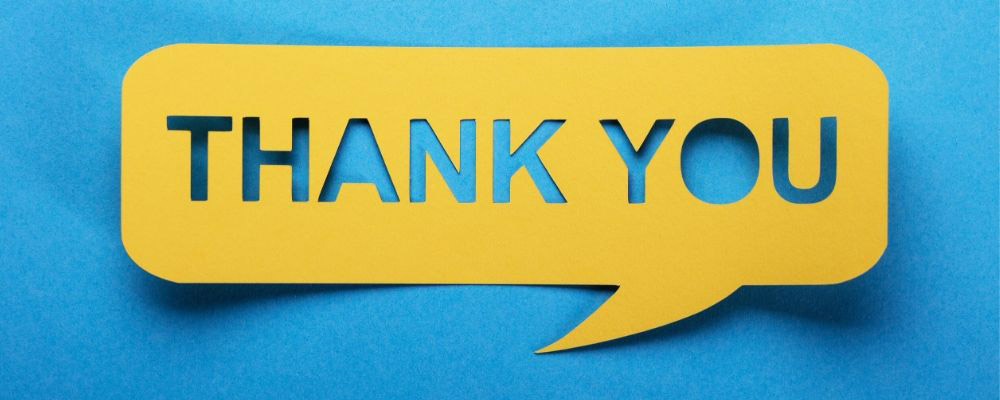